[View in Colaboratory](https://colab.research.google.com/github/gopal2812/mlblr/blob/master/Copy_of_Untitled_v2.ipynb)

#Image Captioning
**Introduction**

In the past few years, neural networks have fueled dramatic advances in image classification. Emboldened, researchers are looking seek not only to assign numerical labels to input data, but to describe the world in human terms. Image captioning is among the most popular applications in this trend. A deep learning model of Image Captioning should be fast, accurate and able to identify the wide variety of objects present in the image and caption it with the text in natural laguage describing the relationship between the objects and actions.It can also be called Image to Text Translation.This deep learning task combines the key concept of vision and language.We need to capture the correlation between the vision and natural language such that they map to same semantic space.With examples below, we will understand more easily what it does (the titles are predicted captions from the model):

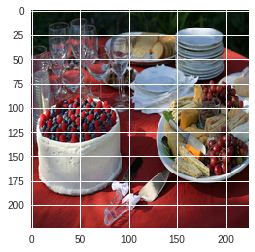

Predicted caption:
 a tray of food with vegetables and vegetables on a table eeee

True captions:
A plate of finger foods next to a blue and raspberry topped cake.
A nicely set dining table filled with food and a cake topped with berries.
a close up of a table with many plates of food
A table topped with a cake covered in berries next to a plate of sandwiches.
A white cake topped with berries and a plate of fruit and cheeses.


In [0]:
generate_caption_coco(idx=25, train=False)

#Prior work and Approaches for image captioning

**a)Linking Image and Text with Template :**

Source Paper: 
http://www.tamaraberg.com/papers/generation_cvpr11.pdf

The main idea here is to detect the objects and their attributes, parse the sentence into phrases and learn their correspondence using models like conditional randomfields(CRFs).The CRF is traditionally used for a structured prediction such as text generation.The use of CRF has limitations in generating text in a coherent manner with proper placement of prepositions.Thus it correctly predict the objects and attributes but fail at generating good descriptions.
Source Paper: 
http://www.tamaraberg.com/papers/generation_cvpr11.pdf

**b)Image Ranking: **

Source Paper:
http://papers.nips.cc/paper/4470-im2text-describing-images-using-1-million-captioned-photographs.pdf

This method relies on collecting and filtering a large data set of images from the internet to produce a novel webscale captioned photo collection. It involves the method of ranking the image and generating the caption by selection using extractive method. System Flows has been described as follows:-

1) Input query image 
2) Candidate matched images retrieved from webscale captioned collection using global image representations
3) High level information is extracted about image content including objects, attributes, actions, people, stuff, scenes, and TFIDF (text or detector based)weighting.
4) Images are re-ranked by combining all content estimates
5) Top n resulting captions.


**c)Bidirectional mapping between images and their sentence-based descriptions **

Source Paper: http://xinleic.xyz/papers/cvpr15_rnn.pdf

In this method depicts a bi-directional representation that is capable of generating both novel descriptions from images and visual representations from descriptions.It uses the
encoder, hidden layer and decoder.

1)  The main contribution of this paper is the addition of the recurrent visual hidden layer(u). 
2) The recurrent layer u attempts to reconstruct the visual features v from the previous words, i.e. (v) 
3) The visual hidden layer is also used by wt to help in predicting the next word.That is, the network can compare its visual memory u, which represents what it already said, with what it currently observes v to predict what to say next.
4) At the beginning of the sentence, u represents the prior probability
of the visual features. As more words are observed, the visual features are updated to reflect the words.


**d)DenseCap**

Source Paper: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Johnson_DenseCap_Fully_Convolutional_CVPR_2016_paper.pdf

This architecture processes an image with a single, efficient forward pass, requires
no external regions proposals, and can be trained end-to-end with a single round of optimization. The architecture is composed of a Convolutional Network, a novel
dense localization layer, and Recurrent Neural Network
language model that generates the label sequences
Basic Model:

Steps:-
a) An input image is first processed a CNN. 
b)The Localization Layer proposes regions and smoothly extracts a batch of corresponding activations using bilinear interpolation. 
c)These regions are processed with a fully-connected recognition network
and described with an RNN language model. 
d) The model is trained end-to-end with gradient descent

**e)Deep Bidirectional LSTMs**

Source Paper:
https://arxiv.org/pdf/1604.00790v1.pdf

The model performs comparatively with the state of the art even without additional mechanism like attention model or object detection.Data augmentation techniques such as multi-crop, multi-scale and vertical mirror are used to prevent overfitting in training deep models.They have used CNN to learn visual features alexnet and 16-layer vggnet to be precise and Bidirectional LSTM to learn sentence features.End-to-end training is done by minimizing the joint loss.LSTMs are already deep, but that depth is horizontal, in which weights are reused which limits the learning of more representative features. Vertical depth can be achieved by stacking multiple LSTMs or use a MLP((multilayer
perception) in between which helps in making the net deeper with increasing too much parameters.

Steps:-
a)Their model is end to end trainable with stochastic gradient descent with BPTT algorithm.
The loss at the end is the sum of loss from both forward and backward LSTMs.
b) To infer the final sentence for the image they take that word which has the maximum probability from both forward and backward prediction.
c) For word vector they used one-hot representation along with tokenizing and removing less
occuring words

**f) Image Caption with Visual Attention **

SourcePaper:
https://arxiv.org/pdf/1502.03044v3.pdf

Attention is important as representing the whole image from one vector is not the better way
to go about scene understanding, which is what it is done in most cases.By using attention features can be dynamically used when needed which is really helpful when
there is a lot of objects in the image. Until now features from the last layer from the conv-net is used which focus on the most important part of the image, which is one way to go but is not helpful when more descriptive captions are required.So more low level features are needed from the image, but to handle so much more information a mechanism is desired.

Steps:-
a) Instead of using the final fully connected layer of CNN, the lower convolutional layer vectors are used called them annotation vectors. Each annotation vector is supposed to belong to some specific part of the image.

b) For the decoder part a slight variation of the widely used normal LSTM is proposed, in whichalong with the embedding of the word and the vector of the previous hidden state, a context vector is also passed which is to capture the visual information associated with a particular input location and is based on the previous generated word and the previous hidden state.



#WHAT WE WILL LEARN

In current tutorial, we are going to work on the Image captioning problem with the variant of DenseCap, We solve the image captioning problem by having two model, the first called an image recognition model and the second called a GRU decoder. The image recognizion model describe what the image contains and output a single vector of numbers -the "thought-vector" or summary-vector, which is then input to the GRU model. This second GRU model decodes this vector into the destination-text.

In this tutorial, you will discover how to develop an encoder-decoder recurrent neural network in Python with Keras. After completing this tutorial, you will know:

a) How to design a small and configurable problem to evaluate encoder-decoder recurrent neural networks.

b)  How to design an encoder-decoder network for the sequence prediction problem.

c)How to implement GRU (Gated Recurrent Unit) model and transfer learning with Densenet in keras.

d) How to robustly compare and tune the performance of encoder-decoder networks with hyperparameter,Transfer learning,Preprocessing, change in GRU layer  to improve the quality of caption.

e) How to use caching and other python mechanism to optimize and run the code faster.

f) Transfer Learning and usage of Pretrained Model.






                              
 




#Flow Chart

a) We will use the weights from the keras densenet model which was pre-trained on the ImageNet data-set for classifying images. The densenet model (DenseNet201) contains a convolutional part and a  Pooling layer which is used for the image classification.

b) But instead of using the last classification layer (o/p of Pooling Layer)which has been trained for the image net data set, we will redirect the output of the last but one layer as input to GRU Layer(Gated Recurrent Units). So given an image we can get the features vector of 1920 uniformly random sampled regions which summarizes the image-contents.This will now go  as input to the GRU layer.we want to use that as the initial state in our decoder so that the decoder knows what are the contents of the image and then it can transform that into a text

c) The internal state-size of the GRU is only 512, so we need an intermediate fully-connected (dense) layer to map the vector with 1920 elements down to a vector with only 512 elements.This is the same approach which we follow in transfer learning from one model to another.We will use the tanh activation function so that it limits the output between -1 to 1.

d) Neural Networks cannot work directly on text-data. We use a two-step Pre processing to convert text into numbers that can be used in a neural network. 

    i) The first step is to convert text-words into so-called integer-tokens. 

    ii) Convert integer-tokens into vectors of floating-point numbers using a so-called embedding-layer. 

f) The decoder is responsible for stepping through the output time steps while reading from the context vector.During Training, we give decoder three i/ps :

    i) Initial state which is caluculated in step c

    ii)A sequence of integer tokens which have been converted using a     tokenizer

    iii) The same sequence but shifted one time step

Idea is that we want the decoder to learn and predict the next word based on the context build so far.  For ExampleIn image mentioned in flowchart, decoder should learn that The word start should map to the word. The word big should map to the word brown. The word brown should map to the word bear. So on until we get down to the end word. Remember each word would correspond to an integer for example: the integer 165 correspond to word brown as generated by tokenizer, the word brown becomes the number 110 etc.

Internally we first inputs the first integer(word) to the embedding layer and the embedding layer then converts that integer into a 128 floating-point numbers roughly between
minus 1 and 1 because the neural network cannot work on integer numbers directly.
have unrolled the process through the time steps so the arrow  means that the internal state is sent to the next time step.Initially we have the number 165 we will put that through the embedding layer and get  some vector of 128 floating point numbers out and we will input that to the gated recurrent unit then we will take the updated internal state we will process
that we will output a new vector and update the internal state again.

g) We will continue this until we have processed the entire input sequence of integer tokens (caption). The o/p sequence of vectors of 512 elements will be used as the
input to the second recurrent layer with the initial state(summarize image vector obtained in step c).We process that in the same way in the third recurrent layer.

h) We get a sequence of vectors out again but these have 512 elements and we somehow need to transform that into an integer between 1 and 10,000 (size of our vocabalary list). This
can we achieved using the dense on fully conected layer.

i)We continue do above process  for each of the time steps until we have a sequence as output. When we are training this it doesn'tgive us the correct output to begin with at first it just gives us random output.We want to Train it by giving it the correct sequence of integer tokens as the output so that we compare the predicted output of the decoder with the
true output which  backwards propagate the errors all the way through the recurrent units.

This can also be extended to dense model but in this tutorial we won't be updating the
weights of this model over here. The learning  to map from pixels over to text would have improved the performance but would have resulted in processing millions of images. Thus requires GPUs usage for long duration and not availble freely anywhere.

j) When we are doing inference(predict), we start by processing the image through the
image model and we get the initial state out but now we don't know what the text is so we cannot i/p the text but we i/p the initial dummy sequence "ssss" and states o/p from image model that summarizes the image contents  and hope to get the next word as o/p.

k) Get the last predicted token as a one-hot encoded array. Note that this is not limited by softmax, but we just need the index of the largest element so it doesn't matter.

l)Convert to an integer-token and Lookup the word corresponding to this integer-token and Append the word to the output-text.











.




**Implementation Details:**
Dataset
We used MSCOCO Dataset to train our models. It has around 41K training images as well as 41K validation images with 5 captions per image. Our model was trained using the training images and since we had no way to measure the accuracy of the model, we used some of the validation images to test the performance of our model.We need first to download all images from MSCOCO challenge (20+ G in total of 120K images for both training and validation) as well as the caption files. Then, we will need to generate the followings:
Files:

-rw-rw-r-- 1 gopalg gopalg   815585330 Sep  1  2017 val2017.zip
-rw-rw-r-- 1 gopalg gopalg 19336861798 Sep  1  2017 train2017.zip
-rw-rw-r-- 1 gopalg gopalg   252907541 Sep  2  2017 annotations_trainval2017.zip

The vocabulary list of your choice (e.g. you can choose top 5000 words based on appearing frequency in the captions data set, plus 4 additional tokens of for unknown words, for start of a sentence, end of a sentence and for padding a sentence. So there are total 5000 + 4 words if you choose 5000. )

Two dictionaries of word_to_index and index_to_word, based on the vocab above.
Index all captions using this word_to_index dictionary. And pad each caption to a fixed length vector (e.g. you can choose length of 25) with and at the start and beginning, for all words not in the vocab, as well as tokens for all remaining empty spaces.
Extracted image features using Inception V3 pretrained model. Extract features from all your training and validation images using inception v3 model, and save them into numpy arrays to your local.
Finally, create train_image_index and val_image_index lists, which match each caption to the correct row index of the feature numpy arrays created above. (Basically, match each caption to each image)

 Preprocessing
 
1.1 Resizing
The images available for training were of varying dimensions, so they were resized to a single dimension.This results in some loss of information, however the processing of images is made easier and less error-prone.

1.2 Dictionary
Using all the captions available from the training dataset, a dictionary of words is created to be used for generating our own captions. Some words which are rare in the captions are left out while creating the dictionary using a threshold value function.Finally, these words are represented as a one-hot vectors given as input to the LSTM and GRU.


Extract pre-trained features. Run extract_features.py to extract inception v3 features and save as train2014_v3_pool_3.npy and val2014_v3_pool_3.npy to your local directory.



**Why GRU( Gated Recurrent Units)**
GRU is an RNN architecture and has a simplified structure. It has 2 gates 
 A reset gate r and
    An update gate z.

The reset gate determines how to combine the new input with the previous memory.
The update gate defines how much of the previous memory to keep around.

If we set the reset to all 1s and update gate to all 0s we again arrive at our plain RNN model.
The input and forget gates are coupled by an update gate z and the reset gate r is applied directly to the previous hidden state. 

GRU does not has a separate memory cell and exposes its hidden state without any control. The gating mechanism are so defined to learn the long-term dependencies without storing it explicitly. Thus, it is computationally more efficient and outperforms the LSTM network on many tasks due to its simple structure.

**Implementation Details:**
Dataset
We used MSCOCO Dataset to train our models. It has around 41K training images as well as 41K validation images with 5 captions per image. Our model was trained using the training images and since we had no way to measure the accuracy of the model, we used some of the validation images to test the performance of our model.We need first to download all images from MSCOCO challenge (20+ G in total of 120K images for both training and validation) as well as the caption files. Then, we will need to generate the followings:
Files:

-rw-rw-r-- 1 gopalg gopalg   815585330 Sep  1  2017 val2017.zip
-rw-rw-r-- 1 gopalg gopalg 19336861798 Sep  1  2017 train2017.zip
-rw-rw-r-- 1 gopalg gopalg   252907541 Sep  2  2017 annotations_trainval2017.zip

The vocabulary list of your choice (e.g. you can choose top 5000 words based on appearing frequency in the captions data set, plus 4 additional tokens of for unknown words, for start of a sentence, end of a sentence and for padding a sentence. So there are total 5000 + 4 words if you choose 5000. )

Two dictionaries of word_to_index and index_to_word, based on the vocab above.
Index all captions using this word_to_index dictionary. And pad each caption to a fixed length vector (e.g. you can choose length of 25) with and at the start and beginning, for all words not in the vocab, as well as tokens for all remaining empty spaces.
Extracted image features using Inception V3 pretrained model. Extract features from all your training and validation images using inception v3 model, and save them into numpy arrays to your local.
Finally, create train_image_index and val_image_index lists, which match each caption to the correct row index of the feature numpy arrays created above. (Basically, match each caption to each image)

 Preprocessing
 
1.1 Resizing
The images available for training were of varying dimensions, so they were resized to a single dimension.This results in some loss of information, however the processing of images is made easier and less error-prone.

1.2 Dictionary
Using all the captions available from the training dataset, a dictionary of words is created to be used for generating our own captions. Some words which are rare in the captions are left out while creating the dictionary using a threshold value function.Finally, these words are represented as a one-hot vectors given as input to the LSTM and GRU.


Extract pre-trained features. Run extract_features.py to extract inception v3 features and save as train2014_v3_pool_3.npy and val2014_v3_pool_3.npy to your local directory.



**Why GRU( Gated Recurrent Units)**
GRU is an RNN architecture and has a simplified structure. It has 2 gates 
 A reset gate r and
    An update gate z.

The reset gate determines how to combine the new input with the previous memory.
The update gate defines how much of the previous memory to keep around.

If we set the reset to all 1s and update gate to all 0s we again arrive at our plain RNN model.
The input and forget gates are coupled by an update gate z and the reset gate r is applied directly to the previous hidden state. 

GRU does not has a separate memory cell and exposes its hidden state without any control. The gating mechanism are so defined to learn the long-term dependencies without storing it explicitly. Thus, it is computationally more efficient and outperforms the LSTM network on many tasks due to its simple structure.


In current tutorial, we are going to work on the Image captioning problem with the variant of DenseCap, We solve the image captioning problem by having two model, the first called an image recognition mode and the second called a decoder. The image recognizion model describe what the image contains and output a single vector of numbers -the "thought-vector" or summary-vector, which is then input to the second RNN. This second RNN decodes this vector into the destination-text.

a) We will use the weights from the keras densenet model which was pre-trained on the ImageNet data-set for classifying images. The densenet model contains a convolutional part and a fully-connected (or dense) part which is used for the image classification.
We will use some of the densenet layers in this pre-trained model, so we have to download the full mode but will train it with subset of image set in subsequent states.

b) We will use the densenet for the image part of the dense caption generation and removed the final pooling layer from it. So given an image we can get the features vector of 1920 uniformly random sampled regions which summarizes the image-contents.This will now go  as input to the GRU layer.

c) We will use this vector as the initial state of the Gated Recurrent Units (GRU). However, the internal state-size of the GRU is only 512, so we need an intermediate fully-connected (dense) layer to map the vector with 4096 elements down to a vector with only 512 elements.

d) Neural Networks cannot work directly on text-data. We use a two-step process to convert text into numbers that can be used in a neural network. The first step is to convert text-words into so-called integer-tokens. The second step is to convert integer-tokens into vectors of floating-point numbers using a so-called embedding-layer. 

e)Each image in the training-set has at least 5 captions describing the contents of the image. The neural network will be trained with batches of transfer-values for the images and sequences of integer-tokens for the captions. If we were to have matching numpy arrays for the training-set, we would either have to only use a single caption for each image and ignore the rest of this valuable data, or we would have to repeat the image transfer-values for each of the captions, which would waste a lot of memory.

f)We will now create the Recurrent Neural Network (RNN) that will be trained to map the vectors with transfer-values from the image-recognition model into sequences of integer-tokens that can be converted into text.
(1) Creation of all the layers that are not yet connected.
(2) a function that connects all these layers.

The decoder consists of 3 GRU layers whose internal state-sizes are:
state_size = 512,The embedding-layer converts integer-tokens into vectors of this length:

embedding_size = 128, This inputs transfer-values to the decoder:

transfer_values_input = Input(shape=(transfer_values_size,),
                              name='transfer_values_input')
g) We input the entire sequence of tokens to the decoder. This wastes a lot of computation because we are only interested in the last input and output. We could modify the code to return the GRU-states when calling predict() and then feeding these GRU-states as well the next time we call predict(), but it would make the code much more complicated.
        
h) Input this data to the decoder and get the predicted output.

i)Get the last predicted token as a one-hot encoded array. Note that this is not limited by softmax, but we just need the index of the largest element so it doesn't matter.

j)Convert to an integer-token and Lookup the word corresponding to this integer-token and Append the word to the output-text.
                              
 




In [0]:
!pip install keras
!pip install download
!pip install cache

%matplotlib inline

import os
import json
import pickle
import download
import sys
import urllib.request
import tarfile
import zipfile

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from cache import Cache
from PIL import Image
import numpy as np

In [0]:
!rm -rf data  && mkdir -p data/coco
!cd data/coco && wget http://images.cocodataset.org/zips/train2017.zip && \
  wget http://images.cocodataset.org/zips/val2017.zip && \
  wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2018-06-19 13:06:55--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to images.cocodataset.org (images.cocodataset.org)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip        33%[=====>              ]   6.06G   142MB/s    eta 85s    

train2017.zip       100%[===================>]  18.01G   143MB/s    in 2m 9s   

2018-06-19 13:09:05 (143 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2018-06-19 13:09:06--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to images.cocodataset.org (images.cocodataset.org)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M   133MB/s    in 5.1s    

2018-06-19 13:09:11 (152 MB/s) - ‘val2017.zip’ saved [815585330/815585330]

--2018-06-19 13:09:11--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to images.cocodataset.org (images.cocodataset.org)|74.125.141.128|:80... connected.
HTTP r

# New Section

In [0]:

!ls data/coco
!rm -rf data/coco/val2017
!ls data/coco
!cd  data/coco && unzip val2017.zip >& /dev/null && unzip annotations_trainval2017.zip >& /dev/null && unzip train2017.zip >& /dev/null
!ls data/coco
#!rm -rf coco && git clone https://github.com/pdollar/coco.git && cd coco/PythonAPI && make && make install && python setup.py install


annotations_trainval2017.zip  train2017.zip  val2017.zip
annotations_trainval2017.zip  train2017.zip  val2017.zip
Archive:  val2017.zip
   creating: val2017/
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 e


 extracting: val2017/000000438955.jpg  
 extracting: val2017/000000327769.jpg  
 extracting: val2017/000000119088.jpg  
 extracting: val2017/000000437110.jpg  
 extracting: val2017/000000256916.jpg  
 extracting: val2017/000000431848.jpg  
 extracting: val2017/000000061658.jpg  
 extracting: val2017/000000434459.jpg  
 extracting: val2017/000000379476.jpg  
 extracting: val2017/000000093437.jpg  
 extracting: val2017/000000576955.jpg  
 extracting: val2017/000000577735.jpg  
 extracting: val2017/000000544565.jpg  
 extracting: val2017/000000194471.jpg  
 extracting: val2017/000000286422.jpg  
 extracting: val2017/000000532530.jpg  
 extracting: val2017/000000205647.jpg  
 extracting: val2017/000000308587.jpg  
 extracting: val2017/000000026926.jpg  
 extracting: val2017/000000065455.jpg  
 extracting: val2017/000000140420.jpg  
 extracting: val2017/000000449579.jpg  
 extracting: val2017/000000308430.jpg  
 extracting: val2017/000000220310.jpg  
 extracting: val2017/000000206831.jpg  


 extracting: val2017/000000346638.jpg  
 extracting: val2017/000000122217.jpg  
 extracting: val2017/000000199055.jpg  
 extracting: val2017/000000421923.jpg  
 extracting: val2017/000000261161.jpg  
 extracting: val2017/000000567825.jpg  
 extracting: val2017/000000456303.jpg  
 extracting: val2017/000000450488.jpg  
 extracting: val2017/000000527960.jpg  
 extracting: val2017/000000246454.jpg  
 extracting: val2017/000000328117.jpg  
 extracting: val2017/000000508602.jpg  
 extracting: val2017/000000017436.jpg  
 extracting: val2017/000000159311.jpg  
 extracting: val2017/000000293858.jpg  
 extracting: val2017/000000294163.jpg  
 extracting: val2017/000000157138.jpg  
 extracting: val2017/000000460229.jpg  
 extracting: val2017/000000473821.jpg  
 extracting: val2017/000000108244.jpg  
 extracting: val2017/000000546219.jpg  
 extracting: val2017/000000344888.jpg  
 extracting: val2017/000000439290.jpg  
 extracting: val2017/000000294855.jpg  
 extracting: val2017/000000417608.jpg  


 extracting: val2017/000000575372.jpg  
 extracting: val2017/000000154947.jpg  
 extracting: val2017/000000462629.jpg  
 extracting: val2017/000000157807.jpg  
 extracting: val2017/000000417632.jpg  
 extracting: val2017/000000374083.jpg  
 extracting: val2017/000000209753.jpg  
 extracting: val2017/000000133000.jpg  
 extracting: val2017/000000144932.jpg  
 extracting: val2017/000000145597.jpg  
 extracting: val2017/000000528314.jpg  
 extracting: val2017/000000481480.jpg  
 extracting: val2017/000000525286.jpg  
 extracting: val2017/000000038210.jpg  
 extracting: val2017/000000306893.jpg  
 extracting: val2017/000000046497.jpg  
 extracting: val2017/000000488075.jpg  
 extracting: val2017/000000438907.jpg  
 extracting: val2017/000000312586.jpg  
 extracting: val2017/000000471087.jpg  
 extracting: val2017/000000364322.jpg  
 extracting: val2017/000000252559.jpg  
 extracting: val2017/000000475732.jpg  
 extracting: val2017/000000350405.jpg  
 extracting: val2017/000000200421.jpg  

 extracting: val2017/000000185250.jpg  
 extracting: val2017/000000187513.jpg  
 extracting: val2017/000000488664.jpg  
 extracting: val2017/000000274687.jpg  
 extracting: val2017/000000318455.jpg  
 extracting: val2017/000000533536.jpg  
 extracting: val2017/000000252216.jpg  
 extracting: val2017/000000328683.jpg  
 extracting: val2017/000000363072.jpg  
 extracting: val2017/000000289415.jpg  
 extracting: val2017/000000150726.jpg  
 extracting: val2017/000000573391.jpg  
 extracting: val2017/000000473869.jpg  
 extracting: val2017/000000365886.jpg  
 extracting: val2017/000000108495.jpg  
 extracting: val2017/000000245651.jpg  
 extracting: val2017/000000253386.jpg  
 extracting: val2017/000000271728.jpg  
 extracting: val2017/000000456292.jpg  
 extracting: val2017/000000532071.jpg  
 extracting: val2017/000000229358.jpg  
 extracting: val2017/000000351096.jpg  
 extracting: val2017/000000545826.jpg  
 extracting: val2017/000000532129.jpg  
 extracting: val2017/000000481582.jpg  



 extracting: val2017/000000039769.jpg  
 extracting: val2017/000000248334.jpg  
 extracting: val2017/000000436883.jpg  
 extracting: val2017/000000396729.jpg  
 extracting: val2017/000000507015.jpg  
 extracting: val2017/000000040036.jpg  
 extracting: val2017/000000543043.jpg  
 extracting: val2017/000000068078.jpg  
 extracting: val2017/000000280930.jpg  
 extracting: val2017/000000440336.jpg  
 extracting: val2017/000000277197.jpg  
 extracting: val2017/000000366225.jpg  
 extracting: val2017/000000316054.jpg  
 extracting: val2017/000000286994.jpg  
 extracting: val2017/000000409542.jpg  
 extracting: val2017/000000264335.jpg  
 extracting: val2017/000000067896.jpg  
 extracting: val2017/000000273712.jpg  
 extracting: val2017/000000092177.jpg  
 extracting: val2017/000000421455.jpg  
 extracting: val2017/000000394206.jpg  
 extracting: val2017/000000006818.jpg  
 extracting: val2017/000000006614.jpg  
 extracting: val2017/000000029596.jpg  
 extracting: val2017/000000551439.jpg  


 extracting: val2017/000000055528.jpg  
 extracting: val2017/000000429281.jpg  
 extracting: val2017/000000385190.jpg  
 extracting: val2017/000000372203.jpg  
 extracting: val2017/000000213035.jpg  
 extracting: val2017/000000377635.jpg  
 extracting: val2017/000000042178.jpg  
 extracting: val2017/000000309484.jpg  
 extracting: val2017/000000287527.jpg  
 extracting: val2017/000000412894.jpg  
 extracting: val2017/000000308793.jpg  
 extracting: val2017/000000357430.jpg  
 extracting: val2017/000000245764.jpg  
 extracting: val2017/000000416534.jpg  
 extracting: val2017/000000314709.jpg  
 extracting: val2017/000000415536.jpg  
 extracting: val2017/000000392818.jpg  
 extracting: val2017/000000339442.jpg  
 extracting: val2017/000000270402.jpg  
 extracting: val2017/000000146457.jpg  
 extracting: val2017/000000428454.jpg  
 extracting: val2017/000000268378.jpg  
 extracting: val2017/000000033638.jpg  
 extracting: val2017/000000307658.jpg  
 extracting: val2017/000000132329.jpg  


 extracting: val2017/000000392481.jpg  
 extracting: val2017/000000125778.jpg  
 extracting: val2017/000000562843.jpg  
 extracting: val2017/000000393569.jpg  
 extracting: val2017/000000428111.jpg  
 extracting: val2017/000000099054.jpg  
 extracting: val2017/000000484404.jpg  
 extracting: val2017/000000205776.jpg  
 extracting: val2017/000000210708.jpg  
 extracting: val2017/000000049091.jpg  
 extracting: val2017/000000013004.jpg  
 extracting: val2017/000000134722.jpg  
 extracting: val2017/000000174018.jpg  
 extracting: val2017/000000142238.jpg  
 extracting: val2017/000000140658.jpg  
 extracting: val2017/000000521282.jpg  
 extracting: val2017/000000344909.jpg  
 extracting: val2017/000000181303.jpg  
 extracting: val2017/000000037988.jpg  
 extracting: val2017/000000537991.jpg  
 extracting: val2017/000000174371.jpg  
 extracting: val2017/000000001532.jpg  
 extracting: val2017/000000344795.jpg  
 extracting: val2017/000000131138.jpg  
 extracting: val2017/000000429690.jpg  


 extracting: val2017/000000050145.jpg  
 extracting: val2017/000000565597.jpg  
 extracting: val2017/000000473237.jpg  
 extracting: val2017/000000311789.jpg  
 extracting: val2017/000000241326.jpg  
 extracting: val2017/000000549930.jpg  
 extracting: val2017/000000507223.jpg  
 extracting: val2017/000000204186.jpg  
 extracting: val2017/000000562443.jpg  
 extracting: val2017/000000546964.jpg  
 extracting: val2017/000000155145.jpg  
 extracting: val2017/000000206135.jpg  
 extracting: val2017/000000508101.jpg  
 extracting: val2017/000000212072.jpg  
 extracting: val2017/000000249786.jpg  
 extracting: val2017/000000163258.jpg  
 extracting: val2017/000000052017.jpg  
 extracting: val2017/000000095707.jpg  
 extracting: val2017/000000295713.jpg  
 extracting: val2017/000000007816.jpg  
 extracting: val2017/000000034257.jpg  
 extracting: val2017/000000267903.jpg  
 extracting: val2017/000000381639.jpg  
 extracting: val2017/000000479953.jpg  
 extracting: val2017/000000025139.jpg  


 extracting: val2017/000000452515.jpg  
 extracting: val2017/000000494634.jpg  
 extracting: val2017/000000083172.jpg  
 extracting: val2017/000000062355.jpg  
 extracting: val2017/000000018837.jpg  
 extracting: val2017/000000023781.jpg  
 extracting: val2017/000000490171.jpg  
 extracting: val2017/000000104666.jpg  
 extracting: val2017/000000455597.jpg  
 extracting: val2017/000000419096.jpg  
 extracting: val2017/000000240049.jpg  
 extracting: val2017/000000464824.jpg  
 extracting: val2017/000000343976.jpg  
 extracting: val2017/000000274219.jpg  
 extracting: val2017/000000231580.jpg  
 extracting: val2017/000000065736.jpg  
 extracting: val2017/000000352684.jpg  
 extracting: val2017/000000324258.jpg  
 extracting: val2017/000000113051.jpg  
 extracting: val2017/000000370900.jpg  
 extracting: val2017/000000040471.jpg  
 extracting: val2017/000000226662.jpg  
 extracting: val2017/000000002153.jpg  
 extracting: val2017/000000350488.jpg  
 extracting: val2017/000000151629.jpg  


 extracting: val2017/000000091921.jpg  
 extracting: val2017/000000578093.jpg  
 extracting: val2017/000000014038.jpg  
 extracting: val2017/000000134112.jpg  
 extracting: val2017/000000358923.jpg  
 extracting: val2017/000000166287.jpg  
 extracting: val2017/000000179642.jpg  
 extracting: val2017/000000082821.jpg  
 extracting: val2017/000000124798.jpg  
 extracting: val2017/000000522393.jpg  
 extracting: val2017/000000007818.jpg  
 extracting: val2017/000000002149.jpg  
 extracting: val2017/000000562207.jpg  
 extracting: val2017/000000356347.jpg  
 extracting: val2017/000000466125.jpg  
 extracting: val2017/000000395903.jpg  
 extracting: val2017/000000420281.jpg  
 extracting: val2017/000000400367.jpg  
 extracting: val2017/000000175387.jpg  
 extracting: val2017/000000341681.jpg  
 extracting: val2017/000000329455.jpg  
 extracting: val2017/000000108253.jpg  
 extracting: val2017/000000226883.jpg  
 extracting: val2017/000000449406.jpg  
 extracting: val2017/000000007511.jpg  


 extracting: val2017/000000237071.jpg  
 extracting: val2017/000000272566.jpg  
 extracting: val2017/000000132796.jpg  
 extracting: val2017/000000384949.jpg  
 extracting: val2017/000000276055.jpg  
 extracting: val2017/000000236721.jpg  
 extracting: val2017/000000286523.jpg  
 extracting: val2017/000000024027.jpg  
 extracting: val2017/000000462614.jpg  
 extracting: val2017/000000345261.jpg  
 extracting: val2017/000000295316.jpg  
 extracting: val2017/000000190637.jpg  
 extracting: val2017/000000172617.jpg  
 extracting: val2017/000000093717.jpg  
 extracting: val2017/000000425702.jpg  
 extracting: val2017/000000522889.jpg  
 extracting: val2017/000000160556.jpg  
 extracting: val2017/000000553511.jpg  
 extracting: val2017/000000170099.jpg  
 extracting: val2017/000000173799.jpg  
 extracting: val2017/000000488736.jpg  
 extracting: val2017/000000301135.jpg  
 extracting: val2017/000000018491.jpg  
 extracting: val2017/000000124277.jpg  
 extracting: val2017/000000488673.jpg  


  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  
Archive:  train2017.zip
   creating: train2017/
 extracting: train2017/000000147328.jpg  
 extracting: train2017/000000414738.jpg  
 extracting: train2017/000000281563.jpg  
 extracting: train2017/000000063879.jpg  
 extracting: train2017/000000531349.jpg  
 extracting: train2017/000000340329.jpg  
 extracting: train2017/000000182236.jpg  
 extracting: train2017/000000326820.jpg  
 extracting: train2017/000000149364.jpg  
 extracting: train2017/000000166598.jpg  
 extracting: train2017/000000424792.jpg  
 extracting: train2017/000000178388.jpg  
 extracting: train2017/000000568154.jpg  
 extracting: train2017/000000268150.jpg  
 extracting: train2017/000000138473.jpg  
 extracting: train2017/000000382699.jpg  
 extracting: train2017/000000493952.jpg  
 extracting: train2017/000000348522.jpg  
 extracting: train2017/0000000


 extracting: train2017/000000381729.jpg  
 extracting: train2017/000000332166.jpg  
 extracting: train2017/000000491000.jpg  
 extracting: train2017/000000538671.jpg  
 extracting: train2017/000000302789.jpg  
 extracting: train2017/000000158563.jpg  
 extracting: train2017/000000556547.jpg  
 extracting: train2017/000000399822.jpg  
 extracting: train2017/000000293121.jpg  
 extracting: train2017/000000054943.jpg  
 extracting: train2017/000000246530.jpg  
 extracting: train2017/000000453020.jpg  
 extracting: train2017/000000299077.jpg  
 extracting: train2017/000000026884.jpg  
 extracting: train2017/000000200272.jpg  
 extracting: train2017/000000439015.jpg  
 extracting: train2017/000000274642.jpg  
 extracting: train2017/000000539453.jpg  
 extracting: train2017/000000347620.jpg  
 extracting: train2017/000000421400.jpg  
 extracting: train2017/000000517031.jpg  
 extracting: train2017/000000415724.jpg  
 extracting: train2017/000000030222.jpg  
 extracting: train2017/0000002444

 extracting: train2017/000000278101.jpg  
 extracting: train2017/000000410724.jpg  
 extracting: train2017/000000539717.jpg  
 extracting: train2017/000000519376.jpg  
 extracting: train2017/000000280235.jpg  
 extracting: train2017/000000195420.jpg  
 extracting: train2017/000000302603.jpg  
 extracting: train2017/000000451690.jpg  
 extracting: train2017/000000530649.jpg  
 extracting: train2017/000000500952.jpg  
 extracting: train2017/000000084396.jpg  
 extracting: train2017/000000241026.jpg  
 extracting: train2017/000000125106.jpg  
 extracting: train2017/000000102996.jpg  
 extracting: train2017/000000425041.jpg  
 extracting: train2017/000000262873.jpg  
 extracting: train2017/000000254816.jpg  
 extracting: train2017/000000260668.jpg  
 extracting: train2017/000000322353.jpg  
 extracting: train2017/000000001737.jpg  
 extracting: train2017/000000030080.jpg  
 extracting: train2017/000000459258.jpg  
 extracting: train2017/000000419994.jpg  
 extracting: train2017/00000011593


 extracting: train2017/000000340197.jpg  
 extracting: train2017/000000492293.jpg  
 extracting: train2017/000000573169.jpg  
 extracting: train2017/000000386389.jpg  
 extracting: train2017/000000433545.jpg  
 extracting: train2017/000000033761.jpg  
 extracting: train2017/000000223014.jpg  
 extracting: train2017/000000041345.jpg  
 extracting: train2017/000000014730.jpg  
 extracting: train2017/000000153466.jpg  
 extracting: train2017/000000295804.jpg  
 extracting: train2017/000000461976.jpg  
 extracting: train2017/000000126894.jpg  
 extracting: train2017/000000045543.jpg  
 extracting: train2017/000000095915.jpg  
 extracting: train2017/000000239654.jpg  
 extracting: train2017/000000106810.jpg  
 extracting: train2017/000000389856.jpg  
 extracting: train2017/000000152844.jpg  
 extracting: train2017/000000317227.jpg  
 extracting: train2017/000000017697.jpg  
 extracting: train2017/000000526070.jpg  
 extracting: train2017/000000087135.jpg  
 extracting: train2017/0000000214


 extracting: train2017/000000147746.jpg  
 extracting: train2017/000000284042.jpg  
 extracting: train2017/000000324554.jpg  
 extracting: train2017/000000548171.jpg  
 extracting: train2017/000000227464.jpg  
 extracting: train2017/000000439126.jpg  
 extracting: train2017/000000459342.jpg  
 extracting: train2017/000000067002.jpg  
 extracting: train2017/000000206893.jpg  
 extracting: train2017/000000360173.jpg  
 extracting: train2017/000000282603.jpg  
 extracting: train2017/000000147539.jpg  
 extracting: train2017/000000033842.jpg  
 extracting: train2017/000000281427.jpg  
 extracting: train2017/000000290269.jpg  
 extracting: train2017/000000255849.jpg  
 extracting: train2017/000000349318.jpg  
 extracting: train2017/000000191122.jpg  
 extracting: train2017/000000221515.jpg  
 extracting: train2017/000000067771.jpg  
 extracting: train2017/000000017100.jpg  
 extracting: train2017/000000317176.jpg  
 extracting: train2017/000000546647.jpg  
 extracting: train2017/0000004265


 extracting: train2017/000000334868.jpg  
 extracting: train2017/000000545361.jpg  
 extracting: train2017/000000522054.jpg  
 extracting: train2017/000000087125.jpg  
 extracting: train2017/000000323147.jpg  
 extracting: train2017/000000348015.jpg  
 extracting: train2017/000000505162.jpg  
 extracting: train2017/000000234388.jpg  
 extracting: train2017/000000183364.jpg  
 extracting: train2017/000000338067.jpg  
 extracting: train2017/000000412639.jpg  
 extracting: train2017/000000294426.jpg  
 extracting: train2017/000000103539.jpg  
 extracting: train2017/000000459763.jpg  
 extracting: train2017/000000139333.jpg  
 extracting: train2017/000000487927.jpg  
 extracting: train2017/000000107974.jpg  
 extracting: train2017/000000191947.jpg  
 extracting: train2017/000000543660.jpg  
 extracting: train2017/000000213455.jpg  
 extracting: train2017/000000160421.jpg  
 extracting: train2017/000000126822.jpg  
 extracting: train2017/000000364082.jpg  
 extracting: train2017/0000004582


 extracting: train2017/000000100095.jpg  
 extracting: train2017/000000047792.jpg  
 extracting: train2017/000000050124.jpg  
 extracting: train2017/000000121610.jpg  
 extracting: train2017/000000496383.jpg  
 extracting: train2017/000000126067.jpg  
 extracting: train2017/000000155402.jpg  
 extracting: train2017/000000570110.jpg  
 extracting: train2017/000000332532.jpg  
 extracting: train2017/000000450434.jpg  
 extracting: train2017/000000512644.jpg  
 extracting: train2017/000000081748.jpg  
 extracting: train2017/000000459408.jpg  
 extracting: train2017/000000146432.jpg  
 extracting: train2017/000000436246.jpg  
 extracting: train2017/000000248118.jpg  
 extracting: train2017/000000330835.jpg  
 extracting: train2017/000000445491.jpg  
 extracting: train2017/000000249356.jpg  
 extracting: train2017/000000453775.jpg  
 extracting: train2017/000000537337.jpg  
 extracting: train2017/000000370258.jpg  
 extracting: train2017/000000077870.jpg  
 extracting: train2017/0000002912

 extracting: train2017/000000540814.jpg  
 extracting: train2017/000000301018.jpg  
 extracting: train2017/000000160294.jpg  
 extracting: train2017/000000157199.jpg  
 extracting: train2017/000000346645.jpg  
 extracting: train2017/000000546148.jpg  
 extracting: train2017/000000291207.jpg  
 extracting: train2017/000000250381.jpg  
 extracting: train2017/000000231080.jpg  
 extracting: train2017/000000217460.jpg  
 extracting: train2017/000000565884.jpg  
 extracting: train2017/000000518455.jpg  
 extracting: train2017/000000473137.jpg  
 extracting: train2017/000000437554.jpg  
 extracting: train2017/000000180261.jpg  
 extracting: train2017/000000244835.jpg  
 extracting: train2017/000000191293.jpg  
 extracting: train2017/000000460392.jpg  
 extracting: train2017/000000094052.jpg  
 extracting: train2017/000000203061.jpg  
 extracting: train2017/000000114745.jpg  
 extracting: train2017/000000065407.jpg  
 extracting: train2017/000000460240.jpg  
 extracting: train2017/00000013403


 extracting: train2017/000000318247.jpg  
 extracting: train2017/000000105633.jpg  
 extracting: train2017/000000300943.jpg  
 extracting: train2017/000000360170.jpg  
 extracting: train2017/000000093243.jpg  
 extracting: train2017/000000482451.jpg  
 extracting: train2017/000000400216.jpg  
 extracting: train2017/000000520532.jpg  
 extracting: train2017/000000431954.jpg  
 extracting: train2017/000000489520.jpg  
 extracting: train2017/000000093522.jpg  
 extracting: train2017/000000150317.jpg  
 extracting: train2017/000000321491.jpg  
 extracting: train2017/000000352000.jpg  
 extracting: train2017/000000275215.jpg  
 extracting: train2017/000000051260.jpg  
 extracting: train2017/000000008369.jpg  
 extracting: train2017/000000248167.jpg  
 extracting: train2017/000000469880.jpg  
 extracting: train2017/000000127718.jpg  
 extracting: train2017/000000456819.jpg  
 extracting: train2017/000000357294.jpg  
 extracting: train2017/000000520858.jpg  
 extracting: train2017/0000000625


 extracting: train2017/000000452905.jpg  
 extracting: train2017/000000407253.jpg  
 extracting: train2017/000000204174.jpg  
 extracting: train2017/000000370980.jpg  
 extracting: train2017/000000490639.jpg  
 extracting: train2017/000000072978.jpg  
 extracting: train2017/000000300159.jpg  
 extracting: train2017/000000168331.jpg  
 extracting: train2017/000000419774.jpg  
 extracting: train2017/000000222304.jpg  
 extracting: train2017/000000466402.jpg  
 extracting: train2017/000000073567.jpg  
 extracting: train2017/000000303215.jpg  
 extracting: train2017/000000100583.jpg  
 extracting: train2017/000000296831.jpg  
 extracting: train2017/000000039502.jpg  
 extracting: train2017/000000338077.jpg  
 extracting: train2017/000000167267.jpg  
 extracting: train2017/000000076578.jpg  
 extracting: train2017/000000478798.jpg  
 extracting: train2017/000000386079.jpg  
 extracting: train2017/000000519874.jpg  
 extracting: train2017/000000110439.jpg  
 extracting: train2017/0000005444


 extracting: train2017/000000216250.jpg  
 extracting: train2017/000000133905.jpg  
 extracting: train2017/000000377576.jpg  
 extracting: train2017/000000419375.jpg  
 extracting: train2017/000000078509.jpg  
 extracting: train2017/000000353909.jpg  
 extracting: train2017/000000316648.jpg  
 extracting: train2017/000000514984.jpg  
 extracting: train2017/000000421316.jpg  
 extracting: train2017/000000289746.jpg  
 extracting: train2017/000000185046.jpg  
 extracting: train2017/000000436895.jpg  
 extracting: train2017/000000014630.jpg  
 extracting: train2017/000000143862.jpg  
 extracting: train2017/000000377679.jpg  
 extracting: train2017/000000313384.jpg  
 extracting: train2017/000000341437.jpg  
 extracting: train2017/000000227621.jpg  
 extracting: train2017/000000372258.jpg  
 extracting: train2017/000000408101.jpg  
 extracting: train2017/000000406073.jpg  
 extracting: train2017/000000541887.jpg  
 extracting: train2017/000000422121.jpg  
 extracting: train2017/0000005700


 extracting: train2017/000000413598.jpg  
 extracting: train2017/000000134188.jpg  
 extracting: train2017/000000012953.jpg  
 extracting: train2017/000000114142.jpg  
 extracting: train2017/000000168260.jpg  
 extracting: train2017/000000377012.jpg  
 extracting: train2017/000000271829.jpg  
 extracting: train2017/000000459819.jpg  
 extracting: train2017/000000031057.jpg  
 extracting: train2017/000000241945.jpg  
 extracting: train2017/000000353075.jpg  
 extracting: train2017/000000265589.jpg  
 extracting: train2017/000000125375.jpg  
 extracting: train2017/000000018505.jpg  
 extracting: train2017/000000031247.jpg  
 extracting: train2017/000000318403.jpg  
 extracting: train2017/000000570567.jpg  
 extracting: train2017/000000473018.jpg  
 extracting: train2017/000000090196.jpg  
 extracting: train2017/000000074299.jpg  
 extracting: train2017/000000535106.jpg  
 extracting: train2017/000000056752.jpg  
 extracting: train2017/000000315631.jpg  
 extracting: train2017/0000002156


 extracting: train2017/000000197212.jpg  
 extracting: train2017/000000139336.jpg  
 extracting: train2017/000000297664.jpg  
 extracting: train2017/000000173826.jpg  
 extracting: train2017/000000051808.jpg  
 extracting: train2017/000000439527.jpg  
 extracting: train2017/000000248645.jpg  
 extracting: train2017/000000457474.jpg  
 extracting: train2017/000000170803.jpg  
 extracting: train2017/000000246348.jpg  
 extracting: train2017/000000444703.jpg  
 extracting: train2017/000000541705.jpg  
 extracting: train2017/000000254892.jpg  
 extracting: train2017/000000513241.jpg  
 extracting: train2017/000000435452.jpg  
 extracting: train2017/000000176008.jpg  
 extracting: train2017/000000332420.jpg  
 extracting: train2017/000000075309.jpg  
 extracting: train2017/000000241461.jpg  
 extracting: train2017/000000176312.jpg  
 extracting: train2017/000000042156.jpg  
 extracting: train2017/000000420958.jpg  
 extracting: train2017/000000173932.jpg  
 extracting: train2017/0000002656


 extracting: train2017/000000079893.jpg  
 extracting: train2017/000000280017.jpg  
 extracting: train2017/000000000641.jpg  
 extracting: train2017/000000570945.jpg  
 extracting: train2017/000000132453.jpg  
 extracting: train2017/000000556956.jpg  
 extracting: train2017/000000544705.jpg  
 extracting: train2017/000000338427.jpg  
 extracting: train2017/000000060132.jpg  
 extracting: train2017/000000184396.jpg  
 extracting: train2017/000000374651.jpg  
 extracting: train2017/000000389563.jpg  
 extracting: train2017/000000067715.jpg  
 extracting: train2017/000000119358.jpg  
 extracting: train2017/000000111944.jpg  
 extracting: train2017/000000543833.jpg  
 extracting: train2017/000000364862.jpg  
 extracting: train2017/000000439278.jpg  
 extracting: train2017/000000049115.jpg  
 extracting: train2017/000000307315.jpg  
 extracting: train2017/000000011461.jpg  
 extracting: train2017/000000460666.jpg  
 extracting: train2017/000000574476.jpg  
 extracting: train2017/0000001972

 extracting: train2017/000000305624.jpg  
 extracting: train2017/000000136202.jpg  
 extracting: train2017/000000331592.jpg  
 extracting: train2017/000000562747.jpg  
 extracting: train2017/000000000459.jpg  
 extracting: train2017/000000188613.jpg  
 extracting: train2017/000000283617.jpg  
 extracting: train2017/000000197716.jpg  
 extracting: train2017/000000070460.jpg  
 extracting: train2017/000000529507.jpg  
 extracting: train2017/000000404698.jpg  
 extracting: train2017/000000364939.jpg  
 extracting: train2017/000000462604.jpg  
 extracting: train2017/000000187509.jpg  
 extracting: train2017/000000182082.jpg  
 extracting: train2017/000000136561.jpg  
 extracting: train2017/000000367747.jpg  
 extracting: train2017/000000213103.jpg  
 extracting: train2017/000000161793.jpg  
 extracting: train2017/000000109599.jpg  
 extracting: train2017/000000360762.jpg  
 extracting: train2017/000000382594.jpg  
 extracting: train2017/000000416434.jpg  
 extracting: train2017/00000008843


 extracting: train2017/000000407390.jpg  
 extracting: train2017/000000101140.jpg  
 extracting: train2017/000000081885.jpg  
 extracting: train2017/000000308947.jpg  
 extracting: train2017/000000092910.jpg  
 extracting: train2017/000000279710.jpg  
 extracting: train2017/000000283750.jpg  
 extracting: train2017/000000205183.jpg  
 extracting: train2017/000000281688.jpg  
 extracting: train2017/000000000283.jpg  
 extracting: train2017/000000390120.jpg  
 extracting: train2017/000000059632.jpg  
 extracting: train2017/000000485381.jpg  
 extracting: train2017/000000074357.jpg  
 extracting: train2017/000000022340.jpg  
 extracting: train2017/000000142557.jpg  
 extracting: train2017/000000252608.jpg  
 extracting: train2017/000000389445.jpg  
 extracting: train2017/000000321673.jpg  
 extracting: train2017/000000554104.jpg  
 extracting: train2017/000000536933.jpg  
 extracting: train2017/000000184371.jpg  
 extracting: train2017/000000310071.jpg  
 extracting: train2017/0000002405

 extracting: train2017/000000073215.jpg  
 extracting: train2017/000000428079.jpg  
 extracting: train2017/000000139380.jpg  
 extracting: train2017/000000485212.jpg  
 extracting: train2017/000000414112.jpg  
 extracting: train2017/000000146078.jpg  
 extracting: train2017/000000374376.jpg  
 extracting: train2017/000000101837.jpg  
 extracting: train2017/000000324706.jpg  
 extracting: train2017/000000323979.jpg  
 extracting: train2017/000000121555.jpg  
 extracting: train2017/000000558942.jpg  
 extracting: train2017/000000510955.jpg  
 extracting: train2017/000000265187.jpg  
 extracting: train2017/000000335888.jpg  
 extracting: train2017/000000185281.jpg  
 extracting: train2017/000000139004.jpg  
 extracting: train2017/000000040398.jpg  
 extracting: train2017/000000009075.jpg  
 extracting: train2017/000000564271.jpg  
 extracting: train2017/000000168161.jpg  
 extracting: train2017/000000407734.jpg  
 extracting: train2017/000000318724.jpg  
 extracting: train2017/00000041335


 extracting: train2017/000000027343.jpg  
 extracting: train2017/000000437948.jpg  
 extracting: train2017/000000285217.jpg  
 extracting: train2017/000000384673.jpg  
 extracting: train2017/000000500789.jpg  
 extracting: train2017/000000122777.jpg  
 extracting: train2017/000000209428.jpg  
 extracting: train2017/000000465049.jpg  
 extracting: train2017/000000154590.jpg  
 extracting: train2017/000000478712.jpg  
 extracting: train2017/000000110518.jpg  
 extracting: train2017/000000251591.jpg  
 extracting: train2017/000000132515.jpg  
 extracting: train2017/000000087891.jpg  
 extracting: train2017/000000130142.jpg  
 extracting: train2017/000000108896.jpg  
 extracting: train2017/000000062210.jpg  
 extracting: train2017/000000528231.jpg  
 extracting: train2017/000000343610.jpg  
 extracting: train2017/000000561917.jpg  
 extracting: train2017/000000440891.jpg  
 extracting: train2017/000000030447.jpg  
 extracting: train2017/000000047742.jpg  
 extracting: train2017/0000002964


 extracting: train2017/000000290689.jpg  
 extracting: train2017/000000079035.jpg  
 extracting: train2017/000000373278.jpg  
 extracting: train2017/000000141986.jpg  
 extracting: train2017/000000036090.jpg  
 extracting: train2017/000000252459.jpg  
 extracting: train2017/000000020315.jpg  
 extracting: train2017/000000477417.jpg  
 extracting: train2017/000000343978.jpg  
 extracting: train2017/000000266961.jpg  
 extracting: train2017/000000429228.jpg  
 extracting: train2017/000000160380.jpg  
 extracting: train2017/000000349875.jpg  
 extracting: train2017/000000421432.jpg  
 extracting: train2017/000000263265.jpg  
 extracting: train2017/000000347087.jpg  
 extracting: train2017/000000505347.jpg  
 extracting: train2017/000000193363.jpg  
 extracting: train2017/000000542033.jpg  
 extracting: train2017/000000173315.jpg  
 extracting: train2017/000000250164.jpg  
 extracting: train2017/000000061946.jpg  
 extracting: train2017/000000383131.jpg  
 extracting: train2017/0000003482


 extracting: train2017/000000417471.jpg  
 extracting: train2017/000000400971.jpg  
 extracting: train2017/000000574200.jpg  
 extracting: train2017/000000271546.jpg  
 extracting: train2017/000000542060.jpg  
 extracting: train2017/000000173693.jpg  
 extracting: train2017/000000004678.jpg  
 extracting: train2017/000000531614.jpg  
 extracting: train2017/000000539908.jpg  
 extracting: train2017/000000581909.jpg  
 extracting: train2017/000000332355.jpg  
 extracting: train2017/000000006481.jpg  
 extracting: train2017/000000503311.jpg  
 extracting: train2017/000000489914.jpg  
 extracting: train2017/000000153710.jpg  
 extracting: train2017/000000514787.jpg  
 extracting: train2017/000000549849.jpg  
 extracting: train2017/000000300388.jpg  
 extracting: train2017/000000188657.jpg  
 extracting: train2017/000000295340.jpg  
 extracting: train2017/000000294823.jpg  
 extracting: train2017/000000524064.jpg  
 extracting: train2017/000000341663.jpg  
 extracting: train2017/0000004894

 extracting: train2017/000000061328.jpg  
 extracting: train2017/000000359574.jpg  
 extracting: train2017/000000127100.jpg  
 extracting: train2017/000000022726.jpg  
 extracting: train2017/000000451263.jpg  
 extracting: train2017/000000369734.jpg  
 extracting: train2017/000000416760.jpg  
 extracting: train2017/000000568191.jpg  
 extracting: train2017/000000347818.jpg  
 extracting: train2017/000000448571.jpg  
 extracting: train2017/000000549399.jpg  
 extracting: train2017/000000133436.jpg  
 extracting: train2017/000000255954.jpg  
 extracting: train2017/000000533063.jpg  
 extracting: train2017/000000091899.jpg  
 extracting: train2017/000000492853.jpg  
 extracting: train2017/000000491323.jpg  
 extracting: train2017/000000235581.jpg  
 extracting: train2017/000000547258.jpg  
 extracting: train2017/000000228551.jpg  
 extracting: train2017/000000447694.jpg  
 extracting: train2017/000000519168.jpg  
 extracting: train2017/000000548976.jpg  
 extracting: train2017/00000022111


 extracting: train2017/000000197847.jpg  
 extracting: train2017/000000223299.jpg  
 extracting: train2017/000000316443.jpg  
 extracting: train2017/000000412000.jpg  
 extracting: train2017/000000323028.jpg  
 extracting: train2017/000000261918.jpg  
 extracting: train2017/000000581018.jpg  
 extracting: train2017/000000444755.jpg  
 extracting: train2017/000000259960.jpg  
 extracting: train2017/000000348111.jpg  
 extracting: train2017/000000253094.jpg  
 extracting: train2017/000000291347.jpg  
 extracting: train2017/000000291683.jpg  
 extracting: train2017/000000334178.jpg  
 extracting: train2017/000000578019.jpg  
 extracting: train2017/000000018233.jpg  
 extracting: train2017/000000146885.jpg  
 extracting: train2017/000000015735.jpg  
 extracting: train2017/000000476443.jpg  
 extracting: train2017/000000128858.jpg  
 extracting: train2017/000000227207.jpg  
 extracting: train2017/000000250706.jpg  
 extracting: train2017/000000107262.jpg  
 extracting: train2017/0000004970

 extracting: train2017/000000264155.jpg  
 extracting: train2017/000000477040.jpg  
 extracting: train2017/000000014723.jpg  
 extracting: train2017/000000278293.jpg  
 extracting: train2017/000000516906.jpg  
 extracting: train2017/000000144444.jpg  
 extracting: train2017/000000112207.jpg  
 extracting: train2017/000000415821.jpg  
 extracting: train2017/000000333550.jpg  
 extracting: train2017/000000062839.jpg  
 extracting: train2017/000000579911.jpg  
 extracting: train2017/000000454928.jpg  
 extracting: train2017/000000089643.jpg  
 extracting: train2017/000000253171.jpg  
 extracting: train2017/000000242695.jpg  
 extracting: train2017/000000427745.jpg  
 extracting: train2017/000000058834.jpg  
 extracting: train2017/000000249839.jpg  
 extracting: train2017/000000208994.jpg  
 extracting: train2017/000000110516.jpg  
 extracting: train2017/000000084866.jpg  
 extracting: train2017/000000250335.jpg  
 extracting: train2017/000000458610.jpg  
 extracting: train2017/00000040358


 extracting: train2017/000000034404.jpg  
 extracting: train2017/000000343073.jpg  
 extracting: train2017/000000089603.jpg  
 extracting: train2017/000000388011.jpg  
 extracting: train2017/000000292928.jpg  
 extracting: train2017/000000275335.jpg  
 extracting: train2017/000000085298.jpg  
 extracting: train2017/000000572046.jpg  
 extracting: train2017/000000416767.jpg  
 extracting: train2017/000000174787.jpg  
 extracting: train2017/000000441225.jpg  
 extracting: train2017/000000369185.jpg  
 extracting: train2017/000000540581.jpg  
 extracting: train2017/000000083219.jpg  
 extracting: train2017/000000122584.jpg  
 extracting: train2017/000000556205.jpg  
 extracting: train2017/000000242709.jpg  
 extracting: train2017/000000152573.jpg  
 extracting: train2017/000000459151.jpg  
 extracting: train2017/000000403096.jpg  
 extracting: train2017/000000258671.jpg  
 extracting: train2017/000000469961.jpg  
 extracting: train2017/000000062442.jpg  
 extracting: train2017/0000004554


 extracting: train2017/000000557685.jpg  
 extracting: train2017/000000459255.jpg  
 extracting: train2017/000000245938.jpg  
 extracting: train2017/000000103027.jpg  
 extracting: train2017/000000249609.jpg  
 extracting: train2017/000000055559.jpg  
 extracting: train2017/000000066124.jpg  
 extracting: train2017/000000277346.jpg  
 extracting: train2017/000000299205.jpg  
 extracting: train2017/000000294942.jpg  
 extracting: train2017/000000334735.jpg  
 extracting: train2017/000000198721.jpg  
 extracting: train2017/000000007103.jpg  
 extracting: train2017/000000308089.jpg  
 extracting: train2017/000000137938.jpg  
 extracting: train2017/000000329535.jpg  
 extracting: train2017/000000090983.jpg  
 extracting: train2017/000000052802.jpg  
 extracting: train2017/000000513354.jpg  
 extracting: train2017/000000174079.jpg  
 extracting: train2017/000000081484.jpg  
 extracting: train2017/000000334699.jpg  
 extracting: train2017/000000053385.jpg  
 extracting: train2017/0000001792


 extracting: train2017/000000261630.jpg  
 extracting: train2017/000000562650.jpg  
 extracting: train2017/000000303430.jpg  
 extracting: train2017/000000403150.jpg  
 extracting: train2017/000000232863.jpg  
 extracting: train2017/000000571847.jpg  
 extracting: train2017/000000575310.jpg  
 extracting: train2017/000000012797.jpg  
 extracting: train2017/000000239089.jpg  
 extracting: train2017/000000088173.jpg  
 extracting: train2017/000000011825.jpg  
 extracting: train2017/000000483446.jpg  
 extracting: train2017/000000537055.jpg  
 extracting: train2017/000000131894.jpg  
 extracting: train2017/000000435795.jpg  
 extracting: train2017/000000140921.jpg  
 extracting: train2017/000000131487.jpg  
 extracting: train2017/000000360975.jpg  
 extracting: train2017/000000515924.jpg  
 extracting: train2017/000000578060.jpg  
 extracting: train2017/000000008429.jpg  
 extracting: train2017/000000463665.jpg  
 extracting: train2017/000000116147.jpg  
 extracting: train2017/0000001205


 extracting: train2017/000000277709.jpg  
 extracting: train2017/000000543573.jpg  
 extracting: train2017/000000045248.jpg  
 extracting: train2017/000000227485.jpg  
 extracting: train2017/000000160509.jpg  
 extracting: train2017/000000353594.jpg  
 extracting: train2017/000000273068.jpg  
 extracting: train2017/000000189766.jpg  
 extracting: train2017/000000218752.jpg  
 extracting: train2017/000000401229.jpg  
 extracting: train2017/000000132887.jpg  
 extracting: train2017/000000471325.jpg  
 extracting: train2017/000000103393.jpg  
 extracting: train2017/000000354679.jpg  
 extracting: train2017/000000197175.jpg  
 extracting: train2017/000000537968.jpg  
 extracting: train2017/000000489167.jpg  
 extracting: train2017/000000443926.jpg  
 extracting: train2017/000000235919.jpg  
 extracting: train2017/000000229127.jpg  
 extracting: train2017/000000563929.jpg  
 extracting: train2017/000000529524.jpg  
 extracting: train2017/000000064310.jpg  
 extracting: train2017/0000000093


 extracting: train2017/000000273586.jpg  
 extracting: train2017/000000470381.jpg  
 extracting: train2017/000000505122.jpg  
 extracting: train2017/000000224134.jpg  
 extracting: train2017/000000327983.jpg  
 extracting: train2017/000000185006.jpg  
 extracting: train2017/000000492251.jpg  
 extracting: train2017/000000307158.jpg  
 extracting: train2017/000000506792.jpg  
 extracting: train2017/000000285131.jpg  
 extracting: train2017/000000067419.jpg  
 extracting: train2017/000000053255.jpg  
 extracting: train2017/000000494555.jpg  
 extracting: train2017/000000489967.jpg  
 extracting: train2017/000000496766.jpg  
 extracting: train2017/000000074570.jpg  
 extracting: train2017/000000187434.jpg  
 extracting: train2017/000000260794.jpg  
 extracting: train2017/000000387655.jpg  
 extracting: train2017/000000313449.jpg  
 extracting: train2017/000000548706.jpg  
 extracting: train2017/000000231116.jpg  
 extracting: train2017/000000187072.jpg  
 extracting: train2017/0000001991


 extracting: train2017/000000324135.jpg  
 extracting: train2017/000000474862.jpg  
 extracting: train2017/000000259513.jpg  
 extracting: train2017/000000341168.jpg  
 extracting: train2017/000000484407.jpg  
 extracting: train2017/000000005756.jpg  
 extracting: train2017/000000505932.jpg  
 extracting: train2017/000000286303.jpg  
 extracting: train2017/000000346926.jpg  
 extracting: train2017/000000374451.jpg  
 extracting: train2017/000000366326.jpg  
 extracting: train2017/000000359337.jpg  
 extracting: train2017/000000506955.jpg  
 extracting: train2017/000000462664.jpg  
 extracting: train2017/000000153892.jpg  
 extracting: train2017/000000482910.jpg  
 extracting: train2017/000000197264.jpg  
 extracting: train2017/000000508861.jpg  
 extracting: train2017/000000533670.jpg  
 extracting: train2017/000000170130.jpg  
 extracting: train2017/000000240259.jpg  
 extracting: train2017/000000058079.jpg  
 extracting: train2017/000000443347.jpg  
 extracting: train2017/0000005522


 extracting: train2017/000000258000.jpg  
 extracting: train2017/000000156102.jpg  
 extracting: train2017/000000561156.jpg  
 extracting: train2017/000000036478.jpg  
 extracting: train2017/000000136720.jpg  
 extracting: train2017/000000449939.jpg  
 extracting: train2017/000000329501.jpg  
 extracting: train2017/000000099543.jpg  
 extracting: train2017/000000029268.jpg  
 extracting: train2017/000000565239.jpg  
 extracting: train2017/000000172160.jpg  
 extracting: train2017/000000036942.jpg  
 extracting: train2017/000000060240.jpg  
 extracting: train2017/000000072156.jpg  
 extracting: train2017/000000096664.jpg  
 extracting: train2017/000000289170.jpg  
 extracting: train2017/000000213854.jpg  
 extracting: train2017/000000125815.jpg  
 extracting: train2017/000000403826.jpg  
 extracting: train2017/000000053458.jpg  
 extracting: train2017/000000327433.jpg  
 extracting: train2017/000000178835.jpg  
 extracting: train2017/000000263677.jpg  
 extracting: train2017/0000000639


 extracting: train2017/000000025989.jpg  
 extracting: train2017/000000492580.jpg  
 extracting: train2017/000000167781.jpg  
 extracting: train2017/000000079641.jpg  
 extracting: train2017/000000058248.jpg  
 extracting: train2017/000000036745.jpg  
 extracting: train2017/000000262275.jpg  
 extracting: train2017/000000491921.jpg  
 extracting: train2017/000000027921.jpg  
 extracting: train2017/000000147060.jpg  
 extracting: train2017/000000273174.jpg  
 extracting: train2017/000000026035.jpg  
 extracting: train2017/000000393858.jpg  
 extracting: train2017/000000193398.jpg  
 extracting: train2017/000000457275.jpg  
 extracting: train2017/000000564589.jpg  
 extracting: train2017/000000254304.jpg  
 extracting: train2017/000000201628.jpg  
 extracting: train2017/000000183701.jpg  
 extracting: train2017/000000137730.jpg  
 extracting: train2017/000000188345.jpg  
 extracting: train2017/000000187214.jpg  
 extracting: train2017/000000221948.jpg  
 extracting: train2017/0000001280


 extracting: train2017/000000237256.jpg  
 extracting: train2017/000000044267.jpg  
 extracting: train2017/000000330934.jpg  
 extracting: train2017/000000400245.jpg  
 extracting: train2017/000000068648.jpg  
 extracting: train2017/000000221430.jpg  
 extracting: train2017/000000347763.jpg  
 extracting: train2017/000000076746.jpg  
 extracting: train2017/000000510252.jpg  
 extracting: train2017/000000509034.jpg  
 extracting: train2017/000000523357.jpg  
 extracting: train2017/000000427150.jpg  
 extracting: train2017/000000088168.jpg  
 extracting: train2017/000000524642.jpg  
 extracting: train2017/000000508665.jpg  
 extracting: train2017/000000339171.jpg  
 extracting: train2017/000000286058.jpg  
 extracting: train2017/000000573855.jpg  
 extracting: train2017/000000303308.jpg  
 extracting: train2017/000000272651.jpg  
 extracting: train2017/000000051631.jpg  
 extracting: train2017/000000118514.jpg  
 extracting: train2017/000000028002.jpg  
 extracting: train2017/0000004471


 extracting: train2017/000000094828.jpg  
 extracting: train2017/000000281748.jpg  
 extracting: train2017/000000233642.jpg  
 extracting: train2017/000000015269.jpg  
 extracting: train2017/000000310926.jpg  
 extracting: train2017/000000517570.jpg  
 extracting: train2017/000000523876.jpg  
 extracting: train2017/000000373793.jpg  
 extracting: train2017/000000241554.jpg  
 extracting: train2017/000000421534.jpg  
 extracting: train2017/000000523250.jpg  
 extracting: train2017/000000389418.jpg  
 extracting: train2017/000000420402.jpg  
 extracting: train2017/000000210372.jpg  
 extracting: train2017/000000321805.jpg  
 extracting: train2017/000000007355.jpg  
 extracting: train2017/000000377488.jpg  
 extracting: train2017/000000192627.jpg  
 extracting: train2017/000000105011.jpg  
 extracting: train2017/000000102842.jpg  
 extracting: train2017/000000044294.jpg  
 extracting: train2017/000000453397.jpg  
 extracting: train2017/000000078071.jpg  
 extracting: train2017/0000003638


 extracting: train2017/000000277694.jpg  
 extracting: train2017/000000111067.jpg  
 extracting: train2017/000000189168.jpg  
 extracting: train2017/000000577940.jpg  
 extracting: train2017/000000139523.jpg  
 extracting: train2017/000000504500.jpg  
 extracting: train2017/000000394539.jpg  
 extracting: train2017/000000295399.jpg  
 extracting: train2017/000000344881.jpg  
 extracting: train2017/000000107641.jpg  
 extracting: train2017/000000198426.jpg  
 extracting: train2017/000000556176.jpg  
 extracting: train2017/000000091523.jpg  
 extracting: train2017/000000262118.jpg  
 extracting: train2017/000000203312.jpg  
 extracting: train2017/000000196672.jpg  
 extracting: train2017/000000133380.jpg  
 extracting: train2017/000000509087.jpg  
 extracting: train2017/000000486738.jpg  
 extracting: train2017/000000131074.jpg  
 extracting: train2017/000000275441.jpg  
 extracting: train2017/000000562124.jpg  
 extracting: train2017/000000382011.jpg  
 extracting: train2017/0000001232

 extracting: train2017/000000490869.jpg  
 extracting: train2017/000000059571.jpg  
 extracting: train2017/000000174989.jpg  
 extracting: train2017/000000196244.jpg  
 extracting: train2017/000000134558.jpg  
 extracting: train2017/000000469860.jpg  
 extracting: train2017/000000480939.jpg  
 extracting: train2017/000000234848.jpg  
 extracting: train2017/000000153104.jpg  
 extracting: train2017/000000485267.jpg  
 extracting: train2017/000000149464.jpg  
 extracting: train2017/000000121745.jpg  
 extracting: train2017/000000432174.jpg  
 extracting: train2017/000000346345.jpg  
 extracting: train2017/000000010800.jpg  
 extracting: train2017/000000371138.jpg  
 extracting: train2017/000000502134.jpg  
 extracting: train2017/000000453216.jpg  
 extracting: train2017/000000237090.jpg  
 extracting: train2017/000000152659.jpg  
 extracting: train2017/000000319669.jpg  
 extracting: train2017/000000441459.jpg  
 extracting: train2017/000000426917.jpg  
 extracting: train2017/00000057249


 extracting: train2017/000000391976.jpg  
 extracting: train2017/000000527243.jpg  
 extracting: train2017/000000462671.jpg  
 extracting: train2017/000000471945.jpg  
 extracting: train2017/000000453013.jpg  
 extracting: train2017/000000327843.jpg  
 extracting: train2017/000000462549.jpg  
 extracting: train2017/000000212877.jpg  
 extracting: train2017/000000047729.jpg  
 extracting: train2017/000000387901.jpg  
 extracting: train2017/000000411441.jpg  
 extracting: train2017/000000191321.jpg  
 extracting: train2017/000000326664.jpg  
 extracting: train2017/000000370479.jpg  
 extracting: train2017/000000007116.jpg  
 extracting: train2017/000000101736.jpg  
 extracting: train2017/000000362275.jpg  
 extracting: train2017/000000208376.jpg  
 extracting: train2017/000000572702.jpg  
 extracting: train2017/000000146313.jpg  
 extracting: train2017/000000273497.jpg  
 extracting: train2017/000000460980.jpg  
 extracting: train2017/000000376321.jpg  
 extracting: train2017/0000001464

 extracting: train2017/000000014533.jpg  
 extracting: train2017/000000299665.jpg  
 extracting: train2017/000000289545.jpg  
 extracting: train2017/000000379111.jpg  
 extracting: train2017/000000531834.jpg  
 extracting: train2017/000000328728.jpg  
 extracting: train2017/000000529159.jpg  
 extracting: train2017/000000385666.jpg  
 extracting: train2017/000000124911.jpg  
 extracting: train2017/000000085403.jpg  
 extracting: train2017/000000565691.jpg  
 extracting: train2017/000000062151.jpg  
 extracting: train2017/000000287310.jpg  
 extracting: train2017/000000489023.jpg  
 extracting: train2017/000000012108.jpg  
 extracting: train2017/000000337439.jpg  
 extracting: train2017/000000058577.jpg  
 extracting: train2017/000000462613.jpg  
 extracting: train2017/000000251736.jpg  
 extracting: train2017/000000200627.jpg  
 extracting: train2017/000000418028.jpg  
 extracting: train2017/000000494552.jpg  
 extracting: train2017/000000034014.jpg  
 extracting: train2017/00000026500


 extracting: train2017/000000437412.jpg  
 extracting: train2017/000000409906.jpg  
 extracting: train2017/000000372683.jpg  
 extracting: train2017/000000577221.jpg  
 extracting: train2017/000000456372.jpg  
 extracting: train2017/000000069196.jpg  
 extracting: train2017/000000271522.jpg  
 extracting: train2017/000000024637.jpg  
 extracting: train2017/000000213215.jpg  
 extracting: train2017/000000077405.jpg  
 extracting: train2017/000000337662.jpg  
 extracting: train2017/000000205625.jpg  
 extracting: train2017/000000422622.jpg  
 extracting: train2017/000000053691.jpg  
 extracting: train2017/000000090058.jpg  
 extracting: train2017/000000251084.jpg  
 extracting: train2017/000000333126.jpg  
 extracting: train2017/000000137715.jpg  
 extracting: train2017/000000264151.jpg  
 extracting: train2017/000000301646.jpg  
 extracting: train2017/000000063309.jpg  
 extracting: train2017/000000113106.jpg  
 extracting: train2017/000000311195.jpg  
 extracting: train2017/0000005201


 extracting: train2017/000000189550.jpg  
 extracting: train2017/000000229357.jpg  
 extracting: train2017/000000138675.jpg  
 extracting: train2017/000000074421.jpg  
 extracting: train2017/000000529802.jpg  
 extracting: train2017/000000111195.jpg  
 extracting: train2017/000000527886.jpg  
 extracting: train2017/000000508025.jpg  
 extracting: train2017/000000306288.jpg  
 extracting: train2017/000000434767.jpg  
 extracting: train2017/000000368931.jpg  
 extracting: train2017/000000556005.jpg  
 extracting: train2017/000000245145.jpg  
 extracting: train2017/000000271495.jpg  
 extracting: train2017/000000432673.jpg  
 extracting: train2017/000000137501.jpg  
 extracting: train2017/000000304036.jpg  
 extracting: train2017/000000418372.jpg  
 extracting: train2017/000000579798.jpg  
 extracting: train2017/000000379093.jpg  
 extracting: train2017/000000525802.jpg  
 extracting: train2017/000000543588.jpg  
 extracting: train2017/000000233402.jpg  
 extracting: train2017/0000001026


 extracting: train2017/000000058239.jpg  
 extracting: train2017/000000573963.jpg  
 extracting: train2017/000000116358.jpg  
 extracting: train2017/000000183997.jpg  
 extracting: train2017/000000306169.jpg  
 extracting: train2017/000000068814.jpg  
 extracting: train2017/000000054254.jpg  
 extracting: train2017/000000386257.jpg  
 extracting: train2017/000000038668.jpg  
 extracting: train2017/000000300806.jpg  
 extracting: train2017/000000473340.jpg  
 extracting: train2017/000000232219.jpg  
 extracting: train2017/000000476155.jpg  
 extracting: train2017/000000441325.jpg  
 extracting: train2017/000000349129.jpg  
 extracting: train2017/000000191758.jpg  
 extracting: train2017/000000043243.jpg  
 extracting: train2017/000000451184.jpg  
 extracting: train2017/000000300972.jpg  
 extracting: train2017/000000058701.jpg  
 extracting: train2017/000000280184.jpg  
 extracting: train2017/000000121172.jpg  
 extracting: train2017/000000566325.jpg  
 extracting: train2017/0000002514


 extracting: train2017/000000443479.jpg  
 extracting: train2017/000000222407.jpg  
 extracting: train2017/000000544695.jpg  
 extracting: train2017/000000000360.jpg  
 extracting: train2017/000000560349.jpg  
 extracting: train2017/000000485771.jpg  
 extracting: train2017/000000131374.jpg  
 extracting: train2017/000000575303.jpg  
 extracting: train2017/000000471086.jpg  
 extracting: train2017/000000526359.jpg  
 extracting: train2017/000000553547.jpg  
 extracting: train2017/000000294775.jpg  
 extracting: train2017/000000509698.jpg  
 extracting: train2017/000000116095.jpg  
 extracting: train2017/000000141712.jpg  
 extracting: train2017/000000417822.jpg  
 extracting: train2017/000000185209.jpg  
 extracting: train2017/000000140333.jpg  
 extracting: train2017/000000138151.jpg  
 extracting: train2017/000000186614.jpg  
 extracting: train2017/000000521133.jpg  
 extracting: train2017/000000463610.jpg  
 extracting: train2017/000000497167.jpg  
 extracting: train2017/0000003273

 extracting: train2017/000000107800.jpg  
 extracting: train2017/000000491228.jpg  
 extracting: train2017/000000547439.jpg  
 extracting: train2017/000000293689.jpg  
 extracting: train2017/000000208494.jpg  
 extracting: train2017/000000519046.jpg  
 extracting: train2017/000000154254.jpg  
 extracting: train2017/000000170017.jpg  
 extracting: train2017/000000390915.jpg  
 extracting: train2017/000000321332.jpg  
 extracting: train2017/000000302958.jpg  
 extracting: train2017/000000519635.jpg  
 extracting: train2017/000000146334.jpg  
 extracting: train2017/000000025374.jpg  
 extracting: train2017/000000106202.jpg  
 extracting: train2017/000000030371.jpg  
 extracting: train2017/000000089121.jpg  
 extracting: train2017/000000180778.jpg  
 extracting: train2017/000000144251.jpg  
 extracting: train2017/000000178747.jpg  
 extracting: train2017/000000196430.jpg  
 extracting: train2017/000000106952.jpg  
 extracting: train2017/000000256196.jpg  
 extracting: train2017/00000015427


 extracting: train2017/000000185719.jpg  
 extracting: train2017/000000083283.jpg  
 extracting: train2017/000000066121.jpg  
 extracting: train2017/000000143511.jpg  
 extracting: train2017/000000519703.jpg  
 extracting: train2017/000000264923.jpg  
 extracting: train2017/000000055049.jpg  
 extracting: train2017/000000504152.jpg  
 extracting: train2017/000000305000.jpg  
 extracting: train2017/000000468465.jpg  
 extracting: train2017/000000560025.jpg  
 extracting: train2017/000000540831.jpg  
 extracting: train2017/000000071657.jpg  
 extracting: train2017/000000054301.jpg  
 extracting: train2017/000000129064.jpg  
 extracting: train2017/000000133722.jpg  
 extracting: train2017/000000033305.jpg  
 extracting: train2017/000000471251.jpg  
 extracting: train2017/000000443224.jpg  
 extracting: train2017/000000427070.jpg  
 extracting: train2017/000000282631.jpg  
 extracting: train2017/000000119492.jpg  
 extracting: train2017/000000262670.jpg  
 extracting: train2017/0000000976

 extracting: train2017/000000077750.jpg  
 extracting: train2017/000000306284.jpg  
 extracting: train2017/000000337653.jpg  
 extracting: train2017/000000383390.jpg  
 extracting: train2017/000000150367.jpg  
 extracting: train2017/000000042441.jpg  
 extracting: train2017/000000062958.jpg  
 extracting: train2017/000000530475.jpg  
 extracting: train2017/000000234993.jpg  
 extracting: train2017/000000288054.jpg  
 extracting: train2017/000000159459.jpg  
 extracting: train2017/000000242620.jpg  
 extracting: train2017/000000463327.jpg  
 extracting: train2017/000000376988.jpg  
 extracting: train2017/000000556695.jpg  
 extracting: train2017/000000014567.jpg  
 extracting: train2017/000000036460.jpg  
 extracting: train2017/000000261003.jpg  
 extracting: train2017/000000053580.jpg  
 extracting: train2017/000000078113.jpg  
 extracting: train2017/000000108500.jpg  
 extracting: train2017/000000386089.jpg  
 extracting: train2017/000000257685.jpg  
 extracting: train2017/00000018202

 extracting: train2017/000000301778.jpg  
 extracting: train2017/000000448854.jpg  
 extracting: train2017/000000580681.jpg  
 extracting: train2017/000000363460.jpg  
 extracting: train2017/000000155125.jpg  
 extracting: train2017/000000076776.jpg  
 extracting: train2017/000000018886.jpg  
 extracting: train2017/000000343135.jpg  
 extracting: train2017/000000103603.jpg  
 extracting: train2017/000000088165.jpg  
 extracting: train2017/000000548879.jpg  
 extracting: train2017/000000294712.jpg  
 extracting: train2017/000000212866.jpg  
 extracting: train2017/000000278870.jpg  
 extracting: train2017/000000572210.jpg  
 extracting: train2017/000000366702.jpg  
 extracting: train2017/000000561082.jpg  
 extracting: train2017/000000048408.jpg  
 extracting: train2017/000000436092.jpg  
 extracting: train2017/000000253030.jpg  
 extracting: train2017/000000146128.jpg  
 extracting: train2017/000000233404.jpg  
 extracting: train2017/000000444024.jpg  
 extracting: train2017/00000039955


 extracting: train2017/000000262103.jpg  
 extracting: train2017/000000094355.jpg  
 extracting: train2017/000000285583.jpg  
 extracting: train2017/000000339009.jpg  
 extracting: train2017/000000484441.jpg  
 extracting: train2017/000000300896.jpg  
 extracting: train2017/000000284893.jpg  
 extracting: train2017/000000521752.jpg  
 extracting: train2017/000000355830.jpg  
 extracting: train2017/000000317131.jpg  
 extracting: train2017/000000276077.jpg  
 extracting: train2017/000000301179.jpg  
 extracting: train2017/000000176527.jpg  
 extracting: train2017/000000036907.jpg  
 extracting: train2017/000000375304.jpg  
 extracting: train2017/000000503411.jpg  
 extracting: train2017/000000502107.jpg  
 extracting: train2017/000000013274.jpg  
 extracting: train2017/000000473647.jpg  
 extracting: train2017/000000042416.jpg  
 extracting: train2017/000000227952.jpg  
 extracting: train2017/000000197368.jpg  
 extracting: train2017/000000238557.jpg  
 extracting: train2017/0000001276


 extracting: train2017/000000467908.jpg  
 extracting: train2017/000000556544.jpg  
 extracting: train2017/000000351504.jpg  
 extracting: train2017/000000089973.jpg  
 extracting: train2017/000000155102.jpg  
 extracting: train2017/000000048319.jpg  
 extracting: train2017/000000358667.jpg  
 extracting: train2017/000000010108.jpg  
 extracting: train2017/000000151334.jpg  
 extracting: train2017/000000419323.jpg  
 extracting: train2017/000000132106.jpg  
 extracting: train2017/000000362599.jpg  
 extracting: train2017/000000540679.jpg  
 extracting: train2017/000000444126.jpg  
 extracting: train2017/000000296464.jpg  
 extracting: train2017/000000294409.jpg  
 extracting: train2017/000000158015.jpg  
 extracting: train2017/000000013364.jpg  
 extracting: train2017/000000215521.jpg  
 extracting: train2017/000000363577.jpg  
 extracting: train2017/000000573667.jpg  
 extracting: train2017/000000271006.jpg  
 extracting: train2017/000000104900.jpg  
 extracting: train2017/0000004709


 extracting: train2017/000000414463.jpg  
 extracting: train2017/000000152277.jpg  
 extracting: train2017/000000379732.jpg  
 extracting: train2017/000000181038.jpg  
 extracting: train2017/000000461477.jpg  
 extracting: train2017/000000377730.jpg  
 extracting: train2017/000000315997.jpg  
 extracting: train2017/000000398385.jpg  
 extracting: train2017/000000576981.jpg  
 extracting: train2017/000000099363.jpg  
 extracting: train2017/000000534848.jpg  
 extracting: train2017/000000247049.jpg  
 extracting: train2017/000000045230.jpg  
 extracting: train2017/000000092747.jpg  
 extracting: train2017/000000524547.jpg  
 extracting: train2017/000000162285.jpg  
 extracting: train2017/000000503806.jpg  
 extracting: train2017/000000449197.jpg  
 extracting: train2017/000000008872.jpg  
 extracting: train2017/000000551086.jpg  
 extracting: train2017/000000342086.jpg  
 extracting: train2017/000000222648.jpg  
 extracting: train2017/000000481723.jpg  
 extracting: train2017/0000004708


 extracting: train2017/000000483304.jpg  
 extracting: train2017/000000134782.jpg  
 extracting: train2017/000000097782.jpg  
 extracting: train2017/000000569500.jpg  
 extracting: train2017/000000136512.jpg  
 extracting: train2017/000000283604.jpg  
 extracting: train2017/000000131714.jpg  
 extracting: train2017/000000458762.jpg  
 extracting: train2017/000000345390.jpg  
 extracting: train2017/000000493189.jpg  
 extracting: train2017/000000089436.jpg  
 extracting: train2017/000000423065.jpg  
 extracting: train2017/000000204735.jpg  
 extracting: train2017/000000452220.jpg  
 extracting: train2017/000000488374.jpg  
 extracting: train2017/000000374904.jpg  
 extracting: train2017/000000341868.jpg  
 extracting: train2017/000000315812.jpg  
 extracting: train2017/000000529155.jpg  
 extracting: train2017/000000190732.jpg  
 extracting: train2017/000000397782.jpg  
 extracting: train2017/000000075451.jpg  
 extracting: train2017/000000395964.jpg  
 extracting: train2017/0000003147


 extracting: train2017/000000360317.jpg  
 extracting: train2017/000000291981.jpg  
 extracting: train2017/000000134844.jpg  
 extracting: train2017/000000042675.jpg  
 extracting: train2017/000000393707.jpg  
 extracting: train2017/000000367848.jpg  
 extracting: train2017/000000365231.jpg  
 extracting: train2017/000000138284.jpg  
 extracting: train2017/000000515911.jpg  
 extracting: train2017/000000502724.jpg  
 extracting: train2017/000000009608.jpg  
 extracting: train2017/000000274494.jpg  
 extracting: train2017/000000360605.jpg  
 extracting: train2017/000000149774.jpg  
 extracting: train2017/000000486941.jpg  
 extracting: train2017/000000367319.jpg  
 extracting: train2017/000000546561.jpg  
 extracting: train2017/000000025423.jpg  
 extracting: train2017/000000355110.jpg  
 extracting: train2017/000000579418.jpg  
 extracting: train2017/000000299357.jpg  
 extracting: train2017/000000452944.jpg  
 extracting: train2017/000000091810.jpg  
 extracting: train2017/0000001998


 extracting: train2017/000000369567.jpg  
 extracting: train2017/000000312117.jpg  
 extracting: train2017/000000005169.jpg  
 extracting: train2017/000000200311.jpg  
 extracting: train2017/000000470298.jpg  
 extracting: train2017/000000047563.jpg  
 extracting: train2017/000000259833.jpg  
 extracting: train2017/000000388534.jpg  
 extracting: train2017/000000010082.jpg  
 extracting: train2017/000000189163.jpg  
 extracting: train2017/000000290076.jpg  
 extracting: train2017/000000510078.jpg  
 extracting: train2017/000000568640.jpg  
 extracting: train2017/000000437556.jpg  
 extracting: train2017/000000518785.jpg  
 extracting: train2017/000000101435.jpg  
 extracting: train2017/000000308759.jpg  
 extracting: train2017/000000388829.jpg  
 extracting: train2017/000000076384.jpg  
 extracting: train2017/000000210809.jpg  
 extracting: train2017/000000190064.jpg  
 extracting: train2017/000000114424.jpg  
 extracting: train2017/000000068401.jpg  
 extracting: train2017/0000004801

 extracting: train2017/000000066652.jpg  
 extracting: train2017/000000371829.jpg  
 extracting: train2017/000000340222.jpg  
 extracting: train2017/000000072986.jpg  
 extracting: train2017/000000093644.jpg  
 extracting: train2017/000000040338.jpg  
 extracting: train2017/000000043795.jpg  
 extracting: train2017/000000073429.jpg  
 extracting: train2017/000000496089.jpg  
 extracting: train2017/000000308274.jpg  
 extracting: train2017/000000293733.jpg  
 extracting: train2017/000000546337.jpg  
 extracting: train2017/000000468623.jpg  
 extracting: train2017/000000228519.jpg  
 extracting: train2017/000000212627.jpg  
 extracting: train2017/000000360424.jpg  
 extracting: train2017/000000524059.jpg  
 extracting: train2017/000000009910.jpg  
 extracting: train2017/000000012382.jpg  
 extracting: train2017/000000419050.jpg  
 extracting: train2017/000000165319.jpg  
 extracting: train2017/000000173132.jpg  
 extracting: train2017/000000085579.jpg  
 extracting: train2017/00000045859


 extracting: train2017/000000173231.jpg  
 extracting: train2017/000000129553.jpg  
 extracting: train2017/000000559591.jpg  
 extracting: train2017/000000119802.jpg  
 extracting: train2017/000000008659.jpg  
 extracting: train2017/000000375232.jpg  
 extracting: train2017/000000421009.jpg  
 extracting: train2017/000000381944.jpg  
 extracting: train2017/000000425807.jpg  
 extracting: train2017/000000168954.jpg  
 extracting: train2017/000000577416.jpg  
 extracting: train2017/000000543041.jpg  
 extracting: train2017/000000153965.jpg  
 extracting: train2017/000000203462.jpg  
 extracting: train2017/000000500044.jpg  
 extracting: train2017/000000307332.jpg  
 extracting: train2017/000000479711.jpg  
 extracting: train2017/000000466410.jpg  
 extracting: train2017/000000306640.jpg  
 extracting: train2017/000000064008.jpg  
 extracting: train2017/000000368291.jpg  
 extracting: train2017/000000461609.jpg  
 extracting: train2017/000000296833.jpg  
 extracting: train2017/0000004045


 extracting: train2017/000000522933.jpg  
 extracting: train2017/000000472131.jpg  
 extracting: train2017/000000312242.jpg  
 extracting: train2017/000000281330.jpg  
 extracting: train2017/000000217676.jpg  
 extracting: train2017/000000218809.jpg  
 extracting: train2017/000000010964.jpg  
 extracting: train2017/000000435792.jpg  
 extracting: train2017/000000017018.jpg  
 extracting: train2017/000000330019.jpg  
 extracting: train2017/000000411261.jpg  
 extracting: train2017/000000343704.jpg  
 extracting: train2017/000000217484.jpg  
 extracting: train2017/000000017856.jpg  
 extracting: train2017/000000106920.jpg  
 extracting: train2017/000000504414.jpg  
 extracting: train2017/000000248353.jpg  
 extracting: train2017/000000005862.jpg  
 extracting: train2017/000000401232.jpg  
 extracting: train2017/000000454524.jpg  
 extracting: train2017/000000192128.jpg  
 extracting: train2017/000000340504.jpg  
 extracting: train2017/000000179990.jpg  
 extracting: train2017/0000005190


 extracting: train2017/000000538747.jpg  
 extracting: train2017/000000536095.jpg  
 extracting: train2017/000000545002.jpg  
 extracting: train2017/000000166018.jpg  
 extracting: train2017/000000127007.jpg  
 extracting: train2017/000000192216.jpg  
 extracting: train2017/000000478689.jpg  
 extracting: train2017/000000526695.jpg  
 extracting: train2017/000000045974.jpg  
 extracting: train2017/000000154564.jpg  
 extracting: train2017/000000487778.jpg  
 extracting: train2017/000000538633.jpg  
 extracting: train2017/000000033830.jpg  
 extracting: train2017/000000329276.jpg  
 extracting: train2017/000000497746.jpg  
 extracting: train2017/000000008138.jpg  
 extracting: train2017/000000318306.jpg  
 extracting: train2017/000000511281.jpg  
 extracting: train2017/000000273516.jpg  
 extracting: train2017/000000406895.jpg  
 extracting: train2017/000000477435.jpg  
 extracting: train2017/000000502752.jpg  
 extracting: train2017/000000138878.jpg  
 extracting: train2017/0000000071


 extracting: train2017/000000518957.jpg  
 extracting: train2017/000000092054.jpg  
 extracting: train2017/000000368820.jpg  
 extracting: train2017/000000279350.jpg  
 extracting: train2017/000000390565.jpg  
 extracting: train2017/000000112887.jpg  
 extracting: train2017/000000525354.jpg  
 extracting: train2017/000000470632.jpg  
 extracting: train2017/000000278936.jpg  
 extracting: train2017/000000580539.jpg  
 extracting: train2017/000000170780.jpg  
 extracting: train2017/000000494341.jpg  
 extracting: train2017/000000134039.jpg  
 extracting: train2017/000000243637.jpg  
 extracting: train2017/000000479707.jpg  
 extracting: train2017/000000514990.jpg  
 extracting: train2017/000000062687.jpg  
 extracting: train2017/000000121041.jpg  
 extracting: train2017/000000111489.jpg  
 extracting: train2017/000000310445.jpg  
 extracting: train2017/000000573724.jpg  
 extracting: train2017/000000075846.jpg  
 extracting: train2017/000000352125.jpg  
 extracting: train2017/0000003569

 extracting: train2017/000000509867.jpg  
 extracting: train2017/000000064079.jpg  
 extracting: train2017/000000101919.jpg  
 extracting: train2017/000000517171.jpg  
 extracting: train2017/000000158717.jpg  
 extracting: train2017/000000212351.jpg  
 extracting: train2017/000000238604.jpg  
 extracting: train2017/000000190466.jpg  
 extracting: train2017/000000537169.jpg  
 extracting: train2017/000000057551.jpg  
 extracting: train2017/000000097892.jpg  
 extracting: train2017/000000283451.jpg  
 extracting: train2017/000000473771.jpg  
 extracting: train2017/000000417161.jpg  
 extracting: train2017/000000457584.jpg  
 extracting: train2017/000000450313.jpg  
 extracting: train2017/000000127067.jpg  
 extracting: train2017/000000118242.jpg  
 extracting: train2017/000000022624.jpg  
 extracting: train2017/000000204664.jpg  
 extracting: train2017/000000515581.jpg  
 extracting: train2017/000000501762.jpg  
 extracting: train2017/000000352901.jpg  
 extracting: train2017/00000025555


 extracting: train2017/000000460092.jpg  
 extracting: train2017/000000379162.jpg  
 extracting: train2017/000000368905.jpg  
 extracting: train2017/000000210549.jpg  
 extracting: train2017/000000026900.jpg  
 extracting: train2017/000000147793.jpg  
 extracting: train2017/000000360570.jpg  
 extracting: train2017/000000494751.jpg  
 extracting: train2017/000000250990.jpg  
 extracting: train2017/000000025987.jpg  
 extracting: train2017/000000146249.jpg  
 extracting: train2017/000000464593.jpg  
 extracting: train2017/000000097039.jpg  
 extracting: train2017/000000515727.jpg  
 extracting: train2017/000000534787.jpg  
 extracting: train2017/000000468736.jpg  
 extracting: train2017/000000481585.jpg  
 extracting: train2017/000000520471.jpg  
 extracting: train2017/000000100199.jpg  
 extracting: train2017/000000521296.jpg  
 extracting: train2017/000000561446.jpg  
 extracting: train2017/000000286521.jpg  
 extracting: train2017/000000182904.jpg  
 extracting: train2017/0000000346


 extracting: train2017/000000380998.jpg  
 extracting: train2017/000000135082.jpg  
 extracting: train2017/000000367428.jpg  
 extracting: train2017/000000020384.jpg  
 extracting: train2017/000000029432.jpg  
 extracting: train2017/000000125769.jpg  
 extracting: train2017/000000538470.jpg  
 extracting: train2017/000000569414.jpg  
 extracting: train2017/000000204467.jpg  
 extracting: train2017/000000328663.jpg  
 extracting: train2017/000000142130.jpg  
 extracting: train2017/000000297206.jpg  
 extracting: train2017/000000001084.jpg  
 extracting: train2017/000000438841.jpg  
 extracting: train2017/000000010115.jpg  
 extracting: train2017/000000122786.jpg  
 extracting: train2017/000000135263.jpg  
 extracting: train2017/000000576593.jpg  
 extracting: train2017/000000486075.jpg  
 extracting: train2017/000000099086.jpg  
 extracting: train2017/000000472585.jpg  
 extracting: train2017/000000432623.jpg  
 extracting: train2017/000000454291.jpg  
 extracting: train2017/0000001029


 extracting: train2017/000000208761.jpg  
 extracting: train2017/000000333492.jpg  
 extracting: train2017/000000360238.jpg  
 extracting: train2017/000000115893.jpg  
 extracting: train2017/000000333605.jpg  
 extracting: train2017/000000326077.jpg  
 extracting: train2017/000000373197.jpg  
 extracting: train2017/000000409042.jpg  
 extracting: train2017/000000487548.jpg  
 extracting: train2017/000000121572.jpg  
 extracting: train2017/000000235925.jpg  
 extracting: train2017/000000236282.jpg  
 extracting: train2017/000000104443.jpg  
 extracting: train2017/000000120038.jpg  
 extracting: train2017/000000282070.jpg  
 extracting: train2017/000000305732.jpg  
 extracting: train2017/000000419748.jpg  
 extracting: train2017/000000332863.jpg  
 extracting: train2017/000000366379.jpg  
 extracting: train2017/000000313473.jpg  
 extracting: train2017/000000505876.jpg  
 extracting: train2017/000000456953.jpg  
 extracting: train2017/000000233610.jpg  
 extracting: train2017/0000004454


 extracting: train2017/000000142822.jpg  
 extracting: train2017/000000269496.jpg  
 extracting: train2017/000000381595.jpg  
 extracting: train2017/000000326731.jpg  
 extracting: train2017/000000427782.jpg  
 extracting: train2017/000000145025.jpg  
 extracting: train2017/000000145488.jpg  
 extracting: train2017/000000205370.jpg  
 extracting: train2017/000000149835.jpg  
 extracting: train2017/000000523780.jpg  
 extracting: train2017/000000162488.jpg  
 extracting: train2017/000000576449.jpg  
 extracting: train2017/000000219379.jpg  
 extracting: train2017/000000472296.jpg  
 extracting: train2017/000000176086.jpg  
 extracting: train2017/000000354843.jpg  
 extracting: train2017/000000045677.jpg  
 extracting: train2017/000000159900.jpg  
 extracting: train2017/000000373700.jpg  
 extracting: train2017/000000202783.jpg  
 extracting: train2017/000000202414.jpg  
 extracting: train2017/000000322670.jpg  
 extracting: train2017/000000158922.jpg  
 extracting: train2017/0000000275


 extracting: train2017/000000394635.jpg  
 extracting: train2017/000000001774.jpg  
 extracting: train2017/000000115226.jpg  
 extracting: train2017/000000460705.jpg  
 extracting: train2017/000000279909.jpg  
 extracting: train2017/000000200205.jpg  
 extracting: train2017/000000105228.jpg  
 extracting: train2017/000000421334.jpg  
 extracting: train2017/000000138486.jpg  
 extracting: train2017/000000093133.jpg  
 extracting: train2017/000000125910.jpg  
 extracting: train2017/000000540782.jpg  
 extracting: train2017/000000431986.jpg  
 extracting: train2017/000000250953.jpg  
 extracting: train2017/000000545753.jpg  
 extracting: train2017/000000288408.jpg  
 extracting: train2017/000000242458.jpg  
 extracting: train2017/000000340119.jpg  
 extracting: train2017/000000310753.jpg  
 extracting: train2017/000000314396.jpg  
 extracting: train2017/000000344897.jpg  
 extracting: train2017/000000235366.jpg  
 extracting: train2017/000000122354.jpg  
 extracting: train2017/0000001385


 extracting: train2017/000000048134.jpg  
 extracting: train2017/000000247699.jpg  
 extracting: train2017/000000095121.jpg  
 extracting: train2017/000000201659.jpg  
 extracting: train2017/000000372599.jpg  
 extracting: train2017/000000312292.jpg  
 extracting: train2017/000000033068.jpg  
 extracting: train2017/000000347688.jpg  
 extracting: train2017/000000009725.jpg  
 extracting: train2017/000000244635.jpg  
 extracting: train2017/000000457335.jpg  
 extracting: train2017/000000506127.jpg  
 extracting: train2017/000000118690.jpg  
 extracting: train2017/000000437353.jpg  
 extracting: train2017/000000555631.jpg  
 extracting: train2017/000000478958.jpg  
 extracting: train2017/000000159135.jpg  
 extracting: train2017/000000093570.jpg  
 extracting: train2017/000000466825.jpg  
 extracting: train2017/000000429142.jpg  
 extracting: train2017/000000113836.jpg  
 extracting: train2017/000000529905.jpg  
 extracting: train2017/000000074365.jpg  
 extracting: train2017/0000005216


 extracting: train2017/000000089743.jpg  
 extracting: train2017/000000435957.jpg  
 extracting: train2017/000000069661.jpg  
 extracting: train2017/000000190125.jpg  
 extracting: train2017/000000250234.jpg  
 extracting: train2017/000000330405.jpg  
 extracting: train2017/000000091397.jpg  
 extracting: train2017/000000126305.jpg  
 extracting: train2017/000000226595.jpg  
 extracting: train2017/000000384232.jpg  
 extracting: train2017/000000482479.jpg  
 extracting: train2017/000000385586.jpg  
 extracting: train2017/000000234203.jpg  
 extracting: train2017/000000363431.jpg  
 extracting: train2017/000000378482.jpg  
 extracting: train2017/000000065189.jpg  
 extracting: train2017/000000561715.jpg  
 extracting: train2017/000000181564.jpg  
 extracting: train2017/000000518782.jpg  
 extracting: train2017/000000418394.jpg  
 extracting: train2017/000000045685.jpg  
 extracting: train2017/000000477654.jpg  
 extracting: train2017/000000320770.jpg  
 extracting: train2017/0000001916


 extracting: train2017/000000333571.jpg  
 extracting: train2017/000000460491.jpg  
 extracting: train2017/000000076970.jpg  
 extracting: train2017/000000085086.jpg  
 extracting: train2017/000000076014.jpg  
 extracting: train2017/000000060056.jpg  
 extracting: train2017/000000493994.jpg  
 extracting: train2017/000000415561.jpg  
 extracting: train2017/000000205409.jpg  
 extracting: train2017/000000443094.jpg  
 extracting: train2017/000000465130.jpg  
 extracting: train2017/000000267106.jpg  
 extracting: train2017/000000319704.jpg  
 extracting: train2017/000000472732.jpg  
 extracting: train2017/000000127388.jpg  
 extracting: train2017/000000358675.jpg  
 extracting: train2017/000000409949.jpg  
 extracting: train2017/000000053221.jpg  
 extracting: train2017/000000501284.jpg  
 extracting: train2017/000000166021.jpg  
 extracting: train2017/000000301927.jpg  
 extracting: train2017/000000047781.jpg  
 extracting: train2017/000000415672.jpg  
 extracting: train2017/0000000067

 extracting: train2017/000000011238.jpg  
 extracting: train2017/000000040901.jpg  
 extracting: train2017/000000277788.jpg  
 extracting: train2017/000000420290.jpg  
 extracting: train2017/000000190776.jpg  
 extracting: train2017/000000468161.jpg  
 extracting: train2017/000000249616.jpg  
 extracting: train2017/000000562940.jpg  
 extracting: train2017/000000045750.jpg  
 extracting: train2017/000000280413.jpg  
 extracting: train2017/000000232963.jpg  
 extracting: train2017/000000518182.jpg  
 extracting: train2017/000000524881.jpg  
 extracting: train2017/000000110906.jpg  
 extracting: train2017/000000531232.jpg  
 extracting: train2017/000000107277.jpg  
 extracting: train2017/000000430665.jpg  
 extracting: train2017/000000561354.jpg  
 extracting: train2017/000000523418.jpg  
 extracting: train2017/000000555871.jpg  
 extracting: train2017/000000543698.jpg  
 extracting: train2017/000000424459.jpg  
 extracting: train2017/000000049660.jpg  
 extracting: train2017/00000050641


 extracting: train2017/000000092257.jpg  
 extracting: train2017/000000392949.jpg  
 extracting: train2017/000000451983.jpg  
 extracting: train2017/000000116017.jpg  
 extracting: train2017/000000151324.jpg  
 extracting: train2017/000000019491.jpg  
 extracting: train2017/000000337104.jpg  
 extracting: train2017/000000153901.jpg  
 extracting: train2017/000000115305.jpg  
 extracting: train2017/000000075775.jpg  
 extracting: train2017/000000294698.jpg  
 extracting: train2017/000000185486.jpg  
 extracting: train2017/000000565043.jpg  
 extracting: train2017/000000199695.jpg  
 extracting: train2017/000000362031.jpg  
 extracting: train2017/000000084171.jpg  
 extracting: train2017/000000112577.jpg  
 extracting: train2017/000000250614.jpg  
 extracting: train2017/000000134858.jpg  
 extracting: train2017/000000110724.jpg  
 extracting: train2017/000000456695.jpg  
 extracting: train2017/000000434177.jpg  
 extracting: train2017/000000577783.jpg  
 extracting: train2017/0000004575


 extracting: train2017/000000334321.jpg  
 extracting: train2017/000000118542.jpg  
 extracting: train2017/000000342704.jpg  
 extracting: train2017/000000252859.jpg  
 extracting: train2017/000000520781.jpg  
 extracting: train2017/000000493641.jpg  
 extracting: train2017/000000229233.jpg  
 extracting: train2017/000000266274.jpg  
 extracting: train2017/000000544410.jpg  
 extracting: train2017/000000519475.jpg  
 extracting: train2017/000000271620.jpg  
 extracting: train2017/000000199913.jpg  
 extracting: train2017/000000497617.jpg  
 extracting: train2017/000000144486.jpg  
 extracting: train2017/000000553388.jpg  
 extracting: train2017/000000129314.jpg  
 extracting: train2017/000000572761.jpg  
 extracting: train2017/000000034196.jpg  
 extracting: train2017/000000540347.jpg  
 extracting: train2017/000000027725.jpg  
 extracting: train2017/000000309536.jpg  
 extracting: train2017/000000008131.jpg  
 extracting: train2017/000000389705.jpg  
 extracting: train2017/0000004870


 extracting: train2017/000000048185.jpg  
 extracting: train2017/000000136396.jpg  
 extracting: train2017/000000381261.jpg  
 extracting: train2017/000000118191.jpg  
 extracting: train2017/000000248034.jpg  
 extracting: train2017/000000063918.jpg  
 extracting: train2017/000000396636.jpg  
 extracting: train2017/000000018467.jpg  
 extracting: train2017/000000425576.jpg  
 extracting: train2017/000000176873.jpg  
 extracting: train2017/000000014764.jpg  
 extracting: train2017/000000062844.jpg  
 extracting: train2017/000000169165.jpg  
 extracting: train2017/000000556653.jpg  
 extracting: train2017/000000478159.jpg  
 extracting: train2017/000000501534.jpg  
 extracting: train2017/000000351968.jpg  
 extracting: train2017/000000185436.jpg  
 extracting: train2017/000000558567.jpg  
 extracting: train2017/000000137332.jpg  
 extracting: train2017/000000455182.jpg  
 extracting: train2017/000000227245.jpg  
 extracting: train2017/000000037325.jpg  
 extracting: train2017/0000002699


 extracting: train2017/000000532552.jpg  
 extracting: train2017/000000560396.jpg  
 extracting: train2017/000000558556.jpg  
 extracting: train2017/000000149192.jpg  
 extracting: train2017/000000533638.jpg  
 extracting: train2017/000000421321.jpg  
 extracting: train2017/000000432037.jpg  
 extracting: train2017/000000565722.jpg  
 extracting: train2017/000000467435.jpg  
 extracting: train2017/000000042750.jpg  
 extracting: train2017/000000452263.jpg  
 extracting: train2017/000000323258.jpg  
 extracting: train2017/000000192787.jpg  
 extracting: train2017/000000440496.jpg  
 extracting: train2017/000000394748.jpg  
 extracting: train2017/000000400062.jpg  
 extracting: train2017/000000259514.jpg  
 extracting: train2017/000000199469.jpg  
 extracting: train2017/000000433804.jpg  
 extracting: train2017/000000474709.jpg  
 extracting: train2017/000000331214.jpg  
 extracting: train2017/000000293081.jpg  
 extracting: train2017/000000192707.jpg  
 extracting: train2017/0000000456


 extracting: train2017/000000004736.jpg  
 extracting: train2017/000000253712.jpg  
 extracting: train2017/000000408207.jpg  
 extracting: train2017/000000506971.jpg  
 extracting: train2017/000000087248.jpg  
 extracting: train2017/000000372801.jpg  
 extracting: train2017/000000494852.jpg  
 extracting: train2017/000000365035.jpg  
 extracting: train2017/000000287639.jpg  
 extracting: train2017/000000177758.jpg  
 extracting: train2017/000000554326.jpg  
 extracting: train2017/000000337011.jpg  
 extracting: train2017/000000073864.jpg  
 extracting: train2017/000000552054.jpg  
 extracting: train2017/000000128262.jpg  
 extracting: train2017/000000267770.jpg  
 extracting: train2017/000000041577.jpg  
 extracting: train2017/000000506007.jpg  
 extracting: train2017/000000563342.jpg  
 extracting: train2017/000000133508.jpg  
 extracting: train2017/000000502863.jpg  
 extracting: train2017/000000450649.jpg  
 extracting: train2017/000000565034.jpg  
 extracting: train2017/0000004139


 extracting: train2017/000000009012.jpg  
 extracting: train2017/000000341137.jpg  
 extracting: train2017/000000431234.jpg  
 extracting: train2017/000000336654.jpg  
 extracting: train2017/000000062833.jpg  
 extracting: train2017/000000270184.jpg  
 extracting: train2017/000000047008.jpg  
 extracting: train2017/000000360811.jpg  
 extracting: train2017/000000289962.jpg  
 extracting: train2017/000000256806.jpg  
 extracting: train2017/000000209915.jpg  
 extracting: train2017/000000216932.jpg  
 extracting: train2017/000000421558.jpg  
 extracting: train2017/000000548935.jpg  
 extracting: train2017/000000179860.jpg  
 extracting: train2017/000000492298.jpg  
 extracting: train2017/000000478240.jpg  
 extracting: train2017/000000104647.jpg  
 extracting: train2017/000000327860.jpg  
 extracting: train2017/000000401173.jpg  
 extracting: train2017/000000065865.jpg  
 extracting: train2017/000000426538.jpg  
 extracting: train2017/000000522150.jpg  
 extracting: train2017/0000000832

 extracting: train2017/000000536317.jpg  
 extracting: train2017/000000256403.jpg  
 extracting: train2017/000000196723.jpg  
 extracting: train2017/000000430192.jpg  
 extracting: train2017/000000362941.jpg  
 extracting: train2017/000000169415.jpg  
 extracting: train2017/000000460049.jpg  
 extracting: train2017/000000391940.jpg  
 extracting: train2017/000000259800.jpg  
 extracting: train2017/000000315322.jpg  
 extracting: train2017/000000175252.jpg  
 extracting: train2017/000000353366.jpg  
 extracting: train2017/000000061836.jpg  
 extracting: train2017/000000545278.jpg  
 extracting: train2017/000000280814.jpg  
 extracting: train2017/000000422855.jpg  
 extracting: train2017/000000120407.jpg  
 extracting: train2017/000000262554.jpg  
 extracting: train2017/000000567793.jpg  
 extracting: train2017/000000474202.jpg  
 extracting: train2017/000000282553.jpg  
 extracting: train2017/000000397352.jpg  
 extracting: train2017/000000257065.jpg  
 extracting: train2017/00000032769


 extracting: train2017/000000178818.jpg  
 extracting: train2017/000000222599.jpg  
 extracting: train2017/000000478841.jpg  
 extracting: train2017/000000415015.jpg  
 extracting: train2017/000000380525.jpg  
 extracting: train2017/000000080519.jpg  
 extracting: train2017/000000220033.jpg  
 extracting: train2017/000000405283.jpg  
 extracting: train2017/000000560542.jpg  
 extracting: train2017/000000076245.jpg  
 extracting: train2017/000000259475.jpg  
 extracting: train2017/000000015614.jpg  
 extracting: train2017/000000279066.jpg  
 extracting: train2017/000000272262.jpg  
 extracting: train2017/000000140936.jpg  
 extracting: train2017/000000235221.jpg  
 extracting: train2017/000000094549.jpg  
 extracting: train2017/000000068987.jpg  
 extracting: train2017/000000355796.jpg  
 extracting: train2017/000000081906.jpg  
 extracting: train2017/000000033896.jpg  
 extracting: train2017/000000435312.jpg  
 extracting: train2017/000000178175.jpg  
 extracting: train2017/0000005666


 extracting: train2017/000000157778.jpg  
 extracting: train2017/000000236085.jpg  
 extracting: train2017/000000053722.jpg  
 extracting: train2017/000000488862.jpg  
 extracting: train2017/000000539263.jpg  
 extracting: train2017/000000201770.jpg  
 extracting: train2017/000000487837.jpg  
 extracting: train2017/000000339120.jpg  
 extracting: train2017/000000313916.jpg  
 extracting: train2017/000000366560.jpg  
 extracting: train2017/000000219250.jpg  
 extracting: train2017/000000182659.jpg  
 extracting: train2017/000000240527.jpg  
 extracting: train2017/000000029241.jpg  
 extracting: train2017/000000195797.jpg  
 extracting: train2017/000000477646.jpg  
 extracting: train2017/000000114759.jpg  
 extracting: train2017/000000192001.jpg  
 extracting: train2017/000000100022.jpg  
 extracting: train2017/000000271563.jpg  
 extracting: train2017/000000511895.jpg  
 extracting: train2017/000000558142.jpg  
 extracting: train2017/000000062344.jpg  
 extracting: train2017/0000003254


 extracting: train2017/000000524661.jpg  
 extracting: train2017/000000409027.jpg  
 extracting: train2017/000000216462.jpg  
 extracting: train2017/000000495014.jpg  
 extracting: train2017/000000345507.jpg  
 extracting: train2017/000000040342.jpg  
 extracting: train2017/000000559364.jpg  
 extracting: train2017/000000103870.jpg  
 extracting: train2017/000000000071.jpg  
 extracting: train2017/000000316612.jpg  
 extracting: train2017/000000374174.jpg  
 extracting: train2017/000000346865.jpg  
 extracting: train2017/000000068586.jpg  
 extracting: train2017/000000440984.jpg  
 extracting: train2017/000000018072.jpg  
 extracting: train2017/000000522191.jpg  
 extracting: train2017/000000288137.jpg  
 extracting: train2017/000000115604.jpg  
 extracting: train2017/000000013565.jpg  
 extracting: train2017/000000318001.jpg  
 extracting: train2017/000000374111.jpg  
 extracting: train2017/000000044954.jpg  
 extracting: train2017/000000550534.jpg  
 extracting: train2017/0000002401

 extracting: train2017/000000522886.jpg  
 extracting: train2017/000000060730.jpg  
 extracting: train2017/000000058123.jpg  
 extracting: train2017/000000462330.jpg  
 extracting: train2017/000000485858.jpg  
 extracting: train2017/000000423749.jpg  
 extracting: train2017/000000144053.jpg  
 extracting: train2017/000000106151.jpg  
 extracting: train2017/000000268412.jpg  
 extracting: train2017/000000210322.jpg  
 extracting: train2017/000000513956.jpg  
 extracting: train2017/000000354938.jpg  
 extracting: train2017/000000335098.jpg  
 extracting: train2017/000000250815.jpg  
 extracting: train2017/000000344024.jpg  
 extracting: train2017/000000513993.jpg  
 extracting: train2017/000000112482.jpg  
 extracting: train2017/000000429443.jpg  
 extracting: train2017/000000300273.jpg  
 extracting: train2017/000000146685.jpg  
 extracting: train2017/000000557562.jpg  
 extracting: train2017/000000528471.jpg  
 extracting: train2017/000000476864.jpg  
 extracting: train2017/00000040292


 extracting: train2017/000000271148.jpg  
 extracting: train2017/000000525587.jpg  
 extracting: train2017/000000075118.jpg  
 extracting: train2017/000000054924.jpg  
 extracting: train2017/000000365624.jpg  
 extracting: train2017/000000313506.jpg  
 extracting: train2017/000000363075.jpg  
 extracting: train2017/000000025145.jpg  
 extracting: train2017/000000023603.jpg  
 extracting: train2017/000000147894.jpg  
 extracting: train2017/000000496476.jpg  
 extracting: train2017/000000314398.jpg  
 extracting: train2017/000000150137.jpg  
 extracting: train2017/000000398948.jpg  
 extracting: train2017/000000176563.jpg  
 extracting: train2017/000000331307.jpg  
 extracting: train2017/000000224138.jpg  
 extracting: train2017/000000416864.jpg  
 extracting: train2017/000000085562.jpg  
 extracting: train2017/000000363548.jpg  
 extracting: train2017/000000397773.jpg  
 extracting: train2017/000000486847.jpg  
 extracting: train2017/000000364485.jpg  
 extracting: train2017/0000002720

 extracting: train2017/000000383764.jpg  
 extracting: train2017/000000169682.jpg  
 extracting: train2017/000000164292.jpg  
 extracting: train2017/000000427888.jpg  
 extracting: train2017/000000350596.jpg  
 extracting: train2017/000000329843.jpg  
 extracting: train2017/000000430002.jpg  
 extracting: train2017/000000542699.jpg  
 extracting: train2017/000000330901.jpg  
 extracting: train2017/000000043670.jpg  
 extracting: train2017/000000255213.jpg  
 extracting: train2017/000000141063.jpg  
 extracting: train2017/000000246417.jpg  
 extracting: train2017/000000337133.jpg  
 extracting: train2017/000000005816.jpg  
 extracting: train2017/000000263993.jpg  
 extracting: train2017/000000292782.jpg  
 extracting: train2017/000000503557.jpg  
 extracting: train2017/000000019552.jpg  
 extracting: train2017/000000102297.jpg  
 extracting: train2017/000000411866.jpg  
 extracting: train2017/000000336637.jpg  
 extracting: train2017/000000446231.jpg  
 extracting: train2017/00000047485


 extracting: train2017/000000029226.jpg  
 extracting: train2017/000000354827.jpg  
 extracting: train2017/000000026685.jpg  
 extracting: train2017/000000083844.jpg  
 extracting: train2017/000000404877.jpg  
 extracting: train2017/000000279549.jpg  
 extracting: train2017/000000209969.jpg  
 extracting: train2017/000000455853.jpg  
 extracting: train2017/000000055821.jpg  
 extracting: train2017/000000481168.jpg  
 extracting: train2017/000000448712.jpg  
 extracting: train2017/000000407651.jpg  
 extracting: train2017/000000514099.jpg  
 extracting: train2017/000000130419.jpg  
 extracting: train2017/000000419559.jpg  
 extracting: train2017/000000158109.jpg  
 extracting: train2017/000000420372.jpg  
 extracting: train2017/000000317763.jpg  
 extracting: train2017/000000015110.jpg  
 extracting: train2017/000000123244.jpg  
 extracting: train2017/000000059738.jpg  
 extracting: train2017/000000319451.jpg  
 extracting: train2017/000000212610.jpg  
 extracting: train2017/0000002788


 extracting: train2017/000000222716.jpg  
 extracting: train2017/000000410097.jpg  
 extracting: train2017/000000094877.jpg  
 extracting: train2017/000000415918.jpg  
 extracting: train2017/000000548644.jpg  
 extracting: train2017/000000158451.jpg  
 extracting: train2017/000000372768.jpg  
 extracting: train2017/000000506052.jpg  
 extracting: train2017/000000427016.jpg  
 extracting: train2017/000000390991.jpg  
 extracting: train2017/000000090216.jpg  
 extracting: train2017/000000405614.jpg  
 extracting: train2017/000000110060.jpg  
 extracting: train2017/000000358517.jpg  
 extracting: train2017/000000445323.jpg  
 extracting: train2017/000000064308.jpg  
 extracting: train2017/000000085004.jpg  
 extracting: train2017/000000131511.jpg  
 extracting: train2017/000000432527.jpg  
 extracting: train2017/000000251009.jpg  
 extracting: train2017/000000021020.jpg  
 extracting: train2017/000000096260.jpg  
 extracting: train2017/000000516624.jpg  
 extracting: train2017/0000005629


 extracting: train2017/000000262492.jpg  
 extracting: train2017/000000242744.jpg  
 extracting: train2017/000000264944.jpg  
 extracting: train2017/000000256945.jpg  
 extracting: train2017/000000478962.jpg  
 extracting: train2017/000000056519.jpg  
 extracting: train2017/000000130175.jpg  
 extracting: train2017/000000152255.jpg  
 extracting: train2017/000000247918.jpg  
 extracting: train2017/000000260393.jpg  
 extracting: train2017/000000296699.jpg  
 extracting: train2017/000000279300.jpg  
 extracting: train2017/000000500871.jpg  
 extracting: train2017/000000026547.jpg  
 extracting: train2017/000000253575.jpg  
 extracting: train2017/000000104631.jpg  
 extracting: train2017/000000127823.jpg  
 extracting: train2017/000000086825.jpg  
 extracting: train2017/000000064399.jpg  
 extracting: train2017/000000181156.jpg  
 extracting: train2017/000000125128.jpg  
 extracting: train2017/000000062740.jpg  
 extracting: train2017/000000381366.jpg  
 extracting: train2017/0000005234


 extracting: train2017/000000048731.jpg  
 extracting: train2017/000000132533.jpg  
 extracting: train2017/000000348516.jpg  
 extracting: train2017/000000551648.jpg  
 extracting: train2017/000000190141.jpg  
 extracting: train2017/000000065955.jpg  
 extracting: train2017/000000209851.jpg  
 extracting: train2017/000000106180.jpg  
 extracting: train2017/000000339844.jpg  
 extracting: train2017/000000367673.jpg  
 extracting: train2017/000000105762.jpg  
 extracting: train2017/000000116185.jpg  
 extracting: train2017/000000393037.jpg  
 extracting: train2017/000000171351.jpg  
 extracting: train2017/000000382182.jpg  
 extracting: train2017/000000185792.jpg  
 extracting: train2017/000000386623.jpg  
 extracting: train2017/000000178443.jpg  
 extracting: train2017/000000575623.jpg  
 extracting: train2017/000000555910.jpg  
 extracting: train2017/000000386722.jpg  
 extracting: train2017/000000010881.jpg  
 extracting: train2017/000000291257.jpg  
 extracting: train2017/0000000651


 extracting: train2017/000000130685.jpg  
 extracting: train2017/000000360178.jpg  
 extracting: train2017/000000513811.jpg  
 extracting: train2017/000000278303.jpg  
 extracting: train2017/000000168900.jpg  
 extracting: train2017/000000093329.jpg  
 extracting: train2017/000000377911.jpg  
 extracting: train2017/000000117445.jpg  
 extracting: train2017/000000120044.jpg  
 extracting: train2017/000000514846.jpg  
 extracting: train2017/000000215826.jpg  
 extracting: train2017/000000384822.jpg  
 extracting: train2017/000000088582.jpg  
 extracting: train2017/000000525790.jpg  
 extracting: train2017/000000333888.jpg  
 extracting: train2017/000000330564.jpg  
 extracting: train2017/000000383762.jpg  
 extracting: train2017/000000341592.jpg  
 extracting: train2017/000000508741.jpg  
 extracting: train2017/000000138450.jpg  
 extracting: train2017/000000484151.jpg  
 extracting: train2017/000000235912.jpg  
 extracting: train2017/000000096473.jpg  
 extracting: train2017/0000002772

 extracting: train2017/000000257416.jpg  
 extracting: train2017/000000427633.jpg  
 extracting: train2017/000000089397.jpg  
 extracting: train2017/000000398290.jpg  
 extracting: train2017/000000505786.jpg  
 extracting: train2017/000000354661.jpg  
 extracting: train2017/000000253408.jpg  
 extracting: train2017/000000026958.jpg  
 extracting: train2017/000000324099.jpg  
 extracting: train2017/000000208730.jpg  
 extracting: train2017/000000298008.jpg  
 extracting: train2017/000000402823.jpg  
 extracting: train2017/000000367785.jpg  
 extracting: train2017/000000275603.jpg  
 extracting: train2017/000000574236.jpg  
 extracting: train2017/000000407291.jpg  
 extracting: train2017/000000464650.jpg  
 extracting: train2017/000000026051.jpg  
 extracting: train2017/000000070657.jpg  
 extracting: train2017/000000061503.jpg  
 extracting: train2017/000000295410.jpg  
 extracting: train2017/000000272068.jpg  
 extracting: train2017/000000491737.jpg  
 extracting: train2017/00000036159


 extracting: train2017/000000015032.jpg  
 extracting: train2017/000000147000.jpg  
 extracting: train2017/000000388962.jpg  
 extracting: train2017/000000099219.jpg  
 extracting: train2017/000000091234.jpg  
 extracting: train2017/000000072797.jpg  
 extracting: train2017/000000291349.jpg  
 extracting: train2017/000000425447.jpg  
 extracting: train2017/000000222101.jpg  
 extracting: train2017/000000324497.jpg  
 extracting: train2017/000000257660.jpg  
 extracting: train2017/000000375342.jpg  
 extracting: train2017/000000004331.jpg  
 extracting: train2017/000000280079.jpg  
 extracting: train2017/000000422522.jpg  
 extracting: train2017/000000144992.jpg  
 extracting: train2017/000000140702.jpg  
 extracting: train2017/000000112377.jpg  
 extracting: train2017/000000044677.jpg  
 extracting: train2017/000000317286.jpg  
 extracting: train2017/000000464965.jpg  
 extracting: train2017/000000198421.jpg  
 extracting: train2017/000000552990.jpg  
 extracting: train2017/0000005786


 extracting: train2017/000000254864.jpg  
 extracting: train2017/000000199836.jpg  
 extracting: train2017/000000373716.jpg  
 extracting: train2017/000000217654.jpg  
 extracting: train2017/000000298893.jpg  
 extracting: train2017/000000291048.jpg  
 extracting: train2017/000000155482.jpg  
 extracting: train2017/000000465693.jpg  
 extracting: train2017/000000472029.jpg  
 extracting: train2017/000000046055.jpg  
 extracting: train2017/000000005614.jpg  
 extracting: train2017/000000162643.jpg  
 extracting: train2017/000000115157.jpg  
 extracting: train2017/000000326182.jpg  
 extracting: train2017/000000009069.jpg  
 extracting: train2017/000000393033.jpg  
 extracting: train2017/000000302740.jpg  
 extracting: train2017/000000326510.jpg  
 extracting: train2017/000000580849.jpg  
 extracting: train2017/000000399308.jpg  
 extracting: train2017/000000190022.jpg  
 extracting: train2017/000000062875.jpg  
 extracting: train2017/000000246999.jpg  
 extracting: train2017/0000004783


 extracting: train2017/000000529102.jpg  
 extracting: train2017/000000195353.jpg  
 extracting: train2017/000000116737.jpg  
 extracting: train2017/000000255003.jpg  
 extracting: train2017/000000106498.jpg  
 extracting: train2017/000000064032.jpg  
 extracting: train2017/000000494089.jpg  
 extracting: train2017/000000046189.jpg  
 extracting: train2017/000000024264.jpg  
 extracting: train2017/000000056549.jpg  
 extracting: train2017/000000438024.jpg  
 extracting: train2017/000000255988.jpg  
 extracting: train2017/000000534440.jpg  
 extracting: train2017/000000061830.jpg  
 extracting: train2017/000000219737.jpg  
 extracting: train2017/000000124880.jpg  
 extracting: train2017/000000561910.jpg  
 extracting: train2017/000000058103.jpg  
 extracting: train2017/000000246971.jpg  
 extracting: train2017/000000239427.jpg  
 extracting: train2017/000000448401.jpg  
 extracting: train2017/000000157160.jpg  
 extracting: train2017/000000192111.jpg  
 extracting: train2017/0000004175


 extracting: train2017/000000090540.jpg  
 extracting: train2017/000000108748.jpg  
 extracting: train2017/000000002150.jpg  
 extracting: train2017/000000562100.jpg  
 extracting: train2017/000000014320.jpg  
 extracting: train2017/000000128324.jpg  
 extracting: train2017/000000141352.jpg  
 extracting: train2017/000000203472.jpg  
 extracting: train2017/000000022740.jpg  
 extracting: train2017/000000554106.jpg  
 extracting: train2017/000000054728.jpg  
 extracting: train2017/000000475571.jpg  
 extracting: train2017/000000061587.jpg  
 extracting: train2017/000000418620.jpg  
 extracting: train2017/000000284756.jpg  
 extracting: train2017/000000043464.jpg  
 extracting: train2017/000000341448.jpg  
 extracting: train2017/000000491662.jpg  
 extracting: train2017/000000171590.jpg  
 extracting: train2017/000000015816.jpg  
 extracting: train2017/000000376919.jpg  
 extracting: train2017/000000302003.jpg  
 extracting: train2017/000000414754.jpg  
 extracting: train2017/0000005626


 extracting: train2017/000000042254.jpg  
 extracting: train2017/000000082921.jpg  
 extracting: train2017/000000255519.jpg  
 extracting: train2017/000000197666.jpg  
 extracting: train2017/000000127596.jpg  
 extracting: train2017/000000014412.jpg  
 extracting: train2017/000000020311.jpg  
 extracting: train2017/000000023369.jpg  
 extracting: train2017/000000196608.jpg  
 extracting: train2017/000000033799.jpg  
 extracting: train2017/000000108384.jpg  
 extracting: train2017/000000046310.jpg  
 extracting: train2017/000000527791.jpg  
 extracting: train2017/000000557860.jpg  
 extracting: train2017/000000095554.jpg  
 extracting: train2017/000000551285.jpg  
 extracting: train2017/000000573529.jpg  
 extracting: train2017/000000165365.jpg  
 extracting: train2017/000000078701.jpg  
 extracting: train2017/000000261955.jpg  
 extracting: train2017/000000246496.jpg  
 extracting: train2017/000000321262.jpg  
 extracting: train2017/000000126974.jpg  
 extracting: train2017/0000001954


 extracting: train2017/000000184994.jpg  
 extracting: train2017/000000002570.jpg  
 extracting: train2017/000000012147.jpg  
 extracting: train2017/000000200550.jpg  
 extracting: train2017/000000210063.jpg  
 extracting: train2017/000000137734.jpg  
 extracting: train2017/000000554032.jpg  
 extracting: train2017/000000207030.jpg  
 extracting: train2017/000000383413.jpg  
 extracting: train2017/000000571431.jpg  
 extracting: train2017/000000553812.jpg  
 extracting: train2017/000000318566.jpg  
 extracting: train2017/000000405141.jpg  
 extracting: train2017/000000113413.jpg  
 extracting: train2017/000000480403.jpg  
 extracting: train2017/000000222261.jpg  
 extracting: train2017/000000260172.jpg  
 extracting: train2017/000000208871.jpg  
 extracting: train2017/000000429010.jpg  
 extracting: train2017/000000158486.jpg  
 extracting: train2017/000000463144.jpg  
 extracting: train2017/000000426443.jpg  
 extracting: train2017/000000297273.jpg  
 extracting: train2017/0000003382


 extracting: train2017/000000022041.jpg  
 extracting: train2017/000000029577.jpg  
 extracting: train2017/000000266652.jpg  
 extracting: train2017/000000063345.jpg  
 extracting: train2017/000000530950.jpg  
 extracting: train2017/000000516948.jpg  
 extracting: train2017/000000442590.jpg  
 extracting: train2017/000000104416.jpg  
 extracting: train2017/000000492465.jpg  
 extracting: train2017/000000085192.jpg  
 extracting: train2017/000000345134.jpg  
 extracting: train2017/000000256221.jpg  
 extracting: train2017/000000385935.jpg  
 extracting: train2017/000000373140.jpg  
 extracting: train2017/000000309502.jpg  
 extracting: train2017/000000104146.jpg  
 extracting: train2017/000000382104.jpg  
 extracting: train2017/000000322827.jpg  
 extracting: train2017/000000511239.jpg  
 extracting: train2017/000000429260.jpg  
 extracting: train2017/000000010539.jpg  
 extracting: train2017/000000172123.jpg  
 extracting: train2017/000000488746.jpg  
 extracting: train2017/0000002985

 extracting: train2017/000000126728.jpg  
 extracting: train2017/000000137808.jpg  
 extracting: train2017/000000354745.jpg  
 extracting: train2017/000000496093.jpg  
 extracting: train2017/000000469721.jpg  
 extracting: train2017/000000581437.jpg  
 extracting: train2017/000000308630.jpg  
 extracting: train2017/000000476303.jpg  
 extracting: train2017/000000256353.jpg  
 extracting: train2017/000000269360.jpg  
 extracting: train2017/000000008238.jpg  
 extracting: train2017/000000195889.jpg  
 extracting: train2017/000000518647.jpg  
 extracting: train2017/000000570295.jpg  
 extracting: train2017/000000445670.jpg  
 extracting: train2017/000000141795.jpg  
 extracting: train2017/000000086202.jpg  
 extracting: train2017/000000277379.jpg  
 extracting: train2017/000000410061.jpg  
 extracting: train2017/000000242453.jpg  
 extracting: train2017/000000120767.jpg  
 extracting: train2017/000000072872.jpg  
 extracting: train2017/000000146481.jpg  
 extracting: train2017/00000025144


 extracting: train2017/000000029275.jpg  
 extracting: train2017/000000336766.jpg  
 extracting: train2017/000000574942.jpg  
 extracting: train2017/000000440049.jpg  
 extracting: train2017/000000435750.jpg  
 extracting: train2017/000000549711.jpg  
 extracting: train2017/000000339639.jpg  
 extracting: train2017/000000475874.jpg  
 extracting: train2017/000000118936.jpg  
 extracting: train2017/000000411851.jpg  
 extracting: train2017/000000104701.jpg  
 extracting: train2017/000000561677.jpg  
 extracting: train2017/000000223192.jpg  
 extracting: train2017/000000488030.jpg  
 extracting: train2017/000000117857.jpg  
 extracting: train2017/000000573536.jpg  
 extracting: train2017/000000438810.jpg  
 extracting: train2017/000000573941.jpg  
 extracting: train2017/000000531602.jpg  
 extracting: train2017/000000380493.jpg  
 extracting: train2017/000000311564.jpg  
 extracting: train2017/000000461669.jpg  
 extracting: train2017/000000406171.jpg  
 extracting: train2017/0000005225


 extracting: train2017/000000357069.jpg  
 extracting: train2017/000000445695.jpg  
 extracting: train2017/000000312946.jpg  
 extracting: train2017/000000432832.jpg  
 extracting: train2017/000000526320.jpg  
 extracting: train2017/000000096215.jpg  
 extracting: train2017/000000566927.jpg  
 extracting: train2017/000000271157.jpg  
 extracting: train2017/000000468382.jpg  
 extracting: train2017/000000091349.jpg  
 extracting: train2017/000000042834.jpg  
 extracting: train2017/000000312390.jpg  
 extracting: train2017/000000060576.jpg  
 extracting: train2017/000000268251.jpg  
 extracting: train2017/000000294581.jpg  
 extracting: train2017/000000341341.jpg  
 extracting: train2017/000000404462.jpg  
 extracting: train2017/000000357312.jpg  
 extracting: train2017/000000118342.jpg  
 extracting: train2017/000000129407.jpg  
 extracting: train2017/000000341963.jpg  
 extracting: train2017/000000080549.jpg  
 extracting: train2017/000000401307.jpg  
 extracting: train2017/0000000282


 extracting: train2017/000000318570.jpg  
 extracting: train2017/000000031946.jpg  
 extracting: train2017/000000471680.jpg  
 extracting: train2017/000000217454.jpg  
 extracting: train2017/000000480807.jpg  
 extracting: train2017/000000548528.jpg  
 extracting: train2017/000000033743.jpg  
 extracting: train2017/000000475159.jpg  
 extracting: train2017/000000026640.jpg  
 extracting: train2017/000000514955.jpg  
 extracting: train2017/000000031569.jpg  
 extracting: train2017/000000464903.jpg  
 extracting: train2017/000000314714.jpg  
 extracting: train2017/000000226801.jpg  
 extracting: train2017/000000442523.jpg  
 extracting: train2017/000000044671.jpg  
 extracting: train2017/000000389036.jpg  
 extracting: train2017/000000538356.jpg  
 extracting: train2017/000000227523.jpg  
 extracting: train2017/000000442888.jpg  
 extracting: train2017/000000000009.jpg  
 extracting: train2017/000000414822.jpg  
 extracting: train2017/000000071769.jpg  
 extracting: train2017/0000005014


 extracting: train2017/000000504256.jpg  
 extracting: train2017/000000077193.jpg  
 extracting: train2017/000000026227.jpg  
 extracting: train2017/000000192931.jpg  
 extracting: train2017/000000190991.jpg  
 extracting: train2017/000000382695.jpg  
 extracting: train2017/000000216176.jpg  
 extracting: train2017/000000095251.jpg  
 extracting: train2017/000000296243.jpg  
 extracting: train2017/000000010986.jpg  
 extracting: train2017/000000311620.jpg  
 extracting: train2017/000000002496.jpg  
 extracting: train2017/000000537135.jpg  
 extracting: train2017/000000543897.jpg  
 extracting: train2017/000000558294.jpg  
 extracting: train2017/000000255044.jpg  
 extracting: train2017/000000435713.jpg  
 extracting: train2017/000000352259.jpg  
 extracting: train2017/000000407602.jpg  
 extracting: train2017/000000501999.jpg  
 extracting: train2017/000000276854.jpg  
 extracting: train2017/000000484401.jpg  
 extracting: train2017/000000338255.jpg  
 extracting: train2017/0000000934

 extracting: train2017/000000182054.jpg  
 extracting: train2017/000000419327.jpg  
 extracting: train2017/000000141893.jpg  
 extracting: train2017/000000070321.jpg  
 extracting: train2017/000000242547.jpg  
 extracting: train2017/000000401829.jpg  
 extracting: train2017/000000562082.jpg  
 extracting: train2017/000000149686.jpg  
 extracting: train2017/000000176587.jpg  
 extracting: train2017/000000203124.jpg  
 extracting: train2017/000000202431.jpg  
 extracting: train2017/000000512458.jpg  
 extracting: train2017/000000437213.jpg  
 extracting: train2017/000000018704.jpg  
 extracting: train2017/000000415354.jpg  
 extracting: train2017/000000155262.jpg  
 extracting: train2017/000000210997.jpg  
 extracting: train2017/000000581127.jpg  
 extracting: train2017/000000509098.jpg  
 extracting: train2017/000000361738.jpg  
 extracting: train2017/000000105465.jpg  
 extracting: train2017/000000001374.jpg  
 extracting: train2017/000000452221.jpg  
 extracting: train2017/00000014816

 extracting: train2017/000000096226.jpg  
 extracting: train2017/000000416197.jpg  
 extracting: train2017/000000159457.jpg  
 extracting: train2017/000000491244.jpg  
 extracting: train2017/000000062964.jpg  
 extracting: train2017/000000302026.jpg  
 extracting: train2017/000000058105.jpg  
 extracting: train2017/000000224029.jpg  
 extracting: train2017/000000219580.jpg  
 extracting: train2017/000000293900.jpg  
 extracting: train2017/000000413615.jpg  
 extracting: train2017/000000469480.jpg  
 extracting: train2017/000000121599.jpg  
 extracting: train2017/000000251439.jpg  
 extracting: train2017/000000267048.jpg  
 extracting: train2017/000000117098.jpg  
 extracting: train2017/000000215450.jpg  
 extracting: train2017/000000302982.jpg  
 extracting: train2017/000000261679.jpg  
 extracting: train2017/000000306439.jpg  
 extracting: train2017/000000542211.jpg  
 extracting: train2017/000000562805.jpg  
 extracting: train2017/000000355167.jpg  
 extracting: train2017/00000046343

 extracting: train2017/000000044952.jpg  
 extracting: train2017/000000039555.jpg  
 extracting: train2017/000000121116.jpg  
 extracting: train2017/000000251404.jpg  
 extracting: train2017/000000501565.jpg  
 extracting: train2017/000000542713.jpg  
 extracting: train2017/000000475195.jpg  
 extracting: train2017/000000266536.jpg  
 extracting: train2017/000000473153.jpg  
 extracting: train2017/000000551631.jpg  
 extracting: train2017/000000443829.jpg  
 extracting: train2017/000000342203.jpg  
 extracting: train2017/000000490959.jpg  
 extracting: train2017/000000167354.jpg  
 extracting: train2017/000000291528.jpg  
 extracting: train2017/000000381251.jpg  
 extracting: train2017/000000498225.jpg  
 extracting: train2017/000000451412.jpg  
 extracting: train2017/000000297043.jpg  
 extracting: train2017/000000482468.jpg  
 extracting: train2017/000000489861.jpg  
 extracting: train2017/000000260465.jpg  
 extracting: train2017/000000325423.jpg  
 extracting: train2017/00000009471

 extracting: train2017/000000516875.jpg  
 extracting: train2017/000000530543.jpg  
 extracting: train2017/000000164287.jpg  
 extracting: train2017/000000510500.jpg  
 extracting: train2017/000000489900.jpg  
 extracting: train2017/000000129610.jpg  
 extracting: train2017/000000150675.jpg  
 extracting: train2017/000000355182.jpg  
 extracting: train2017/000000047983.jpg  
 extracting: train2017/000000309314.jpg  
 extracting: train2017/000000005723.jpg  
 extracting: train2017/000000517249.jpg  
 extracting: train2017/000000046936.jpg  
 extracting: train2017/000000154306.jpg  
 extracting: train2017/000000262758.jpg  
 extracting: train2017/000000330524.jpg  
 extracting: train2017/000000358359.jpg  
 extracting: train2017/000000554635.jpg  
 extracting: train2017/000000172901.jpg  
 extracting: train2017/000000216273.jpg  
 extracting: train2017/000000189280.jpg  
 extracting: train2017/000000429293.jpg  
 extracting: train2017/000000115237.jpg  
 extracting: train2017/00000007673


 extracting: train2017/000000035303.jpg  
 extracting: train2017/000000443179.jpg  
 extracting: train2017/000000381112.jpg  
 extracting: train2017/000000119292.jpg  
 extracting: train2017/000000504690.jpg  
 extracting: train2017/000000214349.jpg  
 extracting: train2017/000000299123.jpg  
 extracting: train2017/000000346112.jpg  
 extracting: train2017/000000271852.jpg  
 extracting: train2017/000000185437.jpg  
 extracting: train2017/000000341061.jpg  
 extracting: train2017/000000216637.jpg  
 extracting: train2017/000000227216.jpg  
 extracting: train2017/000000247982.jpg  
 extracting: train2017/000000204432.jpg  
 extracting: train2017/000000393971.jpg  
 extracting: train2017/000000493563.jpg  
 extracting: train2017/000000278790.jpg  
 extracting: train2017/000000503091.jpg  
 extracting: train2017/000000094021.jpg  
 extracting: train2017/000000385448.jpg  
 extracting: train2017/000000189714.jpg  
 extracting: train2017/000000055126.jpg  
 extracting: train2017/0000001262


 extracting: train2017/000000228712.jpg  
 extracting: train2017/000000302405.jpg  
 extracting: train2017/000000294314.jpg  
 extracting: train2017/000000043279.jpg  
 extracting: train2017/000000096505.jpg  
 extracting: train2017/000000385881.jpg  
 extracting: train2017/000000062233.jpg  
 extracting: train2017/000000284365.jpg  
 extracting: train2017/000000156184.jpg  
 extracting: train2017/000000297018.jpg  
 extracting: train2017/000000485595.jpg  
 extracting: train2017/000000549527.jpg  
 extracting: train2017/000000083045.jpg  
 extracting: train2017/000000550452.jpg  
 extracting: train2017/000000507427.jpg  
 extracting: train2017/000000521048.jpg  
 extracting: train2017/000000128729.jpg  
 extracting: train2017/000000120398.jpg  
 extracting: train2017/000000511843.jpg  
 extracting: train2017/000000420582.jpg  
 extracting: train2017/000000555956.jpg  
 extracting: train2017/000000026472.jpg  
 extracting: train2017/000000191616.jpg  
 extracting: train2017/0000005643


 extracting: train2017/000000221864.jpg  
 extracting: train2017/000000477780.jpg  
 extracting: train2017/000000524311.jpg  
 extracting: train2017/000000567346.jpg  
 extracting: train2017/000000409796.jpg  
 extracting: train2017/000000190546.jpg  
 extracting: train2017/000000572194.jpg  
 extracting: train2017/000000279407.jpg  
 extracting: train2017/000000158038.jpg  
 extracting: train2017/000000298689.jpg  
 extracting: train2017/000000407795.jpg  
 extracting: train2017/000000194553.jpg  
 extracting: train2017/000000085744.jpg  
 extracting: train2017/000000286010.jpg  
 extracting: train2017/000000133532.jpg  
 extracting: train2017/000000550063.jpg  
 extracting: train2017/000000459201.jpg  
 extracting: train2017/000000324882.jpg  
 extracting: train2017/000000384164.jpg  
 extracting: train2017/000000015514.jpg  
 extracting: train2017/000000491474.jpg  
 extracting: train2017/000000378890.jpg  
 extracting: train2017/000000308504.jpg  
 extracting: train2017/0000001202


 extracting: train2017/000000239040.jpg  
 extracting: train2017/000000001722.jpg  
 extracting: train2017/000000024980.jpg  
 extracting: train2017/000000458042.jpg  
 extracting: train2017/000000228618.jpg  
 extracting: train2017/000000425772.jpg  
 extracting: train2017/000000095892.jpg  
 extracting: train2017/000000145192.jpg  
 extracting: train2017/000000130226.jpg  
 extracting: train2017/000000157001.jpg  
 extracting: train2017/000000507819.jpg  
 extracting: train2017/000000284354.jpg  
 extracting: train2017/000000458085.jpg  
 extracting: train2017/000000120826.jpg  
 extracting: train2017/000000560138.jpg  
 extracting: train2017/000000177802.jpg  
 extracting: train2017/000000102466.jpg  
 extracting: train2017/000000059218.jpg  
 extracting: train2017/000000504982.jpg  
 extracting: train2017/000000258705.jpg  
 extracting: train2017/000000258237.jpg  
 extracting: train2017/000000255898.jpg  
 extracting: train2017/000000349787.jpg  
 extracting: train2017/0000003647


 extracting: train2017/000000577592.jpg  
 extracting: train2017/000000049662.jpg  
 extracting: train2017/000000083602.jpg  
 extracting: train2017/000000375087.jpg  
 extracting: train2017/000000071339.jpg  
 extracting: train2017/000000548545.jpg  
 extracting: train2017/000000508836.jpg  
 extracting: train2017/000000542799.jpg  
 extracting: train2017/000000203989.jpg  
 extracting: train2017/000000229024.jpg  
 extracting: train2017/000000210149.jpg  
 extracting: train2017/000000143096.jpg  
 extracting: train2017/000000143383.jpg  
 extracting: train2017/000000091080.jpg  
 extracting: train2017/000000349931.jpg  
 extracting: train2017/000000282208.jpg  
 extracting: train2017/000000409674.jpg  
 extracting: train2017/000000539247.jpg  
 extracting: train2017/000000498547.jpg  
 extracting: train2017/000000459006.jpg  
 extracting: train2017/000000127391.jpg  
 extracting: train2017/000000330593.jpg  
 extracting: train2017/000000381173.jpg  
 extracting: train2017/0000000824


 extracting: train2017/000000412641.jpg  
 extracting: train2017/000000235537.jpg  
 extracting: train2017/000000095692.jpg  
 extracting: train2017/000000445784.jpg  
 extracting: train2017/000000302555.jpg  
 extracting: train2017/000000450885.jpg  
 extracting: train2017/000000048256.jpg  
 extracting: train2017/000000319530.jpg  
 extracting: train2017/000000379308.jpg  
 extracting: train2017/000000351148.jpg  
 extracting: train2017/000000471155.jpg  
 extracting: train2017/000000495867.jpg  
 extracting: train2017/000000299717.jpg  
 extracting: train2017/000000268905.jpg  
 extracting: train2017/000000478502.jpg  
 extracting: train2017/000000062726.jpg  
 extracting: train2017/000000214634.jpg  
 extracting: train2017/000000483000.jpg  
 extracting: train2017/000000408049.jpg  
 extracting: train2017/000000521094.jpg  
 extracting: train2017/000000409156.jpg  
 extracting: train2017/000000152600.jpg  
 extracting: train2017/000000068852.jpg  
 extracting: train2017/0000000554

 extracting: train2017/000000295092.jpg  
 extracting: train2017/000000192200.jpg  
 extracting: train2017/000000445135.jpg  
 extracting: train2017/000000216457.jpg  
 extracting: train2017/000000091411.jpg  
 extracting: train2017/000000043375.jpg  
 extracting: train2017/000000577868.jpg  
 extracting: train2017/000000536146.jpg  
 extracting: train2017/000000476207.jpg  
 extracting: train2017/000000545039.jpg  
 extracting: train2017/000000135129.jpg  
 extracting: train2017/000000320382.jpg  
 extracting: train2017/000000176551.jpg  
 extracting: train2017/000000214856.jpg  
 extracting: train2017/000000408578.jpg  
 extracting: train2017/000000325298.jpg  
 extracting: train2017/000000356662.jpg  
 extracting: train2017/000000525988.jpg  
 extracting: train2017/000000417607.jpg  
 extracting: train2017/000000443805.jpg  
 extracting: train2017/000000451038.jpg  
 extracting: train2017/000000103274.jpg  
 extracting: train2017/000000262770.jpg  
 extracting: train2017/00000028473

 extracting: train2017/000000509555.jpg  
 extracting: train2017/000000500162.jpg  
 extracting: train2017/000000138790.jpg  
 extracting: train2017/000000167581.jpg  
 extracting: train2017/000000197609.jpg  
 extracting: train2017/000000247296.jpg  
 extracting: train2017/000000534918.jpg  
 extracting: train2017/000000559277.jpg  
 extracting: train2017/000000358781.jpg  
 extracting: train2017/000000563447.jpg  
 extracting: train2017/000000341892.jpg  
 extracting: train2017/000000110393.jpg  
 extracting: train2017/000000574059.jpg  
 extracting: train2017/000000447152.jpg  
 extracting: train2017/000000107351.jpg  
 extracting: train2017/000000214523.jpg  
 extracting: train2017/000000250684.jpg  
 extracting: train2017/000000276200.jpg  
 extracting: train2017/000000053668.jpg  
 extracting: train2017/000000003425.jpg  
 extracting: train2017/000000021889.jpg  
 extracting: train2017/000000410266.jpg  
 extracting: train2017/000000415588.jpg  
 extracting: train2017/00000049183


 extracting: train2017/000000170483.jpg  
 extracting: train2017/000000037174.jpg  
 extracting: train2017/000000394352.jpg  
 extracting: train2017/000000000996.jpg  
 extracting: train2017/000000413414.jpg  
 extracting: train2017/000000244484.jpg  
 extracting: train2017/000000466680.jpg  
 extracting: train2017/000000568927.jpg  
 extracting: train2017/000000029776.jpg  
 extracting: train2017/000000071784.jpg  
 extracting: train2017/000000328512.jpg  
 extracting: train2017/000000014990.jpg  
 extracting: train2017/000000323104.jpg  
 extracting: train2017/000000131742.jpg  
 extracting: train2017/000000474004.jpg  
 extracting: train2017/000000553753.jpg  
 extracting: train2017/000000052871.jpg  
 extracting: train2017/000000204779.jpg  
 extracting: train2017/000000037548.jpg  
 extracting: train2017/000000180463.jpg  
 extracting: train2017/000000464214.jpg  
 extracting: train2017/000000171176.jpg  
 extracting: train2017/000000136153.jpg  
 extracting: train2017/0000002558


 extracting: train2017/000000026768.jpg  
 extracting: train2017/000000026735.jpg  
 extracting: train2017/000000332007.jpg  
 extracting: train2017/000000093106.jpg  
 extracting: train2017/000000211115.jpg  
 extracting: train2017/000000311796.jpg  
 extracting: train2017/000000326891.jpg  
 extracting: train2017/000000287119.jpg  
 extracting: train2017/000000571237.jpg  
 extracting: train2017/000000058930.jpg  
 extracting: train2017/000000430325.jpg  
 extracting: train2017/000000306710.jpg  
 extracting: train2017/000000388965.jpg  
 extracting: train2017/000000044029.jpg  
 extracting: train2017/000000045131.jpg  
 extracting: train2017/000000432967.jpg  
 extracting: train2017/000000322975.jpg  
 extracting: train2017/000000441734.jpg  
 extracting: train2017/000000211557.jpg  
 extracting: train2017/000000449727.jpg  
 extracting: train2017/000000206670.jpg  
 extracting: train2017/000000077667.jpg  
 extracting: train2017/000000117064.jpg  
 extracting: train2017/0000002568


 extracting: train2017/000000403506.jpg  
 extracting: train2017/000000084561.jpg  
 extracting: train2017/000000287436.jpg  
 extracting: train2017/000000346367.jpg  
 extracting: train2017/000000186881.jpg  
 extracting: train2017/000000468469.jpg  
 extracting: train2017/000000190906.jpg  
 extracting: train2017/000000398535.jpg  
 extracting: train2017/000000226053.jpg  
 extracting: train2017/000000269116.jpg  
 extracting: train2017/000000575535.jpg  
 extracting: train2017/000000337819.jpg  
 extracting: train2017/000000128732.jpg  
 extracting: train2017/000000550934.jpg  
 extracting: train2017/000000208000.jpg  
 extracting: train2017/000000406047.jpg  
 extracting: train2017/000000579144.jpg  
 extracting: train2017/000000041913.jpg  
 extracting: train2017/000000181572.jpg  
 extracting: train2017/000000331982.jpg  
 extracting: train2017/000000029519.jpg  
 extracting: train2017/000000521416.jpg  
 extracting: train2017/000000562037.jpg  
 extracting: train2017/0000001299


 extracting: train2017/000000218941.jpg  
 extracting: train2017/000000227638.jpg  
 extracting: train2017/000000057395.jpg  
 extracting: train2017/000000434217.jpg  
 extracting: train2017/000000315083.jpg  
 extracting: train2017/000000473993.jpg  
 extracting: train2017/000000146871.jpg  
 extracting: train2017/000000503983.jpg  
 extracting: train2017/000000307731.jpg  
 extracting: train2017/000000225455.jpg  
 extracting: train2017/000000562557.jpg  
 extracting: train2017/000000032533.jpg  
 extracting: train2017/000000077486.jpg  
 extracting: train2017/000000416718.jpg  
 extracting: train2017/000000266504.jpg  
 extracting: train2017/000000358915.jpg  
 extracting: train2017/000000555833.jpg  
 extracting: train2017/000000134811.jpg  
 extracting: train2017/000000220487.jpg  
 extracting: train2017/000000438537.jpg  
 extracting: train2017/000000138186.jpg  
 extracting: train2017/000000485224.jpg  
 extracting: train2017/000000067347.jpg  
 extracting: train2017/0000001603

 extracting: train2017/000000151250.jpg  
 extracting: train2017/000000166328.jpg  
 extracting: train2017/000000270785.jpg  
 extracting: train2017/000000006177.jpg  
 extracting: train2017/000000521117.jpg  
 extracting: train2017/000000196090.jpg  
 extracting: train2017/000000197570.jpg  
 extracting: train2017/000000399442.jpg  
 extracting: train2017/000000098502.jpg  
 extracting: train2017/000000396754.jpg  
 extracting: train2017/000000064092.jpg  
 extracting: train2017/000000361148.jpg  
 extracting: train2017/000000543803.jpg  
 extracting: train2017/000000126282.jpg  
 extracting: train2017/000000520434.jpg  
 extracting: train2017/000000040923.jpg  
 extracting: train2017/000000035266.jpg  
 extracting: train2017/000000492163.jpg  
 extracting: train2017/000000248235.jpg  
 extracting: train2017/000000490938.jpg  
 extracting: train2017/000000458876.jpg  
 extracting: train2017/000000549347.jpg  
 extracting: train2017/000000205150.jpg  
 extracting: train2017/00000014950


 extracting: train2017/000000350688.jpg  
 extracting: train2017/000000392839.jpg  
 extracting: train2017/000000006497.jpg  
 extracting: train2017/000000251585.jpg  
 extracting: train2017/000000226959.jpg  
 extracting: train2017/000000216075.jpg  
 extracting: train2017/000000380115.jpg  
 extracting: train2017/000000407198.jpg  
 extracting: train2017/000000125725.jpg  
 extracting: train2017/000000482775.jpg  
 extracting: train2017/000000380539.jpg  
 extracting: train2017/000000121902.jpg  
 extracting: train2017/000000190718.jpg  
 extracting: train2017/000000150053.jpg  
 extracting: train2017/000000526292.jpg  
 extracting: train2017/000000540556.jpg  
 extracting: train2017/000000579258.jpg  
 extracting: train2017/000000356586.jpg  
 extracting: train2017/000000409811.jpg  
 extracting: train2017/000000521822.jpg  
 extracting: train2017/000000409681.jpg  
 extracting: train2017/000000510365.jpg  
 extracting: train2017/000000062195.jpg  
 extracting: train2017/0000005010


 extracting: train2017/000000127626.jpg  
 extracting: train2017/000000405055.jpg  
 extracting: train2017/000000363508.jpg  
 extracting: train2017/000000226677.jpg  
 extracting: train2017/000000188889.jpg  
 extracting: train2017/000000267680.jpg  
 extracting: train2017/000000078314.jpg  
 extracting: train2017/000000422382.jpg  
 extracting: train2017/000000149305.jpg  
 extracting: train2017/000000456709.jpg  
 extracting: train2017/000000015073.jpg  
 extracting: train2017/000000488240.jpg  
 extracting: train2017/000000428712.jpg  
 extracting: train2017/000000446764.jpg  
 extracting: train2017/000000062763.jpg  
 extracting: train2017/000000099751.jpg  
 extracting: train2017/000000204041.jpg  
 extracting: train2017/000000224047.jpg  
 extracting: train2017/000000574009.jpg  
 extracting: train2017/000000376941.jpg  
 extracting: train2017/000000569251.jpg  
 extracting: train2017/000000070562.jpg  
 extracting: train2017/000000162760.jpg  
 extracting: train2017/0000000599


 extracting: train2017/000000204272.jpg  
 extracting: train2017/000000078465.jpg  
 extracting: train2017/000000516046.jpg  
 extracting: train2017/000000455675.jpg  
 extracting: train2017/000000555763.jpg  
 extracting: train2017/000000446269.jpg  
 extracting: train2017/000000147934.jpg  
 extracting: train2017/000000020044.jpg  
 extracting: train2017/000000224285.jpg  
 extracting: train2017/000000044675.jpg  
 extracting: train2017/000000341067.jpg  
 extracting: train2017/000000230701.jpg  
 extracting: train2017/000000122796.jpg  
 extracting: train2017/000000561673.jpg  
 extracting: train2017/000000179578.jpg  
 extracting: train2017/000000030607.jpg  
 extracting: train2017/000000053120.jpg  
 extracting: train2017/000000015984.jpg  
 extracting: train2017/000000388873.jpg  
 extracting: train2017/000000390154.jpg  
 extracting: train2017/000000304473.jpg  
 extracting: train2017/000000286611.jpg  
 extracting: train2017/000000348247.jpg  
 extracting: train2017/0000002354


 extracting: train2017/000000023648.jpg  
 extracting: train2017/000000224155.jpg  
 extracting: train2017/000000327367.jpg  
 extracting: train2017/000000431312.jpg  
 extracting: train2017/000000483249.jpg  
 extracting: train2017/000000406152.jpg  
 extracting: train2017/000000074273.jpg  
 extracting: train2017/000000012764.jpg  
 extracting: train2017/000000173379.jpg  
 extracting: train2017/000000262353.jpg  
 extracting: train2017/000000370116.jpg  
 extracting: train2017/000000392674.jpg  
 extracting: train2017/000000168580.jpg  
 extracting: train2017/000000316617.jpg  
 extracting: train2017/000000264769.jpg  
 extracting: train2017/000000163660.jpg  
 extracting: train2017/000000575817.jpg  
 extracting: train2017/000000471500.jpg  
 extracting: train2017/000000230381.jpg  
 extracting: train2017/000000396080.jpg  
 extracting: train2017/000000171940.jpg  
 extracting: train2017/000000411709.jpg  
 extracting: train2017/000000428271.jpg  
 extracting: train2017/0000001771


 extracting: train2017/000000195812.jpg  
 extracting: train2017/000000296613.jpg  
 extracting: train2017/000000365021.jpg  
 extracting: train2017/000000239752.jpg  
 extracting: train2017/000000517869.jpg  
 extracting: train2017/000000041389.jpg  
 extracting: train2017/000000069163.jpg  
 extracting: train2017/000000272783.jpg  
 extracting: train2017/000000519490.jpg  
 extracting: train2017/000000493227.jpg  
 extracting: train2017/000000420971.jpg  
 extracting: train2017/000000247177.jpg  
 extracting: train2017/000000184916.jpg  
 extracting: train2017/000000302241.jpg  
 extracting: train2017/000000231958.jpg  
 extracting: train2017/000000076816.jpg  
 extracting: train2017/000000018327.jpg  
 extracting: train2017/000000493074.jpg  
 extracting: train2017/000000443957.jpg  
 extracting: train2017/000000131416.jpg  
 extracting: train2017/000000259655.jpg  
 extracting: train2017/000000569582.jpg  
 extracting: train2017/000000251502.jpg  
 extracting: train2017/0000003597

 extracting: train2017/000000210736.jpg  
 extracting: train2017/000000446106.jpg  
 extracting: train2017/000000394600.jpg  
 extracting: train2017/000000376763.jpg  
 extracting: train2017/000000012015.jpg  
 extracting: train2017/000000442062.jpg  
 extracting: train2017/000000428896.jpg  
 extracting: train2017/000000421908.jpg  
 extracting: train2017/000000127455.jpg  
 extracting: train2017/000000028456.jpg  
 extracting: train2017/000000092869.jpg  
 extracting: train2017/000000438055.jpg  
 extracting: train2017/000000134339.jpg  
 extracting: train2017/000000459121.jpg  
 extracting: train2017/000000124349.jpg  
 extracting: train2017/000000361332.jpg  
 extracting: train2017/000000198762.jpg  
 extracting: train2017/000000028276.jpg  
 extracting: train2017/000000021138.jpg  
 extracting: train2017/000000212887.jpg  
 extracting: train2017/000000099303.jpg  
 extracting: train2017/000000385856.jpg  
 extracting: train2017/000000158915.jpg  
 extracting: train2017/00000023045


 extracting: train2017/000000080624.jpg  
 extracting: train2017/000000502318.jpg  
 extracting: train2017/000000359439.jpg  
 extracting: train2017/000000080943.jpg  
 extracting: train2017/000000452078.jpg  
 extracting: train2017/000000380557.jpg  
 extracting: train2017/000000072839.jpg  
 extracting: train2017/000000116380.jpg  
 extracting: train2017/000000130357.jpg  
 extracting: train2017/000000581071.jpg  
 extracting: train2017/000000499143.jpg  
 extracting: train2017/000000365880.jpg  
 extracting: train2017/000000569242.jpg  
 extracting: train2017/000000511668.jpg  
 extracting: train2017/000000438671.jpg  
 extracting: train2017/000000012073.jpg  
 extracting: train2017/000000516415.jpg  
 extracting: train2017/000000565155.jpg  
 extracting: train2017/000000083452.jpg  
 extracting: train2017/000000308028.jpg  
 extracting: train2017/000000168714.jpg  
 extracting: train2017/000000239917.jpg  
 extracting: train2017/000000049643.jpg  
 extracting: train2017/0000000743

 extracting: train2017/000000492642.jpg  
 extracting: train2017/000000514888.jpg  
 extracting: train2017/000000159842.jpg  
 extracting: train2017/000000109102.jpg  
 extracting: train2017/000000354804.jpg  
 extracting: train2017/000000325939.jpg  
 extracting: train2017/000000411247.jpg  
 extracting: train2017/000000168683.jpg  
 extracting: train2017/000000225562.jpg  
 extracting: train2017/000000228166.jpg  
 extracting: train2017/000000056160.jpg  
 extracting: train2017/000000534000.jpg  
 extracting: train2017/000000094005.jpg  
 extracting: train2017/000000394468.jpg  
 extracting: train2017/000000399835.jpg  
 extracting: train2017/000000422691.jpg  
 extracting: train2017/000000496306.jpg  
 extracting: train2017/000000255804.jpg  
 extracting: train2017/000000077072.jpg  
 extracting: train2017/000000152633.jpg  
 extracting: train2017/000000020381.jpg  
 extracting: train2017/000000454538.jpg  
 extracting: train2017/000000565761.jpg  
 extracting: train2017/00000045632


 extracting: train2017/000000192788.jpg  
 extracting: train2017/000000138891.jpg  
 extracting: train2017/000000387083.jpg  
 extracting: train2017/000000497010.jpg  
 extracting: train2017/000000388905.jpg  
 extracting: train2017/000000247264.jpg  
 extracting: train2017/000000119765.jpg  
 extracting: train2017/000000252749.jpg  
 extracting: train2017/000000210439.jpg  
 extracting: train2017/000000522660.jpg  
 extracting: train2017/000000317402.jpg  
 extracting: train2017/000000569862.jpg  
 extracting: train2017/000000560440.jpg  
 extracting: train2017/000000209654.jpg  
 extracting: train2017/000000362498.jpg  
 extracting: train2017/000000156624.jpg  
 extracting: train2017/000000353409.jpg  
 extracting: train2017/000000294410.jpg  
 extracting: train2017/000000188100.jpg  
 extracting: train2017/000000115939.jpg  
 extracting: train2017/000000358484.jpg  
 extracting: train2017/000000560285.jpg  
 extracting: train2017/000000029802.jpg  
 extracting: train2017/0000005521

 extracting: train2017/000000038791.jpg  
 extracting: train2017/000000561593.jpg  
 extracting: train2017/000000278910.jpg  
 extracting: train2017/000000469638.jpg  
 extracting: train2017/000000427117.jpg  
 extracting: train2017/000000462080.jpg  
 extracting: train2017/000000450878.jpg  
 extracting: train2017/000000111376.jpg  
 extracting: train2017/000000193243.jpg  
 extracting: train2017/000000257774.jpg  
 extracting: train2017/000000404428.jpg  
 extracting: train2017/000000068712.jpg  
 extracting: train2017/000000524690.jpg  
 extracting: train2017/000000239158.jpg  
 extracting: train2017/000000099840.jpg  
 extracting: train2017/000000104626.jpg  
 extracting: train2017/000000412916.jpg  
 extracting: train2017/000000516404.jpg  
 extracting: train2017/000000309935.jpg  
 extracting: train2017/000000086728.jpg  
 extracting: train2017/000000316343.jpg  
 extracting: train2017/000000199166.jpg  
 extracting: train2017/000000014974.jpg  
 extracting: train2017/00000002178


 extracting: train2017/000000540520.jpg  
 extracting: train2017/000000175612.jpg  
 extracting: train2017/000000081918.jpg  
 extracting: train2017/000000300712.jpg  
 extracting: train2017/000000430808.jpg  
 extracting: train2017/000000386876.jpg  
 extracting: train2017/000000297462.jpg  
 extracting: train2017/000000103667.jpg  
 extracting: train2017/000000201192.jpg  
 extracting: train2017/000000059041.jpg  
 extracting: train2017/000000458594.jpg  
 extracting: train2017/000000124903.jpg  
 extracting: train2017/000000538478.jpg  
 extracting: train2017/000000230972.jpg  
 extracting: train2017/000000055601.jpg  
 extracting: train2017/000000086842.jpg  
 extracting: train2017/000000412657.jpg  
 extracting: train2017/000000428333.jpg  
 extracting: train2017/000000362793.jpg  
 extracting: train2017/000000260478.jpg  
 extracting: train2017/000000373073.jpg  
 extracting: train2017/000000019941.jpg  
 extracting: train2017/000000255004.jpg  
 extracting: train2017/0000001241


 extracting: train2017/000000063147.jpg  
 extracting: train2017/000000105580.jpg  
 extracting: train2017/000000286720.jpg  
 extracting: train2017/000000068356.jpg  
 extracting: train2017/000000287900.jpg  
 extracting: train2017/000000487153.jpg  
 extracting: train2017/000000490723.jpg  
 extracting: train2017/000000545756.jpg  
 extracting: train2017/000000314135.jpg  
 extracting: train2017/000000211760.jpg  
 extracting: train2017/000000549135.jpg  
 extracting: train2017/000000536149.jpg  
 extracting: train2017/000000067445.jpg  
 extracting: train2017/000000106379.jpg  
 extracting: train2017/000000327936.jpg  
 extracting: train2017/000000389464.jpg  
 extracting: train2017/000000483945.jpg  
 extracting: train2017/000000108327.jpg  
 extracting: train2017/000000090051.jpg  
 extracting: train2017/000000351104.jpg  
 extracting: train2017/000000333201.jpg  
 extracting: train2017/000000254926.jpg  
 extracting: train2017/000000211234.jpg  
 extracting: train2017/0000000948

 extracting: train2017/000000385514.jpg  
 extracting: train2017/000000581711.jpg  
 extracting: train2017/000000553867.jpg  
 extracting: train2017/000000255326.jpg  
 extracting: train2017/000000229935.jpg  
 extracting: train2017/000000202963.jpg  
 extracting: train2017/000000169937.jpg  
 extracting: train2017/000000092894.jpg  
 extracting: train2017/000000300993.jpg  
 extracting: train2017/000000564294.jpg  
 extracting: train2017/000000400064.jpg  
 extracting: train2017/000000303597.jpg  
 extracting: train2017/000000577399.jpg  
 extracting: train2017/000000068242.jpg  
 extracting: train2017/000000085527.jpg  
 extracting: train2017/000000160085.jpg  
 extracting: train2017/000000354631.jpg  
 extracting: train2017/000000462110.jpg  
 extracting: train2017/000000357402.jpg  
 extracting: train2017/000000089881.jpg  
 extracting: train2017/000000449098.jpg  
 extracting: train2017/000000363494.jpg  
 extracting: train2017/000000194663.jpg  
 extracting: train2017/00000028523


 extracting: train2017/000000252998.jpg  
 extracting: train2017/000000512533.jpg  
 extracting: train2017/000000179069.jpg  
 extracting: train2017/000000143820.jpg  
 extracting: train2017/000000039512.jpg  
 extracting: train2017/000000292493.jpg  
 extracting: train2017/000000005437.jpg  
 extracting: train2017/000000147076.jpg  
 extracting: train2017/000000281906.jpg  
 extracting: train2017/000000477474.jpg  
 extracting: train2017/000000298242.jpg  
 extracting: train2017/000000199743.jpg  
 extracting: train2017/000000272647.jpg  
 extracting: train2017/000000303763.jpg  
 extracting: train2017/000000384333.jpg  
 extracting: train2017/000000509210.jpg  
 extracting: train2017/000000368206.jpg  
 extracting: train2017/000000027008.jpg  
 extracting: train2017/000000471357.jpg  
 extracting: train2017/000000065144.jpg  
 extracting: train2017/000000238140.jpg  
 extracting: train2017/000000110501.jpg  
 extracting: train2017/000000357317.jpg  
 extracting: train2017/0000004412


 extracting: train2017/000000528654.jpg  
 extracting: train2017/000000162216.jpg  
 extracting: train2017/000000167027.jpg  
 extracting: train2017/000000442249.jpg  
 extracting: train2017/000000269432.jpg  
 extracting: train2017/000000381334.jpg  
 extracting: train2017/000000090026.jpg  
 extracting: train2017/000000341065.jpg  
 extracting: train2017/000000249532.jpg  
 extracting: train2017/000000581177.jpg  
 extracting: train2017/000000445313.jpg  
 extracting: train2017/000000305152.jpg  
 extracting: train2017/000000188532.jpg  
 extracting: train2017/000000026165.jpg  
 extracting: train2017/000000410772.jpg  
 extracting: train2017/000000340501.jpg  
 extracting: train2017/000000371536.jpg  
 extracting: train2017/000000067256.jpg  
 extracting: train2017/000000490267.jpg  
 extracting: train2017/000000538413.jpg  
 extracting: train2017/000000543814.jpg  
 extracting: train2017/000000245235.jpg  
 extracting: train2017/000000411472.jpg  
 extracting: train2017/0000002298


 extracting: train2017/000000045634.jpg  
 extracting: train2017/000000275933.jpg  
 extracting: train2017/000000047255.jpg  
 extracting: train2017/000000521944.jpg  
 extracting: train2017/000000152664.jpg  
 extracting: train2017/000000058873.jpg  
 extracting: train2017/000000521493.jpg  
 extracting: train2017/000000330499.jpg  
 extracting: train2017/000000123036.jpg  
 extracting: train2017/000000044170.jpg  
 extracting: train2017/000000455427.jpg  
 extracting: train2017/000000532876.jpg  
 extracting: train2017/000000441361.jpg  
 extracting: train2017/000000353522.jpg  
 extracting: train2017/000000493136.jpg  
 extracting: train2017/000000256474.jpg  
 extracting: train2017/000000383048.jpg  
 extracting: train2017/000000246104.jpg  
 extracting: train2017/000000370562.jpg  
 extracting: train2017/000000296014.jpg  
 extracting: train2017/000000220988.jpg  
 extracting: train2017/000000481073.jpg  
 extracting: train2017/000000485300.jpg  
 extracting: train2017/0000001722


 extracting: train2017/000000116886.jpg  
 extracting: train2017/000000349170.jpg  
 extracting: train2017/000000544614.jpg  
 extracting: train2017/000000448690.jpg  
 extracting: train2017/000000328326.jpg  
 extracting: train2017/000000014238.jpg  
 extracting: train2017/000000190219.jpg  
 extracting: train2017/000000185158.jpg  
 extracting: train2017/000000173968.jpg  
 extracting: train2017/000000116712.jpg  
 extracting: train2017/000000328500.jpg  
 extracting: train2017/000000326978.jpg  
 extracting: train2017/000000271230.jpg  
 extracting: train2017/000000297058.jpg  
 extracting: train2017/000000563771.jpg  
 extracting: train2017/000000016737.jpg  
 extracting: train2017/000000003457.jpg  
 extracting: train2017/000000415659.jpg  
 extracting: train2017/000000014925.jpg  
 extracting: train2017/000000109246.jpg  
 extracting: train2017/000000309071.jpg  
 extracting: train2017/000000549506.jpg  
 extracting: train2017/000000539023.jpg  
 extracting: train2017/0000002120


 extracting: train2017/000000574666.jpg  
 extracting: train2017/000000151112.jpg  
 extracting: train2017/000000187592.jpg  
 extracting: train2017/000000529804.jpg  
 extracting: train2017/000000263493.jpg  
 extracting: train2017/000000191744.jpg  
 extracting: train2017/000000398309.jpg  
 extracting: train2017/000000210258.jpg  
 extracting: train2017/000000351793.jpg  
 extracting: train2017/000000530777.jpg  
 extracting: train2017/000000466392.jpg  
 extracting: train2017/000000253729.jpg  
 extracting: train2017/000000551522.jpg  
 extracting: train2017/000000044151.jpg  
 extracting: train2017/000000292810.jpg  
 extracting: train2017/000000028994.jpg  
 extracting: train2017/000000574095.jpg  
 extracting: train2017/000000004963.jpg  
 extracting: train2017/000000080168.jpg  
 extracting: train2017/000000537825.jpg  
 extracting: train2017/000000435897.jpg  
 extracting: train2017/000000330824.jpg  
 extracting: train2017/000000537862.jpg  
 extracting: train2017/0000002873


 extracting: train2017/000000165157.jpg  
 extracting: train2017/000000371194.jpg  
 extracting: train2017/000000194510.jpg  
 extracting: train2017/000000521196.jpg  
 extracting: train2017/000000046353.jpg  
 extracting: train2017/000000112770.jpg  
 extracting: train2017/000000279341.jpg  
 extracting: train2017/000000417583.jpg  
 extracting: train2017/000000275253.jpg  
 extracting: train2017/000000010928.jpg  
 extracting: train2017/000000240500.jpg  
 extracting: train2017/000000541067.jpg  
 extracting: train2017/000000072646.jpg  
 extracting: train2017/000000159463.jpg  
 extracting: train2017/000000383470.jpg  
 extracting: train2017/000000412040.jpg  
 extracting: train2017/000000036029.jpg  
 extracting: train2017/000000489554.jpg  
 extracting: train2017/000000206109.jpg  
 extracting: train2017/000000041155.jpg  
 extracting: train2017/000000532471.jpg  
 extracting: train2017/000000392067.jpg  
 extracting: train2017/000000260491.jpg  
 extracting: train2017/0000004427

 extracting: train2017/000000573570.jpg  
 extracting: train2017/000000004702.jpg  
 extracting: train2017/000000365831.jpg  
 extracting: train2017/000000480074.jpg  
 extracting: train2017/000000509406.jpg  
 extracting: train2017/000000208850.jpg  
 extracting: train2017/000000383407.jpg  
 extracting: train2017/000000298395.jpg  
 extracting: train2017/000000449412.jpg  
 extracting: train2017/000000002686.jpg  
 extracting: train2017/000000225330.jpg  
 extracting: train2017/000000203671.jpg  
 extracting: train2017/000000135937.jpg  
 extracting: train2017/000000158722.jpg  
 extracting: train2017/000000440074.jpg  
 extracting: train2017/000000566319.jpg  
 extracting: train2017/000000494534.jpg  
 extracting: train2017/000000229142.jpg  
 extracting: train2017/000000066508.jpg  
 extracting: train2017/000000518495.jpg  
 extracting: train2017/000000029508.jpg  
 extracting: train2017/000000403258.jpg  
 extracting: train2017/000000351626.jpg  
 extracting: train2017/00000023015


 extracting: train2017/000000463242.jpg  
 extracting: train2017/000000492552.jpg  
 extracting: train2017/000000104692.jpg  
 extracting: train2017/000000204785.jpg  
 extracting: train2017/000000229550.jpg  
 extracting: train2017/000000300023.jpg  
 extracting: train2017/000000068069.jpg  
 extracting: train2017/000000518267.jpg  
 extracting: train2017/000000105881.jpg  
 extracting: train2017/000000300055.jpg  
 extracting: train2017/000000184874.jpg  
 extracting: train2017/000000374288.jpg  
 extracting: train2017/000000045059.jpg  
 extracting: train2017/000000405964.jpg  
 extracting: train2017/000000032456.jpg  
 extracting: train2017/000000278601.jpg  
 extracting: train2017/000000435543.jpg  
 extracting: train2017/000000423832.jpg  
 extracting: train2017/000000131453.jpg  
 extracting: train2017/000000223550.jpg  
 extracting: train2017/000000142153.jpg  
 extracting: train2017/000000202629.jpg  
 extracting: train2017/000000478731.jpg  
 extracting: train2017/0000003597


 extracting: train2017/000000134334.jpg  
 extracting: train2017/000000446646.jpg  
 extracting: train2017/000000135038.jpg  
 extracting: train2017/000000036032.jpg  
 extracting: train2017/000000449839.jpg  
 extracting: train2017/000000122303.jpg  
 extracting: train2017/000000489391.jpg  
 extracting: train2017/000000451283.jpg  
 extracting: train2017/000000163818.jpg  
 extracting: train2017/000000030856.jpg  
 extracting: train2017/000000433389.jpg  
 extracting: train2017/000000452776.jpg  
 extracting: train2017/000000162558.jpg  
 extracting: train2017/000000068898.jpg  
 extracting: train2017/000000037382.jpg  
 extracting: train2017/000000406531.jpg  
 extracting: train2017/000000390291.jpg  
 extracting: train2017/000000152609.jpg  
 extracting: train2017/000000191477.jpg  
 extracting: train2017/000000368459.jpg  
 extracting: train2017/000000331367.jpg  
 extracting: train2017/000000253455.jpg  
 extracting: train2017/000000557648.jpg  
 extracting: train2017/0000000088


 extracting: train2017/000000202260.jpg  
 extracting: train2017/000000512769.jpg  
 extracting: train2017/000000159562.jpg  
 extracting: train2017/000000049309.jpg  
 extracting: train2017/000000476531.jpg  
 extracting: train2017/000000286144.jpg  
 extracting: train2017/000000393547.jpg  
 extracting: train2017/000000274957.jpg  
 extracting: train2017/000000556057.jpg  
 extracting: train2017/000000104594.jpg  
 extracting: train2017/000000329263.jpg  
 extracting: train2017/000000267068.jpg  
 extracting: train2017/000000297765.jpg  
 extracting: train2017/000000579814.jpg  
 extracting: train2017/000000024530.jpg  
 extracting: train2017/000000291696.jpg  
 extracting: train2017/000000487679.jpg  
 extracting: train2017/000000288227.jpg  
 extracting: train2017/000000177258.jpg  
 extracting: train2017/000000485605.jpg  
 extracting: train2017/000000290026.jpg  
 extracting: train2017/000000173742.jpg  
 extracting: train2017/000000062821.jpg  
 extracting: train2017/0000004560

 extracting: train2017/000000181992.jpg  
 extracting: train2017/000000409360.jpg  
 extracting: train2017/000000297227.jpg  
 extracting: train2017/000000464845.jpg  
 extracting: train2017/000000248270.jpg  
 extracting: train2017/000000112897.jpg  
 extracting: train2017/000000500032.jpg  
 extracting: train2017/000000210002.jpg  
 extracting: train2017/000000288889.jpg  
 extracting: train2017/000000518197.jpg  
 extracting: train2017/000000129361.jpg  
 extracting: train2017/000000153882.jpg  
 extracting: train2017/000000389844.jpg  
 extracting: train2017/000000514249.jpg  
 extracting: train2017/000000046042.jpg  
 extracting: train2017/000000552532.jpg  
 extracting: train2017/000000281127.jpg  
 extracting: train2017/000000433806.jpg  
 extracting: train2017/000000568869.jpg  
 extracting: train2017/000000178156.jpg  
 extracting: train2017/000000219200.jpg  
 extracting: train2017/000000230150.jpg  
 extracting: train2017/000000420183.jpg  
 extracting: train2017/00000012675


 extracting: train2017/000000035256.jpg  
 extracting: train2017/000000149014.jpg  
 extracting: train2017/000000426016.jpg  
 extracting: train2017/000000192692.jpg  
 extracting: train2017/000000090137.jpg  
 extracting: train2017/000000357966.jpg  
 extracting: train2017/000000192843.jpg  
 extracting: train2017/000000385667.jpg  
 extracting: train2017/000000243564.jpg  
 extracting: train2017/000000372022.jpg  
 extracting: train2017/000000115721.jpg  
 extracting: train2017/000000407466.jpg  
 extracting: train2017/000000417926.jpg  
 extracting: train2017/000000414204.jpg  
 extracting: train2017/000000444631.jpg  
 extracting: train2017/000000564355.jpg  
 extracting: train2017/000000304236.jpg  
 extracting: train2017/000000566538.jpg  
 extracting: train2017/000000535666.jpg  
 extracting: train2017/000000177093.jpg  
 extracting: train2017/000000511930.jpg  
 extracting: train2017/000000069410.jpg  
 extracting: train2017/000000154362.jpg  
 extracting: train2017/0000002246


 extracting: train2017/000000305327.jpg  
 extracting: train2017/000000501172.jpg  
 extracting: train2017/000000000196.jpg  
 extracting: train2017/000000263346.jpg  
 extracting: train2017/000000426528.jpg  
 extracting: train2017/000000341724.jpg  
 extracting: train2017/000000444565.jpg  
 extracting: train2017/000000317534.jpg  
 extracting: train2017/000000492386.jpg  
 extracting: train2017/000000232434.jpg  
 extracting: train2017/000000207943.jpg  
 extracting: train2017/000000369256.jpg  
 extracting: train2017/000000540449.jpg  
 extracting: train2017/000000453547.jpg  
 extracting: train2017/000000002672.jpg  
 extracting: train2017/000000032639.jpg  
 extracting: train2017/000000573568.jpg  
 extracting: train2017/000000508663.jpg  
 extracting: train2017/000000431197.jpg  
 extracting: train2017/000000435303.jpg  
 extracting: train2017/000000496092.jpg  
 extracting: train2017/000000223023.jpg  
 extracting: train2017/000000426857.jpg  
 extracting: train2017/0000003652


 extracting: train2017/000000345980.jpg  
 extracting: train2017/000000143359.jpg  
 extracting: train2017/000000019579.jpg  
 extracting: train2017/000000263479.jpg  
 extracting: train2017/000000141251.jpg  
 extracting: train2017/000000341015.jpg  
 extracting: train2017/000000555739.jpg  
 extracting: train2017/000000543222.jpg  
 extracting: train2017/000000244549.jpg  
 extracting: train2017/000000136886.jpg  
 extracting: train2017/000000005740.jpg  
 extracting: train2017/000000405864.jpg  
 extracting: train2017/000000094045.jpg  
 extracting: train2017/000000038326.jpg  
 extracting: train2017/000000214388.jpg  
 extracting: train2017/000000033359.jpg  
 extracting: train2017/000000470912.jpg  
 extracting: train2017/000000143379.jpg  
 extracting: train2017/000000375765.jpg  
 extracting: train2017/000000161112.jpg  
 extracting: train2017/000000257782.jpg  
 extracting: train2017/000000194664.jpg  
 extracting: train2017/000000451053.jpg  
 extracting: train2017/0000001187


 extracting: train2017/000000110078.jpg  
 extracting: train2017/000000000650.jpg  
 extracting: train2017/000000319469.jpg  
 extracting: train2017/000000190241.jpg  
 extracting: train2017/000000069677.jpg  
 extracting: train2017/000000332923.jpg  
 extracting: train2017/000000183672.jpg  
 extracting: train2017/000000180888.jpg  
 extracting: train2017/000000051943.jpg  
 extracting: train2017/000000459449.jpg  
 extracting: train2017/000000060340.jpg  
 extracting: train2017/000000383607.jpg  
 extracting: train2017/000000490629.jpg  
 extracting: train2017/000000562029.jpg  
 extracting: train2017/000000496123.jpg  
 extracting: train2017/000000446053.jpg  
 extracting: train2017/000000226136.jpg  
 extracting: train2017/000000409125.jpg  
 extracting: train2017/000000323959.jpg  
 extracting: train2017/000000115654.jpg  
 extracting: train2017/000000321709.jpg  
 extracting: train2017/000000235147.jpg  
 extracting: train2017/000000399832.jpg  
 extracting: train2017/0000001704


 extracting: train2017/000000527342.jpg  
 extracting: train2017/000000564031.jpg  
 extracting: train2017/000000487904.jpg  
 extracting: train2017/000000534942.jpg  
 extracting: train2017/000000127339.jpg  
 extracting: train2017/000000071678.jpg  
 extracting: train2017/000000516224.jpg  
 extracting: train2017/000000502630.jpg  
 extracting: train2017/000000272185.jpg  
 extracting: train2017/000000214927.jpg  
 extracting: train2017/000000371782.jpg  
 extracting: train2017/000000422897.jpg  
 extracting: train2017/000000493417.jpg  
 extracting: train2017/000000174794.jpg  
 extracting: train2017/000000422307.jpg  
 extracting: train2017/000000259366.jpg  
 extracting: train2017/000000130234.jpg  
 extracting: train2017/000000248591.jpg  
 extracting: train2017/000000116223.jpg  
 extracting: train2017/000000063355.jpg  
 extracting: train2017/000000347928.jpg  
 extracting: train2017/000000228861.jpg  
 extracting: train2017/000000473500.jpg  
 extracting: train2017/0000002749

 extracting: train2017/000000445028.jpg  
 extracting: train2017/000000249817.jpg  
 extracting: train2017/000000340698.jpg  
 extracting: train2017/000000426778.jpg  
 extracting: train2017/000000559594.jpg  
 extracting: train2017/000000493067.jpg  
 extracting: train2017/000000261800.jpg  
 extracting: train2017/000000385627.jpg  
 extracting: train2017/000000339462.jpg  
 extracting: train2017/000000151493.jpg  
 extracting: train2017/000000187447.jpg  
 extracting: train2017/000000417616.jpg  
 extracting: train2017/000000032712.jpg  
 extracting: train2017/000000329503.jpg  
 extracting: train2017/000000174167.jpg  
 extracting: train2017/000000306524.jpg  
 extracting: train2017/000000037059.jpg  
 extracting: train2017/000000526432.jpg  
 extracting: train2017/000000336192.jpg  
 extracting: train2017/000000219792.jpg  
 extracting: train2017/000000056641.jpg  
 extracting: train2017/000000067680.jpg  
 extracting: train2017/000000434602.jpg  
 extracting: train2017/00000045461


 extracting: train2017/000000047944.jpg  
 extracting: train2017/000000289752.jpg  
 extracting: train2017/000000226747.jpg  
 extracting: train2017/000000136461.jpg  
 extracting: train2017/000000157049.jpg  
 extracting: train2017/000000571318.jpg  
 extracting: train2017/000000249524.jpg  
 extracting: train2017/000000329034.jpg  
 extracting: train2017/000000113559.jpg  
 extracting: train2017/000000290412.jpg  
 extracting: train2017/000000348896.jpg  
 extracting: train2017/000000055202.jpg  
 extracting: train2017/000000183244.jpg  
 extracting: train2017/000000257972.jpg  
 extracting: train2017/000000466445.jpg  
 extracting: train2017/000000438707.jpg  
 extracting: train2017/000000205121.jpg  
 extracting: train2017/000000271461.jpg  
 extracting: train2017/000000567755.jpg  
 extracting: train2017/000000043724.jpg  
 extracting: train2017/000000284758.jpg  
 extracting: train2017/000000110780.jpg  
 extracting: train2017/000000415569.jpg  
 extracting: train2017/0000001976


 extracting: train2017/000000036606.jpg  
 extracting: train2017/000000541264.jpg  
 extracting: train2017/000000414904.jpg  
 extracting: train2017/000000455482.jpg  
 extracting: train2017/000000120181.jpg  
 extracting: train2017/000000005670.jpg  
 extracting: train2017/000000232658.jpg  
 extracting: train2017/000000212346.jpg  
 extracting: train2017/000000097032.jpg  
 extracting: train2017/000000114541.jpg  
 extracting: train2017/000000389466.jpg  
 extracting: train2017/000000439518.jpg  
 extracting: train2017/000000338651.jpg  
 extracting: train2017/000000365306.jpg  
 extracting: train2017/000000338173.jpg  
 extracting: train2017/000000325681.jpg  
 extracting: train2017/000000379754.jpg  
 extracting: train2017/000000142749.jpg  
 extracting: train2017/000000328999.jpg  
 extracting: train2017/000000236346.jpg  
 extracting: train2017/000000209460.jpg  
 extracting: train2017/000000398426.jpg  
 extracting: train2017/000000248221.jpg  
 extracting: train2017/0000005195


 extracting: train2017/000000316649.jpg  
 extracting: train2017/000000345549.jpg  
 extracting: train2017/000000106596.jpg  
 extracting: train2017/000000459712.jpg  
 extracting: train2017/000000363987.jpg  
 extracting: train2017/000000430563.jpg  
 extracting: train2017/000000378769.jpg  
 extracting: train2017/000000059968.jpg  
 extracting: train2017/000000218208.jpg  
 extracting: train2017/000000048032.jpg  
 extracting: train2017/000000516167.jpg  
 extracting: train2017/000000015794.jpg  
 extracting: train2017/000000506927.jpg  
 extracting: train2017/000000069668.jpg  
 extracting: train2017/000000393575.jpg  
 extracting: train2017/000000292238.jpg  
 extracting: train2017/000000099515.jpg  
 extracting: train2017/000000153140.jpg  
 extracting: train2017/000000421681.jpg  
 extracting: train2017/000000100667.jpg  
 extracting: train2017/000000239953.jpg  
 extracting: train2017/000000244428.jpg  
 extracting: train2017/000000559925.jpg  
 extracting: train2017/0000005455


 extracting: train2017/000000472390.jpg  
 extracting: train2017/000000371376.jpg  
 extracting: train2017/000000053615.jpg  
 extracting: train2017/000000235410.jpg  
 extracting: train2017/000000351930.jpg  
 extracting: train2017/000000448897.jpg  
 extracting: train2017/000000464898.jpg  
 extracting: train2017/000000087718.jpg  
 extracting: train2017/000000208875.jpg  
 extracting: train2017/000000312467.jpg  
 extracting: train2017/000000278673.jpg  
 extracting: train2017/000000206860.jpg  
 extracting: train2017/000000465784.jpg  
 extracting: train2017/000000498940.jpg  
 extracting: train2017/000000345782.jpg  
 extracting: train2017/000000577817.jpg  
 extracting: train2017/000000306258.jpg  
 extracting: train2017/000000252342.jpg  
 extracting: train2017/000000193704.jpg  
 extracting: train2017/000000412187.jpg  
 extracting: train2017/000000014691.jpg  
 extracting: train2017/000000540288.jpg  
 extracting: train2017/000000434270.jpg  
 extracting: train2017/0000004295


 extracting: train2017/000000296383.jpg  
 extracting: train2017/000000216357.jpg  
 extracting: train2017/000000011805.jpg  
 extracting: train2017/000000483038.jpg  
 extracting: train2017/000000494794.jpg  
 extracting: train2017/000000553320.jpg  
 extracting: train2017/000000271499.jpg  
 extracting: train2017/000000427859.jpg  
 extracting: train2017/000000261389.jpg  
 extracting: train2017/000000178016.jpg  
 extracting: train2017/000000151101.jpg  
 extracting: train2017/000000512307.jpg  
 extracting: train2017/000000467022.jpg  
 extracting: train2017/000000214870.jpg  
 extracting: train2017/000000136992.jpg  
 extracting: train2017/000000403747.jpg  
 extracting: train2017/000000084785.jpg  
 extracting: train2017/000000220050.jpg  
 extracting: train2017/000000481090.jpg  
 extracting: train2017/000000346266.jpg  
 extracting: train2017/000000541562.jpg  
 extracting: train2017/000000199888.jpg  
 extracting: train2017/000000344726.jpg  
 extracting: train2017/0000003341


 extracting: train2017/000000256760.jpg  
 extracting: train2017/000000178078.jpg  
 extracting: train2017/000000511204.jpg  
 extracting: train2017/000000241806.jpg  
 extracting: train2017/000000492911.jpg  
 extracting: train2017/000000174700.jpg  
 extracting: train2017/000000180831.jpg  
 extracting: train2017/000000528579.jpg  
 extracting: train2017/000000144862.jpg  
 extracting: train2017/000000251293.jpg  
 extracting: train2017/000000211464.jpg  
 extracting: train2017/000000328203.jpg  
 extracting: train2017/000000133315.jpg  
 extracting: train2017/000000453313.jpg  
 extracting: train2017/000000062852.jpg  
 extracting: train2017/000000129440.jpg  
 extracting: train2017/000000070788.jpg  
 extracting: train2017/000000358438.jpg  
 extracting: train2017/000000447849.jpg  
 extracting: train2017/000000544291.jpg  
 extracting: train2017/000000389404.jpg  
 extracting: train2017/000000332439.jpg  
 extracting: train2017/000000341894.jpg  
 extracting: train2017/0000001051


 extracting: train2017/000000361811.jpg  
 extracting: train2017/000000015968.jpg  
 extracting: train2017/000000227178.jpg  
 extracting: train2017/000000010818.jpg  
 extracting: train2017/000000580613.jpg  
 extracting: train2017/000000368910.jpg  
 extracting: train2017/000000516189.jpg  
 extracting: train2017/000000272316.jpg  
 extracting: train2017/000000217297.jpg  
 extracting: train2017/000000356507.jpg  
 extracting: train2017/000000365175.jpg  
 extracting: train2017/000000522741.jpg  
 extracting: train2017/000000476268.jpg  
 extracting: train2017/000000458551.jpg  
 extracting: train2017/000000546480.jpg  
 extracting: train2017/000000329527.jpg  
 extracting: train2017/000000111536.jpg  
 extracting: train2017/000000498610.jpg  
 extracting: train2017/000000524110.jpg  
 extracting: train2017/000000055764.jpg  
 extracting: train2017/000000070161.jpg  
 extracting: train2017/000000068359.jpg  
 extracting: train2017/000000224677.jpg  
 extracting: train2017/0000002477

 extracting: train2017/000000342703.jpg  
 extracting: train2017/000000182681.jpg  
 extracting: train2017/000000404865.jpg  
 extracting: train2017/000000373344.jpg  
 extracting: train2017/000000144179.jpg  
 extracting: train2017/000000417446.jpg  
 extracting: train2017/000000136565.jpg  
 extracting: train2017/000000518265.jpg  
 extracting: train2017/000000546031.jpg  
 extracting: train2017/000000492219.jpg  
 extracting: train2017/000000385026.jpg  
 extracting: train2017/000000288872.jpg  
 extracting: train2017/000000154754.jpg  
 extracting: train2017/000000338705.jpg  
 extracting: train2017/000000251045.jpg  
 extracting: train2017/000000504165.jpg  
 extracting: train2017/000000403268.jpg  
 extracting: train2017/000000097878.jpg  
 extracting: train2017/000000384931.jpg  
 extracting: train2017/000000000154.jpg  
 extracting: train2017/000000121322.jpg  
 extracting: train2017/000000007510.jpg  
 extracting: train2017/000000192453.jpg  
 extracting: train2017/00000019778


 extracting: train2017/000000283697.jpg  
 extracting: train2017/000000066567.jpg  
 extracting: train2017/000000388394.jpg  
 extracting: train2017/000000185666.jpg  
 extracting: train2017/000000051993.jpg  
 extracting: train2017/000000398289.jpg  
 extracting: train2017/000000570786.jpg  
 extracting: train2017/000000144349.jpg  
 extracting: train2017/000000467875.jpg  
 extracting: train2017/000000539404.jpg  
 extracting: train2017/000000290889.jpg  
 extracting: train2017/000000139326.jpg  
 extracting: train2017/000000354111.jpg  
 extracting: train2017/000000017651.jpg  
 extracting: train2017/000000062790.jpg  
 extracting: train2017/000000499142.jpg  
 extracting: train2017/000000557582.jpg  
 extracting: train2017/000000013325.jpg  
 extracting: train2017/000000216805.jpg  
 extracting: train2017/000000306506.jpg  
 extracting: train2017/000000122277.jpg  
 extracting: train2017/000000111319.jpg  
 extracting: train2017/000000020915.jpg  
 extracting: train2017/0000000245


 extracting: train2017/000000509804.jpg  
 extracting: train2017/000000479461.jpg  
 extracting: train2017/000000462954.jpg  
 extracting: train2017/000000507721.jpg  
 extracting: train2017/000000338704.jpg  
 extracting: train2017/000000228290.jpg  
 extracting: train2017/000000235529.jpg  
 extracting: train2017/000000354493.jpg  
 extracting: train2017/000000400380.jpg  
 extracting: train2017/000000155138.jpg  
 extracting: train2017/000000326511.jpg  
 extracting: train2017/000000125729.jpg  
 extracting: train2017/000000174462.jpg  
 extracting: train2017/000000326719.jpg  
 extracting: train2017/000000091725.jpg  
 extracting: train2017/000000428113.jpg  
 extracting: train2017/000000179681.jpg  
 extracting: train2017/000000526735.jpg  
 extracting: train2017/000000291669.jpg  
 extracting: train2017/000000254931.jpg  
 extracting: train2017/000000057201.jpg  
 extracting: train2017/000000139166.jpg  
 extracting: train2017/000000407180.jpg  
 extracting: train2017/0000000182

 extracting: train2017/000000551733.jpg  
 extracting: train2017/000000132406.jpg  
 extracting: train2017/000000392892.jpg  
 extracting: train2017/000000161743.jpg  
 extracting: train2017/000000432997.jpg  
 extracting: train2017/000000098674.jpg  
 extracting: train2017/000000266805.jpg  
 extracting: train2017/000000547378.jpg  
 extracting: train2017/000000488532.jpg  
 extracting: train2017/000000260893.jpg  
 extracting: train2017/000000277048.jpg  
 extracting: train2017/000000035004.jpg  
 extracting: train2017/000000329988.jpg  
 extracting: train2017/000000463588.jpg  
 extracting: train2017/000000237944.jpg  
 extracting: train2017/000000155090.jpg  
 extracting: train2017/000000239803.jpg  
 extracting: train2017/000000045471.jpg  
 extracting: train2017/000000004956.jpg  
 extracting: train2017/000000466191.jpg  
 extracting: train2017/000000240123.jpg  
 extracting: train2017/000000287328.jpg  
 extracting: train2017/000000326583.jpg  
 extracting: train2017/00000037871


 extracting: train2017/000000412697.jpg  
 extracting: train2017/000000495336.jpg  
 extracting: train2017/000000306421.jpg  
 extracting: train2017/000000039447.jpg  
 extracting: train2017/000000402112.jpg  
 extracting: train2017/000000033009.jpg  
 extracting: train2017/000000506290.jpg  
 extracting: train2017/000000103035.jpg  
 extracting: train2017/000000395531.jpg  
 extracting: train2017/000000475129.jpg  
 extracting: train2017/000000306447.jpg  
 extracting: train2017/000000024762.jpg  
 extracting: train2017/000000390559.jpg  
 extracting: train2017/000000255904.jpg  
 extracting: train2017/000000159324.jpg  
 extracting: train2017/000000472415.jpg  
 extracting: train2017/000000292519.jpg  
 extracting: train2017/000000434291.jpg  
 extracting: train2017/000000433045.jpg  
 extracting: train2017/000000419700.jpg  
 extracting: train2017/000000441173.jpg  
 extracting: train2017/000000362140.jpg  
 extracting: train2017/000000580507.jpg  
 extracting: train2017/0000001631


 extracting: train2017/000000231351.jpg  
 extracting: train2017/000000177842.jpg  
 extracting: train2017/000000173138.jpg  
 extracting: train2017/000000418873.jpg  
 extracting: train2017/000000427736.jpg  
 extracting: train2017/000000436564.jpg  
 extracting: train2017/000000108338.jpg  
 extracting: train2017/000000441906.jpg  
 extracting: train2017/000000493483.jpg  
 extracting: train2017/000000429568.jpg  
 extracting: train2017/000000481454.jpg  
 extracting: train2017/000000401685.jpg  
 extracting: train2017/000000335181.jpg  
 extracting: train2017/000000431256.jpg  
 extracting: train2017/000000410155.jpg  
 extracting: train2017/000000332732.jpg  
 extracting: train2017/000000325063.jpg  
 extracting: train2017/000000235443.jpg  
 extracting: train2017/000000244317.jpg  
 extracting: train2017/000000052497.jpg  
 extracting: train2017/000000205055.jpg  
 extracting: train2017/000000040100.jpg  
 extracting: train2017/000000103758.jpg  
 extracting: train2017/0000000850


 extracting: train2017/000000326176.jpg  
 extracting: train2017/000000487192.jpg  
 extracting: train2017/000000203602.jpg  
 extracting: train2017/000000163031.jpg  
 extracting: train2017/000000112582.jpg  
 extracting: train2017/000000497297.jpg  
 extracting: train2017/000000295628.jpg  
 extracting: train2017/000000283744.jpg  
 extracting: train2017/000000023673.jpg  
 extracting: train2017/000000268018.jpg  
 extracting: train2017/000000136962.jpg  
 extracting: train2017/000000032039.jpg  
 extracting: train2017/000000504598.jpg  
 extracting: train2017/000000383014.jpg  
 extracting: train2017/000000280354.jpg  
 extracting: train2017/000000284274.jpg  
 extracting: train2017/000000107353.jpg  
 extracting: train2017/000000131366.jpg  
 extracting: train2017/000000305959.jpg  
 extracting: train2017/000000242597.jpg  
 extracting: train2017/000000493296.jpg  
 extracting: train2017/000000350313.jpg  
 extracting: train2017/000000574944.jpg  
 extracting: train2017/0000002308

 extracting: train2017/000000000072.jpg  
 extracting: train2017/000000334473.jpg  
 extracting: train2017/000000150669.jpg  
 extracting: train2017/000000341431.jpg  
 extracting: train2017/000000246575.jpg  
 extracting: train2017/000000347313.jpg  
 extracting: train2017/000000338562.jpg  
 extracting: train2017/000000379477.jpg  
 extracting: train2017/000000397734.jpg  
 extracting: train2017/000000199422.jpg  
 extracting: train2017/000000507992.jpg  
 extracting: train2017/000000434723.jpg  
 extracting: train2017/000000208516.jpg  
 extracting: train2017/000000514437.jpg  
 extracting: train2017/000000179397.jpg  
 extracting: train2017/000000217094.jpg  
 extracting: train2017/000000330748.jpg  
 extracting: train2017/000000366061.jpg  
 extracting: train2017/000000114694.jpg  
 extracting: train2017/000000332782.jpg  
 extracting: train2017/000000326814.jpg  
 extracting: train2017/000000177954.jpg  
 extracting: train2017/000000270323.jpg  
 extracting: train2017/00000014932


 extracting: train2017/000000101860.jpg  
 extracting: train2017/000000094793.jpg  
 extracting: train2017/000000213826.jpg  
 extracting: train2017/000000201517.jpg  
 extracting: train2017/000000298949.jpg  
 extracting: train2017/000000461256.jpg  
 extracting: train2017/000000177207.jpg  
 extracting: train2017/000000354690.jpg  
 extracting: train2017/000000514825.jpg  
 extracting: train2017/000000470699.jpg  
 extracting: train2017/000000355180.jpg  
 extracting: train2017/000000303723.jpg  
 extracting: train2017/000000147721.jpg  
 extracting: train2017/000000022874.jpg  
 extracting: train2017/000000317283.jpg  
 extracting: train2017/000000552657.jpg  
 extracting: train2017/000000478311.jpg  
 extracting: train2017/000000448174.jpg  
 extracting: train2017/000000154804.jpg  
 extracting: train2017/000000369087.jpg  
 extracting: train2017/000000314741.jpg  
 extracting: train2017/000000449156.jpg  
 extracting: train2017/000000576543.jpg  
 extracting: train2017/0000001319


 extracting: train2017/000000119169.jpg  
 extracting: train2017/000000480823.jpg  
 extracting: train2017/000000341111.jpg  
 extracting: train2017/000000232292.jpg  
 extracting: train2017/000000446812.jpg  
 extracting: train2017/000000496401.jpg  
 extracting: train2017/000000567057.jpg  
 extracting: train2017/000000542549.jpg  
 extracting: train2017/000000224509.jpg  
 extracting: train2017/000000580431.jpg  
 extracting: train2017/000000209537.jpg  
 extracting: train2017/000000334187.jpg  
 extracting: train2017/000000092761.jpg  
 extracting: train2017/000000365182.jpg  
 extracting: train2017/000000215320.jpg  
 extracting: train2017/000000446152.jpg  
 extracting: train2017/000000249264.jpg  
 extracting: train2017/000000558581.jpg  
 extracting: train2017/000000233660.jpg  
 extracting: train2017/000000490479.jpg  
 extracting: train2017/000000264381.jpg  
 extracting: train2017/000000091821.jpg  
 extracting: train2017/000000251639.jpg  
 extracting: train2017/0000002155


 extracting: train2017/000000305647.jpg  
 extracting: train2017/000000213552.jpg  
 extracting: train2017/000000213499.jpg  
 extracting: train2017/000000397404.jpg  
 extracting: train2017/000000059735.jpg  
 extracting: train2017/000000189351.jpg  
 extracting: train2017/000000097822.jpg  
 extracting: train2017/000000290147.jpg  
 extracting: train2017/000000389455.jpg  
 extracting: train2017/000000354145.jpg  
 extracting: train2017/000000101660.jpg  
 extracting: train2017/000000288268.jpg  
 extracting: train2017/000000217925.jpg  
 extracting: train2017/000000279997.jpg  
 extracting: train2017/000000564183.jpg  
 extracting: train2017/000000521574.jpg  
 extracting: train2017/000000045136.jpg  
 extracting: train2017/000000545550.jpg  
 extracting: train2017/000000183398.jpg  
 extracting: train2017/000000240405.jpg  
 extracting: train2017/000000058741.jpg  
 extracting: train2017/000000023451.jpg  
 extracting: train2017/000000510028.jpg  
 extracting: train2017/0000000550

 extracting: train2017/000000108088.jpg  
 extracting: train2017/000000415516.jpg  
 extracting: train2017/000000568311.jpg  
 extracting: train2017/000000041082.jpg  
 extracting: train2017/000000279806.jpg  
 extracting: train2017/000000293704.jpg  
 extracting: train2017/000000450003.jpg  
 extracting: train2017/000000333613.jpg  
 extracting: train2017/000000465045.jpg  
 extracting: train2017/000000117028.jpg  
 extracting: train2017/000000224278.jpg  
 extracting: train2017/000000061803.jpg  
 extracting: train2017/000000239260.jpg  
 extracting: train2017/000000106994.jpg  
 extracting: train2017/000000058057.jpg  
 extracting: train2017/000000165671.jpg  
 extracting: train2017/000000110027.jpg  
 extracting: train2017/000000428830.jpg  
 extracting: train2017/000000527064.jpg  
 extracting: train2017/000000308302.jpg  
 extracting: train2017/000000318681.jpg  
 extracting: train2017/000000486545.jpg  
 extracting: train2017/000000333738.jpg  
 extracting: train2017/00000007451


 extracting: train2017/000000222367.jpg  
 extracting: train2017/000000274451.jpg  
 extracting: train2017/000000482493.jpg  
 extracting: train2017/000000535049.jpg  
 extracting: train2017/000000064659.jpg  
 extracting: train2017/000000531998.jpg  
 extracting: train2017/000000508083.jpg  
 extracting: train2017/000000403774.jpg  
 extracting: train2017/000000015919.jpg  
 extracting: train2017/000000267734.jpg  
 extracting: train2017/000000497050.jpg  
 extracting: train2017/000000082212.jpg  
 extracting: train2017/000000264124.jpg  
 extracting: train2017/000000357696.jpg  
 extracting: train2017/000000124509.jpg  
 extracting: train2017/000000300471.jpg  
 extracting: train2017/000000053196.jpg  
 extracting: train2017/000000476008.jpg  
 extracting: train2017/000000304300.jpg  
 extracting: train2017/000000533449.jpg  
 extracting: train2017/000000374270.jpg  
 extracting: train2017/000000465414.jpg  
 extracting: train2017/000000138155.jpg  
 extracting: train2017/0000002163


 extracting: train2017/000000444036.jpg  
 extracting: train2017/000000488295.jpg  
 extracting: train2017/000000166874.jpg  
 extracting: train2017/000000395113.jpg  
 extracting: train2017/000000487274.jpg  
 extracting: train2017/000000204417.jpg  
 extracting: train2017/000000516146.jpg  
 extracting: train2017/000000342185.jpg  
 extracting: train2017/000000496214.jpg  
 extracting: train2017/000000308606.jpg  
 extracting: train2017/000000358342.jpg  
 extracting: train2017/000000390689.jpg  
 extracting: train2017/000000005782.jpg  
 extracting: train2017/000000546965.jpg  
 extracting: train2017/000000571787.jpg  
 extracting: train2017/000000043444.jpg  
 extracting: train2017/000000320112.jpg  
 extracting: train2017/000000386043.jpg  
 extracting: train2017/000000175664.jpg  
 extracting: train2017/000000200668.jpg  
 extracting: train2017/000000207652.jpg  
 extracting: train2017/000000116155.jpg  
 extracting: train2017/000000184614.jpg  
 extracting: train2017/0000000633


 extracting: train2017/000000524014.jpg  
 extracting: train2017/000000374333.jpg  
 extracting: train2017/000000373789.jpg  
 extracting: train2017/000000078042.jpg  
 extracting: train2017/000000198416.jpg  
 extracting: train2017/000000510593.jpg  
 extracting: train2017/000000139428.jpg  
 extracting: train2017/000000267516.jpg  
 extracting: train2017/000000088029.jpg  
 extracting: train2017/000000574462.jpg  
 extracting: train2017/000000153783.jpg  
 extracting: train2017/000000038033.jpg  
 extracting: train2017/000000310331.jpg  
 extracting: train2017/000000277225.jpg  
 extracting: train2017/000000110023.jpg  
 extracting: train2017/000000513604.jpg  
 extracting: train2017/000000181962.jpg  
 extracting: train2017/000000249400.jpg  
 extracting: train2017/000000119751.jpg  
 extracting: train2017/000000307916.jpg  
 extracting: train2017/000000259170.jpg  
 extracting: train2017/000000154584.jpg  
 extracting: train2017/000000312887.jpg  
 extracting: train2017/0000005180


 extracting: train2017/000000348315.jpg  
 extracting: train2017/000000349512.jpg  
 extracting: train2017/000000438943.jpg  
 extracting: train2017/000000142249.jpg  
 extracting: train2017/000000377371.jpg  
 extracting: train2017/000000432307.jpg  
 extracting: train2017/000000022154.jpg  
 extracting: train2017/000000040144.jpg  
 extracting: train2017/000000112692.jpg  
 extracting: train2017/000000421024.jpg  
 extracting: train2017/000000484110.jpg  
 extracting: train2017/000000392915.jpg  
 extracting: train2017/000000029285.jpg  
 extracting: train2017/000000086516.jpg  
 extracting: train2017/000000553761.jpg  
 extracting: train2017/000000254164.jpg  
 extracting: train2017/000000425433.jpg  
 extracting: train2017/000000440610.jpg  
 extracting: train2017/000000550396.jpg  
 extracting: train2017/000000356445.jpg  
 extracting: train2017/000000020652.jpg  
 extracting: train2017/000000081995.jpg  
 extracting: train2017/000000564157.jpg  
 extracting: train2017/0000005066


 extracting: train2017/000000336683.jpg  
 extracting: train2017/000000106168.jpg  
 extracting: train2017/000000301691.jpg  
 extracting: train2017/000000527096.jpg  
 extracting: train2017/000000006920.jpg  
 extracting: train2017/000000520703.jpg  
 extracting: train2017/000000283290.jpg  
 extracting: train2017/000000206429.jpg  
 extracting: train2017/000000456412.jpg  
 extracting: train2017/000000166037.jpg  
 extracting: train2017/000000553284.jpg  
 extracting: train2017/000000011300.jpg  
 extracting: train2017/000000109640.jpg  
 extracting: train2017/000000123901.jpg  
 extracting: train2017/000000551571.jpg  
 extracting: train2017/000000518645.jpg  
 extracting: train2017/000000414891.jpg  
 extracting: train2017/000000117336.jpg  
 extracting: train2017/000000281674.jpg  
 extracting: train2017/000000054178.jpg  
 extracting: train2017/000000358630.jpg  
 extracting: train2017/000000002001.jpg  
 extracting: train2017/000000301727.jpg  
 extracting: train2017/0000004389


 extracting: train2017/000000540464.jpg  
 extracting: train2017/000000268403.jpg  
 extracting: train2017/000000225949.jpg  
 extracting: train2017/000000286583.jpg  
 extracting: train2017/000000306866.jpg  
 extracting: train2017/000000414571.jpg  
 extracting: train2017/000000281091.jpg  
 extracting: train2017/000000067888.jpg  
 extracting: train2017/000000148348.jpg  
 extracting: train2017/000000269890.jpg  
 extracting: train2017/000000102968.jpg  
 extracting: train2017/000000074201.jpg  
 extracting: train2017/000000438987.jpg  
 extracting: train2017/000000103040.jpg  
 extracting: train2017/000000259687.jpg  
 extracting: train2017/000000168978.jpg  
 extracting: train2017/000000057703.jpg  
 extracting: train2017/000000030273.jpg  
 extracting: train2017/000000019093.jpg  
 extracting: train2017/000000476175.jpg  
 extracting: train2017/000000551994.jpg  
 extracting: train2017/000000032738.jpg  
 extracting: train2017/000000075027.jpg  
 extracting: train2017/0000002705

 extracting: train2017/000000235098.jpg  
 extracting: train2017/000000046506.jpg  
 extracting: train2017/000000504153.jpg  
 extracting: train2017/000000279454.jpg  
 extracting: train2017/000000159987.jpg  
 extracting: train2017/000000460643.jpg  
 extracting: train2017/000000149314.jpg  
 extracting: train2017/000000350621.jpg  
 extracting: train2017/000000178413.jpg  
 extracting: train2017/000000533032.jpg  
 extracting: train2017/000000322194.jpg  
 extracting: train2017/000000075057.jpg  
 extracting: train2017/000000254493.jpg  
 extracting: train2017/000000409591.jpg  
 extracting: train2017/000000196853.jpg  
 extracting: train2017/000000233901.jpg  
 extracting: train2017/000000093090.jpg  
 extracting: train2017/000000552654.jpg  
 extracting: train2017/000000454314.jpg  
 extracting: train2017/000000563898.jpg  
 extracting: train2017/000000526288.jpg  
 extracting: train2017/000000053788.jpg  
 extracting: train2017/000000152327.jpg  
 extracting: train2017/00000055131


 extracting: train2017/000000165419.jpg  
 extracting: train2017/000000349352.jpg  
 extracting: train2017/000000272857.jpg  
 extracting: train2017/000000075479.jpg  
 extracting: train2017/000000009712.jpg  
 extracting: train2017/000000291126.jpg  
 extracting: train2017/000000516185.jpg  
 extracting: train2017/000000000999.jpg  
 extracting: train2017/000000447407.jpg  
 extracting: train2017/000000307866.jpg  
 extracting: train2017/000000221311.jpg  
 extracting: train2017/000000481626.jpg  
 extracting: train2017/000000375840.jpg  
 extracting: train2017/000000260109.jpg  
 extracting: train2017/000000041603.jpg  
 extracting: train2017/000000029444.jpg  
 extracting: train2017/000000536716.jpg  
 extracting: train2017/000000340331.jpg  
 extracting: train2017/000000368727.jpg  
 extracting: train2017/000000315508.jpg  
 extracting: train2017/000000289312.jpg  
 extracting: train2017/000000106993.jpg  
 extracting: train2017/000000159196.jpg  
 extracting: train2017/0000002946

 extracting: train2017/000000161777.jpg  
 extracting: train2017/000000118118.jpg  
 extracting: train2017/000000450355.jpg  
 extracting: train2017/000000471082.jpg  
 extracting: train2017/000000189850.jpg  
 extracting: train2017/000000387206.jpg  
 extracting: train2017/000000289677.jpg  
 extracting: train2017/000000526622.jpg  
 extracting: train2017/000000197807.jpg  
 extracting: train2017/000000226550.jpg  
 extracting: train2017/000000443527.jpg  
 extracting: train2017/000000242379.jpg  
 extracting: train2017/000000095659.jpg  
 extracting: train2017/000000258088.jpg  
 extracting: train2017/000000319822.jpg  
 extracting: train2017/000000522622.jpg  
 extracting: train2017/000000162355.jpg  
 extracting: train2017/000000512411.jpg  
 extracting: train2017/000000053643.jpg  
 extracting: train2017/000000509267.jpg  
 extracting: train2017/000000448494.jpg  
 extracting: train2017/000000357626.jpg  
 extracting: train2017/000000188229.jpg  
 extracting: train2017/00000000058


 extracting: train2017/000000244853.jpg  
 extracting: train2017/000000024608.jpg  
 extracting: train2017/000000040449.jpg  
 extracting: train2017/000000105876.jpg  
 extracting: train2017/000000299351.jpg  
 extracting: train2017/000000438698.jpg  
 extracting: train2017/000000272510.jpg  
 extracting: train2017/000000236767.jpg  
 extracting: train2017/000000352485.jpg  
 extracting: train2017/000000380057.jpg  
 extracting: train2017/000000472146.jpg  
 extracting: train2017/000000560388.jpg  
 extracting: train2017/000000135585.jpg  
 extracting: train2017/000000436837.jpg  
 extracting: train2017/000000192838.jpg  
 extracting: train2017/000000044741.jpg  
 extracting: train2017/000000097801.jpg  
 extracting: train2017/000000530645.jpg  
 extracting: train2017/000000093740.jpg  
 extracting: train2017/000000121152.jpg  
 extracting: train2017/000000387833.jpg  
 extracting: train2017/000000547764.jpg  
 extracting: train2017/000000522146.jpg  
 extracting: train2017/0000000494

 extracting: train2017/000000413895.jpg  
 extracting: train2017/000000250735.jpg  
 extracting: train2017/000000506856.jpg  
 extracting: train2017/000000448928.jpg  
 extracting: train2017/000000127710.jpg  
 extracting: train2017/000000559516.jpg  
 extracting: train2017/000000009253.jpg  
 extracting: train2017/000000187724.jpg  
 extracting: train2017/000000526458.jpg  
 extracting: train2017/000000273049.jpg  
 extracting: train2017/000000570963.jpg  
 extracting: train2017/000000210728.jpg  
 extracting: train2017/000000425836.jpg  
 extracting: train2017/000000464339.jpg  
 extracting: train2017/000000121904.jpg  
 extracting: train2017/000000120164.jpg  
 extracting: train2017/000000199437.jpg  
 extracting: train2017/000000136384.jpg  
 extracting: train2017/000000468951.jpg  
 extracting: train2017/000000242036.jpg  
 extracting: train2017/000000393661.jpg  
 extracting: train2017/000000104817.jpg  
 extracting: train2017/000000425000.jpg  
 extracting: train2017/00000028632


 extracting: train2017/000000531855.jpg  
 extracting: train2017/000000186719.jpg  
 extracting: train2017/000000268051.jpg  
 extracting: train2017/000000419363.jpg  
 extracting: train2017/000000504917.jpg  
 extracting: train2017/000000078861.jpg  
 extracting: train2017/000000342633.jpg  
 extracting: train2017/000000167426.jpg  
 extracting: train2017/000000535259.jpg  
 extracting: train2017/000000455300.jpg  
 extracting: train2017/000000410409.jpg  
 extracting: train2017/000000309368.jpg  
 extracting: train2017/000000179418.jpg  
 extracting: train2017/000000558044.jpg  
 extracting: train2017/000000209147.jpg  
 extracting: train2017/000000556722.jpg  
 extracting: train2017/000000073588.jpg  
 extracting: train2017/000000276506.jpg  
 extracting: train2017/000000466374.jpg  
 extracting: train2017/000000465155.jpg  
 extracting: train2017/000000174135.jpg  
 extracting: train2017/000000175954.jpg  
 extracting: train2017/000000121326.jpg  
 extracting: train2017/0000005505


 extracting: train2017/000000426149.jpg  
 extracting: train2017/000000496657.jpg  
 extracting: train2017/000000460503.jpg  
 extracting: train2017/000000536199.jpg  
 extracting: train2017/000000532267.jpg  
 extracting: train2017/000000309366.jpg  
 extracting: train2017/000000570185.jpg  
 extracting: train2017/000000262059.jpg  
 extracting: train2017/000000154452.jpg  
 extracting: train2017/000000227667.jpg  
 extracting: train2017/000000089340.jpg  
 extracting: train2017/000000401458.jpg  
 extracting: train2017/000000382620.jpg  
 extracting: train2017/000000223122.jpg  
 extracting: train2017/000000254139.jpg  
 extracting: train2017/000000441445.jpg  
 extracting: train2017/000000295893.jpg  
 extracting: train2017/000000477172.jpg  
 extracting: train2017/000000020039.jpg  
 extracting: train2017/000000502510.jpg  
 extracting: train2017/000000096625.jpg  
 extracting: train2017/000000400303.jpg  
 extracting: train2017/000000400275.jpg  
 extracting: train2017/0000002772


 extracting: train2017/000000430654.jpg  
 extracting: train2017/000000581309.jpg  
 extracting: train2017/000000011264.jpg  
 extracting: train2017/000000309232.jpg  
 extracting: train2017/000000520749.jpg  
 extracting: train2017/000000478266.jpg  
 extracting: train2017/000000447524.jpg  
 extracting: train2017/000000040675.jpg  
 extracting: train2017/000000319257.jpg  
 extracting: train2017/000000455557.jpg  
 extracting: train2017/000000467821.jpg  
 extracting: train2017/000000243211.jpg  
 extracting: train2017/000000513882.jpg  
 extracting: train2017/000000126457.jpg  
 extracting: train2017/000000218984.jpg  
 extracting: train2017/000000100558.jpg  
 extracting: train2017/000000094390.jpg  
 extracting: train2017/000000440004.jpg  
 extracting: train2017/000000570339.jpg  
 extracting: train2017/000000104891.jpg  
 extracting: train2017/000000196525.jpg  
 extracting: train2017/000000257875.jpg  
 extracting: train2017/000000155253.jpg  
 extracting: train2017/0000002869

 extracting: train2017/000000304963.jpg  
 extracting: train2017/000000058580.jpg  
 extracting: train2017/000000374990.jpg  
 extracting: train2017/000000396861.jpg  
 extracting: train2017/000000254131.jpg  
 extracting: train2017/000000157989.jpg  
 extracting: train2017/000000345531.jpg  
 extracting: train2017/000000038732.jpg  
 extracting: train2017/000000392961.jpg  
 extracting: train2017/000000075001.jpg  
 extracting: train2017/000000535318.jpg  
 extracting: train2017/000000094600.jpg  
 extracting: train2017/000000514881.jpg  
 extracting: train2017/000000432657.jpg  
 extracting: train2017/000000450391.jpg  
 extracting: train2017/000000458123.jpg  
 extracting: train2017/000000277070.jpg  
 extracting: train2017/000000134752.jpg  
 extracting: train2017/000000060532.jpg  
 extracting: train2017/000000007945.jpg  
 extracting: train2017/000000311083.jpg  
 extracting: train2017/000000215858.jpg  
 extracting: train2017/000000309492.jpg  
 extracting: train2017/00000039415

 extracting: train2017/000000005643.jpg  
 extracting: train2017/000000330878.jpg  
 extracting: train2017/000000025997.jpg  
 extracting: train2017/000000251474.jpg  
 extracting: train2017/000000423380.jpg  
 extracting: train2017/000000445408.jpg  
 extracting: train2017/000000498204.jpg  
 extracting: train2017/000000168061.jpg  
 extracting: train2017/000000072216.jpg  
 extracting: train2017/000000143091.jpg  
 extracting: train2017/000000515785.jpg  
 extracting: train2017/000000166869.jpg  
 extracting: train2017/000000228133.jpg  
 extracting: train2017/000000337951.jpg  
 extracting: train2017/000000000250.jpg  
 extracting: train2017/000000301208.jpg  
 extracting: train2017/000000280442.jpg  
 extracting: train2017/000000175477.jpg  
 extracting: train2017/000000267779.jpg  
 extracting: train2017/000000493424.jpg  
 extracting: train2017/000000065258.jpg  
 extracting: train2017/000000357733.jpg  
 extracting: train2017/000000058569.jpg  
 extracting: train2017/00000046619


 extracting: train2017/000000572671.jpg  
 extracting: train2017/000000514049.jpg  
 extracting: train2017/000000210286.jpg  
 extracting: train2017/000000527112.jpg  
 extracting: train2017/000000098210.jpg  
 extracting: train2017/000000449132.jpg  
 extracting: train2017/000000061147.jpg  
 extracting: train2017/000000042245.jpg  
 extracting: train2017/000000149060.jpg  
 extracting: train2017/000000227293.jpg  
 extracting: train2017/000000544857.jpg  
 extracting: train2017/000000081408.jpg  
 extracting: train2017/000000457616.jpg  
 extracting: train2017/000000275707.jpg  
 extracting: train2017/000000434900.jpg  
 extracting: train2017/000000038747.jpg  
 extracting: train2017/000000336663.jpg  
 extracting: train2017/000000116354.jpg  
 extracting: train2017/000000352302.jpg  
 extracting: train2017/000000142903.jpg  
 extracting: train2017/000000530629.jpg  
 extracting: train2017/000000038900.jpg  
 extracting: train2017/000000002388.jpg  
 extracting: train2017/0000003911

 extracting: train2017/000000487063.jpg  
 extracting: train2017/000000483496.jpg  
 extracting: train2017/000000412922.jpg  
 extracting: train2017/000000450378.jpg  
 extracting: train2017/000000389549.jpg  
 extracting: train2017/000000560007.jpg  
 extracting: train2017/000000490062.jpg  
 extracting: train2017/000000531299.jpg  
 extracting: train2017/000000317565.jpg  
 extracting: train2017/000000256564.jpg  
 extracting: train2017/000000542853.jpg  
 extracting: train2017/000000470487.jpg  
 extracting: train2017/000000517140.jpg  
 extracting: train2017/000000502818.jpg  
 extracting: train2017/000000038963.jpg  
 extracting: train2017/000000349919.jpg  
 extracting: train2017/000000453545.jpg  
 extracting: train2017/000000190939.jpg  
 extracting: train2017/000000049801.jpg  
 extracting: train2017/000000228206.jpg  
 extracting: train2017/000000413704.jpg  
 extracting: train2017/000000314288.jpg  
 extracting: train2017/000000395083.jpg  
 extracting: train2017/00000055480


 extracting: train2017/000000368885.jpg  
 extracting: train2017/000000243135.jpg  
 extracting: train2017/000000446688.jpg  
 extracting: train2017/000000282158.jpg  
 extracting: train2017/000000080016.jpg  
 extracting: train2017/000000270625.jpg  
 extracting: train2017/000000436453.jpg  
 extracting: train2017/000000534849.jpg  
 extracting: train2017/000000420135.jpg  
 extracting: train2017/000000175129.jpg  
 extracting: train2017/000000329058.jpg  
 extracting: train2017/000000342521.jpg  
 extracting: train2017/000000477301.jpg  
 extracting: train2017/000000164522.jpg  
 extracting: train2017/000000012756.jpg  
 extracting: train2017/000000509806.jpg  
 extracting: train2017/000000108365.jpg  
 extracting: train2017/000000061174.jpg  
 extracting: train2017/000000349870.jpg  
 extracting: train2017/000000047054.jpg  
 extracting: train2017/000000077517.jpg  
 extracting: train2017/000000044687.jpg  
 extracting: train2017/000000471534.jpg  
 extracting: train2017/0000000229


 extracting: train2017/000000440243.jpg  
 extracting: train2017/000000012881.jpg  
 extracting: train2017/000000275374.jpg  
 extracting: train2017/000000139948.jpg  
 extracting: train2017/000000363845.jpg  
 extracting: train2017/000000534019.jpg  
 extracting: train2017/000000546757.jpg  
 extracting: train2017/000000043513.jpg  
 extracting: train2017/000000292169.jpg  
 extracting: train2017/000000134486.jpg  
 extracting: train2017/000000003220.jpg  
 extracting: train2017/000000037468.jpg  
 extracting: train2017/000000014921.jpg  
 extracting: train2017/000000002664.jpg  
 extracting: train2017/000000385152.jpg  
 extracting: train2017/000000404642.jpg  
 extracting: train2017/000000313847.jpg  
 extracting: train2017/000000482233.jpg  
 extracting: train2017/000000016959.jpg  
 extracting: train2017/000000552938.jpg  
 extracting: train2017/000000551736.jpg  
 extracting: train2017/000000160267.jpg  
 extracting: train2017/000000227939.jpg  
 extracting: train2017/0000003950

 extracting: train2017/000000555782.jpg  
 extracting: train2017/000000447449.jpg  
 extracting: train2017/000000574114.jpg  
 extracting: train2017/000000535432.jpg  
 extracting: train2017/000000462618.jpg  
 extracting: train2017/000000284703.jpg  
 extracting: train2017/000000111543.jpg  
 extracting: train2017/000000252691.jpg  
 extracting: train2017/000000145749.jpg  
 extracting: train2017/000000363981.jpg  
 extracting: train2017/000000451902.jpg  
 extracting: train2017/000000108282.jpg  
 extracting: train2017/000000313436.jpg  
 extracting: train2017/000000398712.jpg  
 extracting: train2017/000000064890.jpg  
 extracting: train2017/000000528355.jpg  
 extracting: train2017/000000328777.jpg  
 extracting: train2017/000000490940.jpg  
 extracting: train2017/000000011655.jpg  
 extracting: train2017/000000491113.jpg  
 extracting: train2017/000000467589.jpg  
 extracting: train2017/000000226501.jpg  
 extracting: train2017/000000125724.jpg  
 extracting: train2017/00000049207


 extracting: train2017/000000090192.jpg  
 extracting: train2017/000000152247.jpg  
 extracting: train2017/000000471513.jpg  
 extracting: train2017/000000102903.jpg  
 extracting: train2017/000000371453.jpg  
 extracting: train2017/000000534428.jpg  
 extracting: train2017/000000093288.jpg  
 extracting: train2017/000000555974.jpg  
 extracting: train2017/000000536370.jpg  
 extracting: train2017/000000426011.jpg  
 extracting: train2017/000000276909.jpg  
 extracting: train2017/000000239235.jpg  
 extracting: train2017/000000214524.jpg  
 extracting: train2017/000000413869.jpg  
 extracting: train2017/000000115502.jpg  
 extracting: train2017/000000042704.jpg  
 extracting: train2017/000000472108.jpg  
 extracting: train2017/000000166291.jpg  
 extracting: train2017/000000577968.jpg  
 extracting: train2017/000000109666.jpg  
 extracting: train2017/000000035594.jpg  
 extracting: train2017/000000235838.jpg  
 extracting: train2017/000000046211.jpg  
 extracting: train2017/0000003358


 extracting: train2017/000000192320.jpg  
 extracting: train2017/000000431393.jpg  
 extracting: train2017/000000009408.jpg  
 extracting: train2017/000000019227.jpg  
 extracting: train2017/000000455350.jpg  
 extracting: train2017/000000297871.jpg  
 extracting: train2017/000000238449.jpg  
 extracting: train2017/000000382514.jpg  
 extracting: train2017/000000496440.jpg  
 extracting: train2017/000000517582.jpg  
 extracting: train2017/000000414607.jpg  
 extracting: train2017/000000198653.jpg  
 extracting: train2017/000000418989.jpg  
 extracting: train2017/000000367732.jpg  
 extracting: train2017/000000283867.jpg  
 extracting: train2017/000000428161.jpg  
 extracting: train2017/000000035132.jpg  
 extracting: train2017/000000446130.jpg  
 extracting: train2017/000000414481.jpg  
 extracting: train2017/000000508008.jpg  
 extracting: train2017/000000412194.jpg  
 extracting: train2017/000000111702.jpg  
 extracting: train2017/000000115749.jpg  
 extracting: train2017/0000002103


 extracting: train2017/000000568052.jpg  
 extracting: train2017/000000411187.jpg  
 extracting: train2017/000000127078.jpg  
 extracting: train2017/000000206717.jpg  
 extracting: train2017/000000105800.jpg  
 extracting: train2017/000000442630.jpg  
 extracting: train2017/000000437082.jpg  
 extracting: train2017/000000568557.jpg  
 extracting: train2017/000000076213.jpg  
 extracting: train2017/000000177496.jpg  
 extracting: train2017/000000495872.jpg  
 extracting: train2017/000000421529.jpg  
 extracting: train2017/000000432981.jpg  
 extracting: train2017/000000494264.jpg  
 extracting: train2017/000000108326.jpg  
 extracting: train2017/000000511218.jpg  
 extracting: train2017/000000391637.jpg  
 extracting: train2017/000000315156.jpg  
 extracting: train2017/000000511480.jpg  
 extracting: train2017/000000294403.jpg  
 extracting: train2017/000000282871.jpg  
 extracting: train2017/000000082673.jpg  
 extracting: train2017/000000129142.jpg  
 extracting: train2017/0000003773


 extracting: train2017/000000320461.jpg  
 extracting: train2017/000000067027.jpg  
 extracting: train2017/000000190992.jpg  
 extracting: train2017/000000044520.jpg  
 extracting: train2017/000000025528.jpg  
 extracting: train2017/000000523938.jpg  
 extracting: train2017/000000281160.jpg  
 extracting: train2017/000000157921.jpg  
 extracting: train2017/000000570719.jpg  
 extracting: train2017/000000361685.jpg  
 extracting: train2017/000000556216.jpg  
 extracting: train2017/000000031392.jpg  
 extracting: train2017/000000052131.jpg  
 extracting: train2017/000000073066.jpg  
 extracting: train2017/000000312826.jpg  
 extracting: train2017/000000126537.jpg  
 extracting: train2017/000000170238.jpg  
 extracting: train2017/000000549725.jpg  
 extracting: train2017/000000537671.jpg  
 extracting: train2017/000000456521.jpg  
 extracting: train2017/000000088082.jpg  
 extracting: train2017/000000413377.jpg  
 extracting: train2017/000000388030.jpg  
 extracting: train2017/0000001331


 extracting: train2017/000000129327.jpg  
 extracting: train2017/000000346375.jpg  
 extracting: train2017/000000217304.jpg  
 extracting: train2017/000000037291.jpg  
 extracting: train2017/000000291476.jpg  
 extracting: train2017/000000213922.jpg  
 extracting: train2017/000000374516.jpg  
 extracting: train2017/000000354224.jpg  
 extracting: train2017/000000010694.jpg  
 extracting: train2017/000000531189.jpg  
 extracting: train2017/000000502570.jpg  
 extracting: train2017/000000355786.jpg  
 extracting: train2017/000000342946.jpg  
 extracting: train2017/000000573756.jpg  
 extracting: train2017/000000303016.jpg  
 extracting: train2017/000000202807.jpg  
 extracting: train2017/000000264526.jpg  
 extracting: train2017/000000485014.jpg  
 extracting: train2017/000000213340.jpg  
 extracting: train2017/000000564530.jpg  
 extracting: train2017/000000275881.jpg  
 extracting: train2017/000000268036.jpg  
 extracting: train2017/000000281161.jpg  
 extracting: train2017/0000003902


 extracting: train2017/000000267950.jpg  
 extracting: train2017/000000515430.jpg  
 extracting: train2017/000000380395.jpg  
 extracting: train2017/000000580523.jpg  
 extracting: train2017/000000417276.jpg  
 extracting: train2017/000000144305.jpg  
 extracting: train2017/000000199387.jpg  
 extracting: train2017/000000213342.jpg  
 extracting: train2017/000000030432.jpg  
 extracting: train2017/000000401310.jpg  
 extracting: train2017/000000122563.jpg  
 extracting: train2017/000000149791.jpg  
 extracting: train2017/000000076042.jpg  
 extracting: train2017/000000036439.jpg  
 extracting: train2017/000000461484.jpg  
 extracting: train2017/000000445944.jpg  
 extracting: train2017/000000400845.jpg  
 extracting: train2017/000000254806.jpg  
 extracting: train2017/000000037900.jpg  
 extracting: train2017/000000005154.jpg  
 extracting: train2017/000000347665.jpg  
 extracting: train2017/000000335735.jpg  
 extracting: train2017/000000517370.jpg  
 extracting: train2017/0000002228


 extracting: train2017/000000541813.jpg  
 extracting: train2017/000000532461.jpg  
 extracting: train2017/000000053301.jpg  
 extracting: train2017/000000398463.jpg  
 extracting: train2017/000000163813.jpg  
 extracting: train2017/000000165169.jpg  
 extracting: train2017/000000463625.jpg  
 extracting: train2017/000000483742.jpg  
 extracting: train2017/000000326086.jpg  
 extracting: train2017/000000314852.jpg  
 extracting: train2017/000000265584.jpg  
 extracting: train2017/000000561856.jpg  
 extracting: train2017/000000437284.jpg  
 extracting: train2017/000000006397.jpg  
 extracting: train2017/000000373639.jpg  
 extracting: train2017/000000191457.jpg  
 extracting: train2017/000000518908.jpg  
 extracting: train2017/000000318561.jpg  
 extracting: train2017/000000150410.jpg  
 extracting: train2017/000000219409.jpg  
 extracting: train2017/000000578210.jpg  
 extracting: train2017/000000512966.jpg  
 extracting: train2017/000000077155.jpg  
 extracting: train2017/0000004673


 extracting: train2017/000000149199.jpg  
 extracting: train2017/000000068482.jpg  
 extracting: train2017/000000311691.jpg  
 extracting: train2017/000000143067.jpg  
 extracting: train2017/000000012471.jpg  
 extracting: train2017/000000191931.jpg  
 extracting: train2017/000000315092.jpg  
 extracting: train2017/000000302164.jpg  
 extracting: train2017/000000406004.jpg  
 extracting: train2017/000000531937.jpg  
 extracting: train2017/000000053823.jpg  
 extracting: train2017/000000499618.jpg  
 extracting: train2017/000000080433.jpg  
 extracting: train2017/000000350389.jpg  
 extracting: train2017/000000464911.jpg  
 extracting: train2017/000000208880.jpg  
 extracting: train2017/000000069052.jpg  
 extracting: train2017/000000468276.jpg  
 extracting: train2017/000000049777.jpg  
 extracting: train2017/000000146420.jpg  
 extracting: train2017/000000221441.jpg  
 extracting: train2017/000000104829.jpg  
 extracting: train2017/000000167021.jpg  
 extracting: train2017/0000003150


 extracting: train2017/000000057445.jpg  
 extracting: train2017/000000266579.jpg  
 extracting: train2017/000000497141.jpg  
 extracting: train2017/000000015559.jpg  
 extracting: train2017/000000064531.jpg  
 extracting: train2017/000000523346.jpg  
 extracting: train2017/000000392394.jpg  
 extracting: train2017/000000404981.jpg  
 extracting: train2017/000000390215.jpg  
 extracting: train2017/000000370171.jpg  
 extracting: train2017/000000102787.jpg  
 extracting: train2017/000000004972.jpg  
 extracting: train2017/000000319683.jpg  
 extracting: train2017/000000305195.jpg  
 extracting: train2017/000000019754.jpg  
 extracting: train2017/000000579589.jpg  
 extracting: train2017/000000440766.jpg  
 extracting: train2017/000000509394.jpg  
 extracting: train2017/000000480200.jpg  
 extracting: train2017/000000111062.jpg  
 extracting: train2017/000000419087.jpg  
 extracting: train2017/000000003310.jpg  
 extracting: train2017/000000120595.jpg  
 extracting: train2017/0000000412


 extracting: train2017/000000532857.jpg  
 extracting: train2017/000000231315.jpg  
 extracting: train2017/000000377738.jpg  
 extracting: train2017/000000283043.jpg  
 extracting: train2017/000000143621.jpg  
 extracting: train2017/000000038772.jpg  
 extracting: train2017/000000301029.jpg  
 extracting: train2017/000000008725.jpg  
 extracting: train2017/000000389698.jpg  
 extracting: train2017/000000084744.jpg  
 extracting: train2017/000000099162.jpg  
 extracting: train2017/000000337584.jpg  
 extracting: train2017/000000481049.jpg  
 extracting: train2017/000000211874.jpg  
 extracting: train2017/000000263696.jpg  
 extracting: train2017/000000197289.jpg  
 extracting: train2017/000000279085.jpg  
 extracting: train2017/000000472620.jpg  
 extracting: train2017/000000344174.jpg  
 extracting: train2017/000000376746.jpg  
 extracting: train2017/000000126345.jpg  
 extracting: train2017/000000157469.jpg  
 extracting: train2017/000000548943.jpg  
 extracting: train2017/0000005008

 extracting: train2017/000000481398.jpg  
 extracting: train2017/000000155268.jpg  
 extracting: train2017/000000153655.jpg  
 extracting: train2017/000000234316.jpg  
 extracting: train2017/000000486620.jpg  
 extracting: train2017/000000416648.jpg  
 extracting: train2017/000000224081.jpg  
 extracting: train2017/000000412355.jpg  
 extracting: train2017/000000524645.jpg  
 extracting: train2017/000000277352.jpg  
 extracting: train2017/000000425114.jpg  
 extracting: train2017/000000065884.jpg  
 extracting: train2017/000000178674.jpg  
 extracting: train2017/000000553040.jpg  
 extracting: train2017/000000139339.jpg  
 extracting: train2017/000000091852.jpg  
 extracting: train2017/000000223892.jpg  
 extracting: train2017/000000476191.jpg  
 extracting: train2017/000000489125.jpg  
 extracting: train2017/000000195204.jpg  
 extracting: train2017/000000431456.jpg  
 extracting: train2017/000000389866.jpg  
 extracting: train2017/000000102667.jpg  
 extracting: train2017/00000011508


 extracting: train2017/000000045830.jpg  
 extracting: train2017/000000523637.jpg  
 extracting: train2017/000000521899.jpg  
 extracting: train2017/000000532958.jpg  
 extracting: train2017/000000491154.jpg  
 extracting: train2017/000000279159.jpg  
 extracting: train2017/000000423890.jpg  
 extracting: train2017/000000310013.jpg  
 extracting: train2017/000000242216.jpg  
 extracting: train2017/000000145462.jpg  
 extracting: train2017/000000269477.jpg  
 extracting: train2017/000000441929.jpg  
 extracting: train2017/000000062706.jpg  
 extracting: train2017/000000303471.jpg  
 extracting: train2017/000000483377.jpg  
 extracting: train2017/000000169845.jpg  
 extracting: train2017/000000504257.jpg  
 extracting: train2017/000000332461.jpg  
 extracting: train2017/000000385633.jpg  
 extracting: train2017/000000265872.jpg  
 extracting: train2017/000000204131.jpg  
 extracting: train2017/000000391696.jpg  
 extracting: train2017/000000314724.jpg  
 extracting: train2017/0000004497

 extracting: train2017/000000482148.jpg  
 extracting: train2017/000000268646.jpg  
 extracting: train2017/000000068894.jpg  
 extracting: train2017/000000395030.jpg  
 extracting: train2017/000000325665.jpg  
 extracting: train2017/000000421297.jpg  
 extracting: train2017/000000246423.jpg  
 extracting: train2017/000000234501.jpg  
 extracting: train2017/000000410375.jpg  
 extracting: train2017/000000365557.jpg  
 extracting: train2017/000000171536.jpg  
 extracting: train2017/000000404917.jpg  
 extracting: train2017/000000360277.jpg  
 extracting: train2017/000000327565.jpg  
 extracting: train2017/000000556342.jpg  
 extracting: train2017/000000433217.jpg  
 extracting: train2017/000000243775.jpg  
 extracting: train2017/000000191721.jpg  
 extracting: train2017/000000145666.jpg  
 extracting: train2017/000000135292.jpg  
 extracting: train2017/000000238713.jpg  
 extracting: train2017/000000389303.jpg  
 extracting: train2017/000000338452.jpg  
 extracting: train2017/00000053273


 extracting: train2017/000000034617.jpg  
 extracting: train2017/000000434915.jpg  
 extracting: train2017/000000473119.jpg  
 extracting: train2017/000000371555.jpg  
 extracting: train2017/000000057593.jpg  
 extracting: train2017/000000262704.jpg  
 extracting: train2017/000000348370.jpg  
 extracting: train2017/000000329551.jpg  
 extracting: train2017/000000517410.jpg  
 extracting: train2017/000000332627.jpg  
 extracting: train2017/000000013867.jpg  
 extracting: train2017/000000179615.jpg  
 extracting: train2017/000000355426.jpg  
 extracting: train2017/000000246375.jpg  
 extracting: train2017/000000454252.jpg  
 extracting: train2017/000000563961.jpg  
 extracting: train2017/000000480556.jpg  
 extracting: train2017/000000146112.jpg  
 extracting: train2017/000000442886.jpg  
 extracting: train2017/000000340459.jpg  
 extracting: train2017/000000280829.jpg  
 extracting: train2017/000000253131.jpg  
 extracting: train2017/000000213881.jpg  
 extracting: train2017/0000002391


 extracting: train2017/000000501497.jpg  
 extracting: train2017/000000248948.jpg  
 extracting: train2017/000000236318.jpg  
 extracting: train2017/000000495508.jpg  
 extracting: train2017/000000016827.jpg  
 extracting: train2017/000000326593.jpg  
 extracting: train2017/000000097599.jpg  
 extracting: train2017/000000253937.jpg  
 extracting: train2017/000000534516.jpg  
 extracting: train2017/000000456369.jpg  
 extracting: train2017/000000071239.jpg  
 extracting: train2017/000000216014.jpg  
 extracting: train2017/000000045479.jpg  
 extracting: train2017/000000230336.jpg  
 extracting: train2017/000000322315.jpg  
 extracting: train2017/000000230833.jpg  
 extracting: train2017/000000278636.jpg  
 extracting: train2017/000000186060.jpg  
 extracting: train2017/000000566690.jpg  
 extracting: train2017/000000482526.jpg  
 extracting: train2017/000000210193.jpg  
 extracting: train2017/000000501118.jpg  
 extracting: train2017/000000122157.jpg  
 extracting: train2017/0000001142


 extracting: train2017/000000460676.jpg  
 extracting: train2017/000000532568.jpg  
 extracting: train2017/000000463388.jpg  
 extracting: train2017/000000210208.jpg  
 extracting: train2017/000000559730.jpg  
 extracting: train2017/000000229494.jpg  
 extracting: train2017/000000018358.jpg  
 extracting: train2017/000000508288.jpg  
 extracting: train2017/000000397254.jpg  
 extracting: train2017/000000333984.jpg  
 extracting: train2017/000000380239.jpg  
 extracting: train2017/000000527759.jpg  
 extracting: train2017/000000476324.jpg  
 extracting: train2017/000000476299.jpg  
 extracting: train2017/000000463114.jpg  
 extracting: train2017/000000442069.jpg  
 extracting: train2017/000000476569.jpg  
 extracting: train2017/000000291868.jpg  
 extracting: train2017/000000437118.jpg  
 extracting: train2017/000000264434.jpg  
 extracting: train2017/000000249687.jpg  
 extracting: train2017/000000028236.jpg  
 extracting: train2017/000000428175.jpg  
 extracting: train2017/0000004700


 extracting: train2017/000000170015.jpg  
 extracting: train2017/000000531541.jpg  
 extracting: train2017/000000024938.jpg  
 extracting: train2017/000000576072.jpg  
 extracting: train2017/000000371513.jpg  
 extracting: train2017/000000296161.jpg  
 extracting: train2017/000000259172.jpg  
 extracting: train2017/000000448397.jpg  
 extracting: train2017/000000008559.jpg  
 extracting: train2017/000000256075.jpg  
 extracting: train2017/000000064562.jpg  
 extracting: train2017/000000383826.jpg  
 extracting: train2017/000000000260.jpg  
 extracting: train2017/000000367772.jpg  
 extracting: train2017/000000566355.jpg  
 extracting: train2017/000000110002.jpg  
 extracting: train2017/000000272441.jpg  
 extracting: train2017/000000517403.jpg  
 extracting: train2017/000000061338.jpg  
 extracting: train2017/000000545381.jpg  
 extracting: train2017/000000500468.jpg  
 extracting: train2017/000000080974.jpg  
 extracting: train2017/000000374033.jpg  
 extracting: train2017/0000002092


 extracting: train2017/000000259913.jpg  
 extracting: train2017/000000478406.jpg  
 extracting: train2017/000000041838.jpg  
 extracting: train2017/000000500224.jpg  
 extracting: train2017/000000461885.jpg  
 extracting: train2017/000000475336.jpg  
 extracting: train2017/000000478080.jpg  
 extracting: train2017/000000494056.jpg  
 extracting: train2017/000000301851.jpg  
 extracting: train2017/000000156607.jpg  
 extracting: train2017/000000399585.jpg  
 extracting: train2017/000000121349.jpg  
 extracting: train2017/000000012166.jpg  
 extracting: train2017/000000229856.jpg  
 extracting: train2017/000000321030.jpg  
 extracting: train2017/000000555622.jpg  
 extracting: train2017/000000030478.jpg  
 extracting: train2017/000000561270.jpg  
 extracting: train2017/000000145139.jpg  
 extracting: train2017/000000435937.jpg  
 extracting: train2017/000000011091.jpg  
 extracting: train2017/000000141634.jpg  
 extracting: train2017/000000329869.jpg  
 extracting: train2017/0000001558


 extracting: train2017/000000387161.jpg  
 extracting: train2017/000000422212.jpg  
 extracting: train2017/000000359676.jpg  
 extracting: train2017/000000423498.jpg  
 extracting: train2017/000000315732.jpg  
 extracting: train2017/000000011996.jpg  
 extracting: train2017/000000084363.jpg  
 extracting: train2017/000000119129.jpg  
 extracting: train2017/000000165133.jpg  
 extracting: train2017/000000000144.jpg  
 extracting: train2017/000000564938.jpg  
 extracting: train2017/000000256029.jpg  
 extracting: train2017/000000550126.jpg  
 extracting: train2017/000000141759.jpg  
 extracting: train2017/000000438477.jpg  
 extracting: train2017/000000578974.jpg  
 extracting: train2017/000000505592.jpg  
 extracting: train2017/000000223228.jpg  
 extracting: train2017/000000108193.jpg  
 extracting: train2017/000000309872.jpg  
 extracting: train2017/000000043291.jpg  
 extracting: train2017/000000346605.jpg  
 extracting: train2017/000000133030.jpg  
 extracting: train2017/0000001501


 extracting: train2017/000000414499.jpg  
 extracting: train2017/000000226460.jpg  
 extracting: train2017/000000226587.jpg  
 extracting: train2017/000000562136.jpg  
 extracting: train2017/000000327221.jpg  
 extracting: train2017/000000067805.jpg  
 extracting: train2017/000000375185.jpg  
 extracting: train2017/000000149571.jpg  
 extracting: train2017/000000407808.jpg  
 extracting: train2017/000000139856.jpg  
 extracting: train2017/000000056287.jpg  
 extracting: train2017/000000256505.jpg  
 extracting: train2017/000000200560.jpg  
 extracting: train2017/000000579438.jpg  
 extracting: train2017/000000280087.jpg  
 extracting: train2017/000000018935.jpg  
 extracting: train2017/000000571245.jpg  
 extracting: train2017/000000035891.jpg  
 extracting: train2017/000000191641.jpg  
 extracting: train2017/000000201406.jpg  
 extracting: train2017/000000266889.jpg  
 extracting: train2017/000000043286.jpg  
 extracting: train2017/000000520272.jpg  
 extracting: train2017/0000003590


 extracting: train2017/000000155754.jpg  
 extracting: train2017/000000016759.jpg  
 extracting: train2017/000000001527.jpg  
 extracting: train2017/000000577190.jpg  
 extracting: train2017/000000434333.jpg  
 extracting: train2017/000000251230.jpg  
 extracting: train2017/000000040037.jpg  
 extracting: train2017/000000176680.jpg  
 extracting: train2017/000000137984.jpg  
 extracting: train2017/000000401617.jpg  
 extracting: train2017/000000504531.jpg  
 extracting: train2017/000000547411.jpg  
 extracting: train2017/000000235430.jpg  
 extracting: train2017/000000206636.jpg  
 extracting: train2017/000000024664.jpg  
 extracting: train2017/000000481147.jpg  
 extracting: train2017/000000504921.jpg  
 extracting: train2017/000000367521.jpg  
 extracting: train2017/000000335787.jpg  
 extracting: train2017/000000250949.jpg  
 extracting: train2017/000000228340.jpg  
 extracting: train2017/000000182828.jpg  
 extracting: train2017/000000439692.jpg  
 extracting: train2017/0000002425


 extracting: train2017/000000364385.jpg  
 extracting: train2017/000000078488.jpg  
 extracting: train2017/000000490585.jpg  
 extracting: train2017/000000171936.jpg  
 extracting: train2017/000000015757.jpg  
 extracting: train2017/000000247547.jpg  
 extracting: train2017/000000570440.jpg  
 extracting: train2017/000000119776.jpg  
 extracting: train2017/000000357755.jpg  
 extracting: train2017/000000508695.jpg  
 extracting: train2017/000000147092.jpg  
 extracting: train2017/000000204603.jpg  
 extracting: train2017/000000468411.jpg  
 extracting: train2017/000000316557.jpg  
 extracting: train2017/000000070718.jpg  
 extracting: train2017/000000328462.jpg  
 extracting: train2017/000000178838.jpg  
 extracting: train2017/000000291725.jpg  
 extracting: train2017/000000390243.jpg  
 extracting: train2017/000000500043.jpg  
 extracting: train2017/000000335132.jpg  
 extracting: train2017/000000570856.jpg  
 extracting: train2017/000000128309.jpg  
 extracting: train2017/0000003570


 extracting: train2017/000000548198.jpg  
 extracting: train2017/000000315860.jpg  
 extracting: train2017/000000522100.jpg  
 extracting: train2017/000000071528.jpg  
 extracting: train2017/000000214618.jpg  
 extracting: train2017/000000079481.jpg  
 extracting: train2017/000000130538.jpg  
 extracting: train2017/000000192799.jpg  
 extracting: train2017/000000230141.jpg  
 extracting: train2017/000000492800.jpg  
 extracting: train2017/000000540664.jpg  
 extracting: train2017/000000481547.jpg  
 extracting: train2017/000000574194.jpg  
 extracting: train2017/000000141400.jpg  
 extracting: train2017/000000437347.jpg  
 extracting: train2017/000000120643.jpg  
 extracting: train2017/000000308221.jpg  
 extracting: train2017/000000290175.jpg  
 extracting: train2017/000000352549.jpg  
 extracting: train2017/000000211945.jpg  
 extracting: train2017/000000265908.jpg  
 extracting: train2017/000000080798.jpg  
 extracting: train2017/000000258350.jpg  
 extracting: train2017/0000005612


 extracting: train2017/000000369630.jpg  
 extracting: train2017/000000482696.jpg  
 extracting: train2017/000000111714.jpg  
 extracting: train2017/000000159831.jpg  
 extracting: train2017/000000511754.jpg  
 extracting: train2017/000000086133.jpg  
 extracting: train2017/000000416543.jpg  
 extracting: train2017/000000379399.jpg  
 extracting: train2017/000000172004.jpg  
 extracting: train2017/000000217397.jpg  
 extracting: train2017/000000493081.jpg  
 extracting: train2017/000000516352.jpg  
 extracting: train2017/000000158556.jpg  
 extracting: train2017/000000442125.jpg  
 extracting: train2017/000000538934.jpg  
 extracting: train2017/000000104097.jpg  
 extracting: train2017/000000510080.jpg  
 extracting: train2017/000000209144.jpg  
 extracting: train2017/000000105885.jpg  
 extracting: train2017/000000572510.jpg  
 extracting: train2017/000000336494.jpg  
 extracting: train2017/000000515390.jpg  
 extracting: train2017/000000201723.jpg  
 extracting: train2017/0000002230


 extracting: train2017/000000080185.jpg  
 extracting: train2017/000000297954.jpg  
 extracting: train2017/000000067122.jpg  
 extracting: train2017/000000562408.jpg  
 extracting: train2017/000000284366.jpg  
 extracting: train2017/000000387248.jpg  
 extracting: train2017/000000466941.jpg  
 extracting: train2017/000000346932.jpg  
 extracting: train2017/000000262984.jpg  
 extracting: train2017/000000246280.jpg  
 extracting: train2017/000000220670.jpg  
 extracting: train2017/000000057871.jpg  
 extracting: train2017/000000169633.jpg  
 extracting: train2017/000000164170.jpg  
 extracting: train2017/000000457097.jpg  
 extracting: train2017/000000301045.jpg  
 extracting: train2017/000000049591.jpg  
 extracting: train2017/000000320182.jpg  
 extracting: train2017/000000348474.jpg  
 extracting: train2017/000000447302.jpg  
 extracting: train2017/000000250951.jpg  
 extracting: train2017/000000095476.jpg  
 extracting: train2017/000000548296.jpg  
 extracting: train2017/0000003316

 extracting: train2017/000000478445.jpg  
 extracting: train2017/000000546154.jpg  
 extracting: train2017/000000322852.jpg  
 extracting: train2017/000000021281.jpg  
 extracting: train2017/000000094299.jpg  
 extracting: train2017/000000096685.jpg  
 extracting: train2017/000000479066.jpg  
 extracting: train2017/000000471916.jpg  
 extracting: train2017/000000360274.jpg  
 extracting: train2017/000000215596.jpg  
 extracting: train2017/000000171500.jpg  
 extracting: train2017/000000050372.jpg  
 extracting: train2017/000000303959.jpg  
 extracting: train2017/000000155465.jpg  
 extracting: train2017/000000093444.jpg  
 extracting: train2017/000000453191.jpg  
 extracting: train2017/000000322007.jpg  
 extracting: train2017/000000479946.jpg  
 extracting: train2017/000000235644.jpg  
 extracting: train2017/000000428310.jpg  
 extracting: train2017/000000470348.jpg  
 extracting: train2017/000000356358.jpg  
 extracting: train2017/000000385921.jpg  
 extracting: train2017/00000047541


 extracting: train2017/000000468280.jpg  
 extracting: train2017/000000297919.jpg  
 extracting: train2017/000000568406.jpg  
 extracting: train2017/000000167680.jpg  
 extracting: train2017/000000119207.jpg  
 extracting: train2017/000000539053.jpg  
 extracting: train2017/000000025485.jpg  
 extracting: train2017/000000052425.jpg  
 extracting: train2017/000000483175.jpg  
 extracting: train2017/000000193287.jpg  
 extracting: train2017/000000348887.jpg  
 extracting: train2017/000000372009.jpg  
 extracting: train2017/000000400729.jpg  
 extracting: train2017/000000263793.jpg  
 extracting: train2017/000000578567.jpg  
 extracting: train2017/000000285800.jpg  
 extracting: train2017/000000168225.jpg  
 extracting: train2017/000000330562.jpg  
 extracting: train2017/000000016616.jpg  
 extracting: train2017/000000235069.jpg  
 extracting: train2017/000000045771.jpg  
 extracting: train2017/000000019635.jpg  
 extracting: train2017/000000575498.jpg  
 extracting: train2017/0000001012


 extracting: train2017/000000041233.jpg  
 extracting: train2017/000000107129.jpg  
 extracting: train2017/000000089999.jpg  
 extracting: train2017/000000571384.jpg  
 extracting: train2017/000000306249.jpg  
 extracting: train2017/000000202909.jpg  
 extracting: train2017/000000389654.jpg  
 extracting: train2017/000000527407.jpg  
 extracting: train2017/000000311616.jpg  
 extracting: train2017/000000404015.jpg  
 extracting: train2017/000000473489.jpg  
 extracting: train2017/000000204075.jpg  
 extracting: train2017/000000236314.jpg  
 extracting: train2017/000000247114.jpg  
 extracting: train2017/000000575367.jpg  
 extracting: train2017/000000493698.jpg  
 extracting: train2017/000000147856.jpg  
 extracting: train2017/000000292887.jpg  
 extracting: train2017/000000062878.jpg  
 extracting: train2017/000000111888.jpg  
 extracting: train2017/000000121873.jpg  
 extracting: train2017/000000116740.jpg  
 extracting: train2017/000000458313.jpg  
 extracting: train2017/0000000834


 extracting: train2017/000000081611.jpg  
 extracting: train2017/000000230209.jpg  
 extracting: train2017/000000309144.jpg  
 extracting: train2017/000000048867.jpg  
 extracting: train2017/000000252801.jpg  
 extracting: train2017/000000389107.jpg  
 extracting: train2017/000000548118.jpg  
 extracting: train2017/000000338600.jpg  
 extracting: train2017/000000161033.jpg  
 extracting: train2017/000000378684.jpg  
 extracting: train2017/000000416729.jpg  
 extracting: train2017/000000526295.jpg  
 extracting: train2017/000000243331.jpg  
 extracting: train2017/000000156701.jpg  
 extracting: train2017/000000272859.jpg  
 extracting: train2017/000000455424.jpg  
 extracting: train2017/000000127153.jpg  
 extracting: train2017/000000393274.jpg  
 extracting: train2017/000000097006.jpg  
 extracting: train2017/000000295317.jpg  
 extracting: train2017/000000541870.jpg  
 extracting: train2017/000000347568.jpg  
 extracting: train2017/000000015600.jpg  
 extracting: train2017/0000004552


 extracting: train2017/000000093725.jpg  
 extracting: train2017/000000053464.jpg  
 extracting: train2017/000000536416.jpg  
 extracting: train2017/000000472392.jpg  
 extracting: train2017/000000382017.jpg  
 extracting: train2017/000000102517.jpg  
 extracting: train2017/000000546296.jpg  
 extracting: train2017/000000311771.jpg  
 extracting: train2017/000000408479.jpg  
 extracting: train2017/000000239505.jpg  
 extracting: train2017/000000005010.jpg  
 extracting: train2017/000000493767.jpg  
 extracting: train2017/000000000025.jpg  
 extracting: train2017/000000431521.jpg  
 extracting: train2017/000000042694.jpg  
 extracting: train2017/000000221532.jpg  
 extracting: train2017/000000094667.jpg  
 extracting: train2017/000000104543.jpg  
 extracting: train2017/000000209904.jpg  
 extracting: train2017/000000346497.jpg  
 extracting: train2017/000000455328.jpg  
 extracting: train2017/000000398138.jpg  
 extracting: train2017/000000485059.jpg  
 extracting: train2017/0000001370


 extracting: train2017/000000351384.jpg  
 extracting: train2017/000000425628.jpg  
 extracting: train2017/000000576030.jpg  
 extracting: train2017/000000555805.jpg  
 extracting: train2017/000000007873.jpg  
 extracting: train2017/000000193318.jpg  
 extracting: train2017/000000102311.jpg  
 extracting: train2017/000000067768.jpg  
 extracting: train2017/000000332058.jpg  
 extracting: train2017/000000287725.jpg  
 extracting: train2017/000000420025.jpg  
 extracting: train2017/000000080422.jpg  
 extracting: train2017/000000208995.jpg  
 extracting: train2017/000000064309.jpg  
 extracting: train2017/000000013148.jpg  
 extracting: train2017/000000308722.jpg  
 extracting: train2017/000000473793.jpg  
 extracting: train2017/000000308441.jpg  
 extracting: train2017/000000156098.jpg  
 extracting: train2017/000000200320.jpg  
 extracting: train2017/000000398419.jpg  
 extracting: train2017/000000042570.jpg  
 extracting: train2017/000000313176.jpg  
 extracting: train2017/0000001421


 extracting: train2017/000000137733.jpg  
 extracting: train2017/000000034013.jpg  
 extracting: train2017/000000407470.jpg  
 extracting: train2017/000000090328.jpg  
 extracting: train2017/000000439875.jpg  
 extracting: train2017/000000337226.jpg  
 extracting: train2017/000000126495.jpg  
 extracting: train2017/000000169066.jpg  
 extracting: train2017/000000112040.jpg  
 extracting: train2017/000000403132.jpg  
 extracting: train2017/000000010711.jpg  
 extracting: train2017/000000210404.jpg  
 extracting: train2017/000000375099.jpg  
 extracting: train2017/000000320832.jpg  
 extracting: train2017/000000368242.jpg  
 extracting: train2017/000000562241.jpg  
 extracting: train2017/000000057864.jpg  
 extracting: train2017/000000279208.jpg  
 extracting: train2017/000000331223.jpg  
 extracting: train2017/000000526801.jpg  
 extracting: train2017/000000364222.jpg  
 extracting: train2017/000000215223.jpg  
 extracting: train2017/000000079047.jpg  
 extracting: train2017/0000001881


 extracting: train2017/000000423113.jpg  
 extracting: train2017/000000260990.jpg  
 extracting: train2017/000000322835.jpg  
 extracting: train2017/000000365469.jpg  
 extracting: train2017/000000294487.jpg  
 extracting: train2017/000000146659.jpg  
 extracting: train2017/000000178890.jpg  
 extracting: train2017/000000505469.jpg  
 extracting: train2017/000000423720.jpg  
 extracting: train2017/000000112011.jpg  
 extracting: train2017/000000173533.jpg  
 extracting: train2017/000000431208.jpg  
 extracting: train2017/000000058270.jpg  
 extracting: train2017/000000533381.jpg  
 extracting: train2017/000000276739.jpg  
 extracting: train2017/000000243091.jpg  
 extracting: train2017/000000539358.jpg  
 extracting: train2017/000000352732.jpg  
 extracting: train2017/000000135436.jpg  
 extracting: train2017/000000111644.jpg  
 extracting: train2017/000000573966.jpg  
 extracting: train2017/000000446500.jpg  
 extracting: train2017/000000308974.jpg  
 extracting: train2017/0000002335


 extracting: train2017/000000122388.jpg  
 extracting: train2017/000000397942.jpg  
 extracting: train2017/000000557434.jpg  
 extracting: train2017/000000318730.jpg  
 extracting: train2017/000000376982.jpg  
 extracting: train2017/000000521205.jpg  
 extracting: train2017/000000447681.jpg  
 extracting: train2017/000000052634.jpg  
 extracting: train2017/000000537301.jpg  
 extracting: train2017/000000098416.jpg  
 extracting: train2017/000000238005.jpg  
 extracting: train2017/000000457981.jpg  
 extracting: train2017/000000159963.jpg  
 extracting: train2017/000000023917.jpg  
 extracting: train2017/000000442926.jpg  
 extracting: train2017/000000035123.jpg  
 extracting: train2017/000000017760.jpg  
 extracting: train2017/000000020111.jpg  
 extracting: train2017/000000282680.jpg  
 extracting: train2017/000000091326.jpg  
 extracting: train2017/000000544538.jpg  
 extracting: train2017/000000265447.jpg  
 extracting: train2017/000000481345.jpg  
 extracting: train2017/0000004331


 extracting: train2017/000000446463.jpg  
 extracting: train2017/000000323664.jpg  
 extracting: train2017/000000530750.jpg  
 extracting: train2017/000000282828.jpg  
 extracting: train2017/000000532504.jpg  
 extracting: train2017/000000579073.jpg  
 extracting: train2017/000000455666.jpg  
 extracting: train2017/000000376557.jpg  
 extracting: train2017/000000195266.jpg  
 extracting: train2017/000000227781.jpg  
 extracting: train2017/000000214306.jpg  
 extracting: train2017/000000420524.jpg  
 extracting: train2017/000000168090.jpg  
 extracting: train2017/000000378416.jpg  
 extracting: train2017/000000045999.jpg  
 extracting: train2017/000000305256.jpg  
 extracting: train2017/000000155735.jpg  
 extracting: train2017/000000364145.jpg  
 extracting: train2017/000000324275.jpg  
 extracting: train2017/000000113857.jpg  
 extracting: train2017/000000402967.jpg  
 extracting: train2017/000000319139.jpg  
 extracting: train2017/000000113147.jpg  
 extracting: train2017/0000000198

 extracting: train2017/000000543112.jpg  
 extracting: train2017/000000022228.jpg  
 extracting: train2017/000000525884.jpg  
 extracting: train2017/000000065594.jpg  
 extracting: train2017/000000330050.jpg  
 extracting: train2017/000000155790.jpg  
 extracting: train2017/000000415714.jpg  
 extracting: train2017/000000174229.jpg  
 extracting: train2017/000000174544.jpg  
 extracting: train2017/000000503518.jpg  
 extracting: train2017/000000563311.jpg  
 extracting: train2017/000000223030.jpg  
 extracting: train2017/000000308210.jpg  
 extracting: train2017/000000092765.jpg  
 extracting: train2017/000000515424.jpg  
 extracting: train2017/000000364079.jpg  
 extracting: train2017/000000330238.jpg  
 extracting: train2017/000000578775.jpg  
 extracting: train2017/000000501031.jpg  
 extracting: train2017/000000477906.jpg  
 extracting: train2017/000000170193.jpg  
 extracting: train2017/000000003938.jpg  
 extracting: train2017/000000121929.jpg  
 extracting: train2017/00000010503


 extracting: train2017/000000579594.jpg  
 extracting: train2017/000000027902.jpg  
 extracting: train2017/000000130974.jpg  
 extracting: train2017/000000533042.jpg  
 extracting: train2017/000000379155.jpg  
 extracting: train2017/000000380142.jpg  
 extracting: train2017/000000304330.jpg  
 extracting: train2017/000000072539.jpg  
 extracting: train2017/000000530782.jpg  
 extracting: train2017/000000394874.jpg  
 extracting: train2017/000000175057.jpg  
 extracting: train2017/000000518255.jpg  
 extracting: train2017/000000492476.jpg  
 extracting: train2017/000000503972.jpg  
 extracting: train2017/000000246649.jpg  
 extracting: train2017/000000049378.jpg  
 extracting: train2017/000000310968.jpg  
 extracting: train2017/000000117146.jpg  
 extracting: train2017/000000175091.jpg  
 extracting: train2017/000000551358.jpg  
 extracting: train2017/000000093959.jpg  
 extracting: train2017/000000428485.jpg  
 extracting: train2017/000000437290.jpg  
 extracting: train2017/0000002526


 extracting: train2017/000000186646.jpg  
 extracting: train2017/000000315057.jpg  
 extracting: train2017/000000574282.jpg  
 extracting: train2017/000000054996.jpg  
 extracting: train2017/000000004069.jpg  
 extracting: train2017/000000509764.jpg  
 extracting: train2017/000000437994.jpg  
 extracting: train2017/000000421643.jpg  
 extracting: train2017/000000502613.jpg  
 extracting: train2017/000000121718.jpg  
 extracting: train2017/000000501029.jpg  
 extracting: train2017/000000015546.jpg  
 extracting: train2017/000000212089.jpg  
 extracting: train2017/000000530037.jpg  
 extracting: train2017/000000165492.jpg  
 extracting: train2017/000000069983.jpg  
 extracting: train2017/000000311667.jpg  
 extracting: train2017/000000279331.jpg  
 extracting: train2017/000000168289.jpg  
 extracting: train2017/000000357743.jpg  
 extracting: train2017/000000374302.jpg  
 extracting: train2017/000000138079.jpg  
 extracting: train2017/000000390287.jpg  
 extracting: train2017/0000000076

 extracting: train2017/000000214937.jpg  
 extracting: train2017/000000275685.jpg  
 extracting: train2017/000000135671.jpg  
 extracting: train2017/000000252956.jpg  
 extracting: train2017/000000567730.jpg  
 extracting: train2017/000000486854.jpg  
 extracting: train2017/000000198164.jpg  
 extracting: train2017/000000425151.jpg  
 extracting: train2017/000000040016.jpg  
 extracting: train2017/000000267022.jpg  
 extracting: train2017/000000076681.jpg  
 extracting: train2017/000000300082.jpg  
 extracting: train2017/000000247037.jpg  
 extracting: train2017/000000447150.jpg  
 extracting: train2017/000000574001.jpg  
 extracting: train2017/000000532671.jpg  
 extracting: train2017/000000173579.jpg  
 extracting: train2017/000000518383.jpg  
 extracting: train2017/000000073414.jpg  
 extracting: train2017/000000388510.jpg  
 extracting: train2017/000000244215.jpg  
 extracting: train2017/000000079274.jpg  
 extracting: train2017/000000230795.jpg  
 extracting: train2017/00000038803


 extracting: train2017/000000249856.jpg  
 extracting: train2017/000000128135.jpg  
 extracting: train2017/000000381123.jpg  
 extracting: train2017/000000567065.jpg  
 extracting: train2017/000000027293.jpg  
 extracting: train2017/000000269493.jpg  
 extracting: train2017/000000449845.jpg  
 extracting: train2017/000000425652.jpg  
 extracting: train2017/000000008830.jpg  
 extracting: train2017/000000227947.jpg  
 extracting: train2017/000000460099.jpg  
 extracting: train2017/000000369973.jpg  
 extracting: train2017/000000513027.jpg  
 extracting: train2017/000000479333.jpg  
 extracting: train2017/000000138704.jpg  
 extracting: train2017/000000276290.jpg  
 extracting: train2017/000000136555.jpg  
 extracting: train2017/000000473070.jpg  
 extracting: train2017/000000410002.jpg  
 extracting: train2017/000000158207.jpg  
 extracting: train2017/000000403862.jpg  
 extracting: train2017/000000427040.jpg  
 extracting: train2017/000000010614.jpg  
 extracting: train2017/0000001949


 extracting: train2017/000000166464.jpg  
 extracting: train2017/000000049315.jpg  
 extracting: train2017/000000178791.jpg  
 extracting: train2017/000000473144.jpg  
 extracting: train2017/000000142996.jpg  
 extracting: train2017/000000383330.jpg  
 extracting: train2017/000000040458.jpg  
 extracting: train2017/000000353270.jpg  
 extracting: train2017/000000203711.jpg  
 extracting: train2017/000000063797.jpg  
 extracting: train2017/000000007669.jpg  
 extracting: train2017/000000111907.jpg  
 extracting: train2017/000000293353.jpg  
 extracting: train2017/000000098213.jpg  
 extracting: train2017/000000409351.jpg  
 extracting: train2017/000000325368.jpg  
 extracting: train2017/000000074302.jpg  
 extracting: train2017/000000454917.jpg  
 extracting: train2017/000000051143.jpg  
 extracting: train2017/000000398726.jpg  
 extracting: train2017/000000415723.jpg  
 extracting: train2017/000000061202.jpg  
 extracting: train2017/000000412879.jpg  
 extracting: train2017/0000002163


 extracting: train2017/000000546494.jpg  
 extracting: train2017/000000539386.jpg  
 extracting: train2017/000000058179.jpg  
 extracting: train2017/000000459827.jpg  
 extracting: train2017/000000433373.jpg  
 extracting: train2017/000000560137.jpg  
 extracting: train2017/000000002563.jpg  
 extracting: train2017/000000247999.jpg  
 extracting: train2017/000000088241.jpg  
 extracting: train2017/000000444576.jpg  
 extracting: train2017/000000140118.jpg  
 extracting: train2017/000000247234.jpg  
 extracting: train2017/000000022268.jpg  
 extracting: train2017/000000259044.jpg  
 extracting: train2017/000000189583.jpg  
 extracting: train2017/000000174679.jpg  
 extracting: train2017/000000418435.jpg  
 extracting: train2017/000000274398.jpg  
 extracting: train2017/000000276972.jpg  
 extracting: train2017/000000166653.jpg  
 extracting: train2017/000000000620.jpg  
 extracting: train2017/000000491494.jpg  
 extracting: train2017/000000569511.jpg  
 extracting: train2017/0000002373


 extracting: train2017/000000097591.jpg  
 extracting: train2017/000000299550.jpg  
 extracting: train2017/000000269126.jpg  
 extracting: train2017/000000023072.jpg  
 extracting: train2017/000000506270.jpg  
 extracting: train2017/000000427135.jpg  
 extracting: train2017/000000147283.jpg  
 extracting: train2017/000000029706.jpg  
 extracting: train2017/000000442094.jpg  
 extracting: train2017/000000207703.jpg  
 extracting: train2017/000000538243.jpg  
 extracting: train2017/000000132814.jpg  
 extracting: train2017/000000140180.jpg  
 extracting: train2017/000000081595.jpg  
 extracting: train2017/000000308422.jpg  
 extracting: train2017/000000032105.jpg  
 extracting: train2017/000000523466.jpg  
 extracting: train2017/000000300407.jpg  
 extracting: train2017/000000244353.jpg  
 extracting: train2017/000000336300.jpg  
 extracting: train2017/000000578137.jpg  
 extracting: train2017/000000223601.jpg  
 extracting: train2017/000000365711.jpg  
 extracting: train2017/0000005539


 extracting: train2017/000000440706.jpg  
 extracting: train2017/000000551533.jpg  
 extracting: train2017/000000016741.jpg  
 extracting: train2017/000000101895.jpg  
 extracting: train2017/000000354799.jpg  
 extracting: train2017/000000479825.jpg  
 extracting: train2017/000000335421.jpg  
 extracting: train2017/000000388217.jpg  
 extracting: train2017/000000575249.jpg  
 extracting: train2017/000000511700.jpg  
 extracting: train2017/000000063689.jpg  
 extracting: train2017/000000057415.jpg  
 extracting: train2017/000000198277.jpg  
 extracting: train2017/000000461835.jpg  
 extracting: train2017/000000318099.jpg  
 extracting: train2017/000000099477.jpg  
 extracting: train2017/000000569289.jpg  
 extracting: train2017/000000333280.jpg  
 extracting: train2017/000000160188.jpg  
 extracting: train2017/000000142229.jpg  
 extracting: train2017/000000561678.jpg  
 extracting: train2017/000000433066.jpg  
 extracting: train2017/000000376079.jpg  
 extracting: train2017/0000005747

 extracting: train2017/000000374486.jpg  
 extracting: train2017/000000146773.jpg  
 extracting: train2017/000000394929.jpg  
 extracting: train2017/000000379584.jpg  
 extracting: train2017/000000201409.jpg  
 extracting: train2017/000000101017.jpg  
 extracting: train2017/000000394190.jpg  
 extracting: train2017/000000362213.jpg  
 extracting: train2017/000000133766.jpg  
 extracting: train2017/000000033629.jpg  
 extracting: train2017/000000232987.jpg  
 extracting: train2017/000000455075.jpg  
 extracting: train2017/000000430260.jpg  
 extracting: train2017/000000580953.jpg  
 extracting: train2017/000000341804.jpg  
 extracting: train2017/000000251696.jpg  
 extracting: train2017/000000003305.jpg  
 extracting: train2017/000000249453.jpg  
 extracting: train2017/000000564884.jpg  
 extracting: train2017/000000281108.jpg  
 extracting: train2017/000000154435.jpg  
 extracting: train2017/000000579731.jpg  
 extracting: train2017/000000234349.jpg  
 extracting: train2017/00000047302


 extracting: train2017/000000288224.jpg  
 extracting: train2017/000000108049.jpg  
 extracting: train2017/000000521473.jpg  
 extracting: train2017/000000277726.jpg  
 extracting: train2017/000000454956.jpg  
 extracting: train2017/000000321705.jpg  
 extracting: train2017/000000027276.jpg  
 extracting: train2017/000000349164.jpg  
 extracting: train2017/000000004477.jpg  
 extracting: train2017/000000512320.jpg  
 extracting: train2017/000000430351.jpg  
 extracting: train2017/000000288278.jpg  
 extracting: train2017/000000539787.jpg  
 extracting: train2017/000000113914.jpg  
 extracting: train2017/000000158345.jpg  
 extracting: train2017/000000440900.jpg  
 extracting: train2017/000000372817.jpg  
 extracting: train2017/000000365137.jpg  
 extracting: train2017/000000498015.jpg  
 extracting: train2017/000000350765.jpg  
 extracting: train2017/000000567990.jpg  
 extracting: train2017/000000549784.jpg  
 extracting: train2017/000000350253.jpg  
 extracting: train2017/0000004673


 extracting: train2017/000000577884.jpg  
 extracting: train2017/000000092190.jpg  
 extracting: train2017/000000052746.jpg  
 extracting: train2017/000000359086.jpg  
 extracting: train2017/000000052360.jpg  
 extracting: train2017/000000267812.jpg  
 extracting: train2017/000000354398.jpg  
 extracting: train2017/000000079927.jpg  
 extracting: train2017/000000460030.jpg  
 extracting: train2017/000000109730.jpg  
 extracting: train2017/000000376965.jpg  
 extracting: train2017/000000093068.jpg  
 extracting: train2017/000000177419.jpg  
 extracting: train2017/000000278528.jpg  
 extracting: train2017/000000358462.jpg  
 extracting: train2017/000000282803.jpg  
 extracting: train2017/000000258555.jpg  
 extracting: train2017/000000382638.jpg  
 extracting: train2017/000000343606.jpg  
 extracting: train2017/000000428414.jpg  
 extracting: train2017/000000084731.jpg  
 extracting: train2017/000000408147.jpg  
 extracting: train2017/000000202201.jpg  
 extracting: train2017/0000005508

 extracting: train2017/000000533054.jpg  
 extracting: train2017/000000269557.jpg  
 extracting: train2017/000000316003.jpg  
 extracting: train2017/000000316214.jpg  
 extracting: train2017/000000449150.jpg  
 extracting: train2017/000000572495.jpg  
 extracting: train2017/000000357342.jpg  
 extracting: train2017/000000281508.jpg  
 extracting: train2017/000000347153.jpg  
 extracting: train2017/000000328494.jpg  
 extracting: train2017/000000538420.jpg  
 extracting: train2017/000000232376.jpg  
 extracting: train2017/000000398609.jpg  
 extracting: train2017/000000294451.jpg  
 extracting: train2017/000000513136.jpg  
 extracting: train2017/000000544082.jpg  
 extracting: train2017/000000381127.jpg  
 extracting: train2017/000000463467.jpg  
 extracting: train2017/000000046563.jpg  
 extracting: train2017/000000097743.jpg  
 extracting: train2017/000000304937.jpg  
 extracting: train2017/000000373128.jpg  
 extracting: train2017/000000572270.jpg  
 extracting: train2017/00000045794


 extracting: train2017/000000326937.jpg  
 extracting: train2017/000000086934.jpg  
 extracting: train2017/000000260800.jpg  
 extracting: train2017/000000044958.jpg  
 extracting: train2017/000000360236.jpg  
 extracting: train2017/000000022671.jpg  
 extracting: train2017/000000445007.jpg  
 extracting: train2017/000000130401.jpg  
 extracting: train2017/000000312783.jpg  
 extracting: train2017/000000469046.jpg  
 extracting: train2017/000000251752.jpg  
 extracting: train2017/000000218204.jpg  
 extracting: train2017/000000116255.jpg  
 extracting: train2017/000000526767.jpg  
 extracting: train2017/000000048354.jpg  
 extracting: train2017/000000256322.jpg  
 extracting: train2017/000000451909.jpg  
 extracting: train2017/000000126064.jpg  
 extracting: train2017/000000557981.jpg  
 extracting: train2017/000000095227.jpg  
 extracting: train2017/000000327029.jpg  
 extracting: train2017/000000557408.jpg  
 extracting: train2017/000000344374.jpg  
 extracting: train2017/0000001859


 extracting: train2017/000000034869.jpg  
 extracting: train2017/000000238623.jpg  
 extracting: train2017/000000512088.jpg  
 extracting: train2017/000000370935.jpg  
 extracting: train2017/000000327810.jpg  
 extracting: train2017/000000053451.jpg  
 extracting: train2017/000000289662.jpg  
 extracting: train2017/000000245460.jpg  
 extracting: train2017/000000478182.jpg  
 extracting: train2017/000000359908.jpg  
 extracting: train2017/000000083328.jpg  
 extracting: train2017/000000321238.jpg  
 extracting: train2017/000000348436.jpg  
 extracting: train2017/000000281652.jpg  
 extracting: train2017/000000329576.jpg  
 extracting: train2017/000000199136.jpg  
 extracting: train2017/000000572611.jpg  
 extracting: train2017/000000006432.jpg  
 extracting: train2017/000000214997.jpg  
 extracting: train2017/000000121016.jpg  
 extracting: train2017/000000530489.jpg  
 extracting: train2017/000000455720.jpg  
 extracting: train2017/000000464440.jpg  
 extracting: train2017/0000003329


 extracting: train2017/000000056104.jpg  
 extracting: train2017/000000158031.jpg  
 extracting: train2017/000000290361.jpg  
 extracting: train2017/000000295443.jpg  
 extracting: train2017/000000545500.jpg  
 extracting: train2017/000000361656.jpg  
 extracting: train2017/000000192077.jpg  
 extracting: train2017/000000158212.jpg  
 extracting: train2017/000000513482.jpg  
 extracting: train2017/000000388566.jpg  
 extracting: train2017/000000539430.jpg  
 extracting: train2017/000000107239.jpg  
 extracting: train2017/000000209901.jpg  
 extracting: train2017/000000355785.jpg  
 extracting: train2017/000000424502.jpg  
 extracting: train2017/000000116226.jpg  
 extracting: train2017/000000431340.jpg  
 extracting: train2017/000000381195.jpg  
 extracting: train2017/000000176222.jpg  
 extracting: train2017/000000528800.jpg  
 extracting: train2017/000000181876.jpg  
 extracting: train2017/000000085933.jpg  
 extracting: train2017/000000494466.jpg  
 extracting: train2017/0000002754


 extracting: train2017/000000214876.jpg  
 extracting: train2017/000000196344.jpg  
 extracting: train2017/000000068878.jpg  
 extracting: train2017/000000121693.jpg  
 extracting: train2017/000000246311.jpg  
 extracting: train2017/000000289573.jpg  
 extracting: train2017/000000290428.jpg  
 extracting: train2017/000000099568.jpg  
 extracting: train2017/000000105757.jpg  
 extracting: train2017/000000506803.jpg  
 extracting: train2017/000000399920.jpg  
 extracting: train2017/000000117034.jpg  
 extracting: train2017/000000456931.jpg  
 extracting: train2017/000000366373.jpg  
 extracting: train2017/000000278742.jpg  
 extracting: train2017/000000116804.jpg  
 extracting: train2017/000000315824.jpg  
 extracting: train2017/000000212824.jpg  
 extracting: train2017/000000250768.jpg  
 extracting: train2017/000000520533.jpg  
 extracting: train2017/000000576430.jpg  
 extracting: train2017/000000344936.jpg  
 extracting: train2017/000000094526.jpg  
 extracting: train2017/0000004099

 extracting: train2017/000000311025.jpg  
 extracting: train2017/000000232699.jpg  
 extracting: train2017/000000479440.jpg  
 extracting: train2017/000000094538.jpg  
 extracting: train2017/000000091766.jpg  
 extracting: train2017/000000435454.jpg  
 extracting: train2017/000000190160.jpg  
 extracting: train2017/000000506115.jpg  
 extracting: train2017/000000264268.jpg  
 extracting: train2017/000000361193.jpg  
 extracting: train2017/000000022656.jpg  
 extracting: train2017/000000438426.jpg  
 extracting: train2017/000000368397.jpg  
 extracting: train2017/000000503069.jpg  
 extracting: train2017/000000246549.jpg  
 extracting: train2017/000000439107.jpg  
 extracting: train2017/000000367171.jpg  
 extracting: train2017/000000421387.jpg  
 extracting: train2017/000000059475.jpg  
 extracting: train2017/000000207860.jpg  
 extracting: train2017/000000466211.jpg  
 extracting: train2017/000000329558.jpg  
 extracting: train2017/000000215738.jpg  
 extracting: train2017/00000048645


 extracting: train2017/000000462398.jpg  
 extracting: train2017/000000016716.jpg  
 extracting: train2017/000000361460.jpg  
 extracting: train2017/000000178418.jpg  
 extracting: train2017/000000020570.jpg  
 extracting: train2017/000000161610.jpg  
 extracting: train2017/000000395344.jpg  
 extracting: train2017/000000509176.jpg  
 extracting: train2017/000000221949.jpg  
 extracting: train2017/000000198064.jpg  
 extracting: train2017/000000193879.jpg  
 extracting: train2017/000000378790.jpg  
 extracting: train2017/000000325786.jpg  
 extracting: train2017/000000189757.jpg  
 extracting: train2017/000000019592.jpg  
 extracting: train2017/000000459853.jpg  
 extracting: train2017/000000072955.jpg  
 extracting: train2017/000000118480.jpg  
 extracting: train2017/000000491765.jpg  
 extracting: train2017/000000035795.jpg  
 extracting: train2017/000000414032.jpg  
 extracting: train2017/000000506842.jpg  
 extracting: train2017/000000125298.jpg  
 extracting: train2017/0000005152


 extracting: train2017/000000448732.jpg  
 extracting: train2017/000000554900.jpg  
 extracting: train2017/000000353915.jpg  
 extracting: train2017/000000531020.jpg  
 extracting: train2017/000000208967.jpg  
 extracting: train2017/000000333746.jpg  
 extracting: train2017/000000198832.jpg  
 extracting: train2017/000000494749.jpg  
 extracting: train2017/000000474600.jpg  
 extracting: train2017/000000139469.jpg  
 extracting: train2017/000000188718.jpg  
 extracting: train2017/000000407593.jpg  
 extracting: train2017/000000291527.jpg  
 extracting: train2017/000000499225.jpg  
 extracting: train2017/000000084529.jpg  
 extracting: train2017/000000494721.jpg  
 extracting: train2017/000000581542.jpg  
 extracting: train2017/000000018375.jpg  
 extracting: train2017/000000183405.jpg  
 extracting: train2017/000000059525.jpg  
 extracting: train2017/000000101157.jpg  
 extracting: train2017/000000093116.jpg  
 extracting: train2017/000000047614.jpg  
 extracting: train2017/0000003078

 extracting: train2017/000000133690.jpg  
 extracting: train2017/000000039082.jpg  
 extracting: train2017/000000364073.jpg  
 extracting: train2017/000000351483.jpg  
 extracting: train2017/000000046323.jpg  
 extracting: train2017/000000088513.jpg  
 extracting: train2017/000000139075.jpg  
 extracting: train2017/000000367786.jpg  
 extracting: train2017/000000359239.jpg  
 extracting: train2017/000000132836.jpg  
 extracting: train2017/000000388641.jpg  
 extracting: train2017/000000426422.jpg  
 extracting: train2017/000000423267.jpg  
 extracting: train2017/000000070871.jpg  
 extracting: train2017/000000523211.jpg  
 extracting: train2017/000000278338.jpg  
 extracting: train2017/000000513724.jpg  
 extracting: train2017/000000183753.jpg  
 extracting: train2017/000000136323.jpg  
 extracting: train2017/000000064693.jpg  
 extracting: train2017/000000279386.jpg  
 extracting: train2017/000000077151.jpg  
 extracting: train2017/000000575854.jpg  
 extracting: train2017/00000002417

 extracting: train2017/000000535510.jpg  
 extracting: train2017/000000439472.jpg  
 extracting: train2017/000000261381.jpg  
 extracting: train2017/000000373425.jpg  
 extracting: train2017/000000543992.jpg  
 extracting: train2017/000000111749.jpg  
 extracting: train2017/000000153734.jpg  
 extracting: train2017/000000503959.jpg  
 extracting: train2017/000000155035.jpg  
 extracting: train2017/000000484336.jpg  
 extracting: train2017/000000354639.jpg  
 extracting: train2017/000000496215.jpg  
 extracting: train2017/000000009236.jpg  
 extracting: train2017/000000171967.jpg  
 extracting: train2017/000000138148.jpg  
 extracting: train2017/000000234457.jpg  
 extracting: train2017/000000196899.jpg  
 extracting: train2017/000000320085.jpg  
 extracting: train2017/000000148542.jpg  
 extracting: train2017/000000426831.jpg  
 extracting: train2017/000000071621.jpg  
 extracting: train2017/000000085400.jpg  
 extracting: train2017/000000367020.jpg  
 extracting: train2017/00000030575


 extracting: train2017/000000354734.jpg  
 extracting: train2017/000000429717.jpg  
 extracting: train2017/000000188624.jpg  
 extracting: train2017/000000059556.jpg  
 extracting: train2017/000000418907.jpg  
 extracting: train2017/000000104330.jpg  
 extracting: train2017/000000495162.jpg  
 extracting: train2017/000000443490.jpg  
 extracting: train2017/000000577928.jpg  
 extracting: train2017/000000169171.jpg  
 extracting: train2017/000000334631.jpg  
 extracting: train2017/000000042921.jpg  
 extracting: train2017/000000412247.jpg  
 extracting: train2017/000000466042.jpg  
 extracting: train2017/000000283904.jpg  
 extracting: train2017/000000544220.jpg  
 extracting: train2017/000000326702.jpg  
 extracting: train2017/000000433182.jpg  
 extracting: train2017/000000020579.jpg  
 extracting: train2017/000000558455.jpg  
 extracting: train2017/000000337177.jpg  
 extracting: train2017/000000161028.jpg  
 extracting: train2017/000000134327.jpg  
 extracting: train2017/0000004114

 extracting: train2017/000000065530.jpg  
 extracting: train2017/000000314570.jpg  
 extracting: train2017/000000105139.jpg  
 extracting: train2017/000000534983.jpg  
 extracting: train2017/000000159740.jpg  
 extracting: train2017/000000166273.jpg  
 extracting: train2017/000000499431.jpg  
 extracting: train2017/000000521572.jpg  
 extracting: train2017/000000299045.jpg  
 extracting: train2017/000000170968.jpg  
 extracting: train2017/000000042044.jpg  
 extracting: train2017/000000311011.jpg  
 extracting: train2017/000000123582.jpg  
 extracting: train2017/000000238301.jpg  
 extracting: train2017/000000356755.jpg  
 extracting: train2017/000000396868.jpg  
 extracting: train2017/000000378929.jpg  
 extracting: train2017/000000176176.jpg  
 extracting: train2017/000000290524.jpg  
 extracting: train2017/000000313923.jpg  
 extracting: train2017/000000504498.jpg  
 extracting: train2017/000000492171.jpg  
 extracting: train2017/000000070910.jpg  
 extracting: train2017/00000037521


 extracting: train2017/000000172062.jpg  
 extracting: train2017/000000283309.jpg  
 extracting: train2017/000000094841.jpg  
 extracting: train2017/000000092645.jpg  
 extracting: train2017/000000259906.jpg  
 extracting: train2017/000000160858.jpg  
 extracting: train2017/000000371241.jpg  
 extracting: train2017/000000098707.jpg  
 extracting: train2017/000000453866.jpg  
 extracting: train2017/000000517601.jpg  
 extracting: train2017/000000462516.jpg  
 extracting: train2017/000000089005.jpg  
 extracting: train2017/000000145405.jpg  
 extracting: train2017/000000269344.jpg  
 extracting: train2017/000000449896.jpg  
 extracting: train2017/000000316115.jpg  
 extracting: train2017/000000542984.jpg  
 extracting: train2017/000000181054.jpg  
 extracting: train2017/000000235486.jpg  
 extracting: train2017/000000139111.jpg  
 extracting: train2017/000000390401.jpg  
 extracting: train2017/000000249489.jpg  
 extracting: train2017/000000423202.jpg  
 extracting: train2017/0000000128


 extracting: train2017/000000185945.jpg  
 extracting: train2017/000000127856.jpg  
 extracting: train2017/000000301296.jpg  
 extracting: train2017/000000574213.jpg  
 extracting: train2017/000000516043.jpg  
 extracting: train2017/000000341865.jpg  
 extracting: train2017/000000480153.jpg  
 extracting: train2017/000000535080.jpg  
 extracting: train2017/000000310671.jpg  
 extracting: train2017/000000334110.jpg  
 extracting: train2017/000000329546.jpg  
 extracting: train2017/000000175430.jpg  
 extracting: train2017/000000518341.jpg  
 extracting: train2017/000000549720.jpg  
 extracting: train2017/000000558992.jpg  
 extracting: train2017/000000261945.jpg  
 extracting: train2017/000000465153.jpg  
 extracting: train2017/000000532277.jpg  
 extracting: train2017/000000447862.jpg  
 extracting: train2017/000000235340.jpg  
 extracting: train2017/000000289968.jpg  
 extracting: train2017/000000148409.jpg  
 extracting: train2017/000000201123.jpg  
 extracting: train2017/0000005039


 extracting: train2017/000000299309.jpg  
 extracting: train2017/000000283524.jpg  
 extracting: train2017/000000148344.jpg  
 extracting: train2017/000000438101.jpg  
 extracting: train2017/000000477617.jpg  
 extracting: train2017/000000209040.jpg  
 extracting: train2017/000000044047.jpg  
 extracting: train2017/000000189209.jpg  
 extracting: train2017/000000004286.jpg  
 extracting: train2017/000000051574.jpg  
 extracting: train2017/000000500499.jpg  
 extracting: train2017/000000421283.jpg  
 extracting: train2017/000000457229.jpg  
 extracting: train2017/000000279608.jpg  
 extracting: train2017/000000481292.jpg  
 extracting: train2017/000000204906.jpg  
 extracting: train2017/000000175952.jpg  
 extracting: train2017/000000233187.jpg  
 extracting: train2017/000000067847.jpg  
 extracting: train2017/000000164972.jpg  
 extracting: train2017/000000446331.jpg  
 extracting: train2017/000000577448.jpg  
 extracting: train2017/000000308829.jpg  
 extracting: train2017/0000003111


 extracting: train2017/000000440813.jpg  
 extracting: train2017/000000209015.jpg  
 extracting: train2017/000000311988.jpg  
 extracting: train2017/000000268397.jpg  
 extracting: train2017/000000146981.jpg  
 extracting: train2017/000000491580.jpg  
 extracting: train2017/000000078003.jpg  
 extracting: train2017/000000327392.jpg  
 extracting: train2017/000000260817.jpg  
 extracting: train2017/000000286785.jpg  
 extracting: train2017/000000577091.jpg  
 extracting: train2017/000000307318.jpg  
 extracting: train2017/000000226373.jpg  
 extracting: train2017/000000107982.jpg  
 extracting: train2017/000000549804.jpg  
 extracting: train2017/000000390883.jpg  
 extracting: train2017/000000008027.jpg  
 extracting: train2017/000000228209.jpg  
 extracting: train2017/000000512662.jpg  
 extracting: train2017/000000173046.jpg  
 extracting: train2017/000000082901.jpg  
 extracting: train2017/000000527640.jpg  
 extracting: train2017/000000313735.jpg  
 extracting: train2017/0000004925


 extracting: train2017/000000480861.jpg  
 extracting: train2017/000000572525.jpg  
 extracting: train2017/000000308686.jpg  
 extracting: train2017/000000517445.jpg  
 extracting: train2017/000000105234.jpg  
 extracting: train2017/000000333245.jpg  
 extracting: train2017/000000287378.jpg  
 extracting: train2017/000000118219.jpg  
 extracting: train2017/000000122196.jpg  
 extracting: train2017/000000318184.jpg  
 extracting: train2017/000000022287.jpg  
 extracting: train2017/000000243127.jpg  
 extracting: train2017/000000581218.jpg  
 extracting: train2017/000000232761.jpg  
 extracting: train2017/000000506073.jpg  
 extracting: train2017/000000234956.jpg  
 extracting: train2017/000000116750.jpg  
 extracting: train2017/000000248879.jpg  
 extracting: train2017/000000126634.jpg  
 extracting: train2017/000000503943.jpg  
 extracting: train2017/000000163666.jpg  
 extracting: train2017/000000010107.jpg  
 extracting: train2017/000000369886.jpg  
 extracting: train2017/0000002736

 extracting: train2017/000000348480.jpg  
 extracting: train2017/000000338281.jpg  
 extracting: train2017/000000113173.jpg  
 extracting: train2017/000000485506.jpg  
 extracting: train2017/000000501576.jpg  
 extracting: train2017/000000184929.jpg  
 extracting: train2017/000000366591.jpg  
 extracting: train2017/000000464032.jpg  
 extracting: train2017/000000237179.jpg  
 extracting: train2017/000000158601.jpg  
 extracting: train2017/000000225675.jpg  
 extracting: train2017/000000402212.jpg  
 extracting: train2017/000000233007.jpg  
 extracting: train2017/000000494954.jpg  
 extracting: train2017/000000400948.jpg  
 extracting: train2017/000000195761.jpg  
 extracting: train2017/000000312958.jpg  
 extracting: train2017/000000552029.jpg  
 extracting: train2017/000000257134.jpg  
 extracting: train2017/000000171221.jpg  
 extracting: train2017/000000260713.jpg  
 extracting: train2017/000000360927.jpg  
 extracting: train2017/000000325505.jpg  
 extracting: train2017/00000030343


 extracting: train2017/000000082246.jpg  
 extracting: train2017/000000467843.jpg  
 extracting: train2017/000000101190.jpg  
 extracting: train2017/000000271106.jpg  
 extracting: train2017/000000507680.jpg  
 extracting: train2017/000000034304.jpg  
 extracting: train2017/000000165499.jpg  
 extracting: train2017/000000564566.jpg  
 extracting: train2017/000000241156.jpg  
 extracting: train2017/000000242303.jpg  
 extracting: train2017/000000404869.jpg  
 extracting: train2017/000000362438.jpg  
 extracting: train2017/000000076583.jpg  
 extracting: train2017/000000470364.jpg  
 extracting: train2017/000000106165.jpg  
 extracting: train2017/000000047475.jpg  
 extracting: train2017/000000241821.jpg  
 extracting: train2017/000000144874.jpg  
 extracting: train2017/000000518071.jpg  
 extracting: train2017/000000141453.jpg  
 extracting: train2017/000000556481.jpg  
 extracting: train2017/000000250295.jpg  
 extracting: train2017/000000118680.jpg  
 extracting: train2017/0000000547


 extracting: train2017/000000115314.jpg  
 extracting: train2017/000000551383.jpg  
 extracting: train2017/000000068377.jpg  
 extracting: train2017/000000139711.jpg  
 extracting: train2017/000000069424.jpg  
 extracting: train2017/000000136227.jpg  
 extracting: train2017/000000046870.jpg  
 extracting: train2017/000000065357.jpg  
 extracting: train2017/000000250745.jpg  
 extracting: train2017/000000386475.jpg  
 extracting: train2017/000000459982.jpg  
 extracting: train2017/000000060980.jpg  
 extracting: train2017/000000171011.jpg  
 extracting: train2017/000000479663.jpg  
 extracting: train2017/000000211918.jpg  
 extracting: train2017/000000353282.jpg  
 extracting: train2017/000000325242.jpg  
 extracting: train2017/000000532667.jpg  
 extracting: train2017/000000379462.jpg  
 extracting: train2017/000000233956.jpg  
 extracting: train2017/000000170172.jpg  
 extracting: train2017/000000478391.jpg  
 extracting: train2017/000000408078.jpg  
 extracting: train2017/0000004232


 extracting: train2017/000000241458.jpg  
 extracting: train2017/000000392664.jpg  
 extracting: train2017/000000423081.jpg  
 extracting: train2017/000000575403.jpg  
 extracting: train2017/000000449488.jpg  
 extracting: train2017/000000350129.jpg  
 extracting: train2017/000000570836.jpg  
 extracting: train2017/000000434128.jpg  
 extracting: train2017/000000433715.jpg  
 extracting: train2017/000000410312.jpg  
 extracting: train2017/000000157792.jpg  
 extracting: train2017/000000192362.jpg  
 extracting: train2017/000000127671.jpg  
 extracting: train2017/000000222036.jpg  
 extracting: train2017/000000238402.jpg  
 extracting: train2017/000000551995.jpg  
 extracting: train2017/000000332721.jpg  
 extracting: train2017/000000581835.jpg  
 extracting: train2017/000000580586.jpg  
 extracting: train2017/000000388911.jpg  
 extracting: train2017/000000388403.jpg  
 extracting: train2017/000000242539.jpg  
 extracting: train2017/000000467308.jpg  
 extracting: train2017/0000001265


 extracting: train2017/000000075806.jpg  
 extracting: train2017/000000435783.jpg  
 extracting: train2017/000000114033.jpg  
 extracting: train2017/000000576582.jpg  
 extracting: train2017/000000225133.jpg  
 extracting: train2017/000000047732.jpg  
 extracting: train2017/000000224117.jpg  
 extracting: train2017/000000371348.jpg  
 extracting: train2017/000000209449.jpg  
 extracting: train2017/000000423266.jpg  
 extracting: train2017/000000078320.jpg  
 extracting: train2017/000000143578.jpg  
 extracting: train2017/000000128312.jpg  
 extracting: train2017/000000264532.jpg  
 extracting: train2017/000000304126.jpg  
 extracting: train2017/000000189836.jpg  
 extracting: train2017/000000313927.jpg  
 extracting: train2017/000000220951.jpg  
 extracting: train2017/000000509404.jpg  
 extracting: train2017/000000578513.jpg  
 extracting: train2017/000000203076.jpg  
 extracting: train2017/000000091188.jpg  
 extracting: train2017/000000443693.jpg  
 extracting: train2017/0000005206


 extracting: train2017/000000253122.jpg  
 extracting: train2017/000000575079.jpg  
 extracting: train2017/000000454129.jpg  
 extracting: train2017/000000439961.jpg  
 extracting: train2017/000000570001.jpg  
 extracting: train2017/000000070122.jpg  
 extracting: train2017/000000156328.jpg  
 extracting: train2017/000000444073.jpg  
 extracting: train2017/000000074183.jpg  
 extracting: train2017/000000246629.jpg  
 extracting: train2017/000000206161.jpg  
 extracting: train2017/000000418221.jpg  
 extracting: train2017/000000012182.jpg  
 extracting: train2017/000000050849.jpg  
 extracting: train2017/000000099466.jpg  
 extracting: train2017/000000356215.jpg  
 extracting: train2017/000000165451.jpg  
 extracting: train2017/000000501229.jpg  
 extracting: train2017/000000104400.jpg  
 extracting: train2017/000000361547.jpg  
 extracting: train2017/000000155106.jpg  
 extracting: train2017/000000020106.jpg  
 extracting: train2017/000000578805.jpg  
 extracting: train2017/0000005488


 extracting: train2017/000000290935.jpg  
 extracting: train2017/000000078169.jpg  
 extracting: train2017/000000390002.jpg  
 extracting: train2017/000000572475.jpg  
 extracting: train2017/000000434763.jpg  
 extracting: train2017/000000286717.jpg  
 extracting: train2017/000000334328.jpg  
 extracting: train2017/000000035475.jpg  
 extracting: train2017/000000335284.jpg  
 extracting: train2017/000000287216.jpg  
 extracting: train2017/000000410675.jpg  
 extracting: train2017/000000371586.jpg  
 extracting: train2017/000000417259.jpg  
 extracting: train2017/000000319961.jpg  
 extracting: train2017/000000553736.jpg  
 extracting: train2017/000000130030.jpg  
 extracting: train2017/000000111955.jpg  
 extracting: train2017/000000111330.jpg  
 extracting: train2017/000000013967.jpg  
 extracting: train2017/000000089487.jpg  
 extracting: train2017/000000361406.jpg  
 extracting: train2017/000000055806.jpg  
 extracting: train2017/000000316293.jpg  
 extracting: train2017/0000005526


 extracting: train2017/000000343708.jpg  
 extracting: train2017/000000534314.jpg  
 extracting: train2017/000000518235.jpg  
 extracting: train2017/000000540098.jpg  
 extracting: train2017/000000208166.jpg  
 extracting: train2017/000000019489.jpg  
 extracting: train2017/000000538054.jpg  
 extracting: train2017/000000351112.jpg  
 extracting: train2017/000000156802.jpg  
 extracting: train2017/000000265351.jpg  
 extracting: train2017/000000558387.jpg  
 extracting: train2017/000000131579.jpg  
 extracting: train2017/000000059313.jpg  
 extracting: train2017/000000319468.jpg  
 extracting: train2017/000000262710.jpg  
 extracting: train2017/000000055241.jpg  
 extracting: train2017/000000033499.jpg  
 extracting: train2017/000000401301.jpg  
 extracting: train2017/000000241206.jpg  
 extracting: train2017/000000476735.jpg  
 extracting: train2017/000000279689.jpg  
 extracting: train2017/000000052691.jpg  
 extracting: train2017/000000115358.jpg  
 extracting: train2017/0000000165


 extracting: train2017/000000083770.jpg  
 extracting: train2017/000000081819.jpg  
 extracting: train2017/000000278411.jpg  
 extracting: train2017/000000351726.jpg  
 extracting: train2017/000000095273.jpg  
 extracting: train2017/000000048139.jpg  
 extracting: train2017/000000357509.jpg  
 extracting: train2017/000000521907.jpg  
 extracting: train2017/000000372876.jpg  
 extracting: train2017/000000110559.jpg  
 extracting: train2017/000000483699.jpg  
 extracting: train2017/000000177449.jpg  
 extracting: train2017/000000554323.jpg  
 extracting: train2017/000000431115.jpg  
 extracting: train2017/000000307803.jpg  
 extracting: train2017/000000014432.jpg  
 extracting: train2017/000000032720.jpg  
 extracting: train2017/000000482159.jpg  
 extracting: train2017/000000402897.jpg  
 extracting: train2017/000000258243.jpg  
 extracting: train2017/000000218802.jpg  
 extracting: train2017/000000568495.jpg  
 extracting: train2017/000000419747.jpg  
 extracting: train2017/0000003401


 extracting: train2017/000000534901.jpg  
 extracting: train2017/000000492271.jpg  
 extracting: train2017/000000538064.jpg  
 extracting: train2017/000000020524.jpg  
 extracting: train2017/000000322362.jpg  
 extracting: train2017/000000551018.jpg  
 extracting: train2017/000000446075.jpg  
 extracting: train2017/000000345005.jpg  
 extracting: train2017/000000424388.jpg  
 extracting: train2017/000000118546.jpg  
 extracting: train2017/000000391446.jpg  
 extracting: train2017/000000492178.jpg  
 extracting: train2017/000000328522.jpg  
 extracting: train2017/000000496478.jpg  
 extracting: train2017/000000177829.jpg  
 extracting: train2017/000000561928.jpg  
 extracting: train2017/000000307873.jpg  
 extracting: train2017/000000134075.jpg  
 extracting: train2017/000000373395.jpg  
 extracting: train2017/000000544495.jpg  
 extracting: train2017/000000385178.jpg  
 extracting: train2017/000000020018.jpg  
 extracting: train2017/000000058253.jpg  
 extracting: train2017/0000003108


 extracting: train2017/000000557151.jpg  
 extracting: train2017/000000358869.jpg  
 extracting: train2017/000000355660.jpg  
 extracting: train2017/000000543268.jpg  
 extracting: train2017/000000209387.jpg  
 extracting: train2017/000000142321.jpg  
 extracting: train2017/000000358629.jpg  
 extracting: train2017/000000365620.jpg  
 extracting: train2017/000000308777.jpg  
 extracting: train2017/000000308194.jpg  
 extracting: train2017/000000198717.jpg  
 extracting: train2017/000000158923.jpg  
 extracting: train2017/000000521982.jpg  
 extracting: train2017/000000021782.jpg  
 extracting: train2017/000000158055.jpg  
 extracting: train2017/000000189469.jpg  
 extracting: train2017/000000516503.jpg  
 extracting: train2017/000000072821.jpg  
 extracting: train2017/000000369826.jpg  
 extracting: train2017/000000105903.jpg  
 extracting: train2017/000000036948.jpg  
 extracting: train2017/000000308775.jpg  
 extracting: train2017/000000393602.jpg  
 extracting: train2017/0000003730

 extracting: train2017/000000240543.jpg  
 extracting: train2017/000000136811.jpg  
 extracting: train2017/000000130096.jpg  
 extracting: train2017/000000176955.jpg  
 extracting: train2017/000000566600.jpg  
 extracting: train2017/000000099620.jpg  
 extracting: train2017/000000417281.jpg  
 extracting: train2017/000000130714.jpg  
 extracting: train2017/000000553280.jpg  
 extracting: train2017/000000041366.jpg  
 extracting: train2017/000000163683.jpg  
 extracting: train2017/000000023100.jpg  
 extracting: train2017/000000057185.jpg  
 extracting: train2017/000000484847.jpg  
 extracting: train2017/000000413839.jpg  
 extracting: train2017/000000180966.jpg  
 extracting: train2017/000000050863.jpg  
 extracting: train2017/000000248017.jpg  
 extracting: train2017/000000356771.jpg  
 extracting: train2017/000000283956.jpg  
 extracting: train2017/000000235579.jpg  
 extracting: train2017/000000184159.jpg  
 extracting: train2017/000000027394.jpg  
 extracting: train2017/00000008185


 extracting: train2017/000000155951.jpg  
 extracting: train2017/000000306404.jpg  
 extracting: train2017/000000444280.jpg  
 extracting: train2017/000000217562.jpg  
 extracting: train2017/000000139930.jpg  
 extracting: train2017/000000252986.jpg  
 extracting: train2017/000000041351.jpg  
 extracting: train2017/000000209925.jpg  
 extracting: train2017/000000265709.jpg  
 extracting: train2017/000000008884.jpg  
 extracting: train2017/000000151237.jpg  
 extracting: train2017/000000495124.jpg  
 extracting: train2017/000000119002.jpg  
 extracting: train2017/000000071093.jpg  
 extracting: train2017/000000554364.jpg  
 extracting: train2017/000000077473.jpg  
 extracting: train2017/000000471762.jpg  
 extracting: train2017/000000284885.jpg  
 extracting: train2017/000000572226.jpg  
 extracting: train2017/000000424348.jpg  
 extracting: train2017/000000541553.jpg  
 extracting: train2017/000000441460.jpg  
 extracting: train2017/000000060269.jpg  
 extracting: train2017/0000002140

 extracting: train2017/000000559768.jpg  
 extracting: train2017/000000269303.jpg  
 extracting: train2017/000000120388.jpg  
 extracting: train2017/000000104449.jpg  
 extracting: train2017/000000549937.jpg  
 extracting: train2017/000000251663.jpg  
 extracting: train2017/000000311206.jpg  
 extracting: train2017/000000245946.jpg  
 extracting: train2017/000000422653.jpg  
 extracting: train2017/000000119854.jpg  
 extracting: train2017/000000390840.jpg  
 extracting: train2017/000000322203.jpg  
 extracting: train2017/000000242501.jpg  
 extracting: train2017/000000545335.jpg  
 extracting: train2017/000000408465.jpg  
 extracting: train2017/000000166716.jpg  
 extracting: train2017/000000464923.jpg  
 extracting: train2017/000000544169.jpg  
 extracting: train2017/000000468704.jpg  
 extracting: train2017/000000282069.jpg  
 extracting: train2017/000000124621.jpg  
 extracting: train2017/000000246336.jpg  
 extracting: train2017/000000013497.jpg  
 extracting: train2017/00000026914


 extracting: train2017/000000489467.jpg  
 extracting: train2017/000000028095.jpg  
 extracting: train2017/000000421059.jpg  
 extracting: train2017/000000294639.jpg  
 extracting: train2017/000000406744.jpg  
 extracting: train2017/000000000913.jpg  
 extracting: train2017/000000207734.jpg  
 extracting: train2017/000000338683.jpg  
 extracting: train2017/000000206058.jpg  
 extracting: train2017/000000036311.jpg  
 extracting: train2017/000000002833.jpg  
 extracting: train2017/000000360723.jpg  
 extracting: train2017/000000178847.jpg  
 extracting: train2017/000000268396.jpg  
 extracting: train2017/000000115633.jpg  
 extracting: train2017/000000214698.jpg  
 extracting: train2017/000000528331.jpg  
 extracting: train2017/000000476851.jpg  
 extracting: train2017/000000512191.jpg  
 extracting: train2017/000000136369.jpg  
 extracting: train2017/000000402257.jpg  
 extracting: train2017/000000401711.jpg  
 extracting: train2017/000000378149.jpg  
 extracting: train2017/0000004715


 extracting: train2017/000000295370.jpg  
 extracting: train2017/000000478977.jpg  
 extracting: train2017/000000381051.jpg  
 extracting: train2017/000000465353.jpg  
 extracting: train2017/000000101572.jpg  
 extracting: train2017/000000015266.jpg  
 extracting: train2017/000000298276.jpg  
 extracting: train2017/000000305954.jpg  
 extracting: train2017/000000059567.jpg  
 extracting: train2017/000000116675.jpg  
 extracting: train2017/000000413070.jpg  
 extracting: train2017/000000157344.jpg  
 extracting: train2017/000000496059.jpg  
 extracting: train2017/000000105401.jpg  
 extracting: train2017/000000469329.jpg  
 extracting: train2017/000000035265.jpg  
 extracting: train2017/000000482134.jpg  
 extracting: train2017/000000217240.jpg  
 extracting: train2017/000000373753.jpg  
 extracting: train2017/000000045768.jpg  
 extracting: train2017/000000014662.jpg  
 extracting: train2017/000000294005.jpg  
 extracting: train2017/000000418113.jpg  
 extracting: train2017/0000004100


 extracting: train2017/000000166482.jpg  
 extracting: train2017/000000392152.jpg  
 extracting: train2017/000000452470.jpg  
 extracting: train2017/000000173235.jpg  
 extracting: train2017/000000170785.jpg  
 extracting: train2017/000000236528.jpg  
 extracting: train2017/000000090278.jpg  
 extracting: train2017/000000416911.jpg  
 extracting: train2017/000000445887.jpg  
 extracting: train2017/000000341271.jpg  
 extracting: train2017/000000378183.jpg  
 extracting: train2017/000000453779.jpg  
 extracting: train2017/000000157108.jpg  
 extracting: train2017/000000342515.jpg  
 extracting: train2017/000000178754.jpg  
 extracting: train2017/000000567135.jpg  
 extracting: train2017/000000041459.jpg  
 extracting: train2017/000000054903.jpg  
 extracting: train2017/000000478645.jpg  
 extracting: train2017/000000416979.jpg  
 extracting: train2017/000000328504.jpg  
 extracting: train2017/000000140010.jpg  
 extracting: train2017/000000398031.jpg  
 extracting: train2017/0000003588


 extracting: train2017/000000189301.jpg  
 extracting: train2017/000000197638.jpg  
 extracting: train2017/000000335326.jpg  
 extracting: train2017/000000008549.jpg  
 extracting: train2017/000000445620.jpg  
 extracting: train2017/000000098531.jpg  
 extracting: train2017/000000382103.jpg  
 extracting: train2017/000000216778.jpg  
 extracting: train2017/000000178774.jpg  
 extracting: train2017/000000190463.jpg  
 extracting: train2017/000000560173.jpg  
 extracting: train2017/000000327761.jpg  
 extracting: train2017/000000448124.jpg  
 extracting: train2017/000000485946.jpg  
 extracting: train2017/000000080360.jpg  
 extracting: train2017/000000519124.jpg  
 extracting: train2017/000000080090.jpg  
 extracting: train2017/000000568879.jpg  
 extracting: train2017/000000252567.jpg  
 extracting: train2017/000000330022.jpg  
 extracting: train2017/000000525124.jpg  
 extracting: train2017/000000401313.jpg  
 extracting: train2017/000000500165.jpg  
 extracting: train2017/0000005151


 extracting: train2017/000000408502.jpg  
 extracting: train2017/000000042165.jpg  
 extracting: train2017/000000017365.jpg  
 extracting: train2017/000000463039.jpg  
 extracting: train2017/000000045487.jpg  
 extracting: train2017/000000339498.jpg  
 extracting: train2017/000000391016.jpg  
 extracting: train2017/000000560587.jpg  
 extracting: train2017/000000261761.jpg  
 extracting: train2017/000000074875.jpg  
 extracting: train2017/000000430788.jpg  
 extracting: train2017/000000088757.jpg  
 extracting: train2017/000000483008.jpg  
 extracting: train2017/000000305496.jpg  
 extracting: train2017/000000446677.jpg  
 extracting: train2017/000000353276.jpg  
 extracting: train2017/000000474448.jpg  
 extracting: train2017/000000258006.jpg  
 extracting: train2017/000000507252.jpg  
 extracting: train2017/000000146397.jpg  
 extracting: train2017/000000162112.jpg  
 extracting: train2017/000000395550.jpg  
 extracting: train2017/000000221737.jpg  
 extracting: train2017/0000000445


 extracting: train2017/000000010907.jpg  
 extracting: train2017/000000132136.jpg  
 extracting: train2017/000000356299.jpg  
 extracting: train2017/000000470385.jpg  
 extracting: train2017/000000331133.jpg  
 extracting: train2017/000000478614.jpg  
 extracting: train2017/000000295657.jpg  
 extracting: train2017/000000062889.jpg  
 extracting: train2017/000000240196.jpg  
 extracting: train2017/000000352233.jpg  
 extracting: train2017/000000510592.jpg  
 extracting: train2017/000000103726.jpg  
 extracting: train2017/000000005612.jpg  
 extracting: train2017/000000539934.jpg  
 extracting: train2017/000000127192.jpg  
 extracting: train2017/000000191881.jpg  
 extracting: train2017/000000498511.jpg  
 extracting: train2017/000000349590.jpg  
 extracting: train2017/000000070187.jpg  
 extracting: train2017/000000574857.jpg  
 extracting: train2017/000000495677.jpg  
 extracting: train2017/000000421322.jpg  
 extracting: train2017/000000581310.jpg  
 extracting: train2017/0000005150


 extracting: train2017/000000549351.jpg  
 extracting: train2017/000000001837.jpg  
 extracting: train2017/000000206469.jpg  
 extracting: train2017/000000073634.jpg  
 extracting: train2017/000000125735.jpg  
 extracting: train2017/000000315810.jpg  
 extracting: train2017/000000351590.jpg  
 extracting: train2017/000000292182.jpg  
 extracting: train2017/000000342294.jpg  
 extracting: train2017/000000210909.jpg  
 extracting: train2017/000000488379.jpg  
 extracting: train2017/000000282830.jpg  
 extracting: train2017/000000264461.jpg  
 extracting: train2017/000000472864.jpg  
 extracting: train2017/000000325519.jpg  
 extracting: train2017/000000156135.jpg  
 extracting: train2017/000000322095.jpg  
 extracting: train2017/000000208250.jpg  
 extracting: train2017/000000449037.jpg  
 extracting: train2017/000000410173.jpg  
 extracting: train2017/000000404033.jpg  
 extracting: train2017/000000037615.jpg  
 extracting: train2017/000000019129.jpg  
 extracting: train2017/0000002591

 extracting: train2017/000000040204.jpg  
 extracting: train2017/000000344705.jpg  
 extracting: train2017/000000275760.jpg  
 extracting: train2017/000000504702.jpg  
 extracting: train2017/000000195595.jpg  
 extracting: train2017/000000363593.jpg  
 extracting: train2017/000000373170.jpg  
 extracting: train2017/000000172255.jpg  
 extracting: train2017/000000276209.jpg  
 extracting: train2017/000000089320.jpg  
 extracting: train2017/000000001591.jpg  
 extracting: train2017/000000392631.jpg  
 extracting: train2017/000000308785.jpg  
 extracting: train2017/000000061492.jpg  
 extracting: train2017/000000334954.jpg  
 extracting: train2017/000000481178.jpg  
 extracting: train2017/000000516808.jpg  
 extracting: train2017/000000091544.jpg  
 extracting: train2017/000000055276.jpg  
 extracting: train2017/000000278028.jpg  
 extracting: train2017/000000456610.jpg  
 extracting: train2017/000000580003.jpg  
 extracting: train2017/000000455040.jpg  
 extracting: train2017/00000009609


 extracting: train2017/000000162363.jpg  
 extracting: train2017/000000497930.jpg  
 extracting: train2017/000000220239.jpg  
 extracting: train2017/000000206968.jpg  
 extracting: train2017/000000532124.jpg  
 extracting: train2017/000000024712.jpg  
 extracting: train2017/000000343863.jpg  
 extracting: train2017/000000082790.jpg  
 extracting: train2017/000000396460.jpg  
 extracting: train2017/000000336357.jpg  
 extracting: train2017/000000264353.jpg  
 extracting: train2017/000000033130.jpg  
 extracting: train2017/000000388504.jpg  
 extracting: train2017/000000334215.jpg  
 extracting: train2017/000000540469.jpg  
 extracting: train2017/000000351401.jpg  
 extracting: train2017/000000576464.jpg  
 extracting: train2017/000000536100.jpg  
 extracting: train2017/000000406595.jpg  
 extracting: train2017/000000568725.jpg  
 extracting: train2017/000000160542.jpg  
 extracting: train2017/000000085462.jpg  
 extracting: train2017/000000094163.jpg  
 extracting: train2017/0000000718


 extracting: train2017/000000137622.jpg  
 extracting: train2017/000000318596.jpg  
 extracting: train2017/000000490572.jpg  
 extracting: train2017/000000082873.jpg  
 extracting: train2017/000000220077.jpg  
 extracting: train2017/000000121040.jpg  
 extracting: train2017/000000517655.jpg  
 extracting: train2017/000000463738.jpg  
 extracting: train2017/000000275694.jpg  
 extracting: train2017/000000048308.jpg  
 extracting: train2017/000000227204.jpg  
 extracting: train2017/000000453357.jpg  
 extracting: train2017/000000506045.jpg  
 extracting: train2017/000000504325.jpg  
 extracting: train2017/000000011332.jpg  
 extracting: train2017/000000035643.jpg  
 extracting: train2017/000000202767.jpg  
 extracting: train2017/000000533599.jpg  
 extracting: train2017/000000203359.jpg  
 extracting: train2017/000000581226.jpg  
 extracting: train2017/000000205230.jpg  
 extracting: train2017/000000393943.jpg  
 extracting: train2017/000000137496.jpg  
 extracting: train2017/0000003554

 extracting: train2017/000000121226.jpg  
 extracting: train2017/000000231668.jpg  
 extracting: train2017/000000450599.jpg  
 extracting: train2017/000000336873.jpg  
 extracting: train2017/000000281377.jpg  
 extracting: train2017/000000248187.jpg  
 extracting: train2017/000000556709.jpg  
 extracting: train2017/000000217186.jpg  
 extracting: train2017/000000350231.jpg  
 extracting: train2017/000000325115.jpg  
 extracting: train2017/000000218406.jpg  
 extracting: train2017/000000311121.jpg  
 extracting: train2017/000000445603.jpg  
 extracting: train2017/000000157480.jpg  
 extracting: train2017/000000434857.jpg  
 extracting: train2017/000000002061.jpg  
 extracting: train2017/000000468896.jpg  
 extracting: train2017/000000082039.jpg  
 extracting: train2017/000000380827.jpg  
 extracting: train2017/000000141557.jpg  
 extracting: train2017/000000220124.jpg  
 extracting: train2017/000000503703.jpg  
 extracting: train2017/000000528516.jpg  
 extracting: train2017/00000037025


 extracting: train2017/000000345725.jpg  
 extracting: train2017/000000395584.jpg  
 extracting: train2017/000000376772.jpg  
 extracting: train2017/000000035352.jpg  
 extracting: train2017/000000380016.jpg  
 extracting: train2017/000000314693.jpg  
 extracting: train2017/000000065191.jpg  
 extracting: train2017/000000384040.jpg  
 extracting: train2017/000000188510.jpg  
 extracting: train2017/000000317448.jpg  
 extracting: train2017/000000158223.jpg  
 extracting: train2017/000000251849.jpg  
 extracting: train2017/000000358741.jpg  
 extracting: train2017/000000041666.jpg  
 extracting: train2017/000000571553.jpg  
 extracting: train2017/000000473100.jpg  
 extracting: train2017/000000001006.jpg  
 extracting: train2017/000000404222.jpg  
 extracting: train2017/000000107135.jpg  
 extracting: train2017/000000260581.jpg  
 extracting: train2017/000000371395.jpg  
 extracting: train2017/000000001639.jpg  
 extracting: train2017/000000363100.jpg  
 extracting: train2017/0000002464


 extracting: train2017/000000474019.jpg  
 extracting: train2017/000000310674.jpg  
 extracting: train2017/000000425721.jpg  
 extracting: train2017/000000303520.jpg  
 extracting: train2017/000000380516.jpg  
 extracting: train2017/000000016518.jpg  
 extracting: train2017/000000550089.jpg  
 extracting: train2017/000000470553.jpg  
 extracting: train2017/000000126104.jpg  
 extracting: train2017/000000216083.jpg  
 extracting: train2017/000000132262.jpg  
 extracting: train2017/000000003521.jpg  
 extracting: train2017/000000537555.jpg  
 extracting: train2017/000000254117.jpg  
 extracting: train2017/000000481326.jpg  
 extracting: train2017/000000040911.jpg  
 extracting: train2017/000000237044.jpg  
 extracting: train2017/000000458134.jpg  
 extracting: train2017/000000061512.jpg  
 extracting: train2017/000000017914.jpg  
 extracting: train2017/000000069827.jpg  
 extracting: train2017/000000388179.jpg  
 extracting: train2017/000000538132.jpg  
 extracting: train2017/0000001500


 extracting: train2017/000000450404.jpg  
 extracting: train2017/000000397678.jpg  
 extracting: train2017/000000380106.jpg  
 extracting: train2017/000000254347.jpg  
 extracting: train2017/000000078963.jpg  
 extracting: train2017/000000280429.jpg  
 extracting: train2017/000000276444.jpg  
 extracting: train2017/000000114414.jpg  
 extracting: train2017/000000294373.jpg  
 extracting: train2017/000000052320.jpg  
 extracting: train2017/000000318346.jpg  
 extracting: train2017/000000314282.jpg  
 extracting: train2017/000000362184.jpg  
 extracting: train2017/000000422393.jpg  
 extracting: train2017/000000152795.jpg  
 extracting: train2017/000000169808.jpg  
 extracting: train2017/000000206444.jpg  
 extracting: train2017/000000208459.jpg  
 extracting: train2017/000000022178.jpg  
 extracting: train2017/000000500853.jpg  
 extracting: train2017/000000137378.jpg  
 extracting: train2017/000000492814.jpg  
 extracting: train2017/000000296225.jpg  
 extracting: train2017/0000004488


 extracting: train2017/000000467145.jpg  
 extracting: train2017/000000570876.jpg  
 extracting: train2017/000000006182.jpg  
 extracting: train2017/000000521543.jpg  
 extracting: train2017/000000340393.jpg  
 extracting: train2017/000000250380.jpg  
 extracting: train2017/000000477258.jpg  
 extracting: train2017/000000254449.jpg  
 extracting: train2017/000000071038.jpg  
 extracting: train2017/000000562247.jpg  
 extracting: train2017/000000211707.jpg  
 extracting: train2017/000000006057.jpg  
 extracting: train2017/000000549101.jpg  
 extracting: train2017/000000060904.jpg  
 extracting: train2017/000000512146.jpg  
 extracting: train2017/000000301200.jpg  
 extracting: train2017/000000101069.jpg  
 extracting: train2017/000000004245.jpg  
 extracting: train2017/000000395850.jpg  
 extracting: train2017/000000095381.jpg  
 extracting: train2017/000000417219.jpg  
 extracting: train2017/000000323672.jpg  
 extracting: train2017/000000257470.jpg  
 extracting: train2017/0000005296


 extracting: train2017/000000335865.jpg  
 extracting: train2017/000000320582.jpg  
 extracting: train2017/000000139157.jpg  
 extracting: train2017/000000517101.jpg  
 extracting: train2017/000000571074.jpg  
 extracting: train2017/000000524611.jpg  
 extracting: train2017/000000470467.jpg  
 extracting: train2017/000000326936.jpg  
 extracting: train2017/000000561957.jpg  
 extracting: train2017/000000190043.jpg  
 extracting: train2017/000000175611.jpg  
 extracting: train2017/000000561655.jpg  
 extracting: train2017/000000092543.jpg  
 extracting: train2017/000000371841.jpg  
 extracting: train2017/000000215879.jpg  
 extracting: train2017/000000570602.jpg  
 extracting: train2017/000000419834.jpg  
 extracting: train2017/000000323052.jpg  
 extracting: train2017/000000451713.jpg  
 extracting: train2017/000000331577.jpg  
 extracting: train2017/000000489062.jpg  
 extracting: train2017/000000499532.jpg  
 extracting: train2017/000000190035.jpg  
 extracting: train2017/0000005436


 extracting: train2017/000000129246.jpg  
 extracting: train2017/000000239697.jpg  
 extracting: train2017/000000250258.jpg  
 extracting: train2017/000000041507.jpg  
 extracting: train2017/000000279256.jpg  
 extracting: train2017/000000311022.jpg  
 extracting: train2017/000000318467.jpg  
 extracting: train2017/000000408801.jpg  
 extracting: train2017/000000129539.jpg  
 extracting: train2017/000000461505.jpg  
 extracting: train2017/000000055244.jpg  
 extracting: train2017/000000356765.jpg  
 extracting: train2017/000000164208.jpg  
 extracting: train2017/000000219025.jpg  
 extracting: train2017/000000151338.jpg  
 extracting: train2017/000000528956.jpg  
 extracting: train2017/000000281285.jpg  
 extracting: train2017/000000128903.jpg  
 extracting: train2017/000000345229.jpg  
 extracting: train2017/000000571405.jpg  
 extracting: train2017/000000573225.jpg  
 extracting: train2017/000000408966.jpg  
 extracting: train2017/000000092081.jpg  
 extracting: train2017/0000000584


 extracting: train2017/000000327479.jpg  
 extracting: train2017/000000368142.jpg  
 extracting: train2017/000000196839.jpg  
 extracting: train2017/000000319714.jpg  
 extracting: train2017/000000339547.jpg  
 extracting: train2017/000000536595.jpg  
 extracting: train2017/000000236725.jpg  
 extracting: train2017/000000127581.jpg  
 extracting: train2017/000000353634.jpg  
 extracting: train2017/000000508565.jpg  
 extracting: train2017/000000551050.jpg  
 extracting: train2017/000000472676.jpg  
 extracting: train2017/000000247884.jpg  
 extracting: train2017/000000249073.jpg  
 extracting: train2017/000000291550.jpg  
 extracting: train2017/000000126135.jpg  
 extracting: train2017/000000333629.jpg  
 extracting: train2017/000000313617.jpg  
 extracting: train2017/000000400880.jpg  
 extracting: train2017/000000554568.jpg  
 extracting: train2017/000000157860.jpg  
 extracting: train2017/000000026647.jpg  
 extracting: train2017/000000054974.jpg  
 extracting: train2017/0000000600


 extracting: train2017/000000508488.jpg  
 extracting: train2017/000000574986.jpg  
 extracting: train2017/000000376087.jpg  
 extracting: train2017/000000211116.jpg  
 extracting: train2017/000000246474.jpg  
 extracting: train2017/000000045624.jpg  
 extracting: train2017/000000344025.jpg  
 extracting: train2017/000000055493.jpg  
 extracting: train2017/000000075006.jpg  
 extracting: train2017/000000116579.jpg  
 extracting: train2017/000000330967.jpg  
 extracting: train2017/000000033751.jpg  
 extracting: train2017/000000236102.jpg  
 extracting: train2017/000000448865.jpg  
 extracting: train2017/000000240972.jpg  
 extracting: train2017/000000351328.jpg  
 extracting: train2017/000000417867.jpg  
 extracting: train2017/000000048805.jpg  
 extracting: train2017/000000229552.jpg  
 extracting: train2017/000000529838.jpg  
 extracting: train2017/000000037682.jpg  
 extracting: train2017/000000046059.jpg  
 extracting: train2017/000000327917.jpg  
 extracting: train2017/0000000151

 extracting: train2017/000000474953.jpg  
 extracting: train2017/000000239000.jpg  
 extracting: train2017/000000408040.jpg  
 extracting: train2017/000000384089.jpg  
 extracting: train2017/000000395005.jpg  
 extracting: train2017/000000212649.jpg  
 extracting: train2017/000000026536.jpg  
 extracting: train2017/000000379766.jpg  
 extracting: train2017/000000004508.jpg  
 extracting: train2017/000000085407.jpg  
 extracting: train2017/000000289329.jpg  
 extracting: train2017/000000352454.jpg  
 extracting: train2017/000000246032.jpg  
 extracting: train2017/000000153249.jpg  
 extracting: train2017/000000353653.jpg  
 extracting: train2017/000000575675.jpg  
 extracting: train2017/000000406362.jpg  
 extracting: train2017/000000454681.jpg  
 extracting: train2017/000000244135.jpg  
 extracting: train2017/000000003378.jpg  
 extracting: train2017/000000245361.jpg  
 extracting: train2017/000000081128.jpg  
 extracting: train2017/000000310546.jpg  
 extracting: train2017/00000053616


 extracting: train2017/000000118627.jpg  
 extracting: train2017/000000125407.jpg  
 extracting: train2017/000000069777.jpg  
 extracting: train2017/000000506470.jpg  
 extracting: train2017/000000550729.jpg  
 extracting: train2017/000000036559.jpg  
 extracting: train2017/000000126059.jpg  
 extracting: train2017/000000043500.jpg  
 extracting: train2017/000000292432.jpg  
 extracting: train2017/000000143140.jpg  
 extracting: train2017/000000444353.jpg  
 extracting: train2017/000000579667.jpg  
 extracting: train2017/000000506327.jpg  
 extracting: train2017/000000266502.jpg  
 extracting: train2017/000000471642.jpg  
 extracting: train2017/000000095726.jpg  
 extracting: train2017/000000451643.jpg  
 extracting: train2017/000000512140.jpg  
 extracting: train2017/000000260595.jpg  
 extracting: train2017/000000276192.jpg  
 extracting: train2017/000000121824.jpg  
 extracting: train2017/000000346972.jpg  
 extracting: train2017/000000437597.jpg  
 extracting: train2017/0000004569


 extracting: train2017/000000413128.jpg  
 extracting: train2017/000000516879.jpg  
 extracting: train2017/000000348087.jpg  
 extracting: train2017/000000260006.jpg  
 extracting: train2017/000000425100.jpg  
 extracting: train2017/000000417716.jpg  
 extracting: train2017/000000020004.jpg  
 extracting: train2017/000000512788.jpg  
 extracting: train2017/000000264723.jpg  
 extracting: train2017/000000293591.jpg  
 extracting: train2017/000000065859.jpg  
 extracting: train2017/000000079684.jpg  
 extracting: train2017/000000086072.jpg  
 extracting: train2017/000000476447.jpg  
 extracting: train2017/000000202086.jpg  
 extracting: train2017/000000214732.jpg  
 extracting: train2017/000000470909.jpg  
 extracting: train2017/000000383918.jpg  
 extracting: train2017/000000002229.jpg  
 extracting: train2017/000000446497.jpg  
 extracting: train2017/000000035907.jpg  
 extracting: train2017/000000452836.jpg  
 extracting: train2017/000000104435.jpg  
 extracting: train2017/0000005052


 extracting: train2017/000000575406.jpg  
 extracting: train2017/000000366104.jpg  
 extracting: train2017/000000362368.jpg  
 extracting: train2017/000000569101.jpg  
 extracting: train2017/000000089930.jpg  
 extracting: train2017/000000294087.jpg  
 extracting: train2017/000000135076.jpg  
 extracting: train2017/000000322659.jpg  
 extracting: train2017/000000316578.jpg  
 extracting: train2017/000000186410.jpg  
 extracting: train2017/000000362151.jpg  
 extracting: train2017/000000495183.jpg  
 extracting: train2017/000000381504.jpg  
 extracting: train2017/000000316759.jpg  
 extracting: train2017/000000454892.jpg  
 extracting: train2017/000000253730.jpg  
 extracting: train2017/000000380416.jpg  
 extracting: train2017/000000191068.jpg  
 extracting: train2017/000000133485.jpg  
 extracting: train2017/000000122726.jpg  
 extracting: train2017/000000358158.jpg  
 extracting: train2017/000000034214.jpg  
 extracting: train2017/000000160331.jpg  
 extracting: train2017/0000003234


 extracting: train2017/000000061780.jpg  
 extracting: train2017/000000237367.jpg  
 extracting: train2017/000000416304.jpg  
 extracting: train2017/000000541472.jpg  
 extracting: train2017/000000082174.jpg  
 extracting: train2017/000000262442.jpg  
 extracting: train2017/000000131497.jpg  
 extracting: train2017/000000222244.jpg  
 extracting: train2017/000000490055.jpg  
 extracting: train2017/000000168274.jpg  
 extracting: train2017/000000419001.jpg  
 extracting: train2017/000000295556.jpg  
 extracting: train2017/000000548391.jpg  
 extracting: train2017/000000527868.jpg  
 extracting: train2017/000000133537.jpg  
 extracting: train2017/000000519182.jpg  
 extracting: train2017/000000111727.jpg  
 extracting: train2017/000000187722.jpg  
 extracting: train2017/000000033270.jpg  
 extracting: train2017/000000079362.jpg  
 extracting: train2017/000000481759.jpg  
 extracting: train2017/000000159702.jpg  
 extracting: train2017/000000090994.jpg  
 extracting: train2017/0000000377


 extracting: train2017/000000211956.jpg  
 extracting: train2017/000000006710.jpg  
 extracting: train2017/000000533004.jpg  
 extracting: train2017/000000341359.jpg  
 extracting: train2017/000000077963.jpg  
 extracting: train2017/000000492040.jpg  
 extracting: train2017/000000309728.jpg  
 extracting: train2017/000000097380.jpg  
 extracting: train2017/000000290070.jpg  
 extracting: train2017/000000326859.jpg  
 extracting: train2017/000000178557.jpg  
 extracting: train2017/000000467311.jpg  
 extracting: train2017/000000044472.jpg  
 extracting: train2017/000000335624.jpg  
 extracting: train2017/000000550421.jpg  
 extracting: train2017/000000416102.jpg  
 extracting: train2017/000000290600.jpg  
 extracting: train2017/000000108536.jpg  
 extracting: train2017/000000276168.jpg  
 extracting: train2017/000000038919.jpg  
 extracting: train2017/000000371789.jpg  
 extracting: train2017/000000555677.jpg  
 extracting: train2017/000000333722.jpg  
 extracting: train2017/0000001646


 extracting: train2017/000000236677.jpg  
 extracting: train2017/000000368125.jpg  
 extracting: train2017/000000247078.jpg  
 extracting: train2017/000000194056.jpg  
 extracting: train2017/000000469051.jpg  
 extracting: train2017/000000277918.jpg  
 extracting: train2017/000000175314.jpg  
 extracting: train2017/000000167724.jpg  
 extracting: train2017/000000020362.jpg  
 extracting: train2017/000000139403.jpg  
 extracting: train2017/000000044960.jpg  
 extracting: train2017/000000151483.jpg  
 extracting: train2017/000000217511.jpg  
 extracting: train2017/000000097321.jpg  
 extracting: train2017/000000484113.jpg  
 extracting: train2017/000000193829.jpg  
 extracting: train2017/000000456136.jpg  
 extracting: train2017/000000342665.jpg  
 extracting: train2017/000000531812.jpg  
 extracting: train2017/000000287318.jpg  
 extracting: train2017/000000193504.jpg  
 extracting: train2017/000000275377.jpg  
 extracting: train2017/000000212647.jpg  
 extracting: train2017/0000003177


 extracting: train2017/000000327563.jpg  
 extracting: train2017/000000209046.jpg  
 extracting: train2017/000000563513.jpg  
 extracting: train2017/000000267290.jpg  
 extracting: train2017/000000277426.jpg  
 extracting: train2017/000000134649.jpg  
 extracting: train2017/000000121229.jpg  
 extracting: train2017/000000573981.jpg  
 extracting: train2017/000000403305.jpg  
 extracting: train2017/000000120147.jpg  
 extracting: train2017/000000006484.jpg  
 extracting: train2017/000000248637.jpg  
 extracting: train2017/000000049733.jpg  
 extracting: train2017/000000474597.jpg  
 extracting: train2017/000000141659.jpg  
 extracting: train2017/000000376545.jpg  
 extracting: train2017/000000084591.jpg  
 extracting: train2017/000000402668.jpg  
 extracting: train2017/000000459921.jpg  
 extracting: train2017/000000148527.jpg  
 extracting: train2017/000000459349.jpg  
 extracting: train2017/000000082512.jpg  
 extracting: train2017/000000472216.jpg  
 extracting: train2017/0000002870


 extracting: train2017/000000548930.jpg  
 extracting: train2017/000000540209.jpg  
 extracting: train2017/000000153524.jpg  
 extracting: train2017/000000510391.jpg  
 extracting: train2017/000000187582.jpg  
 extracting: train2017/000000048493.jpg  
 extracting: train2017/000000093816.jpg  
 extracting: train2017/000000055139.jpg  
 extracting: train2017/000000429332.jpg  
 extracting: train2017/000000009211.jpg  
 extracting: train2017/000000149615.jpg  
 extracting: train2017/000000090464.jpg  
 extracting: train2017/000000557346.jpg  
 extracting: train2017/000000219820.jpg  
 extracting: train2017/000000542234.jpg  
 extracting: train2017/000000487925.jpg  
 extracting: train2017/000000254678.jpg  
 extracting: train2017/000000168355.jpg  
 extracting: train2017/000000258356.jpg  
 extracting: train2017/000000450963.jpg  
 extracting: train2017/000000423810.jpg  
 extracting: train2017/000000071229.jpg  
 extracting: train2017/000000511485.jpg  
 extracting: train2017/0000002910


 extracting: train2017/000000327332.jpg  
 extracting: train2017/000000242570.jpg  
 extracting: train2017/000000070387.jpg  
 extracting: train2017/000000157188.jpg  
 extracting: train2017/000000470073.jpg  
 extracting: train2017/000000253513.jpg  
 extracting: train2017/000000060567.jpg  
 extracting: train2017/000000251700.jpg  
 extracting: train2017/000000277869.jpg  
 extracting: train2017/000000486247.jpg  
 extracting: train2017/000000087607.jpg  
 extracting: train2017/000000315381.jpg  
 extracting: train2017/000000372024.jpg  
 extracting: train2017/000000241126.jpg  
 extracting: train2017/000000127749.jpg  
 extracting: train2017/000000542450.jpg  
 extracting: train2017/000000298403.jpg  
 extracting: train2017/000000276956.jpg  
 extracting: train2017/000000470821.jpg  
 extracting: train2017/000000086912.jpg  
 extracting: train2017/000000268400.jpg  
 extracting: train2017/000000499028.jpg  
 extracting: train2017/000000441858.jpg  
 extracting: train2017/0000002944


 extracting: train2017/000000028115.jpg  
 extracting: train2017/000000259519.jpg  
 extracting: train2017/000000204800.jpg  
 extracting: train2017/000000369449.jpg  
 extracting: train2017/000000137711.jpg  
 extracting: train2017/000000532164.jpg  
 extracting: train2017/000000044474.jpg  
 extracting: train2017/000000355471.jpg  
 extracting: train2017/000000530729.jpg  
 extracting: train2017/000000491427.jpg  
 extracting: train2017/000000200654.jpg  
 extracting: train2017/000000021382.jpg  
 extracting: train2017/000000539738.jpg  
 extracting: train2017/000000391401.jpg  
 extracting: train2017/000000123457.jpg  
 extracting: train2017/000000007809.jpg  
 extracting: train2017/000000427178.jpg  
 extracting: train2017/000000562737.jpg  
 extracting: train2017/000000187496.jpg  
 extracting: train2017/000000473438.jpg  
 extracting: train2017/000000369379.jpg  
 extracting: train2017/000000518664.jpg  
 extracting: train2017/000000515428.jpg  
 extracting: train2017/0000003434


 extracting: train2017/000000157804.jpg  
 extracting: train2017/000000026928.jpg  
 extracting: train2017/000000482751.jpg  
 extracting: train2017/000000499082.jpg  
 extracting: train2017/000000455246.jpg  
 extracting: train2017/000000404585.jpg  
 extracting: train2017/000000537608.jpg  
 extracting: train2017/000000296684.jpg  
 extracting: train2017/000000025216.jpg  
 extracting: train2017/000000274386.jpg  
 extracting: train2017/000000136027.jpg  
 extracting: train2017/000000098529.jpg  
 extracting: train2017/000000561164.jpg  
 extracting: train2017/000000095939.jpg  
 extracting: train2017/000000293371.jpg  
 extracting: train2017/000000366068.jpg  
 extracting: train2017/000000066669.jpg  
 extracting: train2017/000000496106.jpg  
 extracting: train2017/000000220991.jpg  
 extracting: train2017/000000437677.jpg  
 extracting: train2017/000000103711.jpg  
 extracting: train2017/000000330756.jpg  
 extracting: train2017/000000293070.jpg  
 extracting: train2017/0000005759


 extracting: train2017/000000050013.jpg  
 extracting: train2017/000000012690.jpg  
 extracting: train2017/000000306047.jpg  
 extracting: train2017/000000205531.jpg  
 extracting: train2017/000000502006.jpg  
 extracting: train2017/000000297131.jpg  
 extracting: train2017/000000024721.jpg  
 extracting: train2017/000000352744.jpg  
 extracting: train2017/000000316482.jpg  
 extracting: train2017/000000370816.jpg  
 extracting: train2017/000000084762.jpg  
 extracting: train2017/000000443139.jpg  
 extracting: train2017/000000214648.jpg  
 extracting: train2017/000000098683.jpg  
 extracting: train2017/000000237618.jpg  
 extracting: train2017/000000359442.jpg  
 extracting: train2017/000000480076.jpg  
 extracting: train2017/000000354282.jpg  
 extracting: train2017/000000561780.jpg  
 extracting: train2017/000000053803.jpg  
 extracting: train2017/000000137507.jpg  
 extracting: train2017/000000565321.jpg  
 extracting: train2017/000000373333.jpg  
 extracting: train2017/0000000796


 extracting: train2017/000000344038.jpg  
 extracting: train2017/000000490336.jpg  
 extracting: train2017/000000143123.jpg  
 extracting: train2017/000000435910.jpg  
 extracting: train2017/000000083953.jpg  
 extracting: train2017/000000379987.jpg  
 extracting: train2017/000000141889.jpg  
 extracting: train2017/000000521657.jpg  
 extracting: train2017/000000307125.jpg  
 extracting: train2017/000000159411.jpg  
 extracting: train2017/000000136142.jpg  
 extracting: train2017/000000207177.jpg  
 extracting: train2017/000000342293.jpg  
 extracting: train2017/000000159704.jpg  
 extracting: train2017/000000324995.jpg  
 extracting: train2017/000000353562.jpg  
 extracting: train2017/000000345884.jpg  
 extracting: train2017/000000268484.jpg  
 extracting: train2017/000000028952.jpg  
 extracting: train2017/000000363560.jpg  
 extracting: train2017/000000373737.jpg  
 extracting: train2017/000000173130.jpg  
 extracting: train2017/000000003849.jpg  
 extracting: train2017/0000004112


 extracting: train2017/000000573877.jpg  
 extracting: train2017/000000573149.jpg  
 extracting: train2017/000000531703.jpg  
 extracting: train2017/000000234118.jpg  
 extracting: train2017/000000570403.jpg  
 extracting: train2017/000000236228.jpg  
 extracting: train2017/000000457334.jpg  
 extracting: train2017/000000091334.jpg  
 extracting: train2017/000000194459.jpg  
 extracting: train2017/000000497162.jpg  
 extracting: train2017/000000346403.jpg  
 extracting: train2017/000000282691.jpg  
 extracting: train2017/000000521269.jpg  
 extracting: train2017/000000391652.jpg  
 extracting: train2017/000000374405.jpg  
 extracting: train2017/000000514171.jpg  
 extracting: train2017/000000516812.jpg  
 extracting: train2017/000000095321.jpg  
 extracting: train2017/000000485628.jpg  
 extracting: train2017/000000119379.jpg  
 extracting: train2017/000000234839.jpg  
 extracting: train2017/000000112069.jpg  
 extracting: train2017/000000507741.jpg  
 extracting: train2017/0000003370


 extracting: train2017/000000262715.jpg  
 extracting: train2017/000000142687.jpg  
 extracting: train2017/000000008772.jpg  
 extracting: train2017/000000249835.jpg  
 extracting: train2017/000000225070.jpg  
 extracting: train2017/000000143103.jpg  
 extracting: train2017/000000022142.jpg  
 extracting: train2017/000000015596.jpg  
 extracting: train2017/000000550173.jpg  
 extracting: train2017/000000007256.jpg  
 extracting: train2017/000000453512.jpg  
 extracting: train2017/000000530912.jpg  
 extracting: train2017/000000073022.jpg  
 extracting: train2017/000000324228.jpg  
 extracting: train2017/000000401384.jpg  
 extracting: train2017/000000428214.jpg  
 extracting: train2017/000000059996.jpg  
 extracting: train2017/000000088748.jpg  
 extracting: train2017/000000053147.jpg  
 extracting: train2017/000000158713.jpg  
 extracting: train2017/000000081033.jpg  
 extracting: train2017/000000396014.jpg  
 extracting: train2017/000000108528.jpg  
 extracting: train2017/0000001561

 extracting: train2017/000000484122.jpg  
 extracting: train2017/000000264121.jpg  
 extracting: train2017/000000084034.jpg  
 extracting: train2017/000000085212.jpg  
 extracting: train2017/000000487781.jpg  
 extracting: train2017/000000481252.jpg  
 extracting: train2017/000000269921.jpg  
 extracting: train2017/000000068223.jpg  
 extracting: train2017/000000504030.jpg  
 extracting: train2017/000000501067.jpg  
 extracting: train2017/000000228316.jpg  
 extracting: train2017/000000350815.jpg  
 extracting: train2017/000000435046.jpg  
 extracting: train2017/000000516846.jpg  
 extracting: train2017/000000125335.jpg  
 extracting: train2017/000000567363.jpg  
 extracting: train2017/000000551791.jpg  
 extracting: train2017/000000038701.jpg  
 extracting: train2017/000000225378.jpg  
 extracting: train2017/000000233566.jpg  
 extracting: train2017/000000113590.jpg  
 extracting: train2017/000000467902.jpg  
 extracting: train2017/000000351577.jpg  
 extracting: train2017/00000053823


 extracting: train2017/000000365997.jpg  
 extracting: train2017/000000186412.jpg  
 extracting: train2017/000000478140.jpg  
 extracting: train2017/000000514222.jpg  
 extracting: train2017/000000511403.jpg  
 extracting: train2017/000000465058.jpg  
 extracting: train2017/000000380733.jpg  
 extracting: train2017/000000367953.jpg  
 extracting: train2017/000000128013.jpg  
 extracting: train2017/000000460505.jpg  
 extracting: train2017/000000538250.jpg  
 extracting: train2017/000000553162.jpg  
 extracting: train2017/000000385194.jpg  
 extracting: train2017/000000471056.jpg  
 extracting: train2017/000000528062.jpg  
 extracting: train2017/000000273416.jpg  
 extracting: train2017/000000160452.jpg  
 extracting: train2017/000000480876.jpg  
 extracting: train2017/000000290668.jpg  
 extracting: train2017/000000463012.jpg  
 extracting: train2017/000000161499.jpg  
 extracting: train2017/000000510527.jpg  
 extracting: train2017/000000510959.jpg  
 extracting: train2017/0000000091


 extracting: train2017/000000497856.jpg  
 extracting: train2017/000000572751.jpg  
 extracting: train2017/000000309409.jpg  
 extracting: train2017/000000328299.jpg  
 extracting: train2017/000000408292.jpg  
 extracting: train2017/000000120783.jpg  
 extracting: train2017/000000412693.jpg  
 extracting: train2017/000000129782.jpg  
 extracting: train2017/000000363163.jpg  
 extracting: train2017/000000251205.jpg  
 extracting: train2017/000000564745.jpg  
 extracting: train2017/000000232931.jpg  
 extracting: train2017/000000206933.jpg  
 extracting: train2017/000000135267.jpg  
 extracting: train2017/000000345648.jpg  
 extracting: train2017/000000289067.jpg  
 extracting: train2017/000000199721.jpg  
 extracting: train2017/000000471658.jpg  
 extracting: train2017/000000011696.jpg  
 extracting: train2017/000000372136.jpg  
 extracting: train2017/000000240340.jpg  
 extracting: train2017/000000050356.jpg  
 extracting: train2017/000000306305.jpg  
 extracting: train2017/0000004322

 extracting: train2017/000000489616.jpg  
 extracting: train2017/000000498971.jpg  
 extracting: train2017/000000248919.jpg  
 extracting: train2017/000000349401.jpg  
 extracting: train2017/000000381213.jpg  
 extracting: train2017/000000378111.jpg  
 extracting: train2017/000000180013.jpg  
 extracting: train2017/000000373768.jpg  
 extracting: train2017/000000274224.jpg  
 extracting: train2017/000000406147.jpg  
 extracting: train2017/000000333818.jpg  
 extracting: train2017/000000341596.jpg  
 extracting: train2017/000000142298.jpg  
 extracting: train2017/000000234743.jpg  
 extracting: train2017/000000580344.jpg  
 extracting: train2017/000000393421.jpg  
 extracting: train2017/000000175390.jpg  
 extracting: train2017/000000452457.jpg  
 extracting: train2017/000000057005.jpg  
 extracting: train2017/000000480728.jpg  
 extracting: train2017/000000579419.jpg  
 extracting: train2017/000000318132.jpg  
 extracting: train2017/000000285751.jpg  
 extracting: train2017/00000046071


 extracting: train2017/000000279175.jpg  
 extracting: train2017/000000562008.jpg  
 extracting: train2017/000000095455.jpg  
 extracting: train2017/000000568507.jpg  
 extracting: train2017/000000189094.jpg  
 extracting: train2017/000000135759.jpg  
 extracting: train2017/000000319163.jpg  
 extracting: train2017/000000173279.jpg  
 extracting: train2017/000000434078.jpg  
 extracting: train2017/000000102223.jpg  
 extracting: train2017/000000533666.jpg  
 extracting: train2017/000000059515.jpg  
 extracting: train2017/000000222003.jpg  
 extracting: train2017/000000446894.jpg  
 extracting: train2017/000000182607.jpg  
 extracting: train2017/000000075621.jpg  
 extracting: train2017/000000168650.jpg  
 extracting: train2017/000000281148.jpg  
 extracting: train2017/000000524375.jpg  
 extracting: train2017/000000499957.jpg  
 extracting: train2017/000000219217.jpg  
 extracting: train2017/000000530860.jpg  
 extracting: train2017/000000580026.jpg  
 extracting: train2017/0000003578


 extracting: train2017/000000306620.jpg  
 extracting: train2017/000000408324.jpg  
 extracting: train2017/000000035738.jpg  
 extracting: train2017/000000278238.jpg  
 extracting: train2017/000000036292.jpg  
 extracting: train2017/000000496887.jpg  
 extracting: train2017/000000535335.jpg  
 extracting: train2017/000000402499.jpg  
 extracting: train2017/000000567018.jpg  
 extracting: train2017/000000156445.jpg  
 extracting: train2017/000000395142.jpg  
 extracting: train2017/000000010825.jpg  
 extracting: train2017/000000298736.jpg  
 extracting: train2017/000000204825.jpg  
 extracting: train2017/000000317832.jpg  
 extracting: train2017/000000032270.jpg  
 extracting: train2017/000000396625.jpg  
 extracting: train2017/000000123751.jpg  
 extracting: train2017/000000224420.jpg  
 extracting: train2017/000000500982.jpg  
 extracting: train2017/000000413290.jpg  
 extracting: train2017/000000052038.jpg  
 extracting: train2017/000000543254.jpg  
 extracting: train2017/0000004541


 extracting: train2017/000000058690.jpg  
 extracting: train2017/000000386361.jpg  
 extracting: train2017/000000501177.jpg  
 extracting: train2017/000000372495.jpg  
 extracting: train2017/000000059250.jpg  
 extracting: train2017/000000528563.jpg  
 extracting: train2017/000000326709.jpg  
 extracting: train2017/000000233938.jpg  
 extracting: train2017/000000010219.jpg  
 extracting: train2017/000000251408.jpg  
 extracting: train2017/000000137211.jpg  
 extracting: train2017/000000099180.jpg  
 extracting: train2017/000000117302.jpg  
 extracting: train2017/000000140542.jpg  
 extracting: train2017/000000468891.jpg  
 extracting: train2017/000000186827.jpg  
 extracting: train2017/000000304165.jpg  
 extracting: train2017/000000513550.jpg  
 extracting: train2017/000000002774.jpg  
 extracting: train2017/000000226102.jpg  
 extracting: train2017/000000244078.jpg  
 extracting: train2017/000000094127.jpg  
 extracting: train2017/000000198607.jpg  
 extracting: train2017/0000003234


 extracting: train2017/000000003897.jpg  
 extracting: train2017/000000295728.jpg  
 extracting: train2017/000000423424.jpg  
 extracting: train2017/000000064522.jpg  
 extracting: train2017/000000507273.jpg  
 extracting: train2017/000000490178.jpg  
 extracting: train2017/000000159756.jpg  
 extracting: train2017/000000374453.jpg  
 extracting: train2017/000000139468.jpg  
 extracting: train2017/000000441541.jpg  
 extracting: train2017/000000507887.jpg  
 extracting: train2017/000000251255.jpg  
 extracting: train2017/000000354322.jpg  
 extracting: train2017/000000473260.jpg  
 extracting: train2017/000000561894.jpg  
 extracting: train2017/000000566543.jpg  
 extracting: train2017/000000343004.jpg  
 extracting: train2017/000000324924.jpg  
 extracting: train2017/000000041212.jpg  
 extracting: train2017/000000259037.jpg  
 extracting: train2017/000000531909.jpg  
 extracting: train2017/000000386580.jpg  
 extracting: train2017/000000084890.jpg  
 extracting: train2017/0000001530

 extracting: train2017/000000068667.jpg  
 extracting: train2017/000000053546.jpg  
 extracting: train2017/000000561064.jpg  
 extracting: train2017/000000216820.jpg  
 extracting: train2017/000000479218.jpg  
 extracting: train2017/000000019090.jpg  
 extracting: train2017/000000223598.jpg  
 extracting: train2017/000000490318.jpg  
 extracting: train2017/000000556516.jpg  
 extracting: train2017/000000525899.jpg  
 extracting: train2017/000000326367.jpg  
 extracting: train2017/000000393224.jpg  
 extracting: train2017/000000137706.jpg  
 extracting: train2017/000000523923.jpg  
 extracting: train2017/000000178671.jpg  
 extracting: train2017/000000314092.jpg  
 extracting: train2017/000000297116.jpg  
 extracting: train2017/000000376493.jpg  
 extracting: train2017/000000497261.jpg  
 extracting: train2017/000000061181.jpg  
 extracting: train2017/000000348206.jpg  
 extracting: train2017/000000500782.jpg  
 extracting: train2017/000000123410.jpg  
 extracting: train2017/00000049329


 extracting: train2017/000000484875.jpg  
 extracting: train2017/000000132857.jpg  
 extracting: train2017/000000305380.jpg  
 extracting: train2017/000000278771.jpg  
 extracting: train2017/000000408393.jpg  
 extracting: train2017/000000163101.jpg  
 extracting: train2017/000000577809.jpg  
 extracting: train2017/000000185667.jpg  
 extracting: train2017/000000286606.jpg  
 extracting: train2017/000000533917.jpg  
 extracting: train2017/000000122851.jpg  
 extracting: train2017/000000105655.jpg  
 extracting: train2017/000000033345.jpg  
 extracting: train2017/000000353602.jpg  
 extracting: train2017/000000092799.jpg  
 extracting: train2017/000000143944.jpg  
 extracting: train2017/000000429672.jpg  
 extracting: train2017/000000260951.jpg  
 extracting: train2017/000000114718.jpg  
 extracting: train2017/000000144580.jpg  
 extracting: train2017/000000318811.jpg  
 extracting: train2017/000000165018.jpg  
 extracting: train2017/000000442324.jpg  
 extracting: train2017/0000000462


 extracting: train2017/000000274869.jpg  
 extracting: train2017/000000006589.jpg  
 extracting: train2017/000000094760.jpg  
 extracting: train2017/000000026094.jpg  
 extracting: train2017/000000412356.jpg  
 extracting: train2017/000000047191.jpg  
 extracting: train2017/000000043344.jpg  
 extracting: train2017/000000455395.jpg  
 extracting: train2017/000000070363.jpg  
 extracting: train2017/000000341257.jpg  
 extracting: train2017/000000367998.jpg  
 extracting: train2017/000000574049.jpg  
 extracting: train2017/000000185394.jpg  
 extracting: train2017/000000319687.jpg  
 extracting: train2017/000000186525.jpg  
 extracting: train2017/000000152819.jpg  
 extracting: train2017/000000423975.jpg  
 extracting: train2017/000000050366.jpg  
 extracting: train2017/000000455422.jpg  
 extracting: train2017/000000138656.jpg  
 extracting: train2017/000000561390.jpg  
 extracting: train2017/000000432877.jpg  
 extracting: train2017/000000072397.jpg  
 extracting: train2017/0000005585


 extracting: train2017/000000288340.jpg  
 extracting: train2017/000000014653.jpg  
 extracting: train2017/000000139359.jpg  
 extracting: train2017/000000142637.jpg  
 extracting: train2017/000000201599.jpg  
 extracting: train2017/000000002860.jpg  
 extracting: train2017/000000173217.jpg  
 extracting: train2017/000000006488.jpg  
 extracting: train2017/000000005946.jpg  
 extracting: train2017/000000517139.jpg  
 extracting: train2017/000000248797.jpg  
 extracting: train2017/000000034113.jpg  
 extracting: train2017/000000336374.jpg  
 extracting: train2017/000000268755.jpg  
 extracting: train2017/000000103520.jpg  
 extracting: train2017/000000421309.jpg  
 extracting: train2017/000000219248.jpg  
 extracting: train2017/000000523792.jpg  
 extracting: train2017/000000487050.jpg  
 extracting: train2017/000000559639.jpg  
 extracting: train2017/000000363318.jpg  
 extracting: train2017/000000296188.jpg  
 extracting: train2017/000000460821.jpg  
 extracting: train2017/0000001450


 extracting: train2017/000000266487.jpg  
 extracting: train2017/000000025996.jpg  
 extracting: train2017/000000037165.jpg  
 extracting: train2017/000000526922.jpg  
 extracting: train2017/000000173825.jpg  
 extracting: train2017/000000417832.jpg  
 extracting: train2017/000000528198.jpg  
 extracting: train2017/000000124594.jpg  
 extracting: train2017/000000192296.jpg  
 extracting: train2017/000000205313.jpg  
 extracting: train2017/000000315350.jpg  
 extracting: train2017/000000167910.jpg  
 extracting: train2017/000000058732.jpg  
 extracting: train2017/000000147574.jpg  
 extracting: train2017/000000165527.jpg  
 extracting: train2017/000000229680.jpg  
 extracting: train2017/000000016063.jpg  
 extracting: train2017/000000000882.jpg  
 extracting: train2017/000000120977.jpg  
 extracting: train2017/000000229563.jpg  
 extracting: train2017/000000154576.jpg  
 extracting: train2017/000000501286.jpg  
 extracting: train2017/000000564314.jpg  
 extracting: train2017/0000001087


 extracting: train2017/000000255402.jpg  
 extracting: train2017/000000049384.jpg  
 extracting: train2017/000000217672.jpg  
 extracting: train2017/000000128429.jpg  
 extracting: train2017/000000056972.jpg  
 extracting: train2017/000000536278.jpg  
 extracting: train2017/000000020509.jpg  
 extracting: train2017/000000362591.jpg  
 extracting: train2017/000000050727.jpg  
 extracting: train2017/000000448609.jpg  
 extracting: train2017/000000390963.jpg  
 extracting: train2017/000000402087.jpg  
 extracting: train2017/000000065586.jpg  
 extracting: train2017/000000547859.jpg  
 extracting: train2017/000000536368.jpg  
 extracting: train2017/000000252092.jpg  
 extracting: train2017/000000335066.jpg  
 extracting: train2017/000000416918.jpg  
 extracting: train2017/000000537280.jpg  
 extracting: train2017/000000354424.jpg  
 extracting: train2017/000000486008.jpg  
 extracting: train2017/000000033186.jpg  
 extracting: train2017/000000114972.jpg  
 extracting: train2017/0000004248

 extracting: train2017/000000233224.jpg  
 extracting: train2017/000000413956.jpg  
 extracting: train2017/000000534716.jpg  
 extracting: train2017/000000249272.jpg  
 extracting: train2017/000000361448.jpg  
 extracting: train2017/000000208418.jpg  
 extracting: train2017/000000107054.jpg  
 extracting: train2017/000000113437.jpg  
 extracting: train2017/000000333482.jpg  
 extracting: train2017/000000176089.jpg  
 extracting: train2017/000000554607.jpg  
 extracting: train2017/000000405207.jpg  
 extracting: train2017/000000100591.jpg  
 extracting: train2017/000000516071.jpg  
 extracting: train2017/000000174421.jpg  
 extracting: train2017/000000260637.jpg  
 extracting: train2017/000000088401.jpg  
 extracting: train2017/000000419624.jpg  
 extracting: train2017/000000464112.jpg  
 extracting: train2017/000000024849.jpg  
 extracting: train2017/000000299648.jpg  
 extracting: train2017/000000501625.jpg  
 extracting: train2017/000000242061.jpg  
 extracting: train2017/00000006191


 extracting: train2017/000000556880.jpg  
 extracting: train2017/000000441458.jpg  
 extracting: train2017/000000147897.jpg  
 extracting: train2017/000000301797.jpg  
 extracting: train2017/000000129532.jpg  
 extracting: train2017/000000481422.jpg  
 extracting: train2017/000000074166.jpg  
 extracting: train2017/000000364879.jpg  
 extracting: train2017/000000258402.jpg  
 extracting: train2017/000000107741.jpg  
 extracting: train2017/000000034580.jpg  
 extracting: train2017/000000194161.jpg  
 extracting: train2017/000000075886.jpg  
 extracting: train2017/000000356480.jpg  
 extracting: train2017/000000403184.jpg  
 extracting: train2017/000000119513.jpg  
 extracting: train2017/000000171468.jpg  
 extracting: train2017/000000297956.jpg  
 extracting: train2017/000000451574.jpg  
 extracting: train2017/000000035668.jpg  
 extracting: train2017/000000352558.jpg  
 extracting: train2017/000000533173.jpg  
 extracting: train2017/000000199119.jpg  
 extracting: train2017/0000004638


 extracting: train2017/000000239831.jpg  
 extracting: train2017/000000362696.jpg  
 extracting: train2017/000000232275.jpg  
 extracting: train2017/000000410641.jpg  
 extracting: train2017/000000143636.jpg  
 extracting: train2017/000000192669.jpg  
 extracting: train2017/000000085666.jpg  
 extracting: train2017/000000404517.jpg  
 extracting: train2017/000000419117.jpg  
 extracting: train2017/000000069468.jpg  
 extracting: train2017/000000066828.jpg  
 extracting: train2017/000000365649.jpg  
 extracting: train2017/000000195862.jpg  
 extracting: train2017/000000006200.jpg  
 extracting: train2017/000000421768.jpg  
 extracting: train2017/000000246335.jpg  
 extracting: train2017/000000086294.jpg  
 extracting: train2017/000000400596.jpg  
 extracting: train2017/000000394208.jpg  
 extracting: train2017/000000460703.jpg  
 extracting: train2017/000000180167.jpg  
 extracting: train2017/000000356006.jpg  
 extracting: train2017/000000390544.jpg  
 extracting: train2017/0000001505


 extracting: train2017/000000027691.jpg  
 extracting: train2017/000000293505.jpg  
 extracting: train2017/000000223616.jpg  
 extracting: train2017/000000356849.jpg  
 extracting: train2017/000000398236.jpg  
 extracting: train2017/000000503232.jpg  
 extracting: train2017/000000565514.jpg  
 extracting: train2017/000000484208.jpg  
 extracting: train2017/000000175593.jpg  
 extracting: train2017/000000387173.jpg  
 extracting: train2017/000000132120.jpg  
 extracting: train2017/000000231142.jpg  
 extracting: train2017/000000251379.jpg  
 extracting: train2017/000000494716.jpg  
 extracting: train2017/000000396415.jpg  
 extracting: train2017/000000001771.jpg  
 extracting: train2017/000000478525.jpg  
 extracting: train2017/000000426259.jpg  
 extracting: train2017/000000344928.jpg  
 extracting: train2017/000000457401.jpg  
 extracting: train2017/000000137809.jpg  
 extracting: train2017/000000114869.jpg  
 extracting: train2017/000000325720.jpg  
 extracting: train2017/0000005573


 extracting: train2017/000000453438.jpg  
 extracting: train2017/000000481728.jpg  
 extracting: train2017/000000335696.jpg  
 extracting: train2017/000000540750.jpg  
 extracting: train2017/000000230934.jpg  
 extracting: train2017/000000355086.jpg  
 extracting: train2017/000000476965.jpg  
 extracting: train2017/000000291298.jpg  
 extracting: train2017/000000474979.jpg  
 extracting: train2017/000000524559.jpg  
 extracting: train2017/000000141517.jpg  
 extracting: train2017/000000215855.jpg  
 extracting: train2017/000000439274.jpg  
 extracting: train2017/000000486186.jpg  
 extracting: train2017/000000144259.jpg  
 extracting: train2017/000000301257.jpg  
 extracting: train2017/000000178978.jpg  
 extracting: train2017/000000522110.jpg  
 extracting: train2017/000000404592.jpg  
 extracting: train2017/000000467172.jpg  
 extracting: train2017/000000005638.jpg  
 extracting: train2017/000000059997.jpg  
 extracting: train2017/000000160108.jpg  
 extracting: train2017/0000005218

 extracting: train2017/000000571105.jpg  
 extracting: train2017/000000028575.jpg  
 extracting: train2017/000000127615.jpg  
 extracting: train2017/000000499799.jpg  
 extracting: train2017/000000273002.jpg  
 extracting: train2017/000000510147.jpg  
 extracting: train2017/000000325935.jpg  
 extracting: train2017/000000494900.jpg  
 extracting: train2017/000000171499.jpg  
 extracting: train2017/000000540838.jpg  
 extracting: train2017/000000300514.jpg  
 extracting: train2017/000000401868.jpg  
 extracting: train2017/000000128690.jpg  
 extracting: train2017/000000435785.jpg  
 extracting: train2017/000000558786.jpg  
 extracting: train2017/000000340843.jpg  
 extracting: train2017/000000245431.jpg  
 extracting: train2017/000000445250.jpg  
 extracting: train2017/000000552814.jpg  
 extracting: train2017/000000375951.jpg  
 extracting: train2017/000000097661.jpg  
 extracting: train2017/000000250533.jpg  
 extracting: train2017/000000190234.jpg  
 extracting: train2017/00000028994


 extracting: train2017/000000437592.jpg  
 extracting: train2017/000000475743.jpg  
 extracting: train2017/000000532719.jpg  
 extracting: train2017/000000087501.jpg  
 extracting: train2017/000000219760.jpg  
 extracting: train2017/000000111807.jpg  
 extracting: train2017/000000202523.jpg  
 extracting: train2017/000000134717.jpg  
 extracting: train2017/000000512735.jpg  
 extracting: train2017/000000155884.jpg  
 extracting: train2017/000000006428.jpg  
 extracting: train2017/000000574339.jpg  
 extracting: train2017/000000210079.jpg  
 extracting: train2017/000000485742.jpg  
 extracting: train2017/000000253965.jpg  
 extracting: train2017/000000240506.jpg  
 extracting: train2017/000000130069.jpg  
 extracting: train2017/000000529373.jpg  
 extracting: train2017/000000283129.jpg  
 extracting: train2017/000000094514.jpg  
 extracting: train2017/000000355021.jpg  
 extracting: train2017/000000372213.jpg  
 extracting: train2017/000000081085.jpg  
 extracting: train2017/0000000761


 extracting: train2017/000000364228.jpg  
 extracting: train2017/000000537286.jpg  
 extracting: train2017/000000137096.jpg  
 extracting: train2017/000000310523.jpg  
 extracting: train2017/000000536322.jpg  
 extracting: train2017/000000357303.jpg  
 extracting: train2017/000000524320.jpg  
 extracting: train2017/000000060890.jpg  
 extracting: train2017/000000075605.jpg  
 extracting: train2017/000000557065.jpg  
 extracting: train2017/000000427783.jpg  
 extracting: train2017/000000245062.jpg  
 extracting: train2017/000000405261.jpg  
 extracting: train2017/000000050618.jpg  
 extracting: train2017/000000284658.jpg  
 extracting: train2017/000000341710.jpg  
 extracting: train2017/000000158084.jpg  
 extracting: train2017/000000298672.jpg  
 extracting: train2017/000000467082.jpg  
 extracting: train2017/000000059231.jpg  
 extracting: train2017/000000166141.jpg  
 extracting: train2017/000000064744.jpg  
 extracting: train2017/000000526021.jpg  
 extracting: train2017/0000000272


 extracting: train2017/000000468305.jpg  
 extracting: train2017/000000423425.jpg  
 extracting: train2017/000000147333.jpg  
 extracting: train2017/000000132991.jpg  
 extracting: train2017/000000375021.jpg  
 extracting: train2017/000000573841.jpg  
 extracting: train2017/000000150636.jpg  
 extracting: train2017/000000442174.jpg  
 extracting: train2017/000000387724.jpg  
 extracting: train2017/000000482049.jpg  
 extracting: train2017/000000268266.jpg  
 extracting: train2017/000000364642.jpg  
 extracting: train2017/000000346788.jpg  
 extracting: train2017/000000012422.jpg  
 extracting: train2017/000000313846.jpg  
 extracting: train2017/000000388753.jpg  
 extracting: train2017/000000033924.jpg  
 extracting: train2017/000000130759.jpg  
 extracting: train2017/000000462878.jpg  
 extracting: train2017/000000106652.jpg  
 extracting: train2017/000000211108.jpg  
 extracting: train2017/000000351595.jpg  
 extracting: train2017/000000338363.jpg  
 extracting: train2017/0000002824


 extracting: train2017/000000527972.jpg  
 extracting: train2017/000000477878.jpg  
 extracting: train2017/000000010624.jpg  
 extracting: train2017/000000537461.jpg  
 extracting: train2017/000000099597.jpg  
 extracting: train2017/000000231954.jpg  
 extracting: train2017/000000109010.jpg  
 extracting: train2017/000000463157.jpg  
 extracting: train2017/000000075740.jpg  
 extracting: train2017/000000090782.jpg  
 extracting: train2017/000000026967.jpg  
 extracting: train2017/000000026988.jpg  
 extracting: train2017/000000368647.jpg  
 extracting: train2017/000000087865.jpg  
 extracting: train2017/000000385860.jpg  
 extracting: train2017/000000347995.jpg  
 extracting: train2017/000000191359.jpg  
 extracting: train2017/000000573455.jpg  
 extracting: train2017/000000385675.jpg  
 extracting: train2017/000000519186.jpg  
 extracting: train2017/000000053754.jpg  
 extracting: train2017/000000375437.jpg  
 extracting: train2017/000000575228.jpg  
 extracting: train2017/0000000362


 extracting: train2017/000000151328.jpg  
 extracting: train2017/000000274804.jpg  
 extracting: train2017/000000144610.jpg  
 extracting: train2017/000000265432.jpg  
 extracting: train2017/000000211867.jpg  
 extracting: train2017/000000031602.jpg  
 extracting: train2017/000000146611.jpg  
 extracting: train2017/000000182972.jpg  
 extracting: train2017/000000401392.jpg  
 extracting: train2017/000000114310.jpg  
 extracting: train2017/000000445682.jpg  
 extracting: train2017/000000373439.jpg  
 extracting: train2017/000000410337.jpg  
 extracting: train2017/000000156849.jpg  
 extracting: train2017/000000078836.jpg  
 extracting: train2017/000000510642.jpg  
 extracting: train2017/000000227743.jpg  
 extracting: train2017/000000321235.jpg  
 extracting: train2017/000000136740.jpg  
 extracting: train2017/000000485422.jpg  
 extracting: train2017/000000059985.jpg  
 extracting: train2017/000000199021.jpg  
 extracting: train2017/000000160423.jpg  
 extracting: train2017/0000001993


 extracting: train2017/000000208075.jpg  
 extracting: train2017/000000032689.jpg  
 extracting: train2017/000000455275.jpg  
 extracting: train2017/000000192081.jpg  
 extracting: train2017/000000541338.jpg  
 extracting: train2017/000000378186.jpg  
 extracting: train2017/000000167115.jpg  
 extracting: train2017/000000457926.jpg  
 extracting: train2017/000000149366.jpg  
 extracting: train2017/000000443133.jpg  
 extracting: train2017/000000432865.jpg  
 extracting: train2017/000000509931.jpg  
 extracting: train2017/000000275723.jpg  
 extracting: train2017/000000078322.jpg  
 extracting: train2017/000000146401.jpg  
 extracting: train2017/000000358216.jpg  
 extracting: train2017/000000316636.jpg  
 extracting: train2017/000000126606.jpg  
 extracting: train2017/000000201949.jpg  
 extracting: train2017/000000047720.jpg  
 extracting: train2017/000000537720.jpg  
 extracting: train2017/000000123923.jpg  
 extracting: train2017/000000466118.jpg  
 extracting: train2017/0000002405


 extracting: train2017/000000048126.jpg  
 extracting: train2017/000000211436.jpg  
 extracting: train2017/000000248468.jpg  
 extracting: train2017/000000515394.jpg  
 extracting: train2017/000000011411.jpg  
 extracting: train2017/000000538126.jpg  
 extracting: train2017/000000399991.jpg  
 extracting: train2017/000000029573.jpg  
 extracting: train2017/000000331353.jpg  
 extracting: train2017/000000156341.jpg  
 extracting: train2017/000000116376.jpg  
 extracting: train2017/000000007559.jpg  
 extracting: train2017/000000404801.jpg  
 extracting: train2017/000000544561.jpg  
 extracting: train2017/000000363829.jpg  
 extracting: train2017/000000350518.jpg  
 extracting: train2017/000000528900.jpg  
 extracting: train2017/000000043579.jpg  
 extracting: train2017/000000381563.jpg  
 extracting: train2017/000000485769.jpg  
 extracting: train2017/000000384260.jpg  
 extracting: train2017/000000183888.jpg  
 extracting: train2017/000000096628.jpg  
 extracting: train2017/0000005275


 extracting: train2017/000000115300.jpg  
 extracting: train2017/000000010058.jpg  
 extracting: train2017/000000507951.jpg  
 extracting: train2017/000000456658.jpg  
 extracting: train2017/000000365948.jpg  
 extracting: train2017/000000084730.jpg  
 extracting: train2017/000000006647.jpg  
 extracting: train2017/000000330729.jpg  
 extracting: train2017/000000027859.jpg  
 extracting: train2017/000000509540.jpg  
 extracting: train2017/000000017613.jpg  
 extracting: train2017/000000199158.jpg  
 extracting: train2017/000000122964.jpg  
 extracting: train2017/000000330023.jpg  
 extracting: train2017/000000488538.jpg  
 extracting: train2017/000000300741.jpg  
 extracting: train2017/000000329411.jpg  
 extracting: train2017/000000086139.jpg  
 extracting: train2017/000000091300.jpg  
 extracting: train2017/000000009760.jpg  
 extracting: train2017/000000169152.jpg  
 extracting: train2017/000000392878.jpg  
 extracting: train2017/000000509411.jpg  
 extracting: train2017/0000004688


 extracting: train2017/000000185334.jpg  
 extracting: train2017/000000095360.jpg  
 extracting: train2017/000000019239.jpg  
 extracting: train2017/000000092170.jpg  
 extracting: train2017/000000413666.jpg  
 extracting: train2017/000000456640.jpg  
 extracting: train2017/000000346496.jpg  
 extracting: train2017/000000211041.jpg  
 extracting: train2017/000000423586.jpg  
 extracting: train2017/000000484661.jpg  
 extracting: train2017/000000554182.jpg  
 extracting: train2017/000000383536.jpg  
 extracting: train2017/000000034842.jpg  
 extracting: train2017/000000088192.jpg  
 extracting: train2017/000000428126.jpg  
 extracting: train2017/000000408957.jpg  
 extracting: train2017/000000568689.jpg  
 extracting: train2017/000000153507.jpg  
 extracting: train2017/000000526033.jpg  
 extracting: train2017/000000253710.jpg  
 extracting: train2017/000000107249.jpg  
 extracting: train2017/000000288723.jpg  
 extracting: train2017/000000456197.jpg  
 extracting: train2017/0000000053

 extracting: train2017/000000170917.jpg  
 extracting: train2017/000000015366.jpg  
 extracting: train2017/000000198625.jpg  
 extracting: train2017/000000025360.jpg  
 extracting: train2017/000000101503.jpg  
 extracting: train2017/000000480457.jpg  
 extracting: train2017/000000018771.jpg  
 extracting: train2017/000000416924.jpg  
 extracting: train2017/000000351914.jpg  
 extracting: train2017/000000362656.jpg  
 extracting: train2017/000000167171.jpg  
 extracting: train2017/000000283101.jpg  
 extracting: train2017/000000531815.jpg  
 extracting: train2017/000000253848.jpg  
 extracting: train2017/000000055652.jpg  
 extracting: train2017/000000555586.jpg  
 extracting: train2017/000000331863.jpg  
 extracting: train2017/000000276829.jpg  
 extracting: train2017/000000248518.jpg  
 extracting: train2017/000000519906.jpg  
 extracting: train2017/000000173768.jpg  
 extracting: train2017/000000159427.jpg  
 extracting: train2017/000000534268.jpg  
 extracting: train2017/00000011100


 extracting: train2017/000000471358.jpg  
 extracting: train2017/000000537526.jpg  
 extracting: train2017/000000382557.jpg  
 extracting: train2017/000000470300.jpg  
 extracting: train2017/000000291202.jpg  
 extracting: train2017/000000179620.jpg  
 extracting: train2017/000000311401.jpg  
 extracting: train2017/000000307426.jpg  
 extracting: train2017/000000563404.jpg  
 extracting: train2017/000000215353.jpg  
 extracting: train2017/000000395248.jpg  
 extracting: train2017/000000360730.jpg  
 extracting: train2017/000000289663.jpg  
 extracting: train2017/000000218762.jpg  
 extracting: train2017/000000466974.jpg  
 extracting: train2017/000000581362.jpg  
 extracting: train2017/000000139009.jpg  
 extracting: train2017/000000148808.jpg  
 extracting: train2017/000000070491.jpg  
 extracting: train2017/000000568851.jpg  
 extracting: train2017/000000297312.jpg  
 extracting: train2017/000000503782.jpg  
 extracting: train2017/000000560629.jpg  
 extracting: train2017/0000004609


 extracting: train2017/000000380280.jpg  
 extracting: train2017/000000445982.jpg  
 extracting: train2017/000000175998.jpg  
 extracting: train2017/000000379735.jpg  
 extracting: train2017/000000040065.jpg  
 extracting: train2017/000000482588.jpg  
 extracting: train2017/000000360269.jpg  
 extracting: train2017/000000391203.jpg  
 extracting: train2017/000000255941.jpg  
 extracting: train2017/000000004704.jpg  
 extracting: train2017/000000470780.jpg  
 extracting: train2017/000000247224.jpg  
 extracting: train2017/000000327500.jpg  
 extracting: train2017/000000345419.jpg  
 extracting: train2017/000000493806.jpg  
 extracting: train2017/000000519528.jpg  
 extracting: train2017/000000449537.jpg  
 extracting: train2017/000000539665.jpg  
 extracting: train2017/000000160443.jpg  
 extracting: train2017/000000467437.jpg  
 extracting: train2017/000000423624.jpg  
 extracting: train2017/000000430660.jpg  
 extracting: train2017/000000277384.jpg  
 extracting: train2017/0000000588


 extracting: train2017/000000525100.jpg  
 extracting: train2017/000000285579.jpg  
 extracting: train2017/000000339058.jpg  
 extracting: train2017/000000214810.jpg  
 extracting: train2017/000000174098.jpg  
 extracting: train2017/000000294747.jpg  
 extracting: train2017/000000504550.jpg  
 extracting: train2017/000000174705.jpg  
 extracting: train2017/000000120475.jpg  
 extracting: train2017/000000390129.jpg  
 extracting: train2017/000000430472.jpg  
 extracting: train2017/000000577176.jpg  
 extracting: train2017/000000410272.jpg  
 extracting: train2017/000000227935.jpg  
 extracting: train2017/000000535777.jpg  
 extracting: train2017/000000509579.jpg  
 extracting: train2017/000000493416.jpg  
 extracting: train2017/000000545154.jpg  
 extracting: train2017/000000457478.jpg  
 extracting: train2017/000000496747.jpg  
 extracting: train2017/000000225124.jpg  
 extracting: train2017/000000092192.jpg  
 extracting: train2017/000000445433.jpg  
 extracting: train2017/0000003295


 extracting: train2017/000000539845.jpg  
 extracting: train2017/000000221605.jpg  
 extracting: train2017/000000464616.jpg  
 extracting: train2017/000000254079.jpg  
 extracting: train2017/000000369792.jpg  
 extracting: train2017/000000484681.jpg  
 extracting: train2017/000000166657.jpg  
 extracting: train2017/000000139539.jpg  
 extracting: train2017/000000126120.jpg  
 extracting: train2017/000000437599.jpg  
 extracting: train2017/000000330420.jpg  
 extracting: train2017/000000462588.jpg  
 extracting: train2017/000000420410.jpg  
 extracting: train2017/000000261364.jpg  
 extracting: train2017/000000223468.jpg  
 extracting: train2017/000000009778.jpg  
 extracting: train2017/000000373137.jpg  
 extracting: train2017/000000006380.jpg  
 extracting: train2017/000000053660.jpg  
 extracting: train2017/000000538249.jpg  
 extracting: train2017/000000065011.jpg  
 extracting: train2017/000000478902.jpg  
 extracting: train2017/000000331858.jpg  
 extracting: train2017/0000000950


 extracting: train2017/000000502152.jpg  
 extracting: train2017/000000271996.jpg  
 extracting: train2017/000000418099.jpg  
 extracting: train2017/000000036528.jpg  
 extracting: train2017/000000224419.jpg  
 extracting: train2017/000000545534.jpg  
 extracting: train2017/000000033093.jpg  
 extracting: train2017/000000043530.jpg  
 extracting: train2017/000000499952.jpg  
 extracting: train2017/000000430144.jpg  
 extracting: train2017/000000559315.jpg  
 extracting: train2017/000000390569.jpg  
 extracting: train2017/000000470411.jpg  
 extracting: train2017/000000016382.jpg  
 extracting: train2017/000000447151.jpg  
 extracting: train2017/000000519639.jpg  
 extracting: train2017/000000312430.jpg  
 extracting: train2017/000000498729.jpg  
 extracting: train2017/000000473866.jpg  
 extracting: train2017/000000003483.jpg  
 extracting: train2017/000000544475.jpg  
 extracting: train2017/000000154600.jpg  
 extracting: train2017/000000013150.jpg  
 extracting: train2017/0000005349


 extracting: train2017/000000183872.jpg  
 extracting: train2017/000000176316.jpg  
 extracting: train2017/000000503761.jpg  
 extracting: train2017/000000313434.jpg  
 extracting: train2017/000000058231.jpg  
 extracting: train2017/000000049254.jpg  
 extracting: train2017/000000019456.jpg  
 extracting: train2017/000000038286.jpg  
 extracting: train2017/000000090646.jpg  
 extracting: train2017/000000233637.jpg  
 extracting: train2017/000000340348.jpg  
 extracting: train2017/000000185850.jpg  
 extracting: train2017/000000284493.jpg  
 extracting: train2017/000000285342.jpg  
 extracting: train2017/000000336390.jpg  
 extracting: train2017/000000243116.jpg  
 extracting: train2017/000000292554.jpg  
 extracting: train2017/000000179914.jpg  
 extracting: train2017/000000064599.jpg  
 extracting: train2017/000000015944.jpg  
 extracting: train2017/000000034231.jpg  
 extracting: train2017/000000117060.jpg  
 extracting: train2017/000000217071.jpg  
 extracting: train2017/0000000145


 extracting: train2017/000000198382.jpg  
 extracting: train2017/000000448825.jpg  
 extracting: train2017/000000416386.jpg  
 extracting: train2017/000000395006.jpg  
 extracting: train2017/000000035864.jpg  
 extracting: train2017/000000071608.jpg  
 extracting: train2017/000000131804.jpg  
 extracting: train2017/000000392684.jpg  
 extracting: train2017/000000576155.jpg  
 extracting: train2017/000000006748.jpg  
 extracting: train2017/000000415269.jpg  
 extracting: train2017/000000033645.jpg  
 extracting: train2017/000000327625.jpg  
 extracting: train2017/000000539967.jpg  
 extracting: train2017/000000001424.jpg  
 extracting: train2017/000000287601.jpg  
 extracting: train2017/000000289282.jpg  
 extracting: train2017/000000278467.jpg  
 extracting: train2017/000000467037.jpg  
 extracting: train2017/000000069488.jpg  
 extracting: train2017/000000293333.jpg  
 extracting: train2017/000000344005.jpg  
 extracting: train2017/000000022180.jpg  
 extracting: train2017/0000001888

 extracting: train2017/000000422878.jpg  
 extracting: train2017/000000131597.jpg  
 extracting: train2017/000000572443.jpg  
 extracting: train2017/000000305223.jpg  
 extracting: train2017/000000499779.jpg  
 extracting: train2017/000000259393.jpg  
 extracting: train2017/000000087115.jpg  
 extracting: train2017/000000526029.jpg  
 extracting: train2017/000000336511.jpg  
 extracting: train2017/000000029254.jpg  
 extracting: train2017/000000412698.jpg  
 extracting: train2017/000000133648.jpg  
 extracting: train2017/000000449872.jpg  
 extracting: train2017/000000035732.jpg  
 extracting: train2017/000000012379.jpg  
 extracting: train2017/000000513692.jpg  
 extracting: train2017/000000158821.jpg  
 extracting: train2017/000000117289.jpg  
 extracting: train2017/000000294236.jpg  
 extracting: train2017/000000019324.jpg  
 extracting: train2017/000000548951.jpg  
 extracting: train2017/000000057708.jpg  
 extracting: train2017/000000348467.jpg  
 extracting: train2017/00000051686


 extracting: train2017/000000168480.jpg  
 extracting: train2017/000000418717.jpg  
 extracting: train2017/000000556851.jpg  
 extracting: train2017/000000577725.jpg  
 extracting: train2017/000000562804.jpg  
 extracting: train2017/000000169878.jpg  
 extracting: train2017/000000301266.jpg  
 extracting: train2017/000000453563.jpg  
 extracting: train2017/000000309005.jpg  
 extracting: train2017/000000034299.jpg  
 extracting: train2017/000000191705.jpg  
 extracting: train2017/000000448705.jpg  
 extracting: train2017/000000502288.jpg  
 extracting: train2017/000000520316.jpg  
 extracting: train2017/000000505705.jpg  
 extracting: train2017/000000284329.jpg  
 extracting: train2017/000000097379.jpg  
 extracting: train2017/000000483851.jpg  
 extracting: train2017/000000072923.jpg  
 extracting: train2017/000000098904.jpg  
 extracting: train2017/000000462472.jpg  
 extracting: train2017/000000499374.jpg  
 extracting: train2017/000000163220.jpg  
 extracting: train2017/0000001710

 extracting: train2017/000000207142.jpg  
 extracting: train2017/000000435745.jpg  
 extracting: train2017/000000387603.jpg  
 extracting: train2017/000000421986.jpg  
 extracting: train2017/000000534543.jpg  
 extracting: train2017/000000278335.jpg  
 extracting: train2017/000000561821.jpg  
 extracting: train2017/000000278425.jpg  
 extracting: train2017/000000352316.jpg  
 extracting: train2017/000000457437.jpg  
 extracting: train2017/000000510596.jpg  
 extracting: train2017/000000193442.jpg  
 extracting: train2017/000000486087.jpg  
 extracting: train2017/000000240457.jpg  
 extracting: train2017/000000239214.jpg  
 extracting: train2017/000000167713.jpg  
 extracting: train2017/000000561151.jpg  
 extracting: train2017/000000090173.jpg  
 extracting: train2017/000000266200.jpg  
 extracting: train2017/000000393705.jpg  
 extracting: train2017/000000458558.jpg  
 extracting: train2017/000000224790.jpg  
 extracting: train2017/000000408506.jpg  
 extracting: train2017/00000037878

 extracting: train2017/000000309662.jpg  
 extracting: train2017/000000282002.jpg  
 extracting: train2017/000000375282.jpg  
 extracting: train2017/000000156740.jpg  
 extracting: train2017/000000480014.jpg  
 extracting: train2017/000000166463.jpg  
 extracting: train2017/000000488149.jpg  
 extracting: train2017/000000229947.jpg  
 extracting: train2017/000000477245.jpg  
 extracting: train2017/000000362349.jpg  
 extracting: train2017/000000350644.jpg  
 extracting: train2017/000000496252.jpg  
 extracting: train2017/000000277776.jpg  
 extracting: train2017/000000517652.jpg  
 extracting: train2017/000000416869.jpg  
 extracting: train2017/000000233868.jpg  
 extracting: train2017/000000048663.jpg  
 extracting: train2017/000000270384.jpg  
 extracting: train2017/000000484007.jpg  
 extracting: train2017/000000281827.jpg  
 extracting: train2017/000000279108.jpg  
 extracting: train2017/000000579666.jpg  
 extracting: train2017/000000064520.jpg  
 extracting: train2017/00000049011

 extracting: train2017/000000439770.jpg  
 extracting: train2017/000000370827.jpg  
 extracting: train2017/000000415393.jpg  
 extracting: train2017/000000103431.jpg  
 extracting: train2017/000000360818.jpg  
 extracting: train2017/000000037757.jpg  
 extracting: train2017/000000190751.jpg  
 extracting: train2017/000000421077.jpg  
 extracting: train2017/000000168217.jpg  
 extracting: train2017/000000304052.jpg  
 extracting: train2017/000000324008.jpg  
 extracting: train2017/000000203454.jpg  
 extracting: train2017/000000538187.jpg  
 extracting: train2017/000000419211.jpg  
 extracting: train2017/000000447663.jpg  
 extracting: train2017/000000242529.jpg  
 extracting: train2017/000000053275.jpg  
 extracting: train2017/000000299134.jpg  
 extracting: train2017/000000576059.jpg  
 extracting: train2017/000000209356.jpg  
 extracting: train2017/000000374125.jpg  
 extracting: train2017/000000394415.jpg  
 extracting: train2017/000000323715.jpg  
 extracting: train2017/00000045880


 extracting: train2017/000000216987.jpg  
 extracting: train2017/000000178131.jpg  
 extracting: train2017/000000512547.jpg  
 extracting: train2017/000000541596.jpg  
 extracting: train2017/000000245802.jpg  
 extracting: train2017/000000013908.jpg  
 extracting: train2017/000000212853.jpg  
 extracting: train2017/000000527625.jpg  
 extracting: train2017/000000174594.jpg  
 extracting: train2017/000000264235.jpg  
 extracting: train2017/000000027374.jpg  
 extracting: train2017/000000452341.jpg  
 extracting: train2017/000000041505.jpg  
 extracting: train2017/000000137954.jpg  
 extracting: train2017/000000397309.jpg  
 extracting: train2017/000000389292.jpg  
 extracting: train2017/000000576996.jpg  
 extracting: train2017/000000321213.jpg  
 extracting: train2017/000000178337.jpg  
 extracting: train2017/000000280765.jpg  
 extracting: train2017/000000241068.jpg  
 extracting: train2017/000000228572.jpg  
 extracting: train2017/000000335063.jpg  
 extracting: train2017/0000000468

 extracting: train2017/000000413626.jpg  
 extracting: train2017/000000490991.jpg  
 extracting: train2017/000000495850.jpg  
 extracting: train2017/000000520457.jpg  
 extracting: train2017/000000335087.jpg  
 extracting: train2017/000000071563.jpg  
 extracting: train2017/000000543332.jpg  
 extracting: train2017/000000402410.jpg  
 extracting: train2017/000000565932.jpg  
 extracting: train2017/000000011631.jpg  
 extracting: train2017/000000327979.jpg  
 extracting: train2017/000000497791.jpg  
 extracting: train2017/000000515998.jpg  
 extracting: train2017/000000149212.jpg  
 extracting: train2017/000000116607.jpg  
 extracting: train2017/000000440409.jpg  
 extracting: train2017/000000365047.jpg  
 extracting: train2017/000000132503.jpg  
 extracting: train2017/000000189446.jpg  
 extracting: train2017/000000496620.jpg  
 extracting: train2017/000000397716.jpg  
 extracting: train2017/000000541463.jpg  
 extracting: train2017/000000338581.jpg  
 extracting: train2017/00000040590


 extracting: train2017/000000304832.jpg  
 extracting: train2017/000000013228.jpg  
 extracting: train2017/000000516105.jpg  
 extracting: train2017/000000280819.jpg  
 extracting: train2017/000000299764.jpg  
 extracting: train2017/000000169166.jpg  
 extracting: train2017/000000300867.jpg  
 extracting: train2017/000000489510.jpg  
 extracting: train2017/000000339059.jpg  
 extracting: train2017/000000071714.jpg  
 extracting: train2017/000000482798.jpg  
 extracting: train2017/000000507776.jpg  
 extracting: train2017/000000547202.jpg  
 extracting: train2017/000000424553.jpg  
 extracting: train2017/000000044818.jpg  
 extracting: train2017/000000531266.jpg  
 extracting: train2017/000000419159.jpg  
 extracting: train2017/000000072906.jpg  
 extracting: train2017/000000185781.jpg  
 extracting: train2017/000000437231.jpg  
 extracting: train2017/000000118158.jpg  
 extracting: train2017/000000532175.jpg  
 extracting: train2017/000000404254.jpg  
 extracting: train2017/0000004754


 extracting: train2017/000000316650.jpg  
 extracting: train2017/000000261344.jpg  
 extracting: train2017/000000217919.jpg  
 extracting: train2017/000000038031.jpg  
 extracting: train2017/000000021900.jpg  
 extracting: train2017/000000048066.jpg  
 extracting: train2017/000000013379.jpg  
 extracting: train2017/000000468061.jpg  
 extracting: train2017/000000106902.jpg  
 extracting: train2017/000000551470.jpg  
 extracting: train2017/000000015618.jpg  
 extracting: train2017/000000203400.jpg  
 extracting: train2017/000000316154.jpg  
 extracting: train2017/000000414819.jpg  
 extracting: train2017/000000316696.jpg  
 extracting: train2017/000000028290.jpg  
 extracting: train2017/000000159151.jpg  
 extracting: train2017/000000093119.jpg  
 extracting: train2017/000000310545.jpg  
 extracting: train2017/000000149915.jpg  
 extracting: train2017/000000342814.jpg  
 extracting: train2017/000000253773.jpg  
 extracting: train2017/000000023895.jpg  
 extracting: train2017/0000001778


 extracting: train2017/000000560359.jpg  
 extracting: train2017/000000424132.jpg  
 extracting: train2017/000000263734.jpg  
 extracting: train2017/000000421876.jpg  
 extracting: train2017/000000016963.jpg  
 extracting: train2017/000000579184.jpg  
 extracting: train2017/000000235006.jpg  
 extracting: train2017/000000212941.jpg  
 extracting: train2017/000000338041.jpg  
 extracting: train2017/000000391179.jpg  
 extracting: train2017/000000214574.jpg  
 extracting: train2017/000000050481.jpg  
 extracting: train2017/000000141524.jpg  
 extracting: train2017/000000581839.jpg  
 extracting: train2017/000000033408.jpg  
 extracting: train2017/000000556089.jpg  
 extracting: train2017/000000298310.jpg  
 extracting: train2017/000000187519.jpg  
 extracting: train2017/000000487507.jpg  
 extracting: train2017/000000174028.jpg  
 extracting: train2017/000000365372.jpg  
 extracting: train2017/000000207093.jpg  
 extracting: train2017/000000069770.jpg  
 extracting: train2017/0000003826


 extracting: train2017/000000180739.jpg  
 extracting: train2017/000000089285.jpg  
 extracting: train2017/000000267055.jpg  
 extracting: train2017/000000479195.jpg  
 extracting: train2017/000000269678.jpg  
 extracting: train2017/000000546245.jpg  
 extracting: train2017/000000529500.jpg  
 extracting: train2017/000000126978.jpg  
 extracting: train2017/000000348715.jpg  
 extracting: train2017/000000070258.jpg  
 extracting: train2017/000000082815.jpg  
 extracting: train2017/000000566587.jpg  
 extracting: train2017/000000431405.jpg  
 extracting: train2017/000000200495.jpg  
 extracting: train2017/000000256334.jpg  
 extracting: train2017/000000417074.jpg  
 extracting: train2017/000000151227.jpg  
 extracting: train2017/000000358149.jpg  
 extracting: train2017/000000085398.jpg  
 extracting: train2017/000000142050.jpg  
 extracting: train2017/000000501673.jpg  
 extracting: train2017/000000520940.jpg  
 extracting: train2017/000000519676.jpg  
 extracting: train2017/0000000764


 extracting: train2017/000000199671.jpg  
 extracting: train2017/000000087105.jpg  
 extracting: train2017/000000420485.jpg  
 extracting: train2017/000000464537.jpg  
 extracting: train2017/000000404460.jpg  
 extracting: train2017/000000352173.jpg  
 extracting: train2017/000000274947.jpg  
 extracting: train2017/000000038904.jpg  
 extracting: train2017/000000384952.jpg  
 extracting: train2017/000000188137.jpg  
 extracting: train2017/000000166047.jpg  
 extracting: train2017/000000211600.jpg  
 extracting: train2017/000000265822.jpg  
 extracting: train2017/000000231773.jpg  
 extracting: train2017/000000510564.jpg  
 extracting: train2017/000000515742.jpg  
 extracting: train2017/000000039718.jpg  
 extracting: train2017/000000001515.jpg  
 extracting: train2017/000000195042.jpg  
 extracting: train2017/000000469810.jpg  
 extracting: train2017/000000276645.jpg  
 extracting: train2017/000000514607.jpg  
 extracting: train2017/000000367401.jpg  
 extracting: train2017/0000003244


 extracting: train2017/000000056283.jpg  
 extracting: train2017/000000347267.jpg  
 extracting: train2017/000000187683.jpg  
 extracting: train2017/000000089228.jpg  
 extracting: train2017/000000263043.jpg  
 extracting: train2017/000000213599.jpg  
 extracting: train2017/000000559838.jpg  
 extracting: train2017/000000228722.jpg  
 extracting: train2017/000000565918.jpg  
 extracting: train2017/000000389542.jpg  
 extracting: train2017/000000260464.jpg  
 extracting: train2017/000000074975.jpg  
 extracting: train2017/000000335459.jpg  
 extracting: train2017/000000260034.jpg  
 extracting: train2017/000000251892.jpg  
 extracting: train2017/000000010639.jpg  
 extracting: train2017/000000199527.jpg  
 extracting: train2017/000000396958.jpg  
 extracting: train2017/000000188053.jpg  
 extracting: train2017/000000472880.jpg  
 extracting: train2017/000000531816.jpg  
 extracting: train2017/000000100245.jpg  
 extracting: train2017/000000278977.jpg  
 extracting: train2017/0000003963


 extracting: train2017/000000144431.jpg  
 extracting: train2017/000000350204.jpg  
 extracting: train2017/000000276644.jpg  
 extracting: train2017/000000101894.jpg  
 extracting: train2017/000000080952.jpg  
 extracting: train2017/000000113412.jpg  
 extracting: train2017/000000127576.jpg  
 extracting: train2017/000000375200.jpg  
 extracting: train2017/000000059082.jpg  
 extracting: train2017/000000424694.jpg  
 extracting: train2017/000000146857.jpg  
 extracting: train2017/000000003326.jpg  
 extracting: train2017/000000310419.jpg  
 extracting: train2017/000000283139.jpg  
 extracting: train2017/000000340621.jpg  
 extracting: train2017/000000571497.jpg  
 extracting: train2017/000000425475.jpg  
 extracting: train2017/000000092815.jpg  
 extracting: train2017/000000334775.jpg  
 extracting: train2017/000000079323.jpg  
 extracting: train2017/000000186131.jpg  
 extracting: train2017/000000458478.jpg  
 extracting: train2017/000000549114.jpg  
 extracting: train2017/0000001105


 extracting: train2017/000000295076.jpg  
 extracting: train2017/000000292518.jpg  
 extracting: train2017/000000145351.jpg  
 extracting: train2017/000000054318.jpg  
 extracting: train2017/000000201758.jpg  
 extracting: train2017/000000398454.jpg  
 extracting: train2017/000000205504.jpg  
 extracting: train2017/000000069117.jpg  
 extracting: train2017/000000047724.jpg  
 extracting: train2017/000000422029.jpg  
 extracting: train2017/000000561069.jpg  
 extracting: train2017/000000494550.jpg  
 extracting: train2017/000000068430.jpg  
 extracting: train2017/000000574988.jpg  
 extracting: train2017/000000041123.jpg  
 extracting: train2017/000000214608.jpg  
 extracting: train2017/000000476848.jpg  
 extracting: train2017/000000245301.jpg  
 extracting: train2017/000000446460.jpg  
 extracting: train2017/000000121931.jpg  
 extracting: train2017/000000335659.jpg  
 extracting: train2017/000000082558.jpg  
 extracting: train2017/000000510731.jpg  
 extracting: train2017/0000003829

 extracting: train2017/000000348722.jpg  
 extracting: train2017/000000229356.jpg  
 extracting: train2017/000000541421.jpg  
 extracting: train2017/000000427915.jpg  
 extracting: train2017/000000475917.jpg  
 extracting: train2017/000000154096.jpg  
 extracting: train2017/000000247228.jpg  
 extracting: train2017/000000363549.jpg  
 extracting: train2017/000000173644.jpg  
 extracting: train2017/000000263699.jpg  
 extracting: train2017/000000397207.jpg  
 extracting: train2017/000000368875.jpg  
 extracting: train2017/000000126628.jpg  
 extracting: train2017/000000478120.jpg  
 extracting: train2017/000000208678.jpg  
 extracting: train2017/000000174243.jpg  
 extracting: train2017/000000371923.jpg  
 extracting: train2017/000000570410.jpg  
 extracting: train2017/000000159504.jpg  
 extracting: train2017/000000227069.jpg  
 extracting: train2017/000000051746.jpg  
 extracting: train2017/000000275292.jpg  
 extracting: train2017/000000572884.jpg  
 extracting: train2017/00000045711


 extracting: train2017/000000542147.jpg  
 extracting: train2017/000000438560.jpg  
 extracting: train2017/000000076406.jpg  
 extracting: train2017/000000232806.jpg  
 extracting: train2017/000000327573.jpg  
 extracting: train2017/000000013292.jpg  
 extracting: train2017/000000078394.jpg  
 extracting: train2017/000000085940.jpg  
 extracting: train2017/000000124300.jpg  
 extracting: train2017/000000565476.jpg  
 extracting: train2017/000000176090.jpg  
 extracting: train2017/000000168999.jpg  
 extracting: train2017/000000501698.jpg  
 extracting: train2017/000000424596.jpg  
 extracting: train2017/000000549104.jpg  
 extracting: train2017/000000326805.jpg  
 extracting: train2017/000000335824.jpg  
 extracting: train2017/000000532036.jpg  
 extracting: train2017/000000456323.jpg  
 extracting: train2017/000000334327.jpg  
 extracting: train2017/000000031561.jpg  
 extracting: train2017/000000572795.jpg  
 extracting: train2017/000000397842.jpg  
 extracting: train2017/0000004025

 extracting: train2017/000000235319.jpg  
 extracting: train2017/000000176385.jpg  
 extracting: train2017/000000340971.jpg  
 extracting: train2017/000000520515.jpg  
 extracting: train2017/000000560358.jpg  
 extracting: train2017/000000528971.jpg  
 extracting: train2017/000000171158.jpg  
 extracting: train2017/000000511179.jpg  
 extracting: train2017/000000306820.jpg  
 extracting: train2017/000000129925.jpg  
 extracting: train2017/000000157341.jpg  
 extracting: train2017/000000076351.jpg  
 extracting: train2017/000000051473.jpg  
 extracting: train2017/000000372117.jpg  
 extracting: train2017/000000127282.jpg  
 extracting: train2017/000000465854.jpg  
 extracting: train2017/000000484881.jpg  
 extracting: train2017/000000084165.jpg  
 extracting: train2017/000000148502.jpg  
 extracting: train2017/000000463596.jpg  
 extracting: train2017/000000210389.jpg  
 extracting: train2017/000000445898.jpg  
 extracting: train2017/000000089631.jpg  
 extracting: train2017/00000006632

 extracting: train2017/000000355161.jpg  
 extracting: train2017/000000026611.jpg  
 extracting: train2017/000000331667.jpg  
 extracting: train2017/000000368626.jpg  
 extracting: train2017/000000368659.jpg  
 extracting: train2017/000000027988.jpg  
 extracting: train2017/000000467198.jpg  
 extracting: train2017/000000402903.jpg  
 extracting: train2017/000000299738.jpg  
 extracting: train2017/000000466223.jpg  
 extracting: train2017/000000014941.jpg  
 extracting: train2017/000000493438.jpg  
 extracting: train2017/000000000562.jpg  
 extracting: train2017/000000306128.jpg  
 extracting: train2017/000000563065.jpg  
 extracting: train2017/000000030880.jpg  
 extracting: train2017/000000527935.jpg  
 extracting: train2017/000000548223.jpg  
 extracting: train2017/000000164013.jpg  
 extracting: train2017/000000226268.jpg  
 extracting: train2017/000000107212.jpg  
 extracting: train2017/000000248793.jpg  
 extracting: train2017/000000420500.jpg  
 extracting: train2017/00000021003


 extracting: train2017/000000223650.jpg  
 extracting: train2017/000000500568.jpg  
 extracting: train2017/000000023447.jpg  
 extracting: train2017/000000207715.jpg  
 extracting: train2017/000000184914.jpg  
 extracting: train2017/000000367107.jpg  
 extracting: train2017/000000292136.jpg  
 extracting: train2017/000000481628.jpg  
 extracting: train2017/000000275173.jpg  
 extracting: train2017/000000530439.jpg  
 extracting: train2017/000000350585.jpg  
 extracting: train2017/000000432160.jpg  
 extracting: train2017/000000018766.jpg  
 extracting: train2017/000000485142.jpg  
 extracting: train2017/000000543895.jpg  
 extracting: train2017/000000465683.jpg  
 extracting: train2017/000000191850.jpg  
 extracting: train2017/000000317054.jpg  
 extracting: train2017/000000234341.jpg  
 extracting: train2017/000000366256.jpg  
 extracting: train2017/000000195444.jpg  
 extracting: train2017/000000511062.jpg  
 extracting: train2017/000000024582.jpg  
 extracting: train2017/0000004109


 extracting: train2017/000000097238.jpg  
 extracting: train2017/000000453561.jpg  
 extracting: train2017/000000554006.jpg  
 extracting: train2017/000000489072.jpg  
 extracting: train2017/000000562906.jpg  
 extracting: train2017/000000464956.jpg  
 extracting: train2017/000000220972.jpg  
 extracting: train2017/000000261273.jpg  
 extracting: train2017/000000212354.jpg  
 extracting: train2017/000000519899.jpg  
 extracting: train2017/000000324611.jpg  
 extracting: train2017/000000491140.jpg  
 extracting: train2017/000000016693.jpg  
 extracting: train2017/000000127556.jpg  
 extracting: train2017/000000233711.jpg  
 extracting: train2017/000000157278.jpg  
 extracting: train2017/000000512729.jpg  
 extracting: train2017/000000372415.jpg  
 extracting: train2017/000000184698.jpg  
 extracting: train2017/000000052759.jpg  
 extracting: train2017/000000173153.jpg  
 extracting: train2017/000000155470.jpg  
 extracting: train2017/000000297537.jpg  
 extracting: train2017/0000001918

 extracting: train2017/000000520181.jpg  
 extracting: train2017/000000320106.jpg  
 extracting: train2017/000000028167.jpg  
 extracting: train2017/000000298459.jpg  
 extracting: train2017/000000364416.jpg  
 extracting: train2017/000000427476.jpg  
 extracting: train2017/000000361376.jpg  
 extracting: train2017/000000143841.jpg  
 extracting: train2017/000000431899.jpg  
 extracting: train2017/000000372112.jpg  
 extracting: train2017/000000017839.jpg  
 extracting: train2017/000000480663.jpg  
 extracting: train2017/000000190406.jpg  
 extracting: train2017/000000335928.jpg  
 extracting: train2017/000000191585.jpg  
 extracting: train2017/000000113385.jpg  
 extracting: train2017/000000167811.jpg  
 extracting: train2017/000000133835.jpg  
 extracting: train2017/000000254191.jpg  
 extracting: train2017/000000556622.jpg  
 extracting: train2017/000000306354.jpg  
 extracting: train2017/000000150685.jpg  
 extracting: train2017/000000244141.jpg  
 extracting: train2017/00000031610


 extracting: train2017/000000540146.jpg  
 extracting: train2017/000000573753.jpg  
 extracting: train2017/000000323561.jpg  
 extracting: train2017/000000190515.jpg  
 extracting: train2017/000000407783.jpg  
 extracting: train2017/000000335433.jpg  
 extracting: train2017/000000362764.jpg  
 extracting: train2017/000000139249.jpg  
 extracting: train2017/000000114863.jpg  
 extracting: train2017/000000297726.jpg  
 extracting: train2017/000000034063.jpg  
 extracting: train2017/000000456399.jpg  
 extracting: train2017/000000092096.jpg  
 extracting: train2017/000000373487.jpg  
 extracting: train2017/000000331529.jpg  
 extracting: train2017/000000081701.jpg  
 extracting: train2017/000000450863.jpg  
 extracting: train2017/000000109506.jpg  
 extracting: train2017/000000274438.jpg  
 extracting: train2017/000000068300.jpg  
 extracting: train2017/000000443818.jpg  
 extracting: train2017/000000413709.jpg  
 extracting: train2017/000000274571.jpg  
 extracting: train2017/0000000324


 extracting: train2017/000000475457.jpg  
 extracting: train2017/000000337969.jpg  
 extracting: train2017/000000023786.jpg  
 extracting: train2017/000000418251.jpg  
 extracting: train2017/000000003008.jpg  
 extracting: train2017/000000099933.jpg  
 extracting: train2017/000000179690.jpg  
 extracting: train2017/000000534736.jpg  
 extracting: train2017/000000542506.jpg  
 extracting: train2017/000000125305.jpg  
 extracting: train2017/000000045433.jpg  
 extracting: train2017/000000468401.jpg  
 extracting: train2017/000000450182.jpg  
 extracting: train2017/000000578023.jpg  
 extracting: train2017/000000366207.jpg  
 extracting: train2017/000000011701.jpg  
 extracting: train2017/000000308905.jpg  
 extracting: train2017/000000171062.jpg  
 extracting: train2017/000000108853.jpg  
 extracting: train2017/000000500514.jpg  
 extracting: train2017/000000116735.jpg  
 extracting: train2017/000000578596.jpg  
 extracting: train2017/000000279647.jpg  
 extracting: train2017/0000004378


 extracting: train2017/000000197629.jpg  
 extracting: train2017/000000061076.jpg  
 extracting: train2017/000000181139.jpg  
 extracting: train2017/000000503150.jpg  
 extracting: train2017/000000112395.jpg  
 extracting: train2017/000000064409.jpg  
 extracting: train2017/000000138299.jpg  
 extracting: train2017/000000172121.jpg  
 extracting: train2017/000000211491.jpg  
 extracting: train2017/000000058021.jpg  
 extracting: train2017/000000097240.jpg  
 extracting: train2017/000000162445.jpg  
 extracting: train2017/000000272889.jpg  
 extracting: train2017/000000246077.jpg  
 extracting: train2017/000000552186.jpg  
 extracting: train2017/000000281060.jpg  
 extracting: train2017/000000434525.jpg  
 extracting: train2017/000000463429.jpg  
 extracting: train2017/000000466988.jpg  
 extracting: train2017/000000496334.jpg  
 extracting: train2017/000000160679.jpg  
 extracting: train2017/000000538832.jpg  
 extracting: train2017/000000188696.jpg  
 extracting: train2017/0000004071

 extracting: train2017/000000003342.jpg  
 extracting: train2017/000000396400.jpg  
 extracting: train2017/000000563302.jpg  
 extracting: train2017/000000455770.jpg  
 extracting: train2017/000000492155.jpg  
 extracting: train2017/000000289357.jpg  
 extracting: train2017/000000390951.jpg  
 extracting: train2017/000000030106.jpg  
 extracting: train2017/000000211520.jpg  
 extracting: train2017/000000036567.jpg  
 extracting: train2017/000000446799.jpg  
 extracting: train2017/000000042858.jpg  
 extracting: train2017/000000366759.jpg  
 extracting: train2017/000000004567.jpg  
 extracting: train2017/000000028764.jpg  
 extracting: train2017/000000001667.jpg  
 extracting: train2017/000000348637.jpg  
 extracting: train2017/000000182385.jpg  
 extracting: train2017/000000299679.jpg  
 extracting: train2017/000000562067.jpg  
 extracting: train2017/000000237745.jpg  
 extracting: train2017/000000423988.jpg  
 extracting: train2017/000000496486.jpg  
 extracting: train2017/00000010155


 extracting: train2017/000000505754.jpg  
 extracting: train2017/000000117684.jpg  
 extracting: train2017/000000253576.jpg  
 extracting: train2017/000000396685.jpg  
 extracting: train2017/000000064866.jpg  
 extracting: train2017/000000377105.jpg  
 extracting: train2017/000000095789.jpg  
 extracting: train2017/000000497567.jpg  
 extracting: train2017/000000260664.jpg  
 extracting: train2017/000000558798.jpg  
 extracting: train2017/000000255470.jpg  
 extracting: train2017/000000128791.jpg  
 extracting: train2017/000000517508.jpg  
 extracting: train2017/000000335085.jpg  
 extracting: train2017/000000076276.jpg  
 extracting: train2017/000000055074.jpg  
 extracting: train2017/000000146850.jpg  
 extracting: train2017/000000403644.jpg  
 extracting: train2017/000000366641.jpg  
 extracting: train2017/000000088123.jpg  
 extracting: train2017/000000123697.jpg  
 extracting: train2017/000000499157.jpg  
 extracting: train2017/000000109427.jpg  
 extracting: train2017/0000003471

In [0]:
# from tf.keras.models import Model  # This does not work!
from keras.models import Model
from keras import backend as K
from keras.layers import Input, Dense, GRU, Embedding
from keras.applications import DenseNet201
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
tf.__version__

'1.8.0'

In [0]:
########################################################################
#
# Functions for downloading the COCO data-set from the internet
# and loading it into memory. This data-set contains images and
# various associated data such as text-captions describing the images.
#
# http://cocodataset.org
#
# Implemented in Python 3.6
#
# Usage:
# 1) Call set_data_dir() to set the desired storage directory.
# 2) Call maybe_download_and_extract() to download the data-set
#    if it is not already located in the given data_dir.
# 3) Call load_records(train=True) and load_records(train=False)
#    to load the data-records for the training- and validation sets.
# 5) Use the returned data in your own program.
#
# Format:
# The COCO data-set contains a large number of images and various
# data for each image stored in a JSON-file.
# Functionality is provided for getting a list of image-filenames
# (but not actually loading the images) along with their associated
# data such as text-captions describing the contents of the images.


########################################################################

# Directory where you want to download and save the data-set.
# Set this before you start calling any of the functions below.
# Use the function set_data_dir() to also update train_dir and val_dir.
data_dir = "data/coco/"

# Sub-directories for the training- and validation-sets.
train_dir = "data/coco/train2017"
val_dir = "data/coco/val2017"

# Base-URL for the data-sets on the internet.
data_url = "http://images.cocodataset.org/"


########################################################################
# Private helper-functions.

def _load_records(train=True):
    """
    Load the image-filenames and captions
    for either the training-set or the validation-set.
    """

    if train:
        # Training-set.
        filename = "captions_train2017.json"
    else:
        # Validation-set.
        filename = "captions_val2017.json"

    # Full path for the data-file.
    path = os.path.join(data_dir, "annotations", filename)

    # Load the file.
    with open(path, "r", encoding="utf-8") as file:
        data_raw = json.load(file)

    # Convenience variables.
    images = data_raw['images']
    annotations = data_raw['annotations']

    # Initialize the dict for holding our data.
    # The lookup-key is the image-id.
    records = dict()

    # Collect all the filenames for the images.
    for image in images:
        # Get the id and filename for this image.
        image_id = image['id']
        filename = image['file_name']

        # Initialize a new data-record.
        record = dict()

        # Set the image-filename in the data-record.
        record['filename'] = filename

        # Initialize an empty list of image-captions
        # which will be filled further below.
        record['captions'] = list()

        # Save the record using the the image-id as the lookup-key.
        records[image_id] = record

    # Collect all the captions for the images.
    for ann in annotations:
        # Get the id and caption for an image.
        image_id = ann['image_id']
        caption = ann['caption']

        # Lookup the data-record for this image-id.
        # This data-record should already exist from the loop above.
        record = records[image_id]

        # Append the current caption to the list of captions in the
        # data-record that was initialized in the loop above.
        record['captions'].append(caption)

    # Convert the records-dict to a list of tuples.
    records_list = [(key, record['filename'], record['captions'])
                    for key, record in sorted(records.items())]

    # Convert the list of tuples to separate tuples with the data.
    ids, filenames, captions = zip(*records_list)

    return ids, filenames, captions


########################################################################
# Public functions that you may call to download the data-set from
# the internet and load the data into memory.


def set_data_dir(new_data_dir):
    """
    Set the base-directory for data-files and then
    set the sub-dirs for training and validation data.
    """

    # Ensure we update the global variables.
    global data_dir, train_dir, val_dir

    data_dir = new_data_dir
    train_dir = os.path.join(new_data_dir, "train2017")
    val_dir = os.path.join(new_data_dir, "val2017")


def maybe_download_and_extract():
    """
    Download and extract the COCO data-set if the data-files don't
    already exist in data_dir.
    """

    # Filenames to download from the internet.
    filenames = ["zips/train2017.zip", "zips/val2017.zip",
                 "annotations/annotations_trainval2017.zip"]

    # Download these files.
    for filename in filenames:
        # Create the full URL for the given file.
        url = data_url + filename

        print("Downloading " + url)

        download_maybe_download_and_extract(url=url, download_dir=data_dir)


def load_records(train=True):
    """
    Load the data-records for the data-set. This returns the image ids,
    filenames and text-captions for either the training-set or validation-set.
    
    This wraps _load_records() above with a cache, so if the cache-file already
    exists then it is loaded instead of processing the original data-file.
    
    :param train:
        Bool whether to load the training-set (True) or validation-set (False).
    :return: 
        ids, filenames, captions for the images in the data-set.
    """

    if train:
        # Cache-file for the training-set data.
        cache_filename = "records_train.pkl"
    else:
        # Cache-file for the validation-set data.
        cache_filename = "records_val.pkl"

    # Path for the cache-file.
    cache_path = os.path.join(data_dir, cache_filename)

    # If the data-records already exist in a cache-file then load it,
    # otherwise call the _load_records() function and save its
    # return-values to the cache-file so it can be loaded the next time.
    records = cache(cache_path=cache_path,
                    fn=_load_records,
                    train=train)

    return records

In [0]:
########################################################################
#
# Cache-wrapper for a function or class.
#
# Save the result of calling a function or creating an object-instance
# to harddisk. This is used to persist the data so it can be reloaded
# very quickly and easily.
#
# Implemented in Python 3.5
#
########################################################################


def cache(cache_path, fn, *args, **kwargs):
    """
    Cache-wrapper for a function or class. If the cache-file exists
    then the data is reloaded and returned, otherwise the function
    is called and the result is saved to cache. The fn-argument can
    also be a class instead, in which case an object-instance is
    created and saved to the cache-file.
    :param cache_path:
        File-path for the cache-file.
    :param fn:
        Function or class to be called.
    :param args:
        Arguments to the function or class-init.
    :param kwargs:
        Keyword arguments to the function or class-init.
    :return:
        The result of calling the function or creating the object-instance.
    """

    # If the cache-file exists.
    if os.path.exists(cache_path):
        # Load the cached data from the file.
        with open(cache_path, mode='rb') as file:
            obj = pickle.load(file)

        print("- Data loaded from cache-file: " + cache_path)
    else:
        # The cache-file does not exist.

        # Call the function / class-init with the supplied arguments.
        obj = fn(*args, **kwargs)

        # Save the data to a cache-file.
        with open(cache_path, mode='wb') as file:
            pickle.dump(obj, file)

        print("- Data saved to cache-file: " + cache_path)

    return obj


########################################################################


def convert_numpy2pickle(in_path, out_path):
    """
    Convert a numpy-file to pickle-file.
    The first version of the cache-function used numpy for saving the data.
    Instead of re-calculating all the data, you can just convert the
    cache-file using this function.
    :param in_path:
        Input file in numpy-format written using numpy.save().
    :param out_path:
        Output file written as a pickle-file.
    :return:
        Nothing.
    """

    # Load the data using numpy.
    data = np.load(in_path)

    # Save the data using pickle.
    with open(out_path, mode='wb') as file:
        pickle.dump(data, file)

In [0]:
def _print_download_progress(count, block_size, total_size):
    """
    Function used for printing the download progress.
    Used as a call-back function in maybe_download_and_extract().
    """

    # Percentage completion.
    pct_complete = float(count * block_size) / total_size

    # Status-message. Note the \r which means the line should overwrite itself.
    msg = "\r- Download progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()

In [0]:
def download_maybe_download_and_extract(url, download_dir):
    """
    Download and extract the data if it doesn't already exist.
    Assumes the url is a tar-ball file.
    :param url:
        Internet URL for the tar-file to download.
        Example: "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    :param download_dir:
        Directory where the downloaded file is saved.
        Example: "data/CIFAR-10/"
    :return:
        Nothing.
    """

    # Filename for saving the file downloaded from the internet.
    # Use the filename from the URL and add it to the download_dir.
    filename = url.split('/')[-1]
    file_path = os.path.join(download_dir, filename)

    # Check if the file already exists.
    # If it exists then we assume it has also been extracted,
    # otherwise we need to download and extract it now.
    if not os.path.exists(file_path):
        # Check if the download directory exists, otherwise create it.
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)

        # Download the file from the internet.
        file_path, _ = urllib.request.urlretrieve(url=url,
                                                  filename=file_path,
                                                  reporthook=_print_download_progress)

        print()
        print("Download finished. Extracting files.")

        if file_path.endswith(".zip"):
            # Unpack the zip-file.
            zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
        elif file_path.endswith((".tar.gz", ".tgz")):
            # Unpack the tar-ball.
            tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)

        print("Done.")
    else:
        print("Data has apparently already been downloaded and unpacked.")

In [0]:
maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.
Data has apparently already been downloaded and unpacked.
Data has apparently already been downloaded and unpacked.


In [0]:
_, filenames_train, captions_train = load_records(train=True)
num_images_train = len(filenames_train)
num_images_train

_, filenames_val, captions_val = load_records(train=False)

- Data saved to cache-file: data/coco/records_train.pkl
- Data saved to cache-file: data/coco/records_val.pkl


In [0]:
def load_image(path, size=None):
    """
    Load the image from the given file-path and resize it
    to the given size if not None.
    """

    # Load the image using PIL.
    img = Image.open(path)

    # Resize image if desired.
    if not size is None:
        img = img.resize(size=size, resample=Image.LANCZOS)

    # Convert image to numpy array.
    img = np.array(img)

    # Scale image-pixels so they fall between 0.0 and 1.0
    img = img / 255.0

    # Convert 2-dim gray-scale array to 3-dim RGB array.
    if (len(img.shape) == 2):
        img = np.repeat(img[:, :, np.newaxis], 3, axis=2)

    return img
  

In [0]:
def show_image(idx, train):
    """
    Load and plot an image from the training- or validation-set
    with the given index.
    """

    if train:
        # Use an image from the training-set.
        dir = train_dir
        filename = filenames_train[idx]
        captions = captions_train[idx]
    else:
        # Use an image from the validation-set.
        dir = val_dir
        filename = filenames_val[idx]
        captions = captions_val[idx]

    # Path for the image-file.
    path = os.path.join(dir, filename)

    # Print the captions for this image.
    for caption in captions:
        print(caption)
    
    # Load the image and plot it.
    img = load_image(path)
    plt.imshow(img)
    plt.show()

In [0]:
image_model  = DenseNet201(include_top=True, weights='imagenet')

image_model.summary()

84082688/84080072 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________


conv4_block18_1_bn (BatchNormal (None, 14, 14, 128)  512         conv4_block18_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block18_1_relu (Activatio (None, 14, 14, 128)  0           conv4_block18_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block18_2_conv (Conv2D)   (None, 14, 14, 32)   36864       conv4_block18_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block18_concat (Concatena (None, 14, 14, 832)  0           conv4_block17_concat[0][0]       
                                                                 conv4_block18_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block19_0_bn (BatchNormal (None, 14, 14, 832)  3328        conv4_block18_concat[0][0]       
_________


conv5_block11_1_conv (Conv2D)   (None, 7, 7, 128)    155648      conv5_block11_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_bn (BatchNormal (None, 7, 7, 128)    512         conv5_block11_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_relu (Activatio (None, 7, 7, 128)    0           conv5_block11_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block11_2_conv (Conv2D)   (None, 7, 7, 32)     36864       conv5_block11_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block11_concat (Concatena (None, 7, 7, 1248)   0           conv5_block10_concat[0][0]       
                                                                 conv5_block11_2_conv[0][0]       
_________

In [0]:
transfer_layer  = image_model.get_layer('avg_pool')

In [0]:
image_model_transfer = Model(inputs=image_model.input,
                             outputs=transfer_layer.output)

In [0]:
img_size = K.int_shape(image_model.input)[1:3]

In [0]:
img_size

(224, 224)

In [0]:
transfer_values_size = K.int_shape(transfer_layer.output)[1]

In [0]:
def print_progress(count, max_count):
    # Percentage completion.
    pct_complete = count / max_count

    # Status-message. Note the \r which means the line should
    # overwrite itself.
    msg = "\r- Progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()

In [0]:
def process_images(data_dir, filenames, batch_size=32):
    """
    Process all the given files in the given data_dir using the
    pre-trained image-model and return their transfer-values.
    
    Note that we process the images in batches to save
    memory and improve efficiency on the GPU.
    """
    
    # Number of images to process.
    num_images = len(filenames)

    # Pre-allocate input-batch-array for images.
    shape = (batch_size,) + img_size + (3,)
    image_batch = np.zeros(shape=shape, dtype=np.float16)

    # Pre-allocate output-array for transfer-values.
    # Note that we use 16-bit floating-points to save memory.
    shape = (num_images, transfer_values_size)
    transfer_values = np.zeros(shape=shape, dtype=np.float16)

    # Initialize index into the filenames.
    start_index = 0

    # Process batches of image-files.
    while start_index < num_images:
        # Print the percentage-progress.
        print_progress(count=start_index, max_count=num_images)

        # End-index for this batch.
        end_index = start_index + batch_size

        # Ensure end-index is within bounds.
        if end_index > num_images:
            end_index = num_images

        # The last batch may have a different batch-size.
        current_batch_size = end_index - start_index

        # Load all the images in the batch.
        for i, filename in enumerate(filenames[start_index:end_index]):
            # Path for the image-file.
            path = os.path.join(data_dir, filename)

            # Load and resize the image.
            # This returns the image as a numpy-array.
            img = load_image(path, size=img_size)

            # Save the image for later use.
            image_batch[i] = img

        # Use the pre-trained image-model to process the image.
        # Note that the last batch may have a different size,
        # so we only use the relevant images.
        transfer_values_batch = \
            image_model_transfer.predict(image_batch[0:current_batch_size])

        # Save the transfer-values in the pre-allocated array.
        transfer_values[start_index:end_index] = \
            transfer_values_batch[0:current_batch_size]

        # Increase the index for the next loop-iteration.
        start_index = end_index

    # Print newline.
    print()

    return transfer_values

In [0]:
def process_images_train():
    print("Processing {0} images in training-set ...".format(len(filenames_train)))

    # Path for the cache-file.
    cache_path = os.path.join(data_dir,
                              "transfer_values_train.pkl")

    # If the cache-file already exists then reload it,
    # otherwise process all images and save their transfer-values
    # to the cache-file so it can be reloaded quickly.
    transfer_values = cache(cache_path=cache_path,
                            fn=process_images,
                            data_dir=train_dir,
                            filenames=filenames_train)

    return transfer_values

In [0]:
def process_images_val():
    print("Processing {0} images in validation-set ...".format(len(filenames_val)))

    # Path for the cache-file.
    cache_path = os.path.join(data_dir, "transfer_values_val.pkl")

    # If the cache-file already exists then reload it,
    # otherwise process all images and save their transfer-values
    # to the cache-file so it can be reloaded quickly.
    transfer_values = cache(cache_path=cache_path,
                            fn=process_images,
                            data_dir=val_dir,
                            filenames=filenames_val)

    return transfer_values

In [0]:
transfer_values_train = process_images_train()

Processing 118287 images in training-set ...
- Progress: 100.0%


- Data saved to cache-file: data/coco/transfer_values_train.pkl


In [0]:
print("dtype:", transfer_values_train.dtype)
print("shape:", transfer_values_train.shape)

dtype: float16
shape: (118287, 1920)


In [0]:
transfer_values_val = process_images_val()
print("dtype:", transfer_values_val.dtype)
print("shape:", transfer_values_val.shape)

Processing 5000 images in validation-set ...
- Progress: 99.8%
- Data saved to cache-file: data/coco/transfer_values_val.pkl
dtype: float16
shape: (5000, 1920)


In [0]:
mark_start = 'ssss '
mark_end = ' eeee'

In [0]:
def mark_captions(captions_listlist):
   captions_marked = [[mark_start + caption + mark_end
                       for caption in captions_list]
                       for captions_list in captions_listlist]
   return captions_marked

In [0]:
captions_train_marked = mark_captions(captions_train)
captions_train_marked[0]

['ssss Closeup of bins of food that include broccoli and bread. eeee',
 'ssss A meal is presented in brightly colored plastic trays. eeee',
 'ssss there are containers filled with different kinds of foods eeee',
 'ssss Colorful dishes holding meat, vegetables, fruit, and bread. eeee',
 'ssss A bunch of trays that have different food. eeee']

In [0]:
captions_train[0]

['Closeup of bins of food that include broccoli and bread.',
 'A meal is presented in brightly colored plastic trays.',
 'there are containers filled with different kinds of foods',
 'Colorful dishes holding meat, vegetables, fruit, and bread.',
 'A bunch of trays that have different food.']

In [0]:
def flatten(captions_listlist):
    captions_list = [caption
                     for captions_list in captions_listlist
                     for caption in captions_list]
    return captions_list

In [0]:
class TokenizerWrap(Tokenizer):
    """Wrap the Tokenizer-class from Keras with more functionality."""
    
    def __init__(self, texts, num_words=None):
        """
        :param texts: List of strings with the data-set.
        :param num_words: Max number of words to use.
        """

        Tokenizer.__init__(self, num_words=num_words)

        # Create the vocabulary from the texts.
        self.fit_on_texts(texts)

        # Create inverse lookup from integer-tokens to words.
        self.index_to_word = dict(zip(self.word_index.values(),
                                      self.word_index.keys()))
        
    def token_to_word(self, token):
        """Lookup a single word from an integer-token."""

        word = " " if token == 0 else self.index_to_word[token]
        return word 

    def tokens_to_string(self, tokens):
        """Convert a list of integer-tokens to a string."""

        # Create a list of the individual words.
        words = [self.index_to_word[token]
                 for token in tokens
                 if token != 0]
        
        # Concatenate the words to a single string
        # with space between all the words.
        text = " ".join(words)

        return text
    
    def captions_to_tokens(self, captions_listlist):
        """
        Convert a list-of-list with text-captions to
        a list-of-list of integer-tokens.
        """
        
        # Note that text_to_sequences() takes a list of texts.
        tokens = [self.texts_to_sequences(captions_list)                  
                  for captions_list in captions_listlist]
        
        return tokens

In [0]:
captions_train_flat = flatten(captions_train_marked)

In [0]:
num_words = 10000

In [0]:
tokenizer = TokenizerWrap(texts=captions_train_flat,
                          num_words=num_words)

In [0]:
token_start = tokenizer.word_index[mark_start.strip()]
token_start

2

In [0]:
token_end = tokenizer.word_index[mark_end.strip()]
token_end

3

In [0]:
tokens_train = tokenizer.captions_to_tokens(captions_train_marked)
tokens_train[0]

[[2, 841, 5, 2864, 5, 61, 26, 1984, 238, 9, 433, 3],
 [2, 1, 429, 10, 3310, 7, 1025, 390, 501, 1110, 3],
 [2, 63, 19, 993, 143, 8, 190, 958, 5, 743, 3],
 [2, 299, 725, 25, 343, 208, 264, 9, 433, 3],
 [2, 1, 170, 5, 1110, 26, 446, 190, 61, 3]]

In [0]:
captions_train_marked[0]

['ssss Closeup of bins of food that include broccoli and bread. eeee',
 'ssss A meal is presented in brightly colored plastic trays. eeee',
 'ssss there are containers filled with different kinds of foods eeee',
 'ssss Colorful dishes holding meat, vegetables, fruit, and bread. eeee',
 'ssss A bunch of trays that have different food. eeee']

In [0]:
def get_random_caption_tokens(idx):
    """
    Given a list of indices for images in the training-set,
    select a token-sequence for a random caption,
    and return a list of all these token-sequences.
    """
    
    # Initialize an empty list for the results.
    result = []

    # For each of the indices.
    for i in idx:
        # The index i points to an image in the training-set.
        # Each image in the training-set has at least 5 captions
        # which have been converted to tokens in tokens_train.
        # We want to select one of these token-sequences at random.

        # Get a random index for a token-sequence.
        j = np.random.choice(len(tokens_train[i]))

        # Get the j'th token-sequence for image i.
        tokens = tokens_train[i][j]

        # Add this token-sequence to the list of results.
        result.append(tokens)

    return result

In [0]:
def batch_generator(batch_size):
    """
    Generator function for creating random batches of training-data.
    
    Note that it selects the data completely randomly for each
    batch, corresponding to sampling of the training-set with
    replacement. This means it is possible to sample the same
    data multiple times within a single epoch - and it is also
    possible that some data is not sampled at all within an epoch.
    However, all the data should be unique within a single batch.
    """

    # Infinite loop.
    while True:
        # Get a list of random indices for images in the training-set.
        idx = np.random.randint(num_images_train,
                                size=batch_size)
        
        # Get the pre-computed transfer-values for those images.
        # These are the outputs of the pre-trained image-model.
        transfer_values = transfer_values_train[idx]

        # For each of the randomly chosen images there are
        # at least 5 captions describing the contents of the image.
        # Select one of those captions at random and get the
        # associated sequence of integer-tokens.
        tokens = get_random_caption_tokens(idx)

        # Count the number of tokens in all these token-sequences.
        num_tokens = [len(t) for t in tokens]
        
        # Max number of tokens.
        max_tokens = np.max(num_tokens)
        
        # Pad all the other token-sequences with zeros
        # so they all have the same length and can be
        # input to the neural network as a numpy array.
        tokens_padded = pad_sequences(tokens,
                                      maxlen=max_tokens,
                                      padding='post',
                                      truncating='post')
        
        # Further prepare the token-sequences.
        # The decoder-part of the neural network
        # will try to map the token-sequences to
        # themselves shifted one time-step.
        decoder_input_data = tokens_padded[:, 0:-1]
        decoder_output_data = tokens_padded[:, 1:]

        # Dict for the input-data. Because we have
        # several inputs, we use a named dict to
        # ensure that the data is assigned correctly.
        x_data = \
        {
            'decoder_input': decoder_input_data,
            'transfer_values_input': transfer_values
        }

        # Dict for the output-data.
        y_data = \
        {
            'decoder_output': decoder_output_data
        }
        
        yield (x_data, y_data)

In [0]:
batch_size = 1024

In [0]:
generator = batch_generator(batch_size=batch_size)

In [0]:
batch  =  next(generator)
batch_x = batch[0]
batch_y = batch[1]

In [0]:
batch_x['transfer_values_input'][0]

array([ 3.439e-05,  5.026e-04,  1.948e-03, ...,  1.107e-03,  3.458e-02,
       -4.204e-01], dtype=float16)

In [0]:
batch_x['decoder_input'][0]

array([  2,  14, 223,   5,   1, 192, 227, 213,   7,   6, 122,   3,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [0]:
batch_y['decoder_output'][0]

array([ 14, 223,   5,   1, 192, 227, 213,   7,   6, 122,   3,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [0]:
num_captions_train = [len(captions) for captions in captions_train]

In [0]:
total_num_captions_train  = np.sum(num_captions_train)

In [0]:
steps_per_epoch = int(total_num_captions_train / batch_size)
steps_per_epoch

577

In [0]:
state_size = 512

In [0]:
embedding_size = 128

In [0]:
transfer_values_input = Input(shape=(transfer_values_size,),
                              name='transfer_values_input')

In [0]:
decoder_transfer_map = Dense(state_size,
                             activation='tanh',
                             name='decoder_transfer_map')

In [0]:
decoder_input = Input(shape=(None, ), name='decoder_input')

In [0]:
decoder_embedding = Embedding(input_dim=num_words,
                              output_dim=embedding_size,
                              name='decoder_embedding')

In [0]:
decoder_gru1  = GRU(state_size, name='decoder_gru1',
                   return_sequences=True)
decoder_gru2 = GRU(state_size, name='decoder_gru2',
                   return_sequences=True)
decoder_gru3 = GRU(state_size, name='decoder_gru3',
                   return_sequences=True)

In [0]:
decoder_dense = Dense(num_words,
                      activation='linear',
                      name='decoder_output')

In [0]:
def connect_decoder(transfer_values):
    # Map the transfer-values so the dimensionality matches
    # the internal state of the GRU layers. This means
    # we can use the mapped transfer-values as the initial state
    # of the GRU layers.
    initial_state = decoder_transfer_map(transfer_values)

    # Start the decoder-network with its input-layer.
    net = decoder_input
    
    # Connect the embedding-layer.
    net = decoder_embedding(net)
    
    # Connect all the GRU layers.
    net = decoder_gru1(net, initial_state=initial_state)
    net = decoder_gru2(net, initial_state=initial_state)
    net = decoder_gru3(net, initial_state=initial_state)

    # Connect the final dense layer that converts to
    # one-hot encoded array
    decoder_output = decoder_dense(net)
    
    return decoder_output

In [0]:
decoder_output = connect_decoder(transfer_values=transfer_values_input)

decoder_model = Model(inputs=[transfer_values_input, decoder_input],
                      outputs=[decoder_output])

In [0]:
def sparse_cross_entropy(y_true, y_pred):
    """
    Calculate the cross-entropy loss between y_true and y_pred.
    
    y_true is a 2-rank tensor with the desired output.
    The shape is [batch_size, sequence_length] and it
    contains sequences of integer-tokens.

    y_pred is the decoder's output which is a 3-rank tensor
    with shape [batch_size, sequence_length, num_words]
    so that for each sequence in the batch there is a one-hot
    encoded array of length num_words.
    """

    # Calculate the loss. This outputs a
    # 2-rank tensor of shape [batch_size, sequence_length]
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true,
                                                          logits=y_pred)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire 2-rank tensor, we reduce it
    # to a single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [0]:
optimizer = RMSprop(lr=1e-3)

In [0]:
decoder_target  = tf.placeholder(dtype='int32', shape=(None, None))

In [0]:
#decoder_model.compile(optimizer=optimizer,
#                      loss='sparse_categorical_crossentropy')
decoder_model.compile(optimizer=optimizer,
                      loss=sparse_cross_entropy,
                      target_tensors=[decoder_target])

In [0]:
path_checkpoint = '22_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      verbose=1,
                                      save_weights_only=True)

In [0]:
callback_tensorboard = TensorBoard(log_dir='./22_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [0]:
callbacks = [callback_checkpoint, callback_tensorboard]

In [0]:
try:
    decoder_model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [0]:
decoder_model.fit_generator(generator=generator,
                            steps_per_epoch=steps_per_epoch,
                            epochs=50,
                            callbacks=callbacks)

Epoch 1/50
577/577 [==============================] - 775s 1s/step - loss: 0.6129

Epoch 00001: saving model to 22_checkpoint.keras
Epoch 2/50
260/577 [============>.................] - ETA: 7:07 - loss: 0.6036

577/577 [==============================] - 771s 1s/step - loss: 0.6055

Epoch 00002: saving model to 22_checkpoint.keras
Epoch 3/50
394/577 [===================>..........] - ETA: 4:03 - loss: 0.6030

577/577 [==============================] - 768s 1s/step - loss: 0.6031

Epoch 00003: saving model to 22_checkpoint.keras
Epoch 4/50
439/577 [=====================>........] - ETA: 3:06 - loss: 0.5907

577/577 [==============================] - 778s 1s/step - loss: 0.5905

Epoch 00004: saving model to 22_checkpoint.keras
Epoch 5/50
454/577 [======================>.......] - ETA: 2:42 - loss: 0.5952

577/577 [==============================] - 761s 1s/step - loss: 0.5969

Epoch 00005: saving model to 22_checkpoint.keras
Epoch 6/50
459/577 [======================>.......] - ETA: 2:37 - loss: 0.5839

577/577 [==============================] - 764s 1s/step - loss: 0.5896

Epoch 00006: saving model to 22_checkpoint.keras
Epoch 7/50
461/577 [======================>.......] - ETA: 2:32 - loss: 0.5897

577/577 [==============================] - 759s 1s/step - loss: 0.5879

Epoch 00007: saving model to 22_checkpoint.keras
Epoch 8/50
462/577 [=======================>......] - ETA: 2:36 - loss: 0.5684

577/577 [==============================] - 783s 1s/step - loss: 0.5683

Epoch 00008: saving model to 22_checkpoint.keras
Epoch 9/50
 45/577 [=>............................] - ETA: 11:46 - loss: 0.5784

In [0]:
def generate_caption(image_path, max_tokens=30):
    """
    Generate a caption for the image in the given path.
    The caption is limited to the given number of tokens (words).
    """

    # Load and resize the image.
    image = load_image(image_path, size=img_size)
    
    # Expand the 3-dim numpy array to 4-dim
    # because the image-model expects a whole batch as input,
    # so we give it a batch with just one image.
    image_batch = np.expand_dims(image, axis=0)

    # Process the image with the pre-trained image-model
    # to get the transfer-values.
    transfer_values = image_model_transfer.predict(image_batch)

    # Pre-allocate the 2-dim array used as input to the decoder.
    # This holds just a single sequence of integer-tokens,
    # but the decoder-model expects a batch of sequences.
    shape = (1, max_tokens)
    decoder_input_data = np.zeros(shape=shape, dtype=np.int)

    # The first input-token is the special start-token for 'ssss '.
    token_int = token_start

    # Initialize an empty output-text.
    output_text = ''

    # Initialize the number of tokens we have processed.
    count_tokens = 0

    # While we haven't sampled the special end-token for ' eeee'
    # and we haven't processed the max number of tokens.
    while token_int != token_end and count_tokens < max_tokens:
        # Update the input-sequence to the decoder
        # with the last token that was sampled.
        # In the first iteration this will set the
        # first element to the start-token.
        decoder_input_data[0, count_tokens] = token_int

        # Wrap the input-data in a dict for clarity and safety,
        # so we are sure we input the data in the right order.
        x_data = \
        {
            'transfer_values_input': transfer_values,
            'decoder_input': decoder_input_data
        }

        # Note that we input the entire sequence of tokens
        # to the decoder. This wastes a lot of computation
        # because we are only interested in the last input
        # and output. We could modify the code to return
        # the GRU-states when calling predict() and then
        # feeding these GRU-states as well the next time
        # we call predict(), but it would make the code
        # much more complicated.
        
        # Input this data to the decoder and get the predicted output.
        decoder_output = decoder_model.predict(x_data)

        # Get the last predicted token as a one-hot encoded array.
        # Note that this is not limited by softmax, but we just
        # need the index of the largest element so it doesn't matter.
        token_onehot = decoder_output[0, count_tokens, :]

        # Convert to an integer-token.
        token_int = np.argmax(token_onehot)

        # Lookup the word corresponding to this integer-token.
        sampled_word = tokenizer.token_to_word(token_int)

        # Append the word to the output-text.
        output_text += " " + sampled_word

        # Increment the token-counter.
        count_tokens += 1

    # This is the sequence of tokens output by the decoder.
    output_tokens = decoder_input_data[0]

    # Plot the image.
    plt.imshow(image)
    plt.show()
    
    # Print the predicted caption.
    print("Predicted caption:")
    print(output_text)
    print()

In [0]:
def generate_caption_coco(idx, train=False):
    """
    Generate a caption for an image in the COCO data-set.
    Use the image with the given index in either the
    training-set (train=True) or validation-set (train=False).
    """
    
    if train:
        # Use image and captions from the training-set.
        data_dir = train_dir
        filename = filenames_train[idx]
        captions = captions_train[idx]
    else:
        # Use image and captions from the validation-set.
        data_dir = val_dir
        filename = filenames_val[idx]
        captions = captions_val[idx]

    # Path for the image-file.
    path = os.path.join(data_dir, filename)

    # Use the model to generate a caption of the image.
    generate_caption(image_path=path)

    # Print the true captions from the data-set.
    print("True captions:")
    for caption in captions:
        print(caption)

In [0]:
generate_caption_coco(idx=1, train=True)

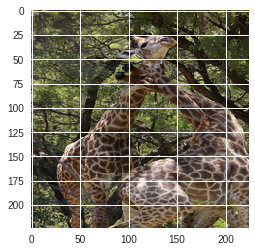

Predicted caption:
 a couple of giraffe standing next to a forest eeee

True captions:
A couple of giraffe snuggling each other in a forest.
A couple of giraffe standing next to some trees.
Two Zebras seem to be embracing in the wild. 
Two giraffes hang out near trees and nuzzle up to each other.
The two giraffes appear to be hugging each other.


In [0]:
generate_caption_coco(idx=10, train=True)

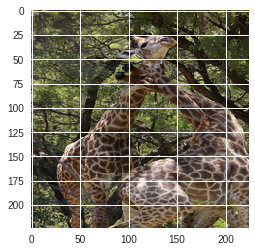

Predicted caption:
 a couple of giraffe standing next to a forest eeee

True captions:
A couple of giraffe snuggling each other in a forest.
A couple of giraffe standing next to some trees.
Two Zebras seem to be embracing in the wild. 
Two giraffes hang out near trees and nuzzle up to each other.
The two giraffes appear to be hugging each other.


In [0]:
generate_caption_coco(idx=10, train=True)

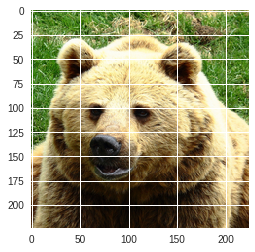

Predicted caption:
 a brown bear with a green collar standing in a field eeee

True captions:
A big burly grizzly bear is show with grass in the background.
The large brown bear has a black nose.
Closeup of a brown bear sitting in a grassy area.
A large bear that is sitting on grass. 
A close up picture of a brown bear's face.


In [0]:
generate_caption_coco(idx=1, train=False)

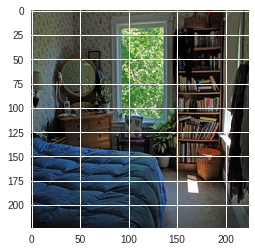

Predicted caption:
 a bedroom with a bed and a book on the wall eeee

True captions:
Bedroom scene with a bookcase, blue comforter and window.
A bedroom with a bookshelf full of books.
This room has a bed with blue sheets and a large bookcase
A bed and a mirror in a small room.
a bed room with a neatly made bed a window and a book shelf


In [0]:
generate_caption_coco(idx=2, train=False)

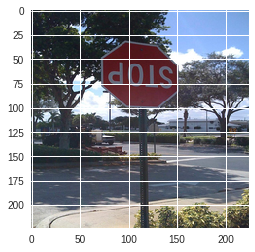

Predicted caption:
 a stop sign with a street sign on top of it eeee

True captions:
A stop sign is mounted upside-down on it's post. 
A stop sign that is hanging upside down.
An upside down stop sign by the road.
a stop sign put upside down on a metal pole 
A stop sign installed upside down on a street corner


In [0]:
generate_caption_coco(idx=3, train=False)

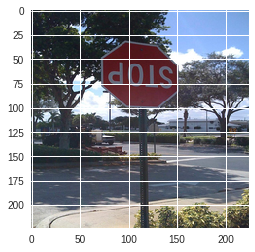

Predicted caption:
 a stop sign with a street sign on top of it eeee

True captions:
A stop sign is mounted upside-down on it's post. 
A stop sign that is hanging upside down.
An upside down stop sign by the road.
a stop sign put upside down on a metal pole 
A stop sign installed upside down on a street corner


In [0]:
generate_caption_coco(idx=3, train=False)

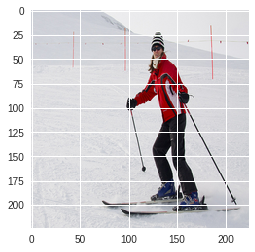

Predicted caption:
 a woman riding skis down a snow covered slope eeee

True captions:
A woman posing for the camera standing on skis.
a woman standing on skiis while posing for the camera
A woman in a red jacket skiing down a slope
A young woman is skiing down the mountain slope. 
a person on skis makes her way through the snow


In [0]:
generate_caption_coco(idx=5, train=False)